# XGBoost + hyperopt

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from hyperopt import STATUS_OK, fmin, hp, tpe

### 学習データの取り込み／前処理

In [2]:
df_date_data = pd.read_csv('../data/org/day.csv')
df_date_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
used_columns = ['cnt', 'season', 'yr', 'mnth', 'holiday', 'weathersit', 'temp', 'hum', 'windspeed']
df = df_date_data.loc[:,used_columns]
df.head()

,cnt,season,yr,mnth,holiday,weathersit,temp,hum,windspeed
0,985,1,0,1,0,2,0.344167,0.805833,0.160446
1,801,1,0,1,0,2,0.363478,0.696087,0.248539
2,1349,1,0,1,0,1,0.196364,0.437273,0.248309
3,1562,1,0,1,0,1,0.200000,0.590435,0.160296
4,1600,1,0,1,0,1,0.226957,0.436957,0.186900


In [4]:
ohe_columns = ['season', 'mnth', 'weathersit']
df_ohe = pd.get_dummies(df, columns=ohe_columns)

In [5]:
X = df_ohe.iloc[:, 1:]
y = df_ohe.iloc[:, 0]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

### パラメータチューニング前のスコア確認

In [6]:
before_params = {
         'eta':0.5,
         'gamma':0.2,
         'lambda':0.2,
         'alpha':0.5,
         'max_depth':10,
         'min_child_weight':1,
         'subsample':0.5,
         'objective':'reg:linear',
         'booster':'gbtree',
         'base_score':3
         }

dtrain = xgb.DMatrix(train_X, label=train_y)
dvalid = xgb.DMatrix(test_X, label=test_y)
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
gbm_model = xgb.train(before_params, dtrain, 500,
                      evals=watchlist,
                      verbose_eval=True)

[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=8
[0]	eval-rmse:2584.53	train-rmse:2566.48
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=10
[1]	eval-rmse:1478.81	train-rmse:1399.22
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=10
[2]	eval-rmse:1053.64	train-rmse:870.416
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=10
[3]	eval-rmse:900.914	train-rmse:605.662
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=10
[4]	eval-rmse:818.832	train-rmse:471.588
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=10
[5]	eval-rmse:801.082	train-rmse:406.738
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 

[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 4 pruned nodes, max_depth=10
[53]	eval-rmse:880.861	train-rmse:7.58334
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 4 pruned nodes, max_depth=10
[54]	eval-rmse:881.444	train-rmse:6.85888
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=10
[55]	eval-rmse:881.532	train-rmse:6.52
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=10
[56]	eval-rmse:881.447	train-rmse:5.97189
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=10
[57]	eval-rmse:881.345	train-rmse:5.40558
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 6 pruned nodes, max_depth=10
[58]	eval-rmse:881.103	train-rmse:4.95388
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 34 pruned nodes, max_depth=8
[106]	eval-rmse:881.051	train-rmse:0.281894
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 36 pruned nodes, max_depth=8
[107]	eval-rmse:881.063	train-rmse:0.275346
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=4
[108]	eval-rmse:881.058	train-rmse:0.274076
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 36 pruned nodes, max_depth=5
[109]	eval-rmse:881.053	train-rmse:0.2729
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 16 pruned nodes, max_depth=8
[110]	eval-rmse:881.049	train-rmse:0.267281
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 14 pruned nodes, max_depth=3
[111]	eval-rmse:881.047	train-rmse:0.264064
[00:16:09] src/tree/updater_prune.cc:74: tree pruning end, 1 

[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[159]	eval-rmse:881.055	train-rmse:0.228853
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[160]	eval-rmse:881.055	train-rmse:0.228941
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[161]	eval-rmse:881.054	train-rmse:0.228856
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[162]	eval-rmse:881.055	train-rmse:0.228866
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[163]	eval-rmse:881.054	train-rmse:0.228861
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[164]	eval-rmse:881.055	train-rmse:0.229458
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0

[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[212]	eval-rmse:881.053	train-rmse:0.223768
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[213]	eval-rmse:881.053	train-rmse:0.223664
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 18 pruned nodes, max_depth=0
[214]	eval-rmse:881.053	train-rmse:0.223515
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[215]	eval-rmse:881.053	train-rmse:0.223448
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[216]	eval-rmse:881.053	train-rmse:0.223831
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[217]	eval-rmse:881.053	train-rmse:0.223767
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[265]	eval-rmse:881.053	train-rmse:0.220393
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[266]	eval-rmse:881.053	train-rmse:0.220411
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[267]	eval-rmse:881.055	train-rmse:0.220803
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[268]	eval-rmse:881.055	train-rmse:0.220842
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[269]	eval-rmse:881.055	train-rmse:0.221037
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[270]	eval-rmse:881.056	train-rmse:0.221143
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 

[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[318]	eval-rmse:881.063	train-rmse:0.217155
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[319]	eval-rmse:881.063	train-rmse:0.216965
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[320]	eval-rmse:881.061	train-rmse:0.217056
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 2 pruned nodes, max_depth=2
[321]	eval-rmse:881.06	train-rmse:0.215571
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 14 pruned nodes, max_depth=0
[322]	eval-rmse:881.06	train-rmse:0.215576
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[323]	eval-rmse:881.06	train-rmse:0.21557
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 ext

[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[371]	eval-rmse:881.062	train-rmse:0.21506
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[372]	eval-rmse:881.062	train-rmse:0.215015
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[373]	eval-rmse:881.062	train-rmse:0.215009
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[374]	eval-rmse:881.06	train-rmse:0.213449
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 8 pruned nodes, max_depth=6
[375]	eval-rmse:881.061	train-rmse:0.212239
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[376]	eval-rmse:881.061	train-rmse:0.212184
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 e

[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[424]	eval-rmse:881.062	train-rmse:0.206798
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 2 pruned nodes, max_depth=0
[425]	eval-rmse:881.062	train-rmse:0.206891
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[426]	eval-rmse:881.062	train-rmse:0.206965
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[427]	eval-rmse:881.062	train-rmse:0.206814
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 4 pruned nodes, max_depth=0
[428]	eval-rmse:881.062	train-rmse:0.206979
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 2 pruned nodes, max_depth=0
[429]	eval-rmse:881.062	train-rmse:0.207274
[00:16:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 

[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 2 pruned nodes, max_depth=0
[477]	eval-rmse:881.058	train-rmse:0.206001
[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[478]	eval-rmse:881.058	train-rmse:0.206004
[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 6 pruned nodes, max_depth=0
[479]	eval-rmse:881.058	train-rmse:0.206031
[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[480]	eval-rmse:881.058	train-rmse:0.206015
[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[481]	eval-rmse:881.058	train-rmse:0.206012
[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 2 pruned nodes, max_depth=0
[482]	eval-rmse:881.058	train-rmse:0.206004
[00:16:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 

In [7]:
# スコア確認
pred_y = gbm_model.predict(dvalid, ntree_limit=gbm_model.best_iteration + 1)
score = sqrt(mean_squared_error(test_y, pred_y))
print('RMSE before hp-tuning: {}'.format(score))

RMSE before hp-tuning: 881.0582480551975


## hyperoptによるパラメータチューニング
最適化する関数を定義

In [8]:
# 以下のページのコードを参考に作成
# https://www.kaggle.com/yassinealouini/hyperopt-the-xgboost-model

def score(params):
    print("Training with params: ")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    # 変数の格納
    dtrain = xgb.DMatrix(train_X, label=train_y)
    dvalid = xgb.DMatrix(test_X, label=test_y)
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm_model = xgb.train(params, dtrain, num_round,
                          evals=watchlist,
                          verbose_eval=True)
    # 予測
    pred_y = gbm_model.predict(dvalid, ntree_limit=gbm_model.best_iteration + 1)
    score = sqrt(mean_squared_error(test_y, pred_y))
    print("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

In [9]:
def optimize(random_state=0):
    # パラメータ空間
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'lambda': hp.quniform('lambda', 0.025, 1.0, 0.05),
        'alpha': hp.quniform('alpha', 0.1, 0.8, 0.05),
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'eval_metric': 'rmse',
        'objective': 'reg:linear',
        'nthread': 1,
        # 並列化する場合はコア数に応じて数を増やす
        # 'nthread': 4,
        'booster': 'gbtree',
        'base_score':3,
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state
    }
    best = fmin(score, space, algo=tpe.suggest, max_evals=100)
    return best

最適化の実行

In [10]:
best_hyperparams = optimize()

Training with params: 
{'alpha': 0.65, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.45, 'eval_metric': 'rmse', 'gamma': 0.9500000000000001, 'lambda': 0.45, 'max_depth': 12, 'min_child_weight': 4.0, 'n_estimators': 248.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.65, 'tree_method': 'exact'}
[0]	eval-rmse:2840.21	train-rmse:2791.94
[1]	eval-rmse:1722.47	train-rmse:1634
[2]	eval-rmse:1153.56	train-rmse:1033.62
[3]	eval-rmse:897.905	train-rmse:709.19
[4]	eval-rmse:799.924	train-rmse:535.408
[5]	eval-rmse:764.32	train-rmse:431.712
[6]	eval-rmse:756.679	train-rmse:380.901
[7]	eval-rmse:758.957	train-rmse:343.193
[8]	eval-rmse:746.245	train-rmse:309.413
[9]	eval-rmse:736.439	train-rmse:283.564
[10]	eval-rmse:733.727	train-rmse:260.435
[11]	eval-rmse:739.48	train-rmse:250.14
[12]	eval-rmse:746.89	train-rmse:224.494
[13]	eval-rmse:745.298	train-rmse:212.815
[14]	eval-rmse:755.47	train-rmse:198.022
[15]	eval-rmse:763.452	train-rmse:188.478
[16]	eval-rmse:7

[186]	eval-rmse:763.72	train-rmse:0.711134
[187]	eval-rmse:763.713	train-rmse:0.705293
[188]	eval-rmse:763.708	train-rmse:0.674525
[189]	eval-rmse:763.714	train-rmse:0.673862
[190]	eval-rmse:763.721	train-rmse:0.668835
[191]	eval-rmse:763.706	train-rmse:0.654171
[192]	eval-rmse:763.7	train-rmse:0.665683
[193]	eval-rmse:763.708	train-rmse:0.660324
[194]	eval-rmse:763.71	train-rmse:0.655534
[195]	eval-rmse:763.709	train-rmse:0.639671
[196]	eval-rmse:763.712	train-rmse:0.63769
[197]	eval-rmse:763.704	train-rmse:0.627358
[198]	eval-rmse:763.699	train-rmse:0.619486
[199]	eval-rmse:763.699	train-rmse:0.619472
[200]	eval-rmse:763.701	train-rmse:0.622069
[201]	eval-rmse:763.704	train-rmse:0.609014
[202]	eval-rmse:763.703	train-rmse:0.604141
[203]	eval-rmse:763.703	train-rmse:0.602991
[204]	eval-rmse:763.702	train-rmse:0.601887
[205]	eval-rmse:763.699	train-rmse:0.605057
[206]	eval-rmse:763.698	train-rmse:0.602966
[207]	eval-rmse:763.704	train-rmse:0.587043
[208]	eval-rmse:763.707	train-rmse:0.

[123]	eval-rmse:701.558	train-rmse:22.3598
[124]	eval-rmse:701.406	train-rmse:21.512
[125]	eval-rmse:701.459	train-rmse:21.0758
[126]	eval-rmse:701.18	train-rmse:20.5409
[127]	eval-rmse:701.139	train-rmse:19.9595
[128]	eval-rmse:700.989	train-rmse:19.5765
[129]	eval-rmse:700.95	train-rmse:18.7197
[130]	eval-rmse:700.917	train-rmse:18.3485
[131]	eval-rmse:701.013	train-rmse:18.1177
[132]	eval-rmse:701.62	train-rmse:17.4799
[133]	eval-rmse:701.611	train-rmse:17.1057
[134]	eval-rmse:701.245	train-rmse:16.603
[135]	eval-rmse:701.104	train-rmse:15.9479
[136]	eval-rmse:700.908	train-rmse:15.3623
[137]	eval-rmse:700.997	train-rmse:14.9658
[138]	eval-rmse:700.963	train-rmse:14.5589
[139]	eval-rmse:701.093	train-rmse:14.284
[140]	eval-rmse:701.241	train-rmse:14.0058
[141]	eval-rmse:701.27	train-rmse:13.7443
[142]	eval-rmse:701.682	train-rmse:13.3546
[143]	eval-rmse:701.721	train-rmse:13.0374
[144]	eval-rmse:701.146	train-rmse:12.6363
[145]	eval-rmse:700.812	train-rmse:12.3922
[146]	eval-rmse:70

[314]	eval-rmse:701.237	train-rmse:0.605956
[315]	eval-rmse:701.234	train-rmse:0.604361
[316]	eval-rmse:701.234	train-rmse:0.602854
[317]	eval-rmse:701.234	train-rmse:0.602847
[318]	eval-rmse:701.235	train-rmse:0.598871
[319]	eval-rmse:701.24	train-rmse:0.597582
[320]	eval-rmse:701.232	train-rmse:0.596779
[321]	eval-rmse:701.233	train-rmse:0.59669
[322]	eval-rmse:701.234	train-rmse:0.592713
[323]	eval-rmse:701.237	train-rmse:0.592056
[324]	eval-rmse:701.242	train-rmse:0.591167
[325]	eval-rmse:701.244	train-rmse:0.589766
[326]	eval-rmse:701.249	train-rmse:0.588474
[327]	eval-rmse:701.249	train-rmse:0.58845
[328]	eval-rmse:701.249	train-rmse:0.588449
[329]	eval-rmse:701.248	train-rmse:0.5856
[330]	eval-rmse:701.247	train-rmse:0.58281
[331]	eval-rmse:701.251	train-rmse:0.579827
[332]	eval-rmse:701.251	train-rmse:0.579829
[333]	eval-rmse:701.251	train-rmse:0.578401
[334]	eval-rmse:701.251	train-rmse:0.578369
[335]	eval-rmse:701.249	train-rmse:0.575388
[336]	eval-rmse:701.249	train-rmse:0.5

[502]	eval-rmse:701.242	train-rmse:0.524242
[503]	eval-rmse:701.242	train-rmse:0.524258
[504]	eval-rmse:701.242	train-rmse:0.5243
[505]	eval-rmse:701.242	train-rmse:0.524395
[506]	eval-rmse:701.242	train-rmse:0.524422
[507]	eval-rmse:701.242	train-rmse:0.524359
[508]	eval-rmse:701.242	train-rmse:0.52422
[509]	eval-rmse:701.242	train-rmse:0.524223
[510]	eval-rmse:701.242	train-rmse:0.524214
[511]	eval-rmse:701.242	train-rmse:0.524343
[512]	eval-rmse:701.242	train-rmse:0.524251
[513]	eval-rmse:701.242	train-rmse:0.524227
[514]	eval-rmse:701.242	train-rmse:0.524296
[515]	eval-rmse:701.242	train-rmse:0.524345
[516]	eval-rmse:701.242	train-rmse:0.524213
[517]	eval-rmse:701.242	train-rmse:0.524208
[518]	eval-rmse:701.238	train-rmse:0.523535
[519]	eval-rmse:701.238	train-rmse:0.523629
[520]	eval-rmse:701.238	train-rmse:0.523539
[521]	eval-rmse:701.238	train-rmse:0.52355
[522]	eval-rmse:701.238	train-rmse:0.523464
[523]	eval-rmse:701.238	train-rmse:0.523475
[524]	eval-rmse:701.238	train-rmse:0

[127]	eval-rmse:738.005	train-rmse:1.34701
[128]	eval-rmse:738.049	train-rmse:1.27556
[129]	eval-rmse:738.047	train-rmse:1.26724
[130]	eval-rmse:738.045	train-rmse:1.286
[131]	eval-rmse:738.038	train-rmse:1.28272
[132]	eval-rmse:738.083	train-rmse:1.23712
[133]	eval-rmse:738.1	train-rmse:1.17443
[134]	eval-rmse:738.123	train-rmse:1.17681
[135]	eval-rmse:738.097	train-rmse:1.15377
[136]	eval-rmse:738.121	train-rmse:1.11168
[137]	eval-rmse:738.104	train-rmse:1.10552
[138]	eval-rmse:738.135	train-rmse:1.06606
[139]	eval-rmse:738.147	train-rmse:1.0407
[140]	eval-rmse:738.16	train-rmse:1.02423
[141]	eval-rmse:738.152	train-rmse:1.01314
[142]	eval-rmse:738.151	train-rmse:0.985612
[143]	eval-rmse:738.177	train-rmse:0.949879
[144]	eval-rmse:738.175	train-rmse:0.94723
[145]	eval-rmse:738.182	train-rmse:0.917521
[146]	eval-rmse:738.194	train-rmse:0.908065
[147]	eval-rmse:738.184	train-rmse:0.89747
[148]	eval-rmse:738.196	train-rmse:0.868571
[149]	eval-rmse:738.193	train-rmse:0.863927
[150]	eval-

[120]	eval-rmse:668.077	train-rmse:291.092
[121]	eval-rmse:667.046	train-rmse:289.483
[122]	eval-rmse:667.031	train-rmse:288.818
[123]	eval-rmse:666.746	train-rmse:288.233
[124]	eval-rmse:665.17	train-rmse:287.13
[125]	eval-rmse:666.913	train-rmse:284.961
[126]	eval-rmse:666.414	train-rmse:283.357
[127]	eval-rmse:667.47	train-rmse:282.189
[128]	eval-rmse:667.196	train-rmse:281.548
[129]	eval-rmse:665.869	train-rmse:279.874
[130]	eval-rmse:665.97	train-rmse:277.852
[131]	eval-rmse:666.527	train-rmse:277.188
[132]	eval-rmse:668.265	train-rmse:275.652
[133]	eval-rmse:668.218	train-rmse:274.488
[134]	eval-rmse:667.829	train-rmse:273.67
[135]	eval-rmse:667.402	train-rmse:271.71
[136]	eval-rmse:667.513	train-rmse:271.324
[137]	eval-rmse:667.763	train-rmse:270.935
[138]	eval-rmse:667.849	train-rmse:269.789
[139]	eval-rmse:668.161	train-rmse:269.236
[140]	eval-rmse:667.669	train-rmse:267.319
[141]	eval-rmse:668.354	train-rmse:267.042
[142]	eval-rmse:668.694	train-rmse:265.662
[143]	eval-rmse:6

[312]	eval-rmse:678.478	train-rmse:136.279
[313]	eval-rmse:678.461	train-rmse:136.002
[314]	eval-rmse:678.538	train-rmse:135.387
[315]	eval-rmse:678.282	train-rmse:134.786
[316]	eval-rmse:678.161	train-rmse:134.437
[317]	eval-rmse:678.297	train-rmse:133.676
[318]	eval-rmse:678.394	train-rmse:133.338
[319]	eval-rmse:678.204	train-rmse:132.998
[320]	eval-rmse:678.391	train-rmse:132.545
[321]	eval-rmse:678.675	train-rmse:132.081
[322]	eval-rmse:678.561	train-rmse:131.504
[323]	eval-rmse:678.788	train-rmse:131.132
[324]	eval-rmse:679.744	train-rmse:130.244
[325]	eval-rmse:679.714	train-rmse:129.671
[326]	eval-rmse:679.84	train-rmse:129.233
[327]	eval-rmse:679.547	train-rmse:128.693
[328]	eval-rmse:679.229	train-rmse:127.98
[329]	eval-rmse:679.333	train-rmse:127.423
[330]	eval-rmse:679.797	train-rmse:127.039
[331]	eval-rmse:679.483	train-rmse:126.548
[332]	eval-rmse:678.9	train-rmse:126.002
[333]	eval-rmse:679.106	train-rmse:125.336
[334]	eval-rmse:678.984	train-rmse:125.225
[335]	eval-rmse

[504]	eval-rmse:681.51	train-rmse:70.1157
[505]	eval-rmse:681.662	train-rmse:69.828
[506]	eval-rmse:681.463	train-rmse:69.4976
[507]	eval-rmse:681.518	train-rmse:69.1606
[508]	eval-rmse:681.767	train-rmse:69.004
[509]	eval-rmse:681.502	train-rmse:68.575
[510]	eval-rmse:681.269	train-rmse:68.2389
[511]	eval-rmse:681.365	train-rmse:67.8894
[512]	eval-rmse:681.372	train-rmse:67.7325
[513]	eval-rmse:681.482	train-rmse:67.6332
[514]	eval-rmse:681.389	train-rmse:67.4256
[515]	eval-rmse:681.391	train-rmse:67.2424
[516]	eval-rmse:681.438	train-rmse:66.9351
[517]	eval-rmse:681.53	train-rmse:66.8653
[518]	eval-rmse:681.492	train-rmse:66.6395
[519]	eval-rmse:681.512	train-rmse:66.4485
[520]	eval-rmse:681.678	train-rmse:66.4031
[521]	eval-rmse:682.016	train-rmse:66.1403
[522]	eval-rmse:682.094	train-rmse:66.0717
[523]	eval-rmse:681.862	train-rmse:65.9081
[524]	eval-rmse:681.879	train-rmse:65.7742
[525]	eval-rmse:681.568	train-rmse:65.5756
[526]	eval-rmse:681.391	train-rmse:65.3025
[527]	eval-rmse:

[696]	eval-rmse:683.274	train-rmse:37.9702
[697]	eval-rmse:683.24	train-rmse:37.7957
[698]	eval-rmse:683.038	train-rmse:37.6533
[699]	eval-rmse:683.081	train-rmse:37.474
[700]	eval-rmse:682.973	train-rmse:37.4143
[701]	eval-rmse:683.077	train-rmse:37.2576
[702]	eval-rmse:683.093	train-rmse:37.0604
[703]	eval-rmse:683.025	train-rmse:36.9711
[704]	eval-rmse:682.989	train-rmse:36.83
[705]	eval-rmse:682.966	train-rmse:36.6622
[706]	eval-rmse:683.058	train-rmse:36.5954
[707]	eval-rmse:683.169	train-rmse:36.4679
[708]	eval-rmse:683.201	train-rmse:36.4302
[709]	eval-rmse:683.346	train-rmse:36.3381
[710]	eval-rmse:683.271	train-rmse:36.2498
[711]	eval-rmse:683.07	train-rmse:36.0918
[712]	eval-rmse:682.916	train-rmse:35.9927
[713]	eval-rmse:682.813	train-rmse:35.8024
[714]	eval-rmse:682.811	train-rmse:35.6823
[715]	eval-rmse:682.98	train-rmse:35.604
[716]	eval-rmse:682.826	train-rmse:35.5432
[717]	eval-rmse:682.988	train-rmse:35.3975
[718]	eval-rmse:683.081	train-rmse:35.222
[719]	eval-rmse:683

[101]	eval-rmse:752.817	train-rmse:402.441
[102]	eval-rmse:752.918	train-rmse:400.976
[103]	eval-rmse:752.039	train-rmse:400.761
[104]	eval-rmse:752.581	train-rmse:400.527
[105]	eval-rmse:752.672	train-rmse:400.227
[106]	eval-rmse:749.635	train-rmse:399.005
[107]	eval-rmse:747.256	train-rmse:398.059
[108]	eval-rmse:746.931	train-rmse:397.69
[109]	eval-rmse:747.344	train-rmse:396.766
[110]	eval-rmse:746.671	train-rmse:396.072
[111]	eval-rmse:747.583	train-rmse:395.005
[112]	eval-rmse:749.607	train-rmse:393.62
[113]	eval-rmse:749.415	train-rmse:393.339
[114]	eval-rmse:749.366	train-rmse:392.882
[115]	eval-rmse:750.772	train-rmse:391.973
[116]	eval-rmse:750.805	train-rmse:391.947
[117]	eval-rmse:752.032	train-rmse:391.684
[118]	eval-rmse:752.877	train-rmse:391.172
[119]	eval-rmse:752.163	train-rmse:389.208
[120]	eval-rmse:751.749	train-rmse:387.58
[121]	eval-rmse:752.172	train-rmse:386.255
[122]	eval-rmse:753.991	train-rmse:384.615
[123]	eval-rmse:754.896	train-rmse:384.402
[124]	eval-rms

[293]	eval-rmse:758.928	train-rmse:268.374
[294]	eval-rmse:757.736	train-rmse:267.629
[295]	eval-rmse:758.059	train-rmse:267.035
[296]	eval-rmse:757.336	train-rmse:266.49
[297]	eval-rmse:757.024	train-rmse:266.154
[298]	eval-rmse:756.771	train-rmse:265.212
[299]	eval-rmse:756.305	train-rmse:264.657
[300]	eval-rmse:756.922	train-rmse:263.747
[301]	eval-rmse:756.056	train-rmse:263.263
[302]	eval-rmse:754.58	train-rmse:262.756
[303]	eval-rmse:754.478	train-rmse:262.289
[304]	eval-rmse:754.464	train-rmse:261.613
[305]	eval-rmse:755.123	train-rmse:261.14
[306]	eval-rmse:754.645	train-rmse:260.57
[307]	eval-rmse:754.04	train-rmse:260.113
[308]	eval-rmse:753.614	train-rmse:260
[309]	eval-rmse:755.061	train-rmse:259.53
[310]	eval-rmse:752.445	train-rmse:258.835
[311]	eval-rmse:751.448	train-rmse:258.737
[312]	eval-rmse:752.197	train-rmse:258.151
[313]	eval-rmse:752.604	train-rmse:257.842
[314]	eval-rmse:751.315	train-rmse:257.279
[315]	eval-rmse:750.742	train-rmse:257.037
[316]	eval-rmse:751.1

[485]	eval-rmse:762.532	train-rmse:197.098
[486]	eval-rmse:762.277	train-rmse:196.269
[487]	eval-rmse:762.836	train-rmse:195.885
[488]	eval-rmse:762.535	train-rmse:195.541
[489]	eval-rmse:762.862	train-rmse:195.283
[490]	eval-rmse:763.21	train-rmse:195.036
[491]	eval-rmse:763.542	train-rmse:194.772
[492]	eval-rmse:763.122	train-rmse:194.67
[493]	eval-rmse:763.059	train-rmse:194.393
[494]	eval-rmse:762.808	train-rmse:194.187
[495]	eval-rmse:763.623	train-rmse:194.046
[496]	eval-rmse:762.481	train-rmse:193.569
[497]	eval-rmse:762.022	train-rmse:193.127
[498]	eval-rmse:761.911	train-rmse:192.803
[499]	eval-rmse:760.874	train-rmse:192.397
[500]	eval-rmse:760.674	train-rmse:192.038
[501]	eval-rmse:760.452	train-rmse:191.578
[502]	eval-rmse:760.221	train-rmse:191.182
[503]	eval-rmse:759.989	train-rmse:190.781
[504]	eval-rmse:758.367	train-rmse:190.269
[505]	eval-rmse:758.896	train-rmse:190.135
[506]	eval-rmse:758.375	train-rmse:189.662
[507]	eval-rmse:758.326	train-rmse:189.36
[508]	eval-rms

[0]	eval-rmse:3813.87	train-rmse:3703.63
[1]	eval-rmse:2934.54	train-rmse:2820.65
[2]	eval-rmse:2284.83	train-rmse:2165.14
[3]	eval-rmse:1805.84	train-rmse:1667.05
[4]	eval-rmse:1492.96	train-rmse:1296.13
[5]	eval-rmse:1229.86	train-rmse:1012.7
[6]	eval-rmse:1054.44	train-rmse:799.635
[7]	eval-rmse:941.863	train-rmse:641.795
[8]	eval-rmse:874.031	train-rmse:524.821
[9]	eval-rmse:826.992	train-rmse:438.972
[10]	eval-rmse:797.938	train-rmse:374.395
[11]	eval-rmse:778.551	train-rmse:317.978
[12]	eval-rmse:763.81	train-rmse:277.465
[13]	eval-rmse:762.008	train-rmse:245.513
[14]	eval-rmse:760.739	train-rmse:219.177
[15]	eval-rmse:753.356	train-rmse:197.239
[16]	eval-rmse:748.914	train-rmse:182.717
[17]	eval-rmse:746.884	train-rmse:174.046
[18]	eval-rmse:748.007	train-rmse:159.532
[19]	eval-rmse:748.518	train-rmse:148.064
[20]	eval-rmse:747.035	train-rmse:140.604
[21]	eval-rmse:747.428	train-rmse:132.228
[22]	eval-rmse:747.305	train-rmse:127.64
[23]	eval-rmse:748.557	train-rmse:122.977
[24]	

[194]	eval-rmse:747.616	train-rmse:0.816339
[195]	eval-rmse:747.617	train-rmse:0.816343
[196]	eval-rmse:747.616	train-rmse:0.816339
[197]	eval-rmse:747.617	train-rmse:0.816341
[198]	eval-rmse:747.617	train-rmse:0.816343
[199]	eval-rmse:747.617	train-rmse:0.81635
[200]	eval-rmse:747.617	train-rmse:0.816356
[201]	eval-rmse:747.617	train-rmse:0.816344
[202]	eval-rmse:747.617	train-rmse:0.816332
[203]	eval-rmse:747.609	train-rmse:0.803136
[204]	eval-rmse:747.609	train-rmse:0.803142
[205]	eval-rmse:747.608	train-rmse:0.803128
[206]	eval-rmse:747.608	train-rmse:0.803121
[207]	eval-rmse:747.608	train-rmse:0.803115
[208]	eval-rmse:747.608	train-rmse:0.803115
[209]	eval-rmse:747.599	train-rmse:0.79529
[210]	eval-rmse:747.599	train-rmse:0.795284
[211]	eval-rmse:747.594	train-rmse:0.794206
[212]	eval-rmse:747.594	train-rmse:0.794211
[213]	eval-rmse:747.594	train-rmse:0.794214
[214]	eval-rmse:747.594	train-rmse:0.79421
[215]	eval-rmse:747.594	train-rmse:0.794214
[216]	eval-rmse:747.594	train-rmse:

[381]	eval-rmse:747.596	train-rmse:0.751084
[382]	eval-rmse:747.596	train-rmse:0.751074
[383]	eval-rmse:747.595	train-rmse:0.751073
[384]	eval-rmse:747.595	train-rmse:0.75108
[385]	eval-rmse:747.595	train-rmse:0.75108
[386]	eval-rmse:747.596	train-rmse:0.751081
[387]	eval-rmse:747.595	train-rmse:0.751077
[388]	eval-rmse:747.595	train-rmse:0.751077
[389]	eval-rmse:747.595	train-rmse:0.751075
[390]	eval-rmse:747.595	train-rmse:0.751078
[391]	eval-rmse:747.595	train-rmse:0.751078
[392]	eval-rmse:747.596	train-rmse:0.75107
[393]	eval-rmse:747.595	train-rmse:0.751071
[394]	eval-rmse:747.596	train-rmse:0.751077
[395]	eval-rmse:747.596	train-rmse:0.751075
[396]	eval-rmse:747.596	train-rmse:0.75108
[397]	eval-rmse:747.596	train-rmse:0.751087
[398]	eval-rmse:747.596	train-rmse:0.748725
[399]	eval-rmse:747.596	train-rmse:0.748712
[400]	eval-rmse:747.596	train-rmse:0.748712
[401]	eval-rmse:747.595	train-rmse:0.748707
[402]	eval-rmse:747.596	train-rmse:0.748723
[403]	eval-rmse:747.595	train-rmse:0

[568]	eval-rmse:747.596	train-rmse:0.737622
[569]	eval-rmse:747.596	train-rmse:0.737615
[570]	eval-rmse:747.596	train-rmse:0.737613
[571]	eval-rmse:747.596	train-rmse:0.737607
[572]	eval-rmse:747.596	train-rmse:0.737612
[573]	eval-rmse:747.596	train-rmse:0.737603
[574]	eval-rmse:747.596	train-rmse:0.737603
[575]	eval-rmse:747.596	train-rmse:0.737614
[576]	eval-rmse:747.596	train-rmse:0.737611
[577]	eval-rmse:747.596	train-rmse:0.737609
[578]	eval-rmse:747.596	train-rmse:0.737613
[579]	eval-rmse:747.596	train-rmse:0.737617
[580]	eval-rmse:747.596	train-rmse:0.737613
[581]	eval-rmse:747.596	train-rmse:0.737613
[582]	eval-rmse:747.596	train-rmse:0.737613
[583]	eval-rmse:747.596	train-rmse:0.73762
[584]	eval-rmse:747.596	train-rmse:0.737619
[585]	eval-rmse:747.596	train-rmse:0.737619
[586]	eval-rmse:747.596	train-rmse:0.737624
[587]	eval-rmse:747.596	train-rmse:0.737622
[588]	eval-rmse:747.596	train-rmse:0.737625
[589]	eval-rmse:747.595	train-rmse:0.736076
[590]	eval-rmse:747.603	train-rms

[63]	eval-rmse:797.228	train-rmse:681.174
[64]	eval-rmse:798.252	train-rmse:679.555
[65]	eval-rmse:795.534	train-rmse:677.976
[66]	eval-rmse:792.721	train-rmse:676.453
[67]	eval-rmse:792.089	train-rmse:674.906
[68]	eval-rmse:790.475	train-rmse:673.506
[69]	eval-rmse:788.083	train-rmse:672.077
[70]	eval-rmse:784.617	train-rmse:670.644
[71]	eval-rmse:780.417	train-rmse:669.252
[72]	eval-rmse:780.022	train-rmse:667.987
[73]	eval-rmse:777.823	train-rmse:666.777
[74]	eval-rmse:777.833	train-rmse:665.563
[75]	eval-rmse:775.617	train-rmse:664.4
[76]	eval-rmse:773.771	train-rmse:663.172
[77]	eval-rmse:773.621	train-rmse:662.031
[78]	eval-rmse:773.315	train-rmse:660.964
[79]	eval-rmse:773.782	train-rmse:659.871
[80]	eval-rmse:774.705	train-rmse:658.77
[81]	eval-rmse:774.698	train-rmse:657.688
[82]	eval-rmse:774.344	train-rmse:656.695
[83]	eval-rmse:771.19	train-rmse:655.781
[84]	eval-rmse:769.923	train-rmse:654.889
[85]	eval-rmse:767.377	train-rmse:653.944
[86]	eval-rmse:766.209	train-rmse:653.

[256]	eval-rmse:752.729	train-rmse:600.929
[257]	eval-rmse:752.679	train-rmse:600.798
[258]	eval-rmse:752.583	train-rmse:600.667
[259]	eval-rmse:753.059	train-rmse:600.519
[260]	eval-rmse:752.967	train-rmse:600.39
[261]	eval-rmse:752.929	train-rmse:600.246
[262]	eval-rmse:752.815	train-rmse:600.118
[263]	eval-rmse:752.702	train-rmse:599.99
[264]	eval-rmse:753.894	train-rmse:599.83
[265]	eval-rmse:753.781	train-rmse:599.701
[266]	eval-rmse:754.963	train-rmse:599.552
[267]	eval-rmse:754.155	train-rmse:599.426
[268]	eval-rmse:755.275	train-rmse:599.298
[269]	eval-rmse:755.145	train-rmse:599.155
[270]	eval-rmse:755.153	train-rmse:599.028
[271]	eval-rmse:755.604	train-rmse:598.902
[272]	eval-rmse:755.497	train-rmse:598.757
[273]	eval-rmse:755.947	train-rmse:598.633
[274]	eval-rmse:755.85	train-rmse:598.497
[275]	eval-rmse:755.829	train-rmse:598.371
[276]	eval-rmse:755.741	train-rmse:598.244
[277]	eval-rmse:756.196	train-rmse:598.115
[278]	eval-rmse:755.855	train-rmse:597.988
[279]	eval-rmse

[448]	eval-rmse:771.51	train-rmse:581.111
[449]	eval-rmse:771.263	train-rmse:581.022
[450]	eval-rmse:771.729	train-rmse:580.945
[451]	eval-rmse:771.659	train-rmse:580.868
[452]	eval-rmse:771.718	train-rmse:580.784
[453]	eval-rmse:770.99	train-rmse:580.709
[454]	eval-rmse:772.127	train-rmse:580.62
[455]	eval-rmse:772.043	train-rmse:580.533
[456]	eval-rmse:773.171	train-rmse:580.448
[457]	eval-rmse:773.09	train-rmse:580.363
[458]	eval-rmse:774.209	train-rmse:580.282
[459]	eval-rmse:774.133	train-rmse:580.201
[460]	eval-rmse:775.243	train-rmse:580.123
[461]	eval-rmse:775.17	train-rmse:580.044
[462]	eval-rmse:774.951	train-rmse:579.97
[463]	eval-rmse:775.38	train-rmse:579.887
[464]	eval-rmse:776.481	train-rmse:579.813
[465]	eval-rmse:776.412	train-rmse:579.737
[466]	eval-rmse:776.346	train-rmse:579.663
[467]	eval-rmse:776.406	train-rmse:579.582
[468]	eval-rmse:776.158	train-rmse:579.509
[469]	eval-rmse:776.204	train-rmse:579.437
[470]	eval-rmse:776.032	train-rmse:579.361
[471]	eval-rmse:77

[640]	eval-rmse:783.203	train-rmse:568.2
[641]	eval-rmse:783.317	train-rmse:568.145
[642]	eval-rmse:783.19	train-rmse:568.087
[643]	eval-rmse:783.302	train-rmse:568.033
[644]	eval-rmse:783.115	train-rmse:567.975
[645]	eval-rmse:782.976	train-rmse:567.922
[646]	eval-rmse:783.248	train-rmse:567.87
[647]	eval-rmse:783.101	train-rmse:567.818
[648]	eval-rmse:783.003	train-rmse:567.754
[649]	eval-rmse:783.038	train-rmse:567.703
[650]	eval-rmse:783.08	train-rmse:567.643
[651]	eval-rmse:784.049	train-rmse:567.591
[652]	eval-rmse:783.984	train-rmse:567.523
[653]	eval-rmse:784.961	train-rmse:567.471
[654]	eval-rmse:784.901	train-rmse:567.408
[655]	eval-rmse:784.755	train-rmse:567.357
[656]	eval-rmse:784.775	train-rmse:567.297
[657]	eval-rmse:784.667	train-rmse:567.244
[658]	eval-rmse:785.105	train-rmse:567.185
[659]	eval-rmse:784.726	train-rmse:567.128
[660]	eval-rmse:785.154	train-rmse:567.072
[661]	eval-rmse:784.783	train-rmse:567.018
[662]	eval-rmse:785.203	train-rmse:566.964
[663]	eval-rmse:

[85]	eval-rmse:705.863	train-rmse:268.385
[86]	eval-rmse:705.294	train-rmse:267.272
[87]	eval-rmse:704.945	train-rmse:266.486
[88]	eval-rmse:705.07	train-rmse:263.675
[89]	eval-rmse:705.429	train-rmse:262.695
[90]	eval-rmse:704.9	train-rmse:262.115
[91]	eval-rmse:704.938	train-rmse:261.475
[92]	eval-rmse:705.019	train-rmse:260.013
[93]	eval-rmse:705.735	train-rmse:258.21
[94]	eval-rmse:705.645	train-rmse:256.81
[95]	eval-rmse:705.465	train-rmse:256.278
[96]	eval-rmse:704.522	train-rmse:254.772
[97]	eval-rmse:703.8	train-rmse:253.348
[98]	eval-rmse:703.755	train-rmse:252.162
[99]	eval-rmse:703.572	train-rmse:251.418
[100]	eval-rmse:703.491	train-rmse:249.59
[101]	eval-rmse:703.074	train-rmse:248.07
[102]	eval-rmse:702.191	train-rmse:247.373
[103]	eval-rmse:702.324	train-rmse:246.9
[104]	eval-rmse:702.888	train-rmse:245.205
[105]	eval-rmse:702.919	train-rmse:243.381
[106]	eval-rmse:702.81	train-rmse:242.922
[107]	eval-rmse:702.051	train-rmse:241.158
[108]	eval-rmse:702.379	train-rmse:240

[65]	eval-rmse:1193.37	train-rmse:1067.81
[66]	eval-rmse:1174.42	train-rmse:1047.09
[67]	eval-rmse:1156.47	train-rmse:1026.12
[68]	eval-rmse:1139.32	train-rmse:1005.3
[69]	eval-rmse:1121	train-rmse:985.677
[70]	eval-rmse:1104.74	train-rmse:966.964
[71]	eval-rmse:1088.11	train-rmse:947.615
[72]	eval-rmse:1074.14	train-rmse:929.899
[73]	eval-rmse:1058.67	train-rmse:912.192
[74]	eval-rmse:1045.04	train-rmse:895.424
[75]	eval-rmse:1031.05	train-rmse:878.746
[76]	eval-rmse:1017.44	train-rmse:862.338
[77]	eval-rmse:1004.75	train-rmse:847.262
[78]	eval-rmse:992.153	train-rmse:832.142
[79]	eval-rmse:980.778	train-rmse:818.123
[80]	eval-rmse:967.938	train-rmse:803.551
[81]	eval-rmse:955.537	train-rmse:789.625
[82]	eval-rmse:943.662	train-rmse:776.199
[83]	eval-rmse:934.031	train-rmse:762.667
[84]	eval-rmse:923.246	train-rmse:749.25
[85]	eval-rmse:912.619	train-rmse:737.245
[86]	eval-rmse:902.823	train-rmse:724.946
[87]	eval-rmse:894.556	train-rmse:713.663
[88]	eval-rmse:887.474	train-rmse:703.0

[258]	eval-rmse:671.761	train-rmse:282.357
[259]	eval-rmse:671.489	train-rmse:281.484
[260]	eval-rmse:671.429	train-rmse:281.03
[261]	eval-rmse:671.785	train-rmse:280.32
[262]	eval-rmse:671.301	train-rmse:279.958
[263]	eval-rmse:671.836	train-rmse:279.473
[264]	eval-rmse:672.044	train-rmse:278.835
[265]	eval-rmse:671.842	train-rmse:278.043
[266]	eval-rmse:671.588	train-rmse:277.397
[267]	eval-rmse:671.372	train-rmse:276.549
[268]	eval-rmse:671.253	train-rmse:275.559
[269]	eval-rmse:671.022	train-rmse:274.946
[270]	eval-rmse:671.104	train-rmse:274.479
[271]	eval-rmse:671.01	train-rmse:273.822
[272]	eval-rmse:671.097	train-rmse:273.588
[273]	eval-rmse:671.288	train-rmse:273.36
[274]	eval-rmse:671.31	train-rmse:272.938
[275]	eval-rmse:671.18	train-rmse:272.483
[276]	eval-rmse:671.123	train-rmse:271.91
[277]	eval-rmse:671.18	train-rmse:271.461
[278]	eval-rmse:671.055	train-rmse:271.191
[279]	eval-rmse:671.067	train-rmse:270.459
[280]	eval-rmse:671.381	train-rmse:269.379
[281]	eval-rmse:671

[450]	eval-rmse:678.244	train-rmse:193.34
[451]	eval-rmse:678.29	train-rmse:192.844
[452]	eval-rmse:678.48	train-rmse:192.38
[453]	eval-rmse:678.674	train-rmse:191.792
[454]	eval-rmse:679.004	train-rmse:191.151
[455]	eval-rmse:679.14	train-rmse:190.659
[456]	eval-rmse:679.238	train-rmse:190.423
[457]	eval-rmse:679.087	train-rmse:190.238
[458]	eval-rmse:679.499	train-rmse:189.693
[459]	eval-rmse:679.152	train-rmse:189.465
[460]	eval-rmse:679.157	train-rmse:189.07
[461]	eval-rmse:678.986	train-rmse:188.759
[462]	eval-rmse:679.13	train-rmse:188.325
[463]	eval-rmse:679.314	train-rmse:187.971
[464]	eval-rmse:679.422	train-rmse:187.448
[465]	eval-rmse:679.402	train-rmse:187.245
[466]	eval-rmse:679.61	train-rmse:186.536
[467]	eval-rmse:679.543	train-rmse:186.014
[468]	eval-rmse:679.418	train-rmse:185.618
[469]	eval-rmse:679.404	train-rmse:185.194
[470]	eval-rmse:679.287	train-rmse:184.951
[471]	eval-rmse:679.301	train-rmse:184.598
[472]	eval-rmse:679.216	train-rmse:184.348
[473]	eval-rmse:679

[110]	eval-rmse:782.322	train-rmse:8.25662
[111]	eval-rmse:782.37	train-rmse:8.02978
[112]	eval-rmse:782.279	train-rmse:7.75907
[113]	eval-rmse:782.022	train-rmse:7.54798
[114]	eval-rmse:782.066	train-rmse:7.43931
[115]	eval-rmse:781.897	train-rmse:7.21799
[116]	eval-rmse:781.873	train-rmse:7.05118
[117]	eval-rmse:781.765	train-rmse:6.77067
[118]	eval-rmse:781.572	train-rmse:6.5941
[119]	eval-rmse:781.36	train-rmse:6.48625
[120]	eval-rmse:781.525	train-rmse:6.38098
[121]	eval-rmse:781.546	train-rmse:6.19
[122]	eval-rmse:781.371	train-rmse:6.02241
[123]	eval-rmse:781.526	train-rmse:5.83772
[124]	eval-rmse:781.372	train-rmse:5.5801
[125]	eval-rmse:781.408	train-rmse:5.41937
[126]	eval-rmse:781.386	train-rmse:5.21281
[127]	eval-rmse:781.313	train-rmse:5.01744
[128]	eval-rmse:781.32	train-rmse:4.96987
[129]	eval-rmse:781.307	train-rmse:4.88668
[130]	eval-rmse:781.199	train-rmse:4.78291
[131]	eval-rmse:781.083	train-rmse:4.72046
[132]	eval-rmse:781.025	train-rmse:4.49559
[133]	eval-rmse:780

[299]	eval-rmse:780.821	train-rmse:0.542576
[300]	eval-rmse:780.817	train-rmse:0.543293
[301]	eval-rmse:780.817	train-rmse:0.543219
[302]	eval-rmse:780.816	train-rmse:0.543223
[303]	eval-rmse:780.816	train-rmse:0.543285
[304]	eval-rmse:780.817	train-rmse:0.543164
[305]	eval-rmse:780.819	train-rmse:0.544496
[306]	eval-rmse:780.823	train-rmse:0.542829
[307]	eval-rmse:780.823	train-rmse:0.54283
[308]	eval-rmse:780.823	train-rmse:0.542826
[309]	eval-rmse:780.823	train-rmse:0.542835
[310]	eval-rmse:780.823	train-rmse:0.542906
[311]	eval-rmse:780.822	train-rmse:0.543353
[312]	eval-rmse:780.823	train-rmse:0.54294
[313]	eval-rmse:780.823	train-rmse:0.540297
[314]	eval-rmse:780.824	train-rmse:0.540122
[315]	eval-rmse:780.824	train-rmse:0.540112
[316]	eval-rmse:780.822	train-rmse:0.539919
[317]	eval-rmse:780.822	train-rmse:0.539641
[318]	eval-rmse:780.822	train-rmse:0.539672
[319]	eval-rmse:780.812	train-rmse:0.540284
[320]	eval-rmse:780.812	train-rmse:0.54029
[321]	eval-rmse:780.812	train-rmse:

[486]	eval-rmse:780.827	train-rmse:0.519435
[487]	eval-rmse:780.822	train-rmse:0.517798
[488]	eval-rmse:780.822	train-rmse:0.51781
[489]	eval-rmse:780.822	train-rmse:0.517824
[490]	eval-rmse:780.821	train-rmse:0.517794
[491]	eval-rmse:780.821	train-rmse:0.518128
[492]	eval-rmse:780.821	train-rmse:0.518243
[493]	eval-rmse:780.821	train-rmse:0.517862
[494]	eval-rmse:780.821	train-rmse:0.517795
[495]	eval-rmse:780.822	train-rmse:0.517793
[496]	eval-rmse:780.822	train-rmse:0.517804
[497]	eval-rmse:780.826	train-rmse:0.517814
[498]	eval-rmse:780.826	train-rmse:0.517823
[499]	eval-rmse:780.827	train-rmse:0.517841
[500]	eval-rmse:780.826	train-rmse:0.517812
[501]	eval-rmse:780.827	train-rmse:0.518008
[502]	eval-rmse:780.826	train-rmse:0.517814
[503]	eval-rmse:780.826	train-rmse:0.517818
[504]	eval-rmse:780.826	train-rmse:0.517809
[505]	eval-rmse:780.826	train-rmse:0.517862
[506]	eval-rmse:780.826	train-rmse:0.517814
[507]	eval-rmse:780.827	train-rmse:0.518181
[508]	eval-rmse:780.826	train-rms

[674]	eval-rmse:780.855	train-rmse:0.496258
[675]	eval-rmse:780.855	train-rmse:0.49625
[676]	eval-rmse:780.855	train-rmse:0.496374
[677]	eval-rmse:780.855	train-rmse:0.49654
[678]	eval-rmse:780.855	train-rmse:0.496509
[679]	eval-rmse:780.856	train-rmse:0.496799
[680]	eval-rmse:780.856	train-rmse:0.496801
[681]	eval-rmse:780.855	train-rmse:0.496289
[682]	eval-rmse:780.855	train-rmse:0.496528
[683]	eval-rmse:780.856	train-rmse:0.496872
[684]	eval-rmse:780.855	train-rmse:0.496514
[685]	eval-rmse:780.855	train-rmse:0.496357
[686]	eval-rmse:780.855	train-rmse:0.496347
[687]	eval-rmse:780.855	train-rmse:0.496259
[688]	eval-rmse:780.855	train-rmse:0.496315
[689]	eval-rmse:780.851	train-rmse:0.494223
[690]	eval-rmse:780.851	train-rmse:0.494267
[691]	eval-rmse:780.851	train-rmse:0.494202
[692]	eval-rmse:780.851	train-rmse:0.494261
[693]	eval-rmse:780.851	train-rmse:0.494239
[694]	eval-rmse:780.851	train-rmse:0.494219
[695]	eval-rmse:780.849	train-rmse:0.493976
[696]	eval-rmse:780.848	train-rmse

	Score 780.8447144765973


Training with params: 
{'alpha': 0.75, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.47500000000000003, 'eval_metric': 'rmse', 'gamma': 0.9, 'lambda': 0.5, 'max_depth': 10, 'min_child_weight': 6.0, 'n_estimators': 756.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.7000000000000001, 'tree_method': 'exact'}
[0]	eval-rmse:2745.85	train-rmse:2686.1
[1]	eval-rmse:1636.99	train-rmse:1531.05
[2]	eval-rmse:1112.08	train-rmse:965.007
[3]	eval-rmse:922.903	train-rmse:685.38
[4]	eval-rmse:847.539	train-rmse:545.347
[5]	eval-rmse:809.875	train-rmse:476.133
[6]	eval-rmse:815.754	train-rmse:424.695
[7]	eval-rmse:815.874	train-rmse:395.936
[8]	eval-rmse:811.734	train-rmse:381.011
[9]	eval-rmse:807.385	train-rmse:353.017
[10]	eval-rmse:800.988	train-rmse:335.31
[11]	eval-rmse:800.65	train-rmse:323.11
[12]	eval-rmse:817.482	train-rmse:311.429
[13]	eval-rmse:822.111	train-rmse:296.128
[14]	eval-rmse:820.232	train-rmse:287.755
[15]	eval-rmse

[186]	eval-rmse:837.065	train-rmse:2.31055
[187]	eval-rmse:837.066	train-rmse:2.31627
[188]	eval-rmse:837.069	train-rmse:2.22076
[189]	eval-rmse:837.054	train-rmse:2.26575
[190]	eval-rmse:837.076	train-rmse:2.06721
[191]	eval-rmse:837.095	train-rmse:2.00983
[192]	eval-rmse:837.115	train-rmse:1.96774
[193]	eval-rmse:837.106	train-rmse:1.96955
[194]	eval-rmse:837.116	train-rmse:1.95323
[195]	eval-rmse:837.115	train-rmse:1.92348
[196]	eval-rmse:837.115	train-rmse:1.91175
[197]	eval-rmse:837.098	train-rmse:1.90093
[198]	eval-rmse:837.092	train-rmse:1.90399
[199]	eval-rmse:837.08	train-rmse:1.83003
[200]	eval-rmse:837.095	train-rmse:1.77783
[201]	eval-rmse:837.094	train-rmse:1.74456
[202]	eval-rmse:837.109	train-rmse:1.61692
[203]	eval-rmse:837.121	train-rmse:1.61688
[204]	eval-rmse:837.105	train-rmse:1.60582
[205]	eval-rmse:837.113	train-rmse:1.59632
[206]	eval-rmse:837.103	train-rmse:1.58522
[207]	eval-rmse:837.121	train-rmse:1.58581
[208]	eval-rmse:837.099	train-rmse:1.5633
[209]	eval-rm

[375]	eval-rmse:837.095	train-rmse:0.579414
[376]	eval-rmse:837.095	train-rmse:0.579523
[377]	eval-rmse:837.095	train-rmse:0.579451
[378]	eval-rmse:837.097	train-rmse:0.579766
[379]	eval-rmse:837.099	train-rmse:0.584285
[380]	eval-rmse:837.099	train-rmse:0.583949
[381]	eval-rmse:837.099	train-rmse:0.583854
[382]	eval-rmse:837.103	train-rmse:0.581586
[383]	eval-rmse:837.101	train-rmse:0.577977
[384]	eval-rmse:837.102	train-rmse:0.578119
[385]	eval-rmse:837.102	train-rmse:0.578075
[386]	eval-rmse:837.099	train-rmse:0.572043
[387]	eval-rmse:837.099	train-rmse:0.571959
[388]	eval-rmse:837.099	train-rmse:0.571983
[389]	eval-rmse:837.099	train-rmse:0.571944
[390]	eval-rmse:837.099	train-rmse:0.571975
[391]	eval-rmse:837.096	train-rmse:0.570719
[392]	eval-rmse:837.096	train-rmse:0.570715
[393]	eval-rmse:837.095	train-rmse:0.562126
[394]	eval-rmse:837.095	train-rmse:0.56212
[395]	eval-rmse:837.109	train-rmse:0.557915
[396]	eval-rmse:837.109	train-rmse:0.557914
[397]	eval-rmse:837.109	train-rms

[563]	eval-rmse:837.102	train-rmse:0.529257
[564]	eval-rmse:837.102	train-rmse:0.529294
[565]	eval-rmse:837.102	train-rmse:0.529492
[566]	eval-rmse:837.102	train-rmse:0.529302
[567]	eval-rmse:837.104	train-rmse:0.529489
[568]	eval-rmse:837.102	train-rmse:0.529257
[569]	eval-rmse:837.103	train-rmse:0.529257
[570]	eval-rmse:837.103	train-rmse:0.529272
[571]	eval-rmse:837.102	train-rmse:0.529256
[572]	eval-rmse:837.097	train-rmse:0.528836
[573]	eval-rmse:837.101	train-rmse:0.527767
[574]	eval-rmse:837.101	train-rmse:0.527803
[575]	eval-rmse:837.101	train-rmse:0.52776
[576]	eval-rmse:837.101	train-rmse:0.527762
[577]	eval-rmse:837.101	train-rmse:0.527854
[578]	eval-rmse:837.103	train-rmse:0.528249
[579]	eval-rmse:837.103	train-rmse:0.52834
[580]	eval-rmse:837.103	train-rmse:0.528225
[581]	eval-rmse:837.103	train-rmse:0.52826
[582]	eval-rmse:837.101	train-rmse:0.527035
[583]	eval-rmse:837.101	train-rmse:0.526943
[584]	eval-rmse:837.108	train-rmse:0.52613
[585]	eval-rmse:837.107	train-rmse:0

[750]	eval-rmse:837.106	train-rmse:0.515112
[751]	eval-rmse:837.106	train-rmse:0.515416
[752]	eval-rmse:837.108	train-rmse:0.514069
[753]	eval-rmse:837.108	train-rmse:0.514051
[754]	eval-rmse:837.108	train-rmse:0.514051
[755]	eval-rmse:837.108	train-rmse:0.514022
	Score 837.1078948231853


Training with params: 
{'alpha': 0.15000000000000002, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.125, 'eval_metric': 'rmse', 'gamma': 0.8, 'lambda': 0.75, 'max_depth': 8, 'min_child_weight': 6.0, 'n_estimators': 200.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.8500000000000001, 'tree_method': 'exact'}
[0]	eval-rmse:4401.47	train-rmse:4293.2
[1]	eval-rmse:3883.98	train-rmse:3781.43
[2]	eval-rmse:3437.28	train-rmse:3337.4
[3]	eval-rmse:3045.38	train-rmse:2947.05
[4]	eval-rmse:2705.76	train-rmse:2610.33
[5]	eval-rmse:2407.87	train-rmse:2311.71
[6]	eval-rmse:2150.13	train-rmse:2049.21
[7]	eval-rmse:1925.74	train-rmse:1820.22
[8]	eval-rmse:1735.7	train-rmse:1621.3

[180]	eval-rmse:709.762	train-rmse:71.3038
[181]	eval-rmse:709.496	train-rmse:70.8804
[182]	eval-rmse:709.513	train-rmse:70.3988
[183]	eval-rmse:709.569	train-rmse:69.3458
[184]	eval-rmse:709.646	train-rmse:68.8518
[185]	eval-rmse:709.477	train-rmse:67.8287
[186]	eval-rmse:709.832	train-rmse:67.3724
[187]	eval-rmse:709.855	train-rmse:66.8457
[188]	eval-rmse:709.84	train-rmse:66.3972
[189]	eval-rmse:709.737	train-rmse:65.4772
[190]	eval-rmse:709.696	train-rmse:64.8719
[191]	eval-rmse:709.749	train-rmse:64.4092
[192]	eval-rmse:709.799	train-rmse:63.5492
[193]	eval-rmse:710.045	train-rmse:62.4475
[194]	eval-rmse:709.859	train-rmse:61.765
[195]	eval-rmse:710.272	train-rmse:61.3505
[196]	eval-rmse:710.078	train-rmse:61.0644
[197]	eval-rmse:710.098	train-rmse:60.4532
[198]	eval-rmse:710.232	train-rmse:59.8986
[199]	eval-rmse:710.524	train-rmse:59.339
	Score 710.5244073758275


Training with params: 
{'alpha': 0.55, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.4, 'eval_metric': 'rmse', 'gam

[166]	eval-rmse:739.54	train-rmse:0.932222
[167]	eval-rmse:739.543	train-rmse:0.916306
[168]	eval-rmse:739.537	train-rmse:0.89981
[169]	eval-rmse:739.531	train-rmse:0.878474
[170]	eval-rmse:739.513	train-rmse:0.860077
[171]	eval-rmse:739.496	train-rmse:0.842708
[172]	eval-rmse:739.497	train-rmse:0.838754
[173]	eval-rmse:739.498	train-rmse:0.829183
[174]	eval-rmse:739.509	train-rmse:0.802383
[175]	eval-rmse:739.508	train-rmse:0.796305
[176]	eval-rmse:739.488	train-rmse:0.778524
[177]	eval-rmse:739.493	train-rmse:0.775423
[178]	eval-rmse:739.501	train-rmse:0.770845
[179]	eval-rmse:739.503	train-rmse:0.760905
[180]	eval-rmse:739.507	train-rmse:0.752499
[181]	eval-rmse:739.508	train-rmse:0.741609
[182]	eval-rmse:739.511	train-rmse:0.734668
[183]	eval-rmse:739.527	train-rmse:0.721161
[184]	eval-rmse:739.532	train-rmse:0.711228
[185]	eval-rmse:739.53	train-rmse:0.70283
[186]	eval-rmse:739.53	train-rmse:0.702846
[187]	eval-rmse:739.529	train-rmse:0.701303
[188]	eval-rmse:739.53	train-rmse:0.7

[84]	eval-rmse:689.226	train-rmse:254.238
[85]	eval-rmse:687.773	train-rmse:252.418
[86]	eval-rmse:687.726	train-rmse:250.959
[87]	eval-rmse:686.78	train-rmse:249.681
[88]	eval-rmse:687.031	train-rmse:247.861
[89]	eval-rmse:687.647	train-rmse:246.562
[90]	eval-rmse:687.801	train-rmse:245.297
[91]	eval-rmse:686.682	train-rmse:243.417
[92]	eval-rmse:686.787	train-rmse:242.25
[93]	eval-rmse:686.634	train-rmse:239.991
[94]	eval-rmse:685.337	train-rmse:237.312
[95]	eval-rmse:684.578	train-rmse:236.462
[96]	eval-rmse:684.133	train-rmse:234.275
[97]	eval-rmse:684.241	train-rmse:231.526
[98]	eval-rmse:684.325	train-rmse:229.593
[99]	eval-rmse:685.866	train-rmse:227.253
[100]	eval-rmse:685.801	train-rmse:224.826
[101]	eval-rmse:686.417	train-rmse:223.252
[102]	eval-rmse:686.834	train-rmse:220.77
[103]	eval-rmse:685.191	train-rmse:218.43
[104]	eval-rmse:686.457	train-rmse:216.586
[105]	eval-rmse:685.664	train-rmse:214.653
[106]	eval-rmse:686.944	train-rmse:213.817
[107]	eval-rmse:688.265	train-r

[159]	eval-rmse:712.43	train-rmse:255.471
[160]	eval-rmse:714.31	train-rmse:254.242
[161]	eval-rmse:713.232	train-rmse:253.34
[162]	eval-rmse:713.391	train-rmse:252.447
[163]	eval-rmse:714.295	train-rmse:250.907
[164]	eval-rmse:714.499	train-rmse:250.067
[165]	eval-rmse:714.74	train-rmse:249.855
[166]	eval-rmse:713.334	train-rmse:248.507
[167]	eval-rmse:712.914	train-rmse:247.515
[168]	eval-rmse:712.604	train-rmse:247.361
[169]	eval-rmse:712.726	train-rmse:246.311
[170]	eval-rmse:713.483	train-rmse:245.795
[171]	eval-rmse:713.512	train-rmse:244.292
[172]	eval-rmse:712.811	train-rmse:243.085
[173]	eval-rmse:713.809	train-rmse:241.001
[174]	eval-rmse:714.117	train-rmse:239.562
[175]	eval-rmse:715.463	train-rmse:238.554
[176]	eval-rmse:715.324	train-rmse:238.392
[177]	eval-rmse:713.803	train-rmse:237.227
[178]	eval-rmse:712.484	train-rmse:236.881
[179]	eval-rmse:712.215	train-rmse:235.689
[180]	eval-rmse:710.304	train-rmse:234.325
[181]	eval-rmse:710.955	train-rmse:233.755
[182]	eval-rmse

[351]	eval-rmse:730.291	train-rmse:128.924
[352]	eval-rmse:730.791	train-rmse:128.723
[353]	eval-rmse:730.624	train-rmse:128.556
[354]	eval-rmse:731.665	train-rmse:128.086
[355]	eval-rmse:731.649	train-rmse:127.632
[356]	eval-rmse:730.691	train-rmse:127.217
[357]	eval-rmse:730.409	train-rmse:127.122
[358]	eval-rmse:730.208	train-rmse:126.443
[359]	eval-rmse:729.881	train-rmse:126.254
[360]	eval-rmse:730.355	train-rmse:125.452
[361]	eval-rmse:730.062	train-rmse:124.927
[362]	eval-rmse:730.382	train-rmse:124.411
[363]	eval-rmse:730.953	train-rmse:123.879
[364]	eval-rmse:731.402	train-rmse:123.551
[365]	eval-rmse:731.825	train-rmse:123.125
[366]	eval-rmse:732.761	train-rmse:122.967
[367]	eval-rmse:732.291	train-rmse:122.228
[368]	eval-rmse:732.008	train-rmse:121.935
[369]	eval-rmse:731.32	train-rmse:121.508
[370]	eval-rmse:730.877	train-rmse:121.003
[371]	eval-rmse:730.901	train-rmse:120.553
[372]	eval-rmse:731.087	train-rmse:120.14
[373]	eval-rmse:731.526	train-rmse:119.999
[374]	eval-rm

[543]	eval-rmse:727.562	train-rmse:70.9231
[544]	eval-rmse:727.595	train-rmse:70.7336
[545]	eval-rmse:727.358	train-rmse:70.5351
[546]	eval-rmse:728.052	train-rmse:70.3338
[547]	eval-rmse:728.27	train-rmse:70.1057
[548]	eval-rmse:728.206	train-rmse:69.8254
[549]	eval-rmse:728.491	train-rmse:69.3173
[550]	eval-rmse:727.751	train-rmse:69.1752
[551]	eval-rmse:727.406	train-rmse:68.8864
[552]	eval-rmse:727.198	train-rmse:68.7038
[553]	eval-rmse:726.811	train-rmse:68.368
[554]	eval-rmse:727.079	train-rmse:68.1777
[555]	eval-rmse:727.211	train-rmse:67.9919
[556]	eval-rmse:726.945	train-rmse:67.7067
[557]	eval-rmse:726.838	train-rmse:67.5523
[558]	eval-rmse:726.925	train-rmse:67.3867
[559]	eval-rmse:726.505	train-rmse:67.22
[560]	eval-rmse:726.376	train-rmse:67.1258
[561]	eval-rmse:726.261	train-rmse:66.9877
[562]	eval-rmse:726.495	train-rmse:66.6075
[563]	eval-rmse:726.866	train-rmse:66.1417
[564]	eval-rmse:727.075	train-rmse:65.9645
[565]	eval-rmse:727.215	train-rmse:65.8675
[566]	eval-rmse

{'alpha': 0.65, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.4, 'eval_metric': 'rmse', 'gamma': 0.55, 'lambda': 0.15000000000000002, 'max_depth': 12, 'min_child_weight': 5.0, 'n_estimators': 824.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 1.0, 'tree_method': 'exact'}
[0]	eval-rmse:3100.34	train-rmse:2978.65
[1]	eval-rmse:1973.45	train-rmse:1843.57
[2]	eval-rmse:1386.52	train-rmse:1163.39
[3]	eval-rmse:1076.27	train-rmse:762.814
[4]	eval-rmse:914.449	train-rmse:530.596
[5]	eval-rmse:840.673	train-rmse:393.561
[6]	eval-rmse:803.557	train-rmse:308.554
[7]	eval-rmse:789.435	train-rmse:264.204
[8]	eval-rmse:775.449	train-rmse:228.036
[9]	eval-rmse:780.098	train-rmse:198.879
[10]	eval-rmse:777.758	train-rmse:184.604
[11]	eval-rmse:776.486	train-rmse:169.715
[12]	eval-rmse:773.36	train-rmse:157.664
[13]	eval-rmse:773.262	train-rmse:150.25
[14]	eval-rmse:773.812	train-rmse:140.845
[15]	eval-rmse:774.523	train-rmse:129.096
[16]	eval-rmse:775.142	train-rmse

[187]	eval-rmse:777.289	train-rmse:1.00253
[188]	eval-rmse:777.289	train-rmse:1.00253
[189]	eval-rmse:777.289	train-rmse:1.00253
[190]	eval-rmse:777.289	train-rmse:1.00253
[191]	eval-rmse:777.289	train-rmse:1.00253
[192]	eval-rmse:777.289	train-rmse:1.00253
[193]	eval-rmse:777.289	train-rmse:1.00253
[194]	eval-rmse:777.289	train-rmse:1.00253
[195]	eval-rmse:777.289	train-rmse:1.00253
[196]	eval-rmse:777.289	train-rmse:1.00253
[197]	eval-rmse:777.289	train-rmse:1.00253
[198]	eval-rmse:777.289	train-rmse:1.00253
[199]	eval-rmse:777.289	train-rmse:1.00253
[200]	eval-rmse:777.289	train-rmse:1.00253
[201]	eval-rmse:777.289	train-rmse:1.00253
[202]	eval-rmse:777.289	train-rmse:1.00253
[203]	eval-rmse:777.289	train-rmse:1.00253
[204]	eval-rmse:777.289	train-rmse:1.00253
[205]	eval-rmse:777.289	train-rmse:1.00253
[206]	eval-rmse:777.289	train-rmse:1.00253
[207]	eval-rmse:777.289	train-rmse:1.00253
[208]	eval-rmse:777.289	train-rmse:1.00253
[209]	eval-rmse:777.289	train-rmse:1.00253
[210]	eval-

[378]	eval-rmse:777.289	train-rmse:1.00252
[379]	eval-rmse:777.289	train-rmse:1.00252
[380]	eval-rmse:777.289	train-rmse:1.00252
[381]	eval-rmse:777.289	train-rmse:1.00252
[382]	eval-rmse:777.289	train-rmse:1.00252
[383]	eval-rmse:777.289	train-rmse:1.00252
[384]	eval-rmse:777.289	train-rmse:1.00252
[385]	eval-rmse:777.289	train-rmse:1.00252
[386]	eval-rmse:777.289	train-rmse:1.00252
[387]	eval-rmse:777.289	train-rmse:1.00252
[388]	eval-rmse:777.289	train-rmse:1.00252
[389]	eval-rmse:777.289	train-rmse:1.00252
[390]	eval-rmse:777.289	train-rmse:1.00252
[391]	eval-rmse:777.289	train-rmse:1.00252
[392]	eval-rmse:777.289	train-rmse:1.00252
[393]	eval-rmse:777.289	train-rmse:1.00252
[394]	eval-rmse:777.289	train-rmse:1.00252
[395]	eval-rmse:777.289	train-rmse:1.00252
[396]	eval-rmse:777.289	train-rmse:1.00252
[397]	eval-rmse:777.289	train-rmse:1.00252
[398]	eval-rmse:777.289	train-rmse:1.00252
[399]	eval-rmse:777.289	train-rmse:1.00252
[400]	eval-rmse:777.289	train-rmse:1.00252
[401]	eval-

[569]	eval-rmse:777.289	train-rmse:1.00252
[570]	eval-rmse:777.289	train-rmse:1.00252
[571]	eval-rmse:777.289	train-rmse:1.00252
[572]	eval-rmse:777.289	train-rmse:1.00252
[573]	eval-rmse:777.289	train-rmse:1.00252
[574]	eval-rmse:777.289	train-rmse:1.00252
[575]	eval-rmse:777.289	train-rmse:1.00252
[576]	eval-rmse:777.289	train-rmse:1.00252
[577]	eval-rmse:777.289	train-rmse:1.00252
[578]	eval-rmse:777.289	train-rmse:1.00252
[579]	eval-rmse:777.289	train-rmse:1.00252
[580]	eval-rmse:777.289	train-rmse:1.00252
[581]	eval-rmse:777.289	train-rmse:1.00252
[582]	eval-rmse:777.289	train-rmse:1.00252
[583]	eval-rmse:777.289	train-rmse:1.00252
[584]	eval-rmse:777.289	train-rmse:1.00252
[585]	eval-rmse:777.289	train-rmse:1.00252
[586]	eval-rmse:777.289	train-rmse:1.00252
[587]	eval-rmse:777.289	train-rmse:1.00252
[588]	eval-rmse:777.289	train-rmse:1.00252
[589]	eval-rmse:777.289	train-rmse:1.00252
[590]	eval-rmse:777.289	train-rmse:1.00252
[591]	eval-rmse:777.289	train-rmse:1.00252
[592]	eval-

[760]	eval-rmse:777.289	train-rmse:1.00253
[761]	eval-rmse:777.289	train-rmse:1.00253
[762]	eval-rmse:777.289	train-rmse:1.00253
[763]	eval-rmse:777.289	train-rmse:1.00253
[764]	eval-rmse:777.289	train-rmse:1.00253
[765]	eval-rmse:777.289	train-rmse:1.00253
[766]	eval-rmse:777.289	train-rmse:1.00253
[767]	eval-rmse:777.289	train-rmse:1.00253
[768]	eval-rmse:777.289	train-rmse:1.00253
[769]	eval-rmse:777.289	train-rmse:1.00253
[770]	eval-rmse:777.289	train-rmse:1.00253
[771]	eval-rmse:777.289	train-rmse:1.00253
[772]	eval-rmse:777.289	train-rmse:1.00253
[773]	eval-rmse:777.289	train-rmse:1.00253
[774]	eval-rmse:777.289	train-rmse:1.00253
[775]	eval-rmse:777.289	train-rmse:1.00253
[776]	eval-rmse:777.289	train-rmse:1.00253
[777]	eval-rmse:777.289	train-rmse:1.00253
[778]	eval-rmse:777.289	train-rmse:1.00253
[779]	eval-rmse:777.289	train-rmse:1.00253
[780]	eval-rmse:777.289	train-rmse:1.00253
[781]	eval-rmse:777.289	train-rmse:1.00253
[782]	eval-rmse:777.289	train-rmse:1.00253
[783]	eval-

[122]	eval-rmse:706.263	train-rmse:41.0647
[123]	eval-rmse:706.594	train-rmse:40.4913
[124]	eval-rmse:706.717	train-rmse:39.7303
[125]	eval-rmse:706.573	train-rmse:38.7692
[126]	eval-rmse:705.888	train-rmse:37.8555
[127]	eval-rmse:707.251	train-rmse:37.3846
[128]	eval-rmse:707.379	train-rmse:36.6148
[129]	eval-rmse:706.733	train-rmse:35.7167
[130]	eval-rmse:706.875	train-rmse:35.4027
[131]	eval-rmse:706.444	train-rmse:34.7529
[132]	eval-rmse:706.965	train-rmse:33.1747
[133]	eval-rmse:706.78	train-rmse:32.6931
[134]	eval-rmse:706.701	train-rmse:31.864
[135]	eval-rmse:706.858	train-rmse:31.7282
[136]	eval-rmse:706.925	train-rmse:31.3706
[137]	eval-rmse:707.438	train-rmse:30.8811
[138]	eval-rmse:707.49	train-rmse:30.5092
[139]	eval-rmse:707.432	train-rmse:30.0283
[140]	eval-rmse:707.458	train-rmse:29.2521
[141]	eval-rmse:707.067	train-rmse:28.7652
[142]	eval-rmse:707.097	train-rmse:28.1179
[143]	eval-rmse:706.937	train-rmse:27.6712
[144]	eval-rmse:707.049	train-rmse:27.2913
[145]	eval-rms

[314]	eval-rmse:705.434	train-rmse:1.40543
[315]	eval-rmse:705.431	train-rmse:1.39451
[316]	eval-rmse:705.452	train-rmse:1.36549
[317]	eval-rmse:705.451	train-rmse:1.33975
[318]	eval-rmse:705.448	train-rmse:1.32851
[319]	eval-rmse:705.445	train-rmse:1.31603
[320]	eval-rmse:705.444	train-rmse:1.29853
[321]	eval-rmse:705.428	train-rmse:1.27518
[322]	eval-rmse:705.44	train-rmse:1.2528
[323]	eval-rmse:705.439	train-rmse:1.23125
[324]	eval-rmse:705.446	train-rmse:1.20795
[325]	eval-rmse:705.435	train-rmse:1.19193
[326]	eval-rmse:705.446	train-rmse:1.17205
[327]	eval-rmse:705.451	train-rmse:1.15965
[328]	eval-rmse:705.456	train-rmse:1.14277
[329]	eval-rmse:705.46	train-rmse:1.12558
[330]	eval-rmse:705.465	train-rmse:1.10684
[331]	eval-rmse:705.465	train-rmse:1.08861
[332]	eval-rmse:705.456	train-rmse:1.06803
[333]	eval-rmse:705.452	train-rmse:1.04561
[334]	eval-rmse:705.459	train-rmse:1.03192
[335]	eval-rmse:705.456	train-rmse:1.01633
[336]	eval-rmse:705.459	train-rmse:0.99499
[337]	eval-rms

[502]	eval-rmse:705.439	train-rmse:0.547372
[503]	eval-rmse:705.439	train-rmse:0.545675
[504]	eval-rmse:705.438	train-rmse:0.545737
[505]	eval-rmse:705.439	train-rmse:0.545668
[506]	eval-rmse:705.439	train-rmse:0.545771
[507]	eval-rmse:705.439	train-rmse:0.545719
[508]	eval-rmse:705.439	train-rmse:0.545687
[509]	eval-rmse:705.439	train-rmse:0.545677
[510]	eval-rmse:705.439	train-rmse:0.545667
[511]	eval-rmse:705.438	train-rmse:0.545702
[512]	eval-rmse:705.438	train-rmse:0.545731
[513]	eval-rmse:705.438	train-rmse:0.546028
[514]	eval-rmse:705.438	train-rmse:0.545944
[515]	eval-rmse:705.438	train-rmse:0.544564
[516]	eval-rmse:705.438	train-rmse:0.54174
[517]	eval-rmse:705.438	train-rmse:0.541703
[518]	eval-rmse:705.439	train-rmse:0.541666
[519]	eval-rmse:705.439	train-rmse:0.541567
[520]	eval-rmse:705.439	train-rmse:0.541551
[521]	eval-rmse:705.44	train-rmse:0.541232
[522]	eval-rmse:705.44	train-rmse:0.541307
[523]	eval-rmse:705.44	train-rmse:0.541231
[524]	eval-rmse:705.44	train-rmse:0.

[690]	eval-rmse:705.43	train-rmse:0.524098
[691]	eval-rmse:705.431	train-rmse:0.524181
[692]	eval-rmse:705.431	train-rmse:0.524135
[693]	eval-rmse:705.43	train-rmse:0.524099
[694]	eval-rmse:705.43	train-rmse:0.52409
[695]	eval-rmse:705.431	train-rmse:0.524112
[696]	eval-rmse:705.43	train-rmse:0.524098
[697]	eval-rmse:705.431	train-rmse:0.5241
[698]	eval-rmse:705.43	train-rmse:0.524087
[699]	eval-rmse:705.43	train-rmse:0.524087
[700]	eval-rmse:705.431	train-rmse:0.524158
[701]	eval-rmse:705.431	train-rmse:0.524135
[702]	eval-rmse:705.43	train-rmse:0.524095
[703]	eval-rmse:705.43	train-rmse:0.524105
	Score 705.4304861953811


Training with params: 
{'alpha': 0.35000000000000003, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.07500000000000001, 'eval_metric': 'rmse', 'gamma': 0.5, 'lambda': 0.6000000000000001, 'max_depth': 6, 'min_child_weight': 4.0, 'n_estimators': 439.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.8, 'tree_method': 'exact'}
[0]	eval-r

[171]	eval-rmse:670.508	train-rmse:177.466
[172]	eval-rmse:670.932	train-rmse:176.865
[173]	eval-rmse:670.86	train-rmse:176.055
[174]	eval-rmse:670.428	train-rmse:174.992
[175]	eval-rmse:670.004	train-rmse:174.184
[176]	eval-rmse:670.242	train-rmse:173.385
[177]	eval-rmse:670.495	train-rmse:172.531
[178]	eval-rmse:670.825	train-rmse:171.532
[179]	eval-rmse:671.892	train-rmse:170.189
[180]	eval-rmse:672.057	train-rmse:169.176
[181]	eval-rmse:671.642	train-rmse:168.89
[182]	eval-rmse:672.791	train-rmse:167.8
[183]	eval-rmse:673.431	train-rmse:167.152
[184]	eval-rmse:673.601	train-rmse:165.581
[185]	eval-rmse:673.402	train-rmse:164.859
[186]	eval-rmse:672.784	train-rmse:164.084
[187]	eval-rmse:672.887	train-rmse:163.8
[188]	eval-rmse:672.973	train-rmse:163.005
[189]	eval-rmse:672.754	train-rmse:161.297
[190]	eval-rmse:672.763	train-rmse:160.871
[191]	eval-rmse:672.771	train-rmse:160.007
[192]	eval-rmse:672.471	train-rmse:159.125
[193]	eval-rmse:672.538	train-rmse:158.42
[194]	eval-rmse:67

[363]	eval-rmse:678.544	train-rmse:72.438
[364]	eval-rmse:678.6	train-rmse:71.9863
[365]	eval-rmse:678.528	train-rmse:71.5323
[366]	eval-rmse:678.107	train-rmse:71.1159
[367]	eval-rmse:678.205	train-rmse:70.6297
[368]	eval-rmse:678.102	train-rmse:70.1695
[369]	eval-rmse:678.238	train-rmse:69.966
[370]	eval-rmse:678.187	train-rmse:69.7046
[371]	eval-rmse:678.219	train-rmse:69.4467
[372]	eval-rmse:678.174	train-rmse:69.1101
[373]	eval-rmse:678.421	train-rmse:68.6379
[374]	eval-rmse:678.494	train-rmse:68.242
[375]	eval-rmse:678.448	train-rmse:68.0275
[376]	eval-rmse:678.449	train-rmse:67.8359
[377]	eval-rmse:678.469	train-rmse:67.5209
[378]	eval-rmse:678.633	train-rmse:67.0058
[379]	eval-rmse:678.653	train-rmse:66.5528
[380]	eval-rmse:678.665	train-rmse:66.4533
[381]	eval-rmse:678.599	train-rmse:66.1381
[382]	eval-rmse:678.79	train-rmse:65.6908
[383]	eval-rmse:678.844	train-rmse:65.4798
[384]	eval-rmse:678.944	train-rmse:65.3136
[385]	eval-rmse:678.889	train-rmse:64.9458
[386]	eval-rmse:6

[110]	eval-rmse:720.31	train-rmse:32.5728
[111]	eval-rmse:720.439	train-rmse:31.796
[112]	eval-rmse:720.929	train-rmse:31.2914
[113]	eval-rmse:720.994	train-rmse:30.9197
[114]	eval-rmse:720.97	train-rmse:29.7099
[115]	eval-rmse:720.747	train-rmse:28.8696
[116]	eval-rmse:720.919	train-rmse:28.4428
[117]	eval-rmse:720.555	train-rmse:27.7335
[118]	eval-rmse:720.612	train-rmse:27.249
[119]	eval-rmse:720.58	train-rmse:26.4748
[120]	eval-rmse:720.025	train-rmse:25.8288
[121]	eval-rmse:719.996	train-rmse:25.3173
[122]	eval-rmse:720.056	train-rmse:24.8616
[123]	eval-rmse:719.81	train-rmse:24.1167
[124]	eval-rmse:719.338	train-rmse:23.622
[125]	eval-rmse:719.309	train-rmse:23.1166
[126]	eval-rmse:719.698	train-rmse:22.5181
[127]	eval-rmse:719.651	train-rmse:22.075
[128]	eval-rmse:719.384	train-rmse:21.6385
[129]	eval-rmse:719.259	train-rmse:21.0315
[130]	eval-rmse:719.205	train-rmse:20.5953
[131]	eval-rmse:718.971	train-rmse:19.9616
[132]	eval-rmse:718.988	train-rmse:19.5422
[133]	eval-rmse:718

[301]	eval-rmse:717.803	train-rmse:0.679599
[302]	eval-rmse:717.799	train-rmse:0.674293
[303]	eval-rmse:717.793	train-rmse:0.672441
[304]	eval-rmse:717.804	train-rmse:0.664508
[305]	eval-rmse:717.8	train-rmse:0.658315
[306]	eval-rmse:717.8	train-rmse:0.658326
[307]	eval-rmse:717.805	train-rmse:0.652154
[308]	eval-rmse:717.809	train-rmse:0.650958
[309]	eval-rmse:717.811	train-rmse:0.645758
[310]	eval-rmse:717.816	train-rmse:0.643886
[311]	eval-rmse:717.818	train-rmse:0.636634
[312]	eval-rmse:717.819	train-rmse:0.63592
[313]	eval-rmse:717.819	train-rmse:0.629738
[314]	eval-rmse:717.817	train-rmse:0.62901
[315]	eval-rmse:717.825	train-rmse:0.626281
[316]	eval-rmse:717.823	train-rmse:0.625146
[317]	eval-rmse:717.823	train-rmse:0.625149
[318]	eval-rmse:717.825	train-rmse:0.620567
[319]	eval-rmse:717.825	train-rmse:0.613551
[320]	eval-rmse:717.825	train-rmse:0.612492
[321]	eval-rmse:717.823	train-rmse:0.609251
[322]	eval-rmse:717.819	train-rmse:0.608184
[323]	eval-rmse:717.819	train-rmse:0.6

[488]	eval-rmse:717.804	train-rmse:0.526935
[489]	eval-rmse:717.804	train-rmse:0.526956
[490]	eval-rmse:717.804	train-rmse:0.526922
[491]	eval-rmse:717.803	train-rmse:0.526061
[492]	eval-rmse:717.803	train-rmse:0.526065
[493]	eval-rmse:717.803	train-rmse:0.526058
[494]	eval-rmse:717.803	train-rmse:0.526059
[495]	eval-rmse:717.803	train-rmse:0.526141
[496]	eval-rmse:717.803	train-rmse:0.526169
[497]	eval-rmse:717.803	train-rmse:0.526121
[498]	eval-rmse:717.803	train-rmse:0.526095
[499]	eval-rmse:717.803	train-rmse:0.526108
[500]	eval-rmse:717.803	train-rmse:0.526073
[501]	eval-rmse:717.803	train-rmse:0.526143
[502]	eval-rmse:717.803	train-rmse:0.526173
[503]	eval-rmse:717.803	train-rmse:0.526081
[504]	eval-rmse:717.803	train-rmse:0.526065
[505]	eval-rmse:717.803	train-rmse:0.52606
[506]	eval-rmse:717.803	train-rmse:0.526063
[507]	eval-rmse:717.802	train-rmse:0.525269
[508]	eval-rmse:717.802	train-rmse:0.525272
[509]	eval-rmse:717.802	train-rmse:0.525271
[510]	eval-rmse:717.803	train-rms

[676]	eval-rmse:717.811	train-rmse:0.507305
[677]	eval-rmse:717.811	train-rmse:0.507325
[678]	eval-rmse:717.811	train-rmse:0.507345
[679]	eval-rmse:717.811	train-rmse:0.50733
[680]	eval-rmse:717.811	train-rmse:0.507296
[681]	eval-rmse:717.811	train-rmse:0.507296
[682]	eval-rmse:717.811	train-rmse:0.507293
[683]	eval-rmse:717.811	train-rmse:0.507296
[684]	eval-rmse:717.811	train-rmse:0.507308
[685]	eval-rmse:717.811	train-rmse:0.507295
[686]	eval-rmse:717.811	train-rmse:0.507296
[687]	eval-rmse:717.811	train-rmse:0.507311
[688]	eval-rmse:717.811	train-rmse:0.507297
[689]	eval-rmse:717.811	train-rmse:0.507311
[690]	eval-rmse:717.811	train-rmse:0.507292
[691]	eval-rmse:717.814	train-rmse:0.507182
[692]	eval-rmse:717.813	train-rmse:0.507163
[693]	eval-rmse:717.814	train-rmse:0.507183
[694]	eval-rmse:717.813	train-rmse:0.507177
[695]	eval-rmse:717.813	train-rmse:0.507166
[696]	eval-rmse:717.813	train-rmse:0.507163
[697]	eval-rmse:717.813	train-rmse:0.507159
[698]	eval-rmse:717.815	train-rms

[863]	eval-rmse:717.811	train-rmse:0.50187
[864]	eval-rmse:717.811	train-rmse:0.501864
[865]	eval-rmse:717.811	train-rmse:0.501866
[866]	eval-rmse:717.811	train-rmse:0.501867
[867]	eval-rmse:717.811	train-rmse:0.501896
[868]	eval-rmse:717.811	train-rmse:0.501854
[869]	eval-rmse:717.811	train-rmse:0.501854
[870]	eval-rmse:717.811	train-rmse:0.501859
[871]	eval-rmse:717.811	train-rmse:0.501852
[872]	eval-rmse:717.811	train-rmse:0.501854
[873]	eval-rmse:717.811	train-rmse:0.501896
[874]	eval-rmse:717.811	train-rmse:0.501884
[875]	eval-rmse:717.811	train-rmse:0.501954
[876]	eval-rmse:717.811	train-rmse:0.500646
[877]	eval-rmse:717.811	train-rmse:0.500628
[878]	eval-rmse:717.811	train-rmse:0.500628
[879]	eval-rmse:717.811	train-rmse:0.500638
[880]	eval-rmse:717.811	train-rmse:0.500645
[881]	eval-rmse:717.811	train-rmse:0.500627
[882]	eval-rmse:717.811	train-rmse:0.500631
[883]	eval-rmse:717.811	train-rmse:0.500627
[884]	eval-rmse:717.811	train-rmse:0.500623
[885]	eval-rmse:717.811	train-rms

[76]	eval-rmse:700.956	train-rmse:34.8879
[77]	eval-rmse:700.693	train-rmse:33.327
[78]	eval-rmse:701.004	train-rmse:32.5084
[79]	eval-rmse:700.688	train-rmse:30.8328
[80]	eval-rmse:700.868	train-rmse:29.819
[81]	eval-rmse:701.002	train-rmse:28.8638
[82]	eval-rmse:701.352	train-rmse:27.7815
[83]	eval-rmse:701.442	train-rmse:26.608
[84]	eval-rmse:701.659	train-rmse:25.6659
[85]	eval-rmse:701.323	train-rmse:24.7095
[86]	eval-rmse:701.512	train-rmse:23.8677
[87]	eval-rmse:701.543	train-rmse:23.1537
[88]	eval-rmse:701.837	train-rmse:22.3655
[89]	eval-rmse:701.724	train-rmse:21.6944
[90]	eval-rmse:701.8	train-rmse:21.1518
[91]	eval-rmse:701.768	train-rmse:20.4401
[92]	eval-rmse:701.767	train-rmse:19.7009
[93]	eval-rmse:701.651	train-rmse:19.0956
[94]	eval-rmse:701.59	train-rmse:18.4345
[95]	eval-rmse:701.811	train-rmse:17.8199
[96]	eval-rmse:701.895	train-rmse:17.2248
[97]	eval-rmse:702.048	train-rmse:16.5936
[98]	eval-rmse:702.116	train-rmse:15.9511
[99]	eval-rmse:702.301	train-rmse:15.454

[267]	eval-rmse:702.327	train-rmse:0.647761
[268]	eval-rmse:702.327	train-rmse:0.647758
[269]	eval-rmse:702.327	train-rmse:0.647767
[270]	eval-rmse:702.325	train-rmse:0.638316
[271]	eval-rmse:702.325	train-rmse:0.638316
[272]	eval-rmse:702.326	train-rmse:0.637558
[273]	eval-rmse:702.326	train-rmse:0.637553
[274]	eval-rmse:702.328	train-rmse:0.637054
[275]	eval-rmse:702.328	train-rmse:0.637047
[276]	eval-rmse:702.328	train-rmse:0.637052
[277]	eval-rmse:702.328	train-rmse:0.637048
[278]	eval-rmse:702.328	train-rmse:0.637042
[279]	eval-rmse:702.328	train-rmse:0.63704
[280]	eval-rmse:702.328	train-rmse:0.637047
[281]	eval-rmse:702.328	train-rmse:0.637048
[282]	eval-rmse:702.328	train-rmse:0.634265
[283]	eval-rmse:702.328	train-rmse:0.634265
[284]	eval-rmse:702.328	train-rmse:0.634259
[285]	eval-rmse:702.328	train-rmse:0.630307
[286]	eval-rmse:702.328	train-rmse:0.630311
[287]	eval-rmse:702.328	train-rmse:0.630318
[288]	eval-rmse:702.328	train-rmse:0.630327
[289]	eval-rmse:702.328	train-rms

[117]	eval-rmse:768.543	train-rmse:433.365
[118]	eval-rmse:765.656	train-rmse:428.17
[119]	eval-rmse:762.691	train-rmse:423.05
[120]	eval-rmse:759.87	train-rmse:418.491
[121]	eval-rmse:756.312	train-rmse:413.703
[122]	eval-rmse:753.588	train-rmse:408.887
[123]	eval-rmse:751.352	train-rmse:404.364
[124]	eval-rmse:749.35	train-rmse:399.895
[125]	eval-rmse:746.845	train-rmse:395.624
[126]	eval-rmse:745.183	train-rmse:391.681
[127]	eval-rmse:743.05	train-rmse:387.606
[128]	eval-rmse:742.024	train-rmse:384.099
[129]	eval-rmse:740.18	train-rmse:380.134
[130]	eval-rmse:737.882	train-rmse:376.442
[131]	eval-rmse:736.442	train-rmse:372.725
[132]	eval-rmse:734.857	train-rmse:369.364
[133]	eval-rmse:733.01	train-rmse:366.013
[134]	eval-rmse:731.19	train-rmse:362.477
[135]	eval-rmse:729.816	train-rmse:359.295
[136]	eval-rmse:728.081	train-rmse:355.726
[137]	eval-rmse:727.165	train-rmse:352.831
[138]	eval-rmse:726.629	train-rmse:349.925
[139]	eval-rmse:726.082	train-rmse:346.742
[140]	eval-rmse:724

[309]	eval-rmse:690.69	train-rmse:188.962
[310]	eval-rmse:690.741	train-rmse:188.718
[311]	eval-rmse:690.511	train-rmse:188.474
[312]	eval-rmse:690.453	train-rmse:187.857
[313]	eval-rmse:690.131	train-rmse:187.361
[314]	eval-rmse:690.122	train-rmse:187.151
[315]	eval-rmse:690.257	train-rmse:186.684
[316]	eval-rmse:690.13	train-rmse:186.16
[317]	eval-rmse:690.082	train-rmse:185.828
[318]	eval-rmse:690.31	train-rmse:185.284
[319]	eval-rmse:690.201	train-rmse:185.086
[320]	eval-rmse:690.001	train-rmse:184.405
[321]	eval-rmse:689.887	train-rmse:184.038
[322]	eval-rmse:689.865	train-rmse:183.796
[323]	eval-rmse:689.948	train-rmse:183.178
[324]	eval-rmse:689.756	train-rmse:182.661
[325]	eval-rmse:689.732	train-rmse:182.229
[326]	eval-rmse:689.941	train-rmse:181.61
[327]	eval-rmse:689.814	train-rmse:181.318
[328]	eval-rmse:689.818	train-rmse:181.087
[329]	eval-rmse:689.951	train-rmse:180.619
[330]	eval-rmse:689.863	train-rmse:180.284
[331]	eval-rmse:689.885	train-rmse:180.042
[332]	eval-rmse:

[74]	eval-rmse:1053.86	train-rmse:908.748
[75]	eval-rmse:1040.79	train-rmse:892.578
[76]	eval-rmse:1026.6	train-rmse:875.953
[77]	eval-rmse:1013.78	train-rmse:861.014
[78]	eval-rmse:999.83	train-rmse:846.086
[79]	eval-rmse:988.595	train-rmse:832.439
[80]	eval-rmse:976.209	train-rmse:818.015
[81]	eval-rmse:963.945	train-rmse:804.542
[82]	eval-rmse:952.456	train-rmse:791.851
[83]	eval-rmse:942.921	train-rmse:778.351
[84]	eval-rmse:933.516	train-rmse:765.293
[85]	eval-rmse:923.227	train-rmse:753.24
[86]	eval-rmse:914.121	train-rmse:741.4
[87]	eval-rmse:906.009	train-rmse:729.965
[88]	eval-rmse:898.889	train-rmse:719.71
[89]	eval-rmse:890.624	train-rmse:708.474
[90]	eval-rmse:883.243	train-rmse:698.034
[91]	eval-rmse:875.347	train-rmse:687.611
[92]	eval-rmse:867.977	train-rmse:678.026
[93]	eval-rmse:860.154	train-rmse:668.159
[94]	eval-rmse:851.914	train-rmse:658.236
[95]	eval-rmse:844.645	train-rmse:648.939
[96]	eval-rmse:839.276	train-rmse:640.175
[97]	eval-rmse:833.122	train-rmse:631.70

[267]	eval-rmse:669.347	train-rmse:315.314
[268]	eval-rmse:668.988	train-rmse:314.583
[269]	eval-rmse:668.725	train-rmse:313.986
[270]	eval-rmse:668.649	train-rmse:313.469
[271]	eval-rmse:668.933	train-rmse:312.878
[272]	eval-rmse:669.008	train-rmse:312.601
[273]	eval-rmse:669.107	train-rmse:312.436
[274]	eval-rmse:669.191	train-rmse:312.023
[275]	eval-rmse:669.383	train-rmse:311.591
[276]	eval-rmse:669.283	train-rmse:311.013
[277]	eval-rmse:669.294	train-rmse:310.635
[278]	eval-rmse:669.286	train-rmse:310.089
[279]	eval-rmse:669.297	train-rmse:309.597
[280]	eval-rmse:669.749	train-rmse:308.568
[281]	eval-rmse:669.488	train-rmse:308.105
[282]	eval-rmse:669.714	train-rmse:307.77
[283]	eval-rmse:669.785	train-rmse:307.541
[284]	eval-rmse:669.527	train-rmse:307.327
[285]	eval-rmse:669.459	train-rmse:306.652
[286]	eval-rmse:669.049	train-rmse:306.2
[287]	eval-rmse:669.024	train-rmse:305.679
[288]	eval-rmse:668.908	train-rmse:305.222
[289]	eval-rmse:668.733	train-rmse:304.902
[290]	eval-rms

[459]	eval-rmse:671.042	train-rmse:229.422
[460]	eval-rmse:671.105	train-rmse:229.021
[461]	eval-rmse:671.173	train-rmse:228.734
[462]	eval-rmse:671.341	train-rmse:228.416
[463]	eval-rmse:671.566	train-rmse:228.169
[464]	eval-rmse:671.628	train-rmse:227.835
[465]	eval-rmse:671.524	train-rmse:227.634
[466]	eval-rmse:671.225	train-rmse:226.966
[467]	eval-rmse:670.899	train-rmse:226.584
[468]	eval-rmse:670.967	train-rmse:226.22
[469]	eval-rmse:670.844	train-rmse:225.626
[470]	eval-rmse:670.759	train-rmse:225.445
[471]	eval-rmse:670.714	train-rmse:225.064
[472]	eval-rmse:671.129	train-rmse:224.441
[473]	eval-rmse:671.185	train-rmse:224.149
[474]	eval-rmse:671.293	train-rmse:223.642
[475]	eval-rmse:671.18	train-rmse:223.36
[476]	eval-rmse:671.445	train-rmse:222.787
[477]	eval-rmse:671.953	train-rmse:222.218
[478]	eval-rmse:671.631	train-rmse:221.943
[479]	eval-rmse:671.692	train-rmse:221.438
[480]	eval-rmse:671.644	train-rmse:221.118
[481]	eval-rmse:671.771	train-rmse:220.675
[482]	eval-rms

[147]	eval-rmse:671.871	train-rmse:199.552
[148]	eval-rmse:672.618	train-rmse:198.714
[149]	eval-rmse:673.007	train-rmse:197.743
[150]	eval-rmse:673.145	train-rmse:197.237
[151]	eval-rmse:672.937	train-rmse:196.493
[152]	eval-rmse:672.519	train-rmse:195.208
[153]	eval-rmse:673.546	train-rmse:194.023
[154]	eval-rmse:673.999	train-rmse:193.665
[155]	eval-rmse:673.332	train-rmse:192.295
[156]	eval-rmse:674.199	train-rmse:191.848
[157]	eval-rmse:674.97	train-rmse:190.728
[158]	eval-rmse:674.418	train-rmse:189.846
[159]	eval-rmse:674.661	train-rmse:188.283
[160]	eval-rmse:674.963	train-rmse:187.695
[161]	eval-rmse:675.033	train-rmse:187.239
[162]	eval-rmse:675.246	train-rmse:185.31
[163]	eval-rmse:674.811	train-rmse:183.72
[164]	eval-rmse:673.556	train-rmse:182.751
[165]	eval-rmse:673.722	train-rmse:181.919
[166]	eval-rmse:673.01	train-rmse:180.835
[167]	eval-rmse:671.229	train-rmse:179.194
[168]	eval-rmse:671.007	train-rmse:178.363
[169]	eval-rmse:671.273	train-rmse:177.86
[170]	eval-rmse:

[339]	eval-rmse:680.365	train-rmse:78.1331
[340]	eval-rmse:680.327	train-rmse:77.9488
[341]	eval-rmse:680.48	train-rmse:77.7424
[342]	eval-rmse:680.949	train-rmse:77.5345
[343]	eval-rmse:680.994	train-rmse:77.1747
[344]	eval-rmse:680.914	train-rmse:76.9291
[345]	eval-rmse:680.928	train-rmse:76.6572
[346]	eval-rmse:681.098	train-rmse:76.3045
[347]	eval-rmse:681.126	train-rmse:76.0683
[348]	eval-rmse:681.063	train-rmse:75.8048
[349]	eval-rmse:681.145	train-rmse:75.6315
[350]	eval-rmse:680.783	train-rmse:75.245
[351]	eval-rmse:681.029	train-rmse:74.9885
[352]	eval-rmse:680.949	train-rmse:74.6566
[353]	eval-rmse:680.919	train-rmse:74.3636
[354]	eval-rmse:681.099	train-rmse:73.9335
[355]	eval-rmse:681.215	train-rmse:73.562
[356]	eval-rmse:681.042	train-rmse:72.8733
[357]	eval-rmse:680.921	train-rmse:72.5842
[358]	eval-rmse:680.806	train-rmse:72.4198
[359]	eval-rmse:680.706	train-rmse:72.2484
[360]	eval-rmse:680.517	train-rmse:71.8693
[361]	eval-rmse:680.314	train-rmse:71.676
[362]	eval-rmse

[62]	eval-rmse:739.585	train-rmse:441.601
[63]	eval-rmse:736.672	train-rmse:434.962
[64]	eval-rmse:733.508	train-rmse:427.758
[65]	eval-rmse:729.601	train-rmse:421.719
[66]	eval-rmse:725.923	train-rmse:416.548
[67]	eval-rmse:723.331	train-rmse:410.639
[68]	eval-rmse:720.183	train-rmse:405.301
[69]	eval-rmse:717.048	train-rmse:399.817
[70]	eval-rmse:714.69	train-rmse:395.433
[71]	eval-rmse:712.581	train-rmse:391.221
[72]	eval-rmse:711.817	train-rmse:387.344
[73]	eval-rmse:709.714	train-rmse:383.079
[74]	eval-rmse:707.322	train-rmse:379.894
[75]	eval-rmse:706.105	train-rmse:376.825
[76]	eval-rmse:704.409	train-rmse:373.829
[77]	eval-rmse:703.143	train-rmse:371.011
[78]	eval-rmse:703.018	train-rmse:367.613
[79]	eval-rmse:702.018	train-rmse:365.434
[80]	eval-rmse:700.734	train-rmse:362.716
[81]	eval-rmse:700.188	train-rmse:358.567
[82]	eval-rmse:699.866	train-rmse:356.623
[83]	eval-rmse:699.815	train-rmse:354.63
[84]	eval-rmse:699.318	train-rmse:351.432
[85]	eval-rmse:698.486	train-rmse:34

[255]	eval-rmse:682.665	train-rmse:187.814
[256]	eval-rmse:682.559	train-rmse:187.122
[257]	eval-rmse:681.837	train-rmse:186.474
[258]	eval-rmse:682.005	train-rmse:186.094
[259]	eval-rmse:681.959	train-rmse:185.428
[260]	eval-rmse:682.023	train-rmse:184.487
[261]	eval-rmse:682.581	train-rmse:184.03
[262]	eval-rmse:682.871	train-rmse:183.578
[263]	eval-rmse:683.062	train-rmse:183.338
[264]	eval-rmse:683.01	train-rmse:182.829
[265]	eval-rmse:683.202	train-rmse:182.148
[266]	eval-rmse:682.924	train-rmse:181.526
[267]	eval-rmse:682.976	train-rmse:181.061
[268]	eval-rmse:683.003	train-rmse:180.664
[269]	eval-rmse:682.949	train-rmse:180.231
[270]	eval-rmse:683.168	train-rmse:178.913
[271]	eval-rmse:682.896	train-rmse:178.304
[272]	eval-rmse:682.834	train-rmse:178.13
[273]	eval-rmse:683.004	train-rmse:177.768
[274]	eval-rmse:683.052	train-rmse:177.4
[275]	eval-rmse:683.068	train-rmse:176.926
[276]	eval-rmse:683.07	train-rmse:176.366
[277]	eval-rmse:683.009	train-rmse:176.038
[278]	eval-rmse:6

[64]	eval-rmse:667.177	train-rmse:328.578
[65]	eval-rmse:665.49	train-rmse:326.67
[66]	eval-rmse:664.956	train-rmse:324.773
[67]	eval-rmse:664.201	train-rmse:322.655
[68]	eval-rmse:663.464	train-rmse:320.07
[69]	eval-rmse:660.677	train-rmse:318.351
[70]	eval-rmse:660.681	train-rmse:316.418
[71]	eval-rmse:659.677	train-rmse:313.433
[72]	eval-rmse:659.279	train-rmse:309.862
[73]	eval-rmse:659.11	train-rmse:308.176
[74]	eval-rmse:658.739	train-rmse:306.102
[75]	eval-rmse:658.779	train-rmse:305.02
[76]	eval-rmse:659.153	train-rmse:303.043
[77]	eval-rmse:658.682	train-rmse:301.767
[78]	eval-rmse:656.93	train-rmse:299.691
[79]	eval-rmse:657.436	train-rmse:297.372
[80]	eval-rmse:657.285	train-rmse:296.298
[81]	eval-rmse:657.279	train-rmse:293.538
[82]	eval-rmse:656.566	train-rmse:292.35
[83]	eval-rmse:657.612	train-rmse:290.841
[84]	eval-rmse:657.372	train-rmse:288.71
[85]	eval-rmse:656.205	train-rmse:287.281
[86]	eval-rmse:656.511	train-rmse:284.236
[87]	eval-rmse:657.582	train-rmse:282.715


[257]	eval-rmse:671.382	train-rmse:118.026
[258]	eval-rmse:671.439	train-rmse:117.734
[259]	eval-rmse:671.434	train-rmse:117.076
[260]	eval-rmse:671.203	train-rmse:116.648
[261]	eval-rmse:671.364	train-rmse:115.712
[262]	eval-rmse:671.142	train-rmse:115.215
[263]	eval-rmse:671.021	train-rmse:114.652
[264]	eval-rmse:670.772	train-rmse:114.035
[265]	eval-rmse:670.877	train-rmse:113.187
[266]	eval-rmse:671.008	train-rmse:112.929
[267]	eval-rmse:670.658	train-rmse:112.647
[268]	eval-rmse:670.704	train-rmse:111.93
[269]	eval-rmse:670.687	train-rmse:111.296
[270]	eval-rmse:670.975	train-rmse:110.474
[271]	eval-rmse:671.081	train-rmse:110.107
[272]	eval-rmse:671.342	train-rmse:109.477
[273]	eval-rmse:671.261	train-rmse:109.315
[274]	eval-rmse:671.458	train-rmse:109.117
[275]	eval-rmse:671.753	train-rmse:108.427
[276]	eval-rmse:672.323	train-rmse:107.513
[277]	eval-rmse:672.711	train-rmse:106.619
[278]	eval-rmse:672.718	train-rmse:106.16
[279]	eval-rmse:672.454	train-rmse:105.904
[280]	eval-rm

[449]	eval-rmse:672.666	train-rmse:47.6246
[450]	eval-rmse:672.736	train-rmse:47.3443
[451]	eval-rmse:672.894	train-rmse:47.1446
[452]	eval-rmse:672.809	train-rmse:46.9714
[453]	eval-rmse:672.789	train-rmse:46.7491
[454]	eval-rmse:672.807	train-rmse:46.6299
[455]	eval-rmse:672.948	train-rmse:46.3274
[456]	eval-rmse:672.766	train-rmse:46.0728
[457]	eval-rmse:672.747	train-rmse:45.7597
[458]	eval-rmse:672.738	train-rmse:45.6397
[459]	eval-rmse:672.582	train-rmse:45.4481
[460]	eval-rmse:672.73	train-rmse:45.13
[461]	eval-rmse:672.71	train-rmse:44.8785
[462]	eval-rmse:672.824	train-rmse:44.6189
[463]	eval-rmse:673.094	train-rmse:44.2735
[464]	eval-rmse:673.038	train-rmse:44.1133
[465]	eval-rmse:672.926	train-rmse:43.9985
[466]	eval-rmse:672.815	train-rmse:43.8283
[467]	eval-rmse:672.827	train-rmse:43.6019
[468]	eval-rmse:672.843	train-rmse:43.2435
[469]	eval-rmse:672.771	train-rmse:43.0364
[470]	eval-rmse:672.833	train-rmse:42.8258
[471]	eval-rmse:672.867	train-rmse:42.6966
[472]	eval-rmse

[39]	eval-rmse:672.247	train-rmse:281.73
[40]	eval-rmse:670.694	train-rmse:279.967
[41]	eval-rmse:668.563	train-rmse:277.974
[42]	eval-rmse:668.997	train-rmse:275.238
[43]	eval-rmse:668.207	train-rmse:273.673
[44]	eval-rmse:666.683	train-rmse:269.275
[45]	eval-rmse:669.642	train-rmse:265.248
[46]	eval-rmse:674.113	train-rmse:261.628
[47]	eval-rmse:671.14	train-rmse:257.964
[48]	eval-rmse:670.163	train-rmse:255.103
[49]	eval-rmse:667.486	train-rmse:252.053
[50]	eval-rmse:667.865	train-rmse:248.703
[51]	eval-rmse:667.433	train-rmse:248.032
[52]	eval-rmse:670.142	train-rmse:245.377
[53]	eval-rmse:670.777	train-rmse:243.325
[54]	eval-rmse:671.584	train-rmse:240.906
[55]	eval-rmse:671.693	train-rmse:238.062
[56]	eval-rmse:668.303	train-rmse:236.306
[57]	eval-rmse:666.341	train-rmse:232.212
[58]	eval-rmse:666.408	train-rmse:228.467
[59]	eval-rmse:666.886	train-rmse:226.454
[60]	eval-rmse:667.648	train-rmse:224.859
[61]	eval-rmse:667.622	train-rmse:223.24
[62]	eval-rmse:670.105	train-rmse:219

[232]	eval-rmse:687.672	train-rmse:36.9933
[233]	eval-rmse:687.52	train-rmse:36.5479
[234]	eval-rmse:686.867	train-rmse:36.1807
[235]	eval-rmse:687.246	train-rmse:35.5228
[236]	eval-rmse:687.18	train-rmse:35.2
[237]	eval-rmse:687.062	train-rmse:35.0935
[238]	eval-rmse:686.965	train-rmse:34.9468
[239]	eval-rmse:687.119	train-rmse:34.5949
[240]	eval-rmse:686.928	train-rmse:34.1084
[241]	eval-rmse:686.789	train-rmse:33.315
[242]	eval-rmse:686.711	train-rmse:33.1873
[243]	eval-rmse:686.747	train-rmse:33.0867
[244]	eval-rmse:687.163	train-rmse:32.6204
[245]	eval-rmse:687.016	train-rmse:32.1545
[246]	eval-rmse:687.024	train-rmse:31.9205
[247]	eval-rmse:687.039	train-rmse:31.7995
[248]	eval-rmse:687.054	train-rmse:31.7769
[249]	eval-rmse:687.093	train-rmse:31.5994
[250]	eval-rmse:687.018	train-rmse:31.5269
[251]	eval-rmse:686.987	train-rmse:31.3662
[252]	eval-rmse:687.036	train-rmse:30.9386
[253]	eval-rmse:686.865	train-rmse:30.7685
[254]	eval-rmse:686.547	train-rmse:30.6023
[255]	eval-rmse:6

[424]	eval-rmse:687.976	train-rmse:6.27395
[425]	eval-rmse:688.047	train-rmse:6.17751
[426]	eval-rmse:687.999	train-rmse:6.14109
[427]	eval-rmse:687.989	train-rmse:6.09957
[428]	eval-rmse:687.969	train-rmse:6.06468
[429]	eval-rmse:687.982	train-rmse:5.99581
[430]	eval-rmse:687.973	train-rmse:5.9538
[431]	eval-rmse:687.927	train-rmse:5.88074
[432]	eval-rmse:687.95	train-rmse:5.82027
[433]	eval-rmse:687.95	train-rmse:5.73708
[434]	eval-rmse:687.977	train-rmse:5.68286
[435]	eval-rmse:687.964	train-rmse:5.64834
[436]	eval-rmse:687.962	train-rmse:5.6098
[437]	eval-rmse:687.932	train-rmse:5.53796
[438]	eval-rmse:687.936	train-rmse:5.48592
[439]	eval-rmse:687.962	train-rmse:5.42173
[440]	eval-rmse:688.001	train-rmse:5.38869
[441]	eval-rmse:688.03	train-rmse:5.36352
[442]	eval-rmse:688.028	train-rmse:5.34639
[443]	eval-rmse:687.968	train-rmse:5.30281
[444]	eval-rmse:687.99	train-rmse:5.27162
[445]	eval-rmse:687.978	train-rmse:5.2245
[446]	eval-rmse:687.989	train-rmse:5.16274
[447]	eval-rmse:68

[13]	eval-rmse:1061.78	train-rmse:906.553
[14]	eval-rmse:993.238	train-rmse:819.464
[15]	eval-rmse:928.282	train-rmse:745.411
[16]	eval-rmse:875.766	train-rmse:681.606
[17]	eval-rmse:831.981	train-rmse:625.521
[18]	eval-rmse:803.133	train-rmse:579.867
[19]	eval-rmse:772.855	train-rmse:540.521
[20]	eval-rmse:751.43	train-rmse:506.166
[21]	eval-rmse:734.992	train-rmse:478.482
[22]	eval-rmse:723.1	train-rmse:454.464
[23]	eval-rmse:708.813	train-rmse:432.25
[24]	eval-rmse:699.558	train-rmse:412.864
[25]	eval-rmse:692.586	train-rmse:397.286
[26]	eval-rmse:686.394	train-rmse:384.137
[27]	eval-rmse:681.147	train-rmse:373.769
[28]	eval-rmse:682.747	train-rmse:364.858
[29]	eval-rmse:682.164	train-rmse:355.27
[30]	eval-rmse:685.971	train-rmse:348.307
[31]	eval-rmse:680.302	train-rmse:340.918
[32]	eval-rmse:680.145	train-rmse:334.676
[33]	eval-rmse:678.63	train-rmse:325.913
[34]	eval-rmse:679.059	train-rmse:319.272
[35]	eval-rmse:674.946	train-rmse:314.18
[36]	eval-rmse:674.302	train-rmse:309.281

[207]	eval-rmse:693.537	train-rmse:54.9874
[208]	eval-rmse:693.399	train-rmse:54.5161
[209]	eval-rmse:693.578	train-rmse:53.9769
[210]	eval-rmse:693.415	train-rmse:53.5194
[211]	eval-rmse:692.979	train-rmse:52.9974
[212]	eval-rmse:692.988	train-rmse:52.6634
[213]	eval-rmse:693.143	train-rmse:52.3603
[214]	eval-rmse:693.175	train-rmse:51.7626
[215]	eval-rmse:693.48	train-rmse:51.0407
[216]	eval-rmse:693.484	train-rmse:50.6565
[217]	eval-rmse:692.996	train-rmse:50.0933
[218]	eval-rmse:693.039	train-rmse:49.9933
[219]	eval-rmse:692.664	train-rmse:49.8196
[220]	eval-rmse:692.634	train-rmse:49.363
[221]	eval-rmse:692.68	train-rmse:49.0481
[222]	eval-rmse:692.585	train-rmse:48.3752
[223]	eval-rmse:692.424	train-rmse:48.0555
[224]	eval-rmse:692.228	train-rmse:47.398
[225]	eval-rmse:692.404	train-rmse:46.6508
[226]	eval-rmse:692.604	train-rmse:46.0126
[227]	eval-rmse:692.938	train-rmse:45.7505
[228]	eval-rmse:692.932	train-rmse:45.3752
[229]	eval-rmse:693.496	train-rmse:45.0034
[230]	eval-rmse

[399]	eval-rmse:694.841	train-rmse:9.45976
[400]	eval-rmse:694.818	train-rmse:9.4242
[401]	eval-rmse:694.799	train-rmse:9.33286
[402]	eval-rmse:694.83	train-rmse:9.22071
[403]	eval-rmse:694.742	train-rmse:9.14503
[404]	eval-rmse:694.72	train-rmse:9.06599
[405]	eval-rmse:694.718	train-rmse:8.94243
[406]	eval-rmse:694.703	train-rmse:8.90241
[407]	eval-rmse:694.723	train-rmse:8.85053
[408]	eval-rmse:694.694	train-rmse:8.79848
[409]	eval-rmse:694.686	train-rmse:8.74057
[410]	eval-rmse:694.697	train-rmse:8.64902
[411]	eval-rmse:694.681	train-rmse:8.5806
[412]	eval-rmse:694.688	train-rmse:8.52407
[413]	eval-rmse:694.681	train-rmse:8.47692
[414]	eval-rmse:694.703	train-rmse:8.40926
[415]	eval-rmse:694.719	train-rmse:8.30452
[416]	eval-rmse:694.72	train-rmse:8.20397
[417]	eval-rmse:694.724	train-rmse:8.14055
[418]	eval-rmse:694.744	train-rmse:8.06034
[419]	eval-rmse:694.745	train-rmse:7.99347
[420]	eval-rmse:694.759	train-rmse:7.94251
[421]	eval-rmse:694.783	train-rmse:7.88188
[422]	eval-rmse:

[591]	eval-rmse:694.69	train-rmse:1.88239
[592]	eval-rmse:694.697	train-rmse:1.85932
[593]	eval-rmse:694.698	train-rmse:1.84717
[594]	eval-rmse:694.698	train-rmse:1.83196
[595]	eval-rmse:694.696	train-rmse:1.80455
[596]	eval-rmse:694.7	train-rmse:1.79232
[597]	eval-rmse:694.714	train-rmse:1.76716
[598]	eval-rmse:694.724	train-rmse:1.7553
[599]	eval-rmse:694.736	train-rmse:1.7478
[600]	eval-rmse:694.741	train-rmse:1.73364
[601]	eval-rmse:694.742	train-rmse:1.72249
[602]	eval-rmse:694.734	train-rmse:1.71188
[603]	eval-rmse:694.748	train-rmse:1.68472
	Score 694.7481644766127


Training with params: 
{'alpha': 0.30000000000000004, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.05, 'eval_metric': 'rmse', 'gamma': 0.65, 'lambda': 0.15000000000000002, 'max_depth': 5, 'min_child_weight': 4.0, 'n_estimators': 496.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.6000000000000001, 'tree_method': 'exact'}
[0]	eval-rmse:4742.86	train-rmse:4644.84
[1]	eval-rmse:4514

[173]	eval-rmse:662.948	train-rmse:303.277
[174]	eval-rmse:663.023	train-rmse:302.606
[175]	eval-rmse:662.192	train-rmse:302
[176]	eval-rmse:662.042	train-rmse:300.959
[177]	eval-rmse:663.206	train-rmse:300.588
[178]	eval-rmse:662.261	train-rmse:300.019
[179]	eval-rmse:662.952	train-rmse:299.216
[180]	eval-rmse:663.904	train-rmse:298.291
[181]	eval-rmse:664.49	train-rmse:296.86
[182]	eval-rmse:664.939	train-rmse:295.889
[183]	eval-rmse:664.888	train-rmse:295.004
[184]	eval-rmse:665.323	train-rmse:294.123
[185]	eval-rmse:665.661	train-rmse:293.399
[186]	eval-rmse:666.056	train-rmse:292.371
[187]	eval-rmse:666.337	train-rmse:291.79
[188]	eval-rmse:665.714	train-rmse:290.837
[189]	eval-rmse:665.581	train-rmse:289.796
[190]	eval-rmse:665.918	train-rmse:289.326
[191]	eval-rmse:665.9	train-rmse:289.15
[192]	eval-rmse:665.878	train-rmse:288.804
[193]	eval-rmse:665.459	train-rmse:287.686
[194]	eval-rmse:665.685	train-rmse:286.535
[195]	eval-rmse:665.836	train-rmse:285.79
[196]	eval-rmse:665.92

[365]	eval-rmse:669.02	train-rmse:185.548
[366]	eval-rmse:668.606	train-rmse:185.061
[367]	eval-rmse:668.781	train-rmse:184.457
[368]	eval-rmse:668.568	train-rmse:184.202
[369]	eval-rmse:668.737	train-rmse:183.815
[370]	eval-rmse:669.083	train-rmse:183.469
[371]	eval-rmse:668.626	train-rmse:183.24
[372]	eval-rmse:668.714	train-rmse:182.864
[373]	eval-rmse:668.77	train-rmse:182.273
[374]	eval-rmse:669.135	train-rmse:181.914
[375]	eval-rmse:669.321	train-rmse:181.083
[376]	eval-rmse:669.231	train-rmse:180.767
[377]	eval-rmse:669.036	train-rmse:180.563
[378]	eval-rmse:669.096	train-rmse:180.032
[379]	eval-rmse:669.396	train-rmse:179.418
[380]	eval-rmse:669.452	train-rmse:179.124
[381]	eval-rmse:669.333	train-rmse:178.902
[382]	eval-rmse:668.934	train-rmse:178.423
[383]	eval-rmse:669.332	train-rmse:178.111
[384]	eval-rmse:669.667	train-rmse:177.532
[385]	eval-rmse:669.623	train-rmse:177.005
[386]	eval-rmse:669.643	train-rmse:176.811
[387]	eval-rmse:670.141	train-rmse:176.294
[388]	eval-rms

[55]	eval-rmse:1442.96	train-rmse:1346.72
[56]	eval-rmse:1416.46	train-rmse:1318.39
[57]	eval-rmse:1391.4	train-rmse:1290.81
[58]	eval-rmse:1366.82	train-rmse:1263.55
[59]	eval-rmse:1344.01	train-rmse:1237.01
[60]	eval-rmse:1320.3	train-rmse:1211.09
[61]	eval-rmse:1299.2	train-rmse:1187.03
[62]	eval-rmse:1279.5	train-rmse:1163.5
[63]	eval-rmse:1258.8	train-rmse:1139.89
[64]	eval-rmse:1238.44	train-rmse:1116.98
[65]	eval-rmse:1218.76	train-rmse:1095.48
[66]	eval-rmse:1200.05	train-rmse:1074.84
[67]	eval-rmse:1181.08	train-rmse:1054.67
[68]	eval-rmse:1163.61	train-rmse:1034.44
[69]	eval-rmse:1144.64	train-rmse:1014.81
[70]	eval-rmse:1127.33	train-rmse:996.108
[71]	eval-rmse:1111.41	train-rmse:977.362
[72]	eval-rmse:1095.95	train-rmse:959.845
[73]	eval-rmse:1081.42	train-rmse:941.738
[74]	eval-rmse:1067.85	train-rmse:925.249
[75]	eval-rmse:1055.36	train-rmse:908.581
[76]	eval-rmse:1040.79	train-rmse:891.294
[77]	eval-rmse:1027.19	train-rmse:875.989
[78]	eval-rmse:1013.46	train-rmse:860.37

[248]	eval-rmse:674.513	train-rmse:278.624
[249]	eval-rmse:674.741	train-rmse:277.602
[250]	eval-rmse:674.586	train-rmse:277.395
[251]	eval-rmse:674.347	train-rmse:276.656
[252]	eval-rmse:674.721	train-rmse:276.249
[253]	eval-rmse:674.792	train-rmse:275.764
[254]	eval-rmse:674.246	train-rmse:275.187
[255]	eval-rmse:673.809	train-rmse:274.424
[256]	eval-rmse:673.671	train-rmse:273.851
[257]	eval-rmse:673.876	train-rmse:272.97
[258]	eval-rmse:673.742	train-rmse:272.208
[259]	eval-rmse:673.707	train-rmse:271.806
[260]	eval-rmse:673.632	train-rmse:270.945
[261]	eval-rmse:674.265	train-rmse:269.981
[262]	eval-rmse:673.71	train-rmse:268.954
[263]	eval-rmse:673.977	train-rmse:268.328
[264]	eval-rmse:674.37	train-rmse:267.748
[265]	eval-rmse:674.076	train-rmse:266.9
[266]	eval-rmse:674.086	train-rmse:266.344
[267]	eval-rmse:674.234	train-rmse:266.122
[268]	eval-rmse:674.164	train-rmse:265.254
[269]	eval-rmse:674.062	train-rmse:264.811
[270]	eval-rmse:673.585	train-rmse:264.047
[271]	eval-rmse:

[440]	eval-rmse:682.492	train-rmse:174.537
[441]	eval-rmse:682.293	train-rmse:174.096
[442]	eval-rmse:682.329	train-rmse:173.716
[443]	eval-rmse:682.431	train-rmse:173.2
[444]	eval-rmse:682.582	train-rmse:172.878
[445]	eval-rmse:682.84	train-rmse:172.255
[446]	eval-rmse:682.719	train-rmse:171.781
[447]	eval-rmse:682.539	train-rmse:171.564
[448]	eval-rmse:682.73	train-rmse:171.04
[449]	eval-rmse:682.685	train-rmse:170.622
[450]	eval-rmse:682.86	train-rmse:170.279
[451]	eval-rmse:682.884	train-rmse:169.959
[452]	eval-rmse:683.28	train-rmse:169.72
[453]	eval-rmse:683.441	train-rmse:169.248
[454]	eval-rmse:683.837	train-rmse:168.672
[455]	eval-rmse:683.76	train-rmse:168.226
[456]	eval-rmse:683.575	train-rmse:167.915
[457]	eval-rmse:683.87	train-rmse:167.404
[458]	eval-rmse:684.496	train-rmse:166.865
[459]	eval-rmse:684.585	train-rmse:166.669
[460]	eval-rmse:684.814	train-rmse:166.428
[461]	eval-rmse:684.798	train-rmse:165.735
[462]	eval-rmse:684.882	train-rmse:165.408
[463]	eval-rmse:684.7

[632]	eval-rmse:689.343	train-rmse:114.109
[633]	eval-rmse:689.441	train-rmse:113.906
[634]	eval-rmse:689.382	train-rmse:113.619
[635]	eval-rmse:689.072	train-rmse:113.326
[636]	eval-rmse:688.976	train-rmse:113.103
[637]	eval-rmse:688.995	train-rmse:112.916
[638]	eval-rmse:689.002	train-rmse:112.771
[639]	eval-rmse:688.908	train-rmse:112.596
[640]	eval-rmse:688.792	train-rmse:112.331
[641]	eval-rmse:688.59	train-rmse:112.178
[642]	eval-rmse:688.683	train-rmse:111.948
[643]	eval-rmse:688.857	train-rmse:111.794
[644]	eval-rmse:688.942	train-rmse:111.592
[645]	eval-rmse:688.808	train-rmse:111.314
[646]	eval-rmse:688.915	train-rmse:111.115
[647]	eval-rmse:688.801	train-rmse:110.832
[648]	eval-rmse:688.66	train-rmse:110.7
[649]	eval-rmse:688.686	train-rmse:110.427
[650]	eval-rmse:688.692	train-rmse:110.222
[651]	eval-rmse:688.861	train-rmse:109.942
[652]	eval-rmse:688.897	train-rmse:109.697
[653]	eval-rmse:688.863	train-rmse:109.495
[654]	eval-rmse:688.908	train-rmse:109.143
[655]	eval-rmse

[824]	eval-rmse:691.957	train-rmse:77.8142
[825]	eval-rmse:691.955	train-rmse:77.68
[826]	eval-rmse:691.834	train-rmse:77.5968
[827]	eval-rmse:691.98	train-rmse:77.4851
[828]	eval-rmse:691.984	train-rmse:77.3684
[829]	eval-rmse:691.918	train-rmse:77.3007
[830]	eval-rmse:692.037	train-rmse:77.1655
[831]	eval-rmse:692.08	train-rmse:77.0419
[832]	eval-rmse:692.045	train-rmse:76.8681
[833]	eval-rmse:692.117	train-rmse:76.6631
[834]	eval-rmse:692.206	train-rmse:76.4499
[835]	eval-rmse:692.227	train-rmse:76.2938
[836]	eval-rmse:692.127	train-rmse:76.2129
[837]	eval-rmse:692.208	train-rmse:76.0169
[838]	eval-rmse:692.214	train-rmse:75.8824
[839]	eval-rmse:692.215	train-rmse:75.6591
[840]	eval-rmse:692.006	train-rmse:75.5357
[841]	eval-rmse:691.851	train-rmse:75.3905
[842]	eval-rmse:692.062	train-rmse:75.3028
[843]	eval-rmse:692.175	train-rmse:75.2309
[844]	eval-rmse:692.25	train-rmse:75.0768
[845]	eval-rmse:692.214	train-rmse:75.0006
[846]	eval-rmse:692.493	train-rmse:74.8499
[847]	eval-rmse:

[24]	eval-rmse:738.73	train-rmse:583.219
[25]	eval-rmse:734.707	train-rmse:573.182
[26]	eval-rmse:729.326	train-rmse:564.965
[27]	eval-rmse:722.354	train-rmse:557.58
[28]	eval-rmse:719.645	train-rmse:551.437
[29]	eval-rmse:719.304	train-rmse:545.77
[30]	eval-rmse:719.797	train-rmse:541.858
[31]	eval-rmse:714.476	train-rmse:534.539
[32]	eval-rmse:705.897	train-rmse:530.881
[33]	eval-rmse:702.646	train-rmse:525.182
[34]	eval-rmse:701.789	train-rmse:521.293
[35]	eval-rmse:698.442	train-rmse:517.701
[36]	eval-rmse:699.033	train-rmse:514.086
[37]	eval-rmse:699.048	train-rmse:511.6
[38]	eval-rmse:697.922	train-rmse:507.641
[39]	eval-rmse:696.384	train-rmse:503.676
[40]	eval-rmse:692.349	train-rmse:499.411
[41]	eval-rmse:696.802	train-rmse:495.97
[42]	eval-rmse:695.636	train-rmse:494.79
[43]	eval-rmse:696.279	train-rmse:489.722
[44]	eval-rmse:694.449	train-rmse:486.555
[45]	eval-rmse:691.79	train-rmse:483.691
[46]	eval-rmse:691.383	train-rmse:481.552
[47]	eval-rmse:691.733	train-rmse:479.331


[218]	eval-rmse:714.894	train-rmse:282.632
[219]	eval-rmse:715.592	train-rmse:281.703
[220]	eval-rmse:715.655	train-rmse:281.156
[221]	eval-rmse:715.99	train-rmse:279.736
[222]	eval-rmse:715.929	train-rmse:278.747
[223]	eval-rmse:715.151	train-rmse:277.543
[224]	eval-rmse:714.935	train-rmse:277.244
[225]	eval-rmse:714.985	train-rmse:276.494
[226]	eval-rmse:714.969	train-rmse:275.973
[227]	eval-rmse:715.674	train-rmse:275.85
[228]	eval-rmse:715.74	train-rmse:275.731
[229]	eval-rmse:717.116	train-rmse:274.966
[230]	eval-rmse:716.663	train-rmse:274.754
[231]	eval-rmse:717.508	train-rmse:274.544
[232]	eval-rmse:716.35	train-rmse:274.321
[233]	eval-rmse:717.223	train-rmse:273.638
[234]	eval-rmse:717.187	train-rmse:272.845
[235]	eval-rmse:717.127	train-rmse:271.29
[236]	eval-rmse:716.238	train-rmse:270.392
[237]	eval-rmse:716.685	train-rmse:270.315
[238]	eval-rmse:714.999	train-rmse:269.575
[239]	eval-rmse:713.236	train-rmse:269.046
[240]	eval-rmse:713.881	train-rmse:268.498
[241]	eval-rmse:

[410]	eval-rmse:719.754	train-rmse:184.426
[411]	eval-rmse:719.51	train-rmse:183.997
[412]	eval-rmse:718.669	train-rmse:183.483
[413]	eval-rmse:718.405	train-rmse:183.024
[414]	eval-rmse:718.142	train-rmse:182.734
[415]	eval-rmse:718.206	train-rmse:182.333
[416]	eval-rmse:717.872	train-rmse:181.968
[417]	eval-rmse:718.225	train-rmse:181.379
[418]	eval-rmse:718.074	train-rmse:180.935
[419]	eval-rmse:718.094	train-rmse:180.416
[420]	eval-rmse:717.37	train-rmse:180.085
[421]	eval-rmse:717.04	train-rmse:179.875
[422]	eval-rmse:717.079	train-rmse:178.982
[423]	eval-rmse:717.971	train-rmse:178.456
[424]	eval-rmse:719.381	train-rmse:177.822
[425]	eval-rmse:719.846	train-rmse:177.508
[426]	eval-rmse:720.976	train-rmse:177.422
[427]	eval-rmse:721.47	train-rmse:176.985
[428]	eval-rmse:722.012	train-rmse:176.658
[429]	eval-rmse:722.67	train-rmse:176.041
[430]	eval-rmse:722.936	train-rmse:175.769
[431]	eval-rmse:722.423	train-rmse:175.569
[432]	eval-rmse:722.538	train-rmse:175.136
[433]	eval-rmse:

[602]	eval-rmse:723.926	train-rmse:126.059
[603]	eval-rmse:723.638	train-rmse:125.868
[604]	eval-rmse:723.26	train-rmse:125.54
[605]	eval-rmse:722.823	train-rmse:125.107
[606]	eval-rmse:722.734	train-rmse:124.708
[607]	eval-rmse:722.672	train-rmse:124.651
[608]	eval-rmse:723.094	train-rmse:124.612
[609]	eval-rmse:722.985	train-rmse:124.314
[610]	eval-rmse:723.002	train-rmse:123.741
[611]	eval-rmse:723.346	train-rmse:123.333
[612]	eval-rmse:722.898	train-rmse:123.106
[613]	eval-rmse:722.58	train-rmse:122.929
[614]	eval-rmse:722.802	train-rmse:122.864
[615]	eval-rmse:723.132	train-rmse:122.691
[616]	eval-rmse:723.12	train-rmse:122.336
[617]	eval-rmse:723.142	train-rmse:122.315
[618]	eval-rmse:723.247	train-rmse:122.036
[619]	eval-rmse:723.004	train-rmse:121.688
[620]	eval-rmse:722.722	train-rmse:121.442
[621]	eval-rmse:722.638	train-rmse:121.302
[622]	eval-rmse:722.596	train-rmse:121.064
[623]	eval-rmse:722.516	train-rmse:120.832
[624]	eval-rmse:721.961	train-rmse:120.65
[625]	eval-rmse:

[794]	eval-rmse:718.462	train-rmse:91.1344
[795]	eval-rmse:718.588	train-rmse:90.9279
[796]	eval-rmse:718.474	train-rmse:90.8152
[797]	eval-rmse:718.867	train-rmse:90.7296
[798]	eval-rmse:719.057	train-rmse:90.6665
[799]	eval-rmse:718.896	train-rmse:90.5992
[800]	eval-rmse:719.304	train-rmse:90.3315
[801]	eval-rmse:719.179	train-rmse:90.1454
[802]	eval-rmse:719.529	train-rmse:90.0422
[803]	eval-rmse:719.331	train-rmse:89.9572
[804]	eval-rmse:719.234	train-rmse:89.7904
[805]	eval-rmse:719.173	train-rmse:89.5569
[806]	eval-rmse:718.941	train-rmse:89.3043
[807]	eval-rmse:718.858	train-rmse:89.0983
[808]	eval-rmse:718.326	train-rmse:88.8582
[809]	eval-rmse:718.011	train-rmse:88.5742
[810]	eval-rmse:717.801	train-rmse:88.4543
[811]	eval-rmse:717.782	train-rmse:88.4043
[812]	eval-rmse:717.622	train-rmse:88.2882
[813]	eval-rmse:717.323	train-rmse:88.1928
[814]	eval-rmse:717.702	train-rmse:87.9289
[815]	eval-rmse:717.292	train-rmse:87.7623
[816]	eval-rmse:717.57	train-rmse:87.4351
[817]	eval-r

[71]	eval-rmse:770.698	train-rmse:614.237
[72]	eval-rmse:768.789	train-rmse:611.526
[73]	eval-rmse:767.206	train-rmse:609.86
[74]	eval-rmse:766.347	train-rmse:607.474
[75]	eval-rmse:764.789	train-rmse:605.165
[76]	eval-rmse:762.917	train-rmse:603.45
[77]	eval-rmse:761.02	train-rmse:601.998
[78]	eval-rmse:757.149	train-rmse:599.125
[79]	eval-rmse:755.488	train-rmse:597.803
[80]	eval-rmse:754.803	train-rmse:596.196
[81]	eval-rmse:754.312	train-rmse:595.143
[82]	eval-rmse:752.097	train-rmse:592.638
[83]	eval-rmse:749.763	train-rmse:591.534
[84]	eval-rmse:748.557	train-rmse:589.171
[85]	eval-rmse:745.712	train-rmse:587.796
[86]	eval-rmse:745.454	train-rmse:586.553
[87]	eval-rmse:744.105	train-rmse:584.982
[88]	eval-rmse:744.353	train-rmse:583.571
[89]	eval-rmse:744.561	train-rmse:583.002
[90]	eval-rmse:742.625	train-rmse:581.812
[91]	eval-rmse:741.405	train-rmse:580.337
[92]	eval-rmse:740.01	train-rmse:578.77
[93]	eval-rmse:739.751	train-rmse:577.695
[94]	eval-rmse:739.978	train-rmse:576.3

[264]	eval-rmse:696.436	train-rmse:470.387
[265]	eval-rmse:696.279	train-rmse:469.873
[266]	eval-rmse:696.429	train-rmse:469.385
[267]	eval-rmse:696.302	train-rmse:469.113
[268]	eval-rmse:696.626	train-rmse:468.883
[269]	eval-rmse:696.875	train-rmse:468.877
[270]	eval-rmse:696.94	train-rmse:468.06
[271]	eval-rmse:697.784	train-rmse:467.98
[272]	eval-rmse:698.172	train-rmse:467.551
[273]	eval-rmse:698.277	train-rmse:467.348
[274]	eval-rmse:697.987	train-rmse:466.788
[275]	eval-rmse:697.394	train-rmse:466.17
[276]	eval-rmse:697.521	train-rmse:465.857
[277]	eval-rmse:697.72	train-rmse:465.46
[278]	eval-rmse:697.856	train-rmse:465.295
[279]	eval-rmse:698.046	train-rmse:465.126
[280]	eval-rmse:697.716	train-rmse:464.482
[281]	eval-rmse:697.938	train-rmse:464.166
[282]	eval-rmse:697.653	train-rmse:463.901
[283]	eval-rmse:698.098	train-rmse:463.761
[284]	eval-rmse:698.466	train-rmse:463.552
[285]	eval-rmse:697.824	train-rmse:463.295
[286]	eval-rmse:697.86	train-rmse:463.111
[287]	eval-rmse:69

[456]	eval-rmse:702.283	train-rmse:410.676
[457]	eval-rmse:702.185	train-rmse:410.423
[458]	eval-rmse:701.2	train-rmse:410.259
[459]	eval-rmse:701.063	train-rmse:410.138
[460]	eval-rmse:700.822	train-rmse:409.656
[461]	eval-rmse:700.949	train-rmse:409.336
[462]	eval-rmse:700.713	train-rmse:409.039
[463]	eval-rmse:700.842	train-rmse:408.827
[464]	eval-rmse:700.989	train-rmse:408.721
[465]	eval-rmse:700.763	train-rmse:408.587
[466]	eval-rmse:700.53	train-rmse:408.257
[467]	eval-rmse:700.363	train-rmse:408.024
[468]	eval-rmse:699.915	train-rmse:407.737
[469]	eval-rmse:699.876	train-rmse:407.735
[470]	eval-rmse:699.546	train-rmse:407.696
[471]	eval-rmse:699.73	train-rmse:407.487
[472]	eval-rmse:700.464	train-rmse:407.401
[473]	eval-rmse:701.02	train-rmse:407.133
[474]	eval-rmse:700.829	train-rmse:407.068
[475]	eval-rmse:701.01	train-rmse:406.83
[476]	eval-rmse:701.163	train-rmse:406.445
[477]	eval-rmse:701.48	train-rmse:406.238
[478]	eval-rmse:700.854	train-rmse:405.87
[479]	eval-rmse:701.

[8]	eval-rmse:732.925	train-rmse:521.596
[9]	eval-rmse:733.712	train-rmse:482.722
[10]	eval-rmse:741.388	train-rmse:461.488
[11]	eval-rmse:725.433	train-rmse:448.008
[12]	eval-rmse:740.237	train-rmse:436.803
[13]	eval-rmse:740.403	train-rmse:418.976
[14]	eval-rmse:739.977	train-rmse:412.475
[15]	eval-rmse:741.069	train-rmse:405.222
[16]	eval-rmse:737.693	train-rmse:395.67
[17]	eval-rmse:734.334	train-rmse:388.706
[18]	eval-rmse:733.853	train-rmse:377.469
[19]	eval-rmse:736.784	train-rmse:367.134
[20]	eval-rmse:745.835	train-rmse:357.041
[21]	eval-rmse:740.678	train-rmse:351.316
[22]	eval-rmse:741.011	train-rmse:344.556
[23]	eval-rmse:748.997	train-rmse:332.439
[24]	eval-rmse:760.842	train-rmse:322.492
[25]	eval-rmse:764.163	train-rmse:316.736
[26]	eval-rmse:763.632	train-rmse:311.332
[27]	eval-rmse:762.608	train-rmse:306.932
[28]	eval-rmse:766.975	train-rmse:296.332
[29]	eval-rmse:764.671	train-rmse:289.812
[30]	eval-rmse:760.995	train-rmse:282.97
[31]	eval-rmse:760.916	train-rmse:273.

[202]	eval-rmse:795.989	train-rmse:17.5459
[203]	eval-rmse:796.124	train-rmse:17.3959
[204]	eval-rmse:796.133	train-rmse:17.2527
[205]	eval-rmse:796.541	train-rmse:16.9837
[206]	eval-rmse:796.648	train-rmse:16.8173
[207]	eval-rmse:796.743	train-rmse:16.3637
[208]	eval-rmse:796.485	train-rmse:15.9343
[209]	eval-rmse:796.54	train-rmse:15.6777
[210]	eval-rmse:796.301	train-rmse:15.479
[211]	eval-rmse:796.324	train-rmse:15.2725
[212]	eval-rmse:796.313	train-rmse:15.2806
[213]	eval-rmse:796.673	train-rmse:14.9876
[214]	eval-rmse:796.624	train-rmse:14.9004
[215]	eval-rmse:796.901	train-rmse:14.709
[216]	eval-rmse:796.681	train-rmse:14.5313
[217]	eval-rmse:796.431	train-rmse:14.3875
[218]	eval-rmse:796.559	train-rmse:14.3117
[219]	eval-rmse:796.815	train-rmse:14.3191
[220]	eval-rmse:796.893	train-rmse:14.1253
[221]	eval-rmse:796.832	train-rmse:13.9547
[222]	eval-rmse:796.578	train-rmse:13.8784
[223]	eval-rmse:797.016	train-rmse:13.7723
[224]	eval-rmse:796.881	train-rmse:13.7464
[225]	eval-rms

[394]	eval-rmse:795.254	train-rmse:4.56185
[395]	eval-rmse:795.234	train-rmse:4.56219
[396]	eval-rmse:795.25	train-rmse:4.60229
[397]	eval-rmse:795.234	train-rmse:4.55819
[398]	eval-rmse:795.262	train-rmse:4.52176
[399]	eval-rmse:795.286	train-rmse:4.51828
[400]	eval-rmse:795.245	train-rmse:4.52745
[401]	eval-rmse:795.303	train-rmse:4.51252
[402]	eval-rmse:795.278	train-rmse:4.48384
[403]	eval-rmse:795.238	train-rmse:4.50871
[404]	eval-rmse:795.233	train-rmse:4.4826
[405]	eval-rmse:795.179	train-rmse:4.46038
[406]	eval-rmse:795.252	train-rmse:4.42084
[407]	eval-rmse:795.284	train-rmse:4.40022
[408]	eval-rmse:795.26	train-rmse:4.29521
[409]	eval-rmse:795.213	train-rmse:4.29938
[410]	eval-rmse:795.19	train-rmse:4.26397
[411]	eval-rmse:795.176	train-rmse:4.23591
[412]	eval-rmse:795.201	train-rmse:4.24927
[413]	eval-rmse:795.188	train-rmse:4.28721
[414]	eval-rmse:795.095	train-rmse:4.24566
[415]	eval-rmse:795.104	train-rmse:4.16277
[416]	eval-rmse:795.073	train-rmse:4.10725
[417]	eval-rmse

[18]	eval-rmse:995.339	train-rmse:835.384
[19]	eval-rmse:949.189	train-rmse:771.647
[20]	eval-rmse:903.299	train-rmse:717.29
[21]	eval-rmse:870.336	train-rmse:666.38
[22]	eval-rmse:839.17	train-rmse:622.212
[23]	eval-rmse:809.269	train-rmse:584.304
[24]	eval-rmse:787.72	train-rmse:548.964
[25]	eval-rmse:769.935	train-rmse:515.36
[26]	eval-rmse:752.867	train-rmse:487.54
[27]	eval-rmse:735.556	train-rmse:459.708
[28]	eval-rmse:725.532	train-rmse:435.315
[29]	eval-rmse:719.929	train-rmse:411.25
[30]	eval-rmse:713.34	train-rmse:391.316
[31]	eval-rmse:704.805	train-rmse:373.15
[32]	eval-rmse:694.228	train-rmse:355.626
[33]	eval-rmse:693.252	train-rmse:340
[34]	eval-rmse:689.717	train-rmse:325.501
[35]	eval-rmse:690.765	train-rmse:314.003
[36]	eval-rmse:688.017	train-rmse:300.468
[37]	eval-rmse:685.616	train-rmse:291.379
[38]	eval-rmse:685.867	train-rmse:283.78
[39]	eval-rmse:686.64	train-rmse:272.895
[40]	eval-rmse:685.378	train-rmse:262.916
[41]	eval-rmse:684.216	train-rmse:253.777
[42]	ev

[212]	eval-rmse:684.95	train-rmse:14.3347
[213]	eval-rmse:684.942	train-rmse:14.1717
[214]	eval-rmse:685.069	train-rmse:13.9862
[215]	eval-rmse:685.277	train-rmse:13.6512
[216]	eval-rmse:685.38	train-rmse:13.5229
[217]	eval-rmse:685.517	train-rmse:13.2605
[218]	eval-rmse:685.578	train-rmse:13.1393
[219]	eval-rmse:685.844	train-rmse:12.8711
[220]	eval-rmse:685.848	train-rmse:12.7357
[221]	eval-rmse:685.732	train-rmse:12.661
[222]	eval-rmse:685.678	train-rmse:12.4987
[223]	eval-rmse:685.624	train-rmse:12.4406
[224]	eval-rmse:685.774	train-rmse:12.2071
[225]	eval-rmse:685.899	train-rmse:12.0424
[226]	eval-rmse:686.02	train-rmse:11.874
[227]	eval-rmse:686.093	train-rmse:11.7776
[228]	eval-rmse:686.238	train-rmse:11.6736
[229]	eval-rmse:686.221	train-rmse:11.5614
[230]	eval-rmse:686.263	train-rmse:11.439
[231]	eval-rmse:686.296	train-rmse:11.3077
[232]	eval-rmse:686.392	train-rmse:11.1023
[233]	eval-rmse:686.234	train-rmse:10.9991
[234]	eval-rmse:686.352	train-rmse:10.8668
[235]	eval-rmse:6

[85]	eval-rmse:750.25	train-rmse:639.06
[86]	eval-rmse:750.191	train-rmse:638.179
[87]	eval-rmse:748.706	train-rmse:637.564
[88]	eval-rmse:747.514	train-rmse:637.673
[89]	eval-rmse:743.917	train-rmse:635.672
[90]	eval-rmse:744.342	train-rmse:634.985
[91]	eval-rmse:744.978	train-rmse:634.703
[92]	eval-rmse:747.311	train-rmse:634.19
[93]	eval-rmse:744.682	train-rmse:633.041
[94]	eval-rmse:744.848	train-rmse:632.827
[95]	eval-rmse:751.048	train-rmse:632.984
[96]	eval-rmse:748.394	train-rmse:632.523
[97]	eval-rmse:746.126	train-rmse:631.87
[98]	eval-rmse:747.336	train-rmse:631.174
[99]	eval-rmse:744.248	train-rmse:630.641
[100]	eval-rmse:742.108	train-rmse:630.219
[101]	eval-rmse:742.235	train-rmse:629.607
[102]	eval-rmse:744.956	train-rmse:629.529
[103]	eval-rmse:744.82	train-rmse:629.217
[104]	eval-rmse:745.506	train-rmse:628.399
[105]	eval-rmse:744.339	train-rmse:627.945
[106]	eval-rmse:747.898	train-rmse:627.39
[107]	eval-rmse:747.807	train-rmse:627.18
[108]	eval-rmse:748.199	train-rms

[277]	eval-rmse:744.838	train-rmse:581.215
[278]	eval-rmse:745.329	train-rmse:581.683
[279]	eval-rmse:747.016	train-rmse:581.703
[280]	eval-rmse:746.496	train-rmse:581.218
[281]	eval-rmse:747.002	train-rmse:581.056
[282]	eval-rmse:746.32	train-rmse:580.766
[283]	eval-rmse:746.445	train-rmse:580.643
[284]	eval-rmse:746.538	train-rmse:580.237
[285]	eval-rmse:743.654	train-rmse:580.27
[286]	eval-rmse:743.927	train-rmse:580.288
[287]	eval-rmse:744.101	train-rmse:579.949
[288]	eval-rmse:744.67	train-rmse:579.448
[289]	eval-rmse:744.588	train-rmse:579.097
[290]	eval-rmse:745.343	train-rmse:579.058
[291]	eval-rmse:745.185	train-rmse:578.693
[292]	eval-rmse:745.71	train-rmse:578.521
[293]	eval-rmse:746.368	train-rmse:578.479
[294]	eval-rmse:745.4	train-rmse:577.965
[295]	eval-rmse:743.915	train-rmse:577.808
[296]	eval-rmse:741.429	train-rmse:577.844
[297]	eval-rmse:743.153	train-rmse:577.679
[298]	eval-rmse:743.561	train-rmse:577.86
[299]	eval-rmse:743.734	train-rmse:577.873
[300]	eval-rmse:74

[90]	eval-rmse:743.001	train-rmse:0.512181
[91]	eval-rmse:743.001	train-rmse:0.5122
[92]	eval-rmse:742.999	train-rmse:0.50876
[93]	eval-rmse:742.995	train-rmse:0.497191
[94]	eval-rmse:742.995	train-rmse:0.497181
[95]	eval-rmse:742.995	train-rmse:0.497176
[96]	eval-rmse:742.995	train-rmse:0.497169
[97]	eval-rmse:742.988	train-rmse:0.493837
[98]	eval-rmse:742.988	train-rmse:0.493877
[99]	eval-rmse:742.988	train-rmse:0.493785
[100]	eval-rmse:742.988	train-rmse:0.493773
[101]	eval-rmse:742.99	train-rmse:0.492362
[102]	eval-rmse:742.99	train-rmse:0.492377
[103]	eval-rmse:742.99	train-rmse:0.492363
[104]	eval-rmse:742.99	train-rmse:0.492364
[105]	eval-rmse:742.99	train-rmse:0.492373
[106]	eval-rmse:742.99	train-rmse:0.492386
[107]	eval-rmse:742.99	train-rmse:0.492361
[108]	eval-rmse:742.99	train-rmse:0.492392
[109]	eval-rmse:742.99	train-rmse:0.492357
[110]	eval-rmse:742.99	train-rmse:0.492358
[111]	eval-rmse:742.99	train-rmse:0.492389
[112]	eval-rmse:742.99	train-rmse:0.492503
[113]	eval-rm

[279]	eval-rmse:742.997	train-rmse:0.457489
[280]	eval-rmse:742.997	train-rmse:0.457472
[281]	eval-rmse:742.997	train-rmse:0.457461
[282]	eval-rmse:742.998	train-rmse:0.457494
[283]	eval-rmse:742.998	train-rmse:0.457517
[284]	eval-rmse:742.998	train-rmse:0.457613
[285]	eval-rmse:742.998	train-rmse:0.457599
[286]	eval-rmse:742.998	train-rmse:0.457485
[287]	eval-rmse:742.998	train-rmse:0.457491
[288]	eval-rmse:742.997	train-rmse:0.457478
[289]	eval-rmse:742.997	train-rmse:0.457483
[290]	eval-rmse:742.997	train-rmse:0.457481
[291]	eval-rmse:742.998	train-rmse:0.457496
[292]	eval-rmse:742.998	train-rmse:0.457521
[293]	eval-rmse:742.998	train-rmse:0.457519
[294]	eval-rmse:742.997	train-rmse:0.457479
[295]	eval-rmse:742.997	train-rmse:0.457496
[296]	eval-rmse:742.998	train-rmse:0.457506
[297]	eval-rmse:742.997	train-rmse:0.457486
[298]	eval-rmse:742.998	train-rmse:0.457502
[299]	eval-rmse:742.997	train-rmse:0.457487
[300]	eval-rmse:742.997	train-rmse:0.457498
[301]	eval-rmse:742.998	train-rm

[466]	eval-rmse:742.999	train-rmse:0.451326
[467]	eval-rmse:742.999	train-rmse:0.451309
[468]	eval-rmse:742.999	train-rmse:0.451291
[469]	eval-rmse:742.999	train-rmse:0.451292
[470]	eval-rmse:742.999	train-rmse:0.451241
[471]	eval-rmse:742.999	train-rmse:0.451246
[472]	eval-rmse:742.998	train-rmse:0.451286
[473]	eval-rmse:742.995	train-rmse:0.448856
[474]	eval-rmse:742.995	train-rmse:0.448866
[475]	eval-rmse:742.996	train-rmse:0.448877
[476]	eval-rmse:742.996	train-rmse:0.448891
[477]	eval-rmse:742.996	train-rmse:0.448902
[478]	eval-rmse:742.996	train-rmse:0.448878
[479]	eval-rmse:742.996	train-rmse:0.448917
[480]	eval-rmse:742.996	train-rmse:0.448943
[481]	eval-rmse:742.996	train-rmse:0.448965
[482]	eval-rmse:742.996	train-rmse:0.448912
[483]	eval-rmse:742.996	train-rmse:0.448839
[484]	eval-rmse:742.996	train-rmse:0.448842
[485]	eval-rmse:742.996	train-rmse:0.448838
[486]	eval-rmse:742.995	train-rmse:0.44884
[487]	eval-rmse:742.995	train-rmse:0.448831
[488]	eval-rmse:742.996	train-rms

{'alpha': 0.30000000000000004, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.05, 'eval_metric': 'rmse', 'gamma': 0.7000000000000001, 'lambda': 0.4, 'max_depth': 11, 'min_child_weight': 3.0, 'n_estimators': 515.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.55, 'tree_method': 'exact'}
[0]	eval-rmse:4744.01	train-rmse:4646.21
[1]	eval-rmse:4517.29	train-rmse:4420.73
[2]	eval-rmse:4301.56	train-rmse:4209.6
[3]	eval-rmse:4097.46	train-rmse:4008.73
[4]	eval-rmse:3904.24	train-rmse:3819.1
[5]	eval-rmse:3722.6	train-rmse:3638.08
[6]	eval-rmse:3545.94	train-rmse:3463.61
[7]	eval-rmse:3382.71	train-rmse:3302.27
[8]	eval-rmse:3226.04	train-rmse:3148.17
[9]	eval-rmse:3078.2	train-rmse:2999.37
[10]	eval-rmse:2937.9	train-rmse:2861.23
[11]	eval-rmse:2799.11	train-rmse:2726.04
[12]	eval-rmse:2671.5	train-rmse:2596.78
[13]	eval-rmse:2551.13	train-rmse:2477.79
[14]	eval-rmse:2438.78	train-rmse:2363.25
[15]	eval-rmse:2333.12	train-rmse:2254.34
[16]	eval-rmse:2233.32

[187]	eval-rmse:667.936	train-rmse:121.671
[188]	eval-rmse:667.734	train-rmse:120.795
[189]	eval-rmse:667.669	train-rmse:120.135
[190]	eval-rmse:667.509	train-rmse:119.282
[191]	eval-rmse:667.512	train-rmse:118.678
[192]	eval-rmse:667.804	train-rmse:118.241
[193]	eval-rmse:668.303	train-rmse:117.468
[194]	eval-rmse:669.086	train-rmse:116.689
[195]	eval-rmse:668.974	train-rmse:115.838
[196]	eval-rmse:669.226	train-rmse:115.152
[197]	eval-rmse:669.371	train-rmse:113.866
[198]	eval-rmse:669.244	train-rmse:113.172
[199]	eval-rmse:668.978	train-rmse:112.147
[200]	eval-rmse:669.246	train-rmse:110.937
[201]	eval-rmse:669.435	train-rmse:110.27
[202]	eval-rmse:669.513	train-rmse:109.3
[203]	eval-rmse:670.165	train-rmse:108.689
[204]	eval-rmse:670.063	train-rmse:107.696
[205]	eval-rmse:670.231	train-rmse:107.152
[206]	eval-rmse:670.553	train-rmse:106.426
[207]	eval-rmse:670.466	train-rmse:105.401
[208]	eval-rmse:670.186	train-rmse:104.444
[209]	eval-rmse:669.77	train-rmse:103.685
[210]	eval-rmse

[379]	eval-rmse:669.894	train-rmse:32.8753
[380]	eval-rmse:669.95	train-rmse:32.716
[381]	eval-rmse:670.064	train-rmse:32.4816
[382]	eval-rmse:670.121	train-rmse:32.2366
[383]	eval-rmse:670.129	train-rmse:32.1092
[384]	eval-rmse:670.149	train-rmse:31.8994
[385]	eval-rmse:670.234	train-rmse:31.6897
[386]	eval-rmse:670.167	train-rmse:31.5721
[387]	eval-rmse:670.14	train-rmse:31.409
[388]	eval-rmse:670.197	train-rmse:31.2042
[389]	eval-rmse:670.132	train-rmse:31.08
[390]	eval-rmse:670.163	train-rmse:30.9613
[391]	eval-rmse:670.143	train-rmse:30.7114
[392]	eval-rmse:670.01	train-rmse:30.4857
[393]	eval-rmse:670.004	train-rmse:30.3072
[394]	eval-rmse:670.102	train-rmse:30.0848
[395]	eval-rmse:670.074	train-rmse:29.8582
[396]	eval-rmse:670.009	train-rmse:29.7202
[397]	eval-rmse:669.913	train-rmse:29.5281
[398]	eval-rmse:669.934	train-rmse:29.3834
[399]	eval-rmse:669.974	train-rmse:29.1706
[400]	eval-rmse:669.877	train-rmse:29.0529
[401]	eval-rmse:669.806	train-rmse:28.8793
[402]	eval-rmse:66

[48]	eval-rmse:727.887	train-rmse:168.386
[49]	eval-rmse:726.169	train-rmse:164.915
[50]	eval-rmse:728.696	train-rmse:159.978
[51]	eval-rmse:730.147	train-rmse:156.64
[52]	eval-rmse:731.442	train-rmse:153.443
[53]	eval-rmse:732.391	train-rmse:150.922
[54]	eval-rmse:730.019	train-rmse:147.22
[55]	eval-rmse:729.915	train-rmse:144.126
[56]	eval-rmse:728.408	train-rmse:140.16
[57]	eval-rmse:728.933	train-rmse:137.348
[58]	eval-rmse:728.12	train-rmse:132.871
[59]	eval-rmse:728.873	train-rmse:128.576
[60]	eval-rmse:730.581	train-rmse:125.702
[61]	eval-rmse:730.265	train-rmse:123.32
[62]	eval-rmse:731.844	train-rmse:120.578
[63]	eval-rmse:733.838	train-rmse:119.437
[64]	eval-rmse:735.115	train-rmse:118.254
[65]	eval-rmse:735.036	train-rmse:115.421
[66]	eval-rmse:736.032	train-rmse:112.653
[67]	eval-rmse:737.049	train-rmse:110.86
[68]	eval-rmse:737.895	train-rmse:109.194
[69]	eval-rmse:737.249	train-rmse:107.177
[70]	eval-rmse:736.548	train-rmse:105.004
[71]	eval-rmse:736.846	train-rmse:101.97

[106]	eval-rmse:659.614	train-rmse:218.082
[107]	eval-rmse:659.544	train-rmse:215.816
[108]	eval-rmse:658.832	train-rmse:213.787
[109]	eval-rmse:658.391	train-rmse:211.955
[110]	eval-rmse:657.492	train-rmse:209.513
[111]	eval-rmse:657.314	train-rmse:207.414
[112]	eval-rmse:657.48	train-rmse:206.325
[113]	eval-rmse:657.028	train-rmse:204.285
[114]	eval-rmse:656.328	train-rmse:202.083
[115]	eval-rmse:656.259	train-rmse:199.568
[116]	eval-rmse:657.223	train-rmse:197.511
[117]	eval-rmse:657.688	train-rmse:195.427
[118]	eval-rmse:657.546	train-rmse:194.385
[119]	eval-rmse:657.522	train-rmse:192.299
[120]	eval-rmse:656.67	train-rmse:191.818
[121]	eval-rmse:656.767	train-rmse:190.65
[122]	eval-rmse:656.34	train-rmse:189.294
[123]	eval-rmse:656.344	train-rmse:187.361
[124]	eval-rmse:655.935	train-rmse:185.993
[125]	eval-rmse:655.875	train-rmse:184.933
[126]	eval-rmse:656.293	train-rmse:182.836
[127]	eval-rmse:655.527	train-rmse:181.307
[128]	eval-rmse:654.752	train-rmse:179.978
[129]	eval-rmse

[298]	eval-rmse:662.605	train-rmse:53.4866
[299]	eval-rmse:662.513	train-rmse:53.258
[300]	eval-rmse:662.587	train-rmse:52.8525
[301]	eval-rmse:662.667	train-rmse:52.5473
[302]	eval-rmse:662.722	train-rmse:52.2628
[303]	eval-rmse:662.638	train-rmse:51.742
[304]	eval-rmse:662.921	train-rmse:51.3582
[305]	eval-rmse:662.648	train-rmse:51.0867
[306]	eval-rmse:662.579	train-rmse:50.8425
[307]	eval-rmse:662.582	train-rmse:50.602
[308]	eval-rmse:662.699	train-rmse:50.3441
[309]	eval-rmse:662.799	train-rmse:50.0862
[310]	eval-rmse:662.813	train-rmse:49.8773
[311]	eval-rmse:662.647	train-rmse:49.5445
[312]	eval-rmse:662.736	train-rmse:49.1085
[313]	eval-rmse:662.924	train-rmse:48.7633
[314]	eval-rmse:663.082	train-rmse:48.403
[315]	eval-rmse:663.151	train-rmse:48.2092
[316]	eval-rmse:663.123	train-rmse:47.9195
[317]	eval-rmse:663.155	train-rmse:47.7964
[318]	eval-rmse:663.128	train-rmse:47.4278
[319]	eval-rmse:663.292	train-rmse:47.1409
[320]	eval-rmse:663.451	train-rmse:46.8485
[321]	eval-rmse

[490]	eval-rmse:664.523	train-rmse:16.1799
[491]	eval-rmse:664.556	train-rmse:16.0806
[492]	eval-rmse:664.52	train-rmse:15.9663
[493]	eval-rmse:664.579	train-rmse:15.9163
[494]	eval-rmse:664.632	train-rmse:15.8352
[495]	eval-rmse:664.69	train-rmse:15.7331
[496]	eval-rmse:664.636	train-rmse:15.6509
[497]	eval-rmse:664.649	train-rmse:15.5593
[498]	eval-rmse:664.621	train-rmse:15.4632
[499]	eval-rmse:664.729	train-rmse:15.444
[500]	eval-rmse:664.669	train-rmse:15.3522
[501]	eval-rmse:664.696	train-rmse:15.2465
[502]	eval-rmse:664.68	train-rmse:15.1872
[503]	eval-rmse:664.682	train-rmse:15.122
[504]	eval-rmse:664.626	train-rmse:15.0258
[505]	eval-rmse:664.604	train-rmse:14.9282
[506]	eval-rmse:664.602	train-rmse:14.8922
[507]	eval-rmse:664.598	train-rmse:14.7815
[508]	eval-rmse:664.605	train-rmse:14.724
[509]	eval-rmse:664.635	train-rmse:14.6136
[510]	eval-rmse:664.63	train-rmse:14.5631
	Score 664.6297341924414


Training with params: 
{'alpha': 0.8, 'base_score': 3, 'booster': 'gbtree', '

[164]	eval-rmse:725.847	train-rmse:0.562859
[165]	eval-rmse:725.848	train-rmse:0.560373
[166]	eval-rmse:725.849	train-rmse:0.560188
[167]	eval-rmse:725.849	train-rmse:0.560144
[168]	eval-rmse:725.849	train-rmse:0.560159
[169]	eval-rmse:725.849	train-rmse:0.560271
[170]	eval-rmse:725.849	train-rmse:0.560158
[171]	eval-rmse:725.849	train-rmse:0.560166
[172]	eval-rmse:725.851	train-rmse:0.557542
[173]	eval-rmse:725.851	train-rmse:0.557508
[174]	eval-rmse:725.851	train-rmse:0.557579
[175]	eval-rmse:725.851	train-rmse:0.557545
[176]	eval-rmse:725.851	train-rmse:0.557502
[177]	eval-rmse:725.845	train-rmse:0.556342
[178]	eval-rmse:725.845	train-rmse:0.556411
[179]	eval-rmse:725.845	train-rmse:0.552283
[180]	eval-rmse:725.846	train-rmse:0.552293
[181]	eval-rmse:725.846	train-rmse:0.552323
[182]	eval-rmse:725.84	train-rmse:0.54658
[183]	eval-rmse:725.84	train-rmse:0.546416
[184]	eval-rmse:725.84	train-rmse:0.546395
[185]	eval-rmse:725.839	train-rmse:0.546379
[186]	eval-rmse:725.84	train-rmse:0.

[94]	eval-rmse:682.958	train-rmse:221.969
[95]	eval-rmse:683.45	train-rmse:219.534
[96]	eval-rmse:683.556	train-rmse:216.686
[97]	eval-rmse:682.593	train-rmse:214.027
[98]	eval-rmse:682.388	train-rmse:211.787
[99]	eval-rmse:682.301	train-rmse:209.908
[100]	eval-rmse:681.779	train-rmse:207.265
[101]	eval-rmse:682.257	train-rmse:203.686
[102]	eval-rmse:682.926	train-rmse:201.508
[103]	eval-rmse:683.134	train-rmse:199.246
[104]	eval-rmse:682.062	train-rmse:196.913
[105]	eval-rmse:682.919	train-rmse:194.872
[106]	eval-rmse:683.825	train-rmse:193.108
[107]	eval-rmse:683.914	train-rmse:191.333
[108]	eval-rmse:682.965	train-rmse:188.669
[109]	eval-rmse:683.405	train-rmse:186.645
[110]	eval-rmse:681.953	train-rmse:184.344
[111]	eval-rmse:681.181	train-rmse:182.708
[112]	eval-rmse:681.7	train-rmse:181.704
[113]	eval-rmse:682.3	train-rmse:179.89
[114]	eval-rmse:682.539	train-rmse:177.676
[115]	eval-rmse:681.525	train-rmse:175.058
[116]	eval-rmse:680.998	train-rmse:173.097
[117]	eval-rmse:680.51	

[286]	eval-rmse:683.903	train-rmse:39.6824
[287]	eval-rmse:683.97	train-rmse:39.4622
[288]	eval-rmse:684.166	train-rmse:39.3103
[289]	eval-rmse:684.409	train-rmse:38.9016
[290]	eval-rmse:684.597	train-rmse:38.5949
[291]	eval-rmse:684.635	train-rmse:38.338
[292]	eval-rmse:684.821	train-rmse:37.9875
[293]	eval-rmse:684.74	train-rmse:37.6003
[294]	eval-rmse:684.918	train-rmse:37.2548
[295]	eval-rmse:684.95	train-rmse:36.9433
[296]	eval-rmse:684.845	train-rmse:36.54
[297]	eval-rmse:684.787	train-rmse:36.2527
[298]	eval-rmse:684.728	train-rmse:35.9473
[299]	eval-rmse:684.759	train-rmse:35.7049
[300]	eval-rmse:684.876	train-rmse:35.4786
[301]	eval-rmse:684.976	train-rmse:35.1171
[302]	eval-rmse:684.989	train-rmse:34.8979
[303]	eval-rmse:684.83	train-rmse:34.5682
[304]	eval-rmse:684.786	train-rmse:34.2847
[305]	eval-rmse:684.786	train-rmse:34.0112
[306]	eval-rmse:684.622	train-rmse:33.8078
[307]	eval-rmse:684.54	train-rmse:33.6706
[308]	eval-rmse:684.593	train-rmse:33.5132
[309]	eval-rmse:684

[478]	eval-rmse:685.39	train-rmse:9.01761
[479]	eval-rmse:685.395	train-rmse:8.94242
[480]	eval-rmse:685.376	train-rmse:8.87948
[481]	eval-rmse:685.387	train-rmse:8.81621
[482]	eval-rmse:685.384	train-rmse:8.76417
[483]	eval-rmse:685.364	train-rmse:8.70413
[484]	eval-rmse:685.381	train-rmse:8.6402
[485]	eval-rmse:685.37	train-rmse:8.57333
[486]	eval-rmse:685.377	train-rmse:8.53657
[487]	eval-rmse:685.358	train-rmse:8.47627
[488]	eval-rmse:685.366	train-rmse:8.42038
[489]	eval-rmse:685.444	train-rmse:8.35508
[490]	eval-rmse:685.437	train-rmse:8.3188
[491]	eval-rmse:685.477	train-rmse:8.24461
[492]	eval-rmse:685.48	train-rmse:8.19772
[493]	eval-rmse:685.479	train-rmse:8.1332
[494]	eval-rmse:685.487	train-rmse:8.06913
[495]	eval-rmse:685.489	train-rmse:8.01652
[496]	eval-rmse:685.467	train-rmse:7.94856
[497]	eval-rmse:685.481	train-rmse:7.87075
[498]	eval-rmse:685.523	train-rmse:7.8078
[499]	eval-rmse:685.564	train-rmse:7.74855
[500]	eval-rmse:685.603	train-rmse:7.68558
[501]	eval-rmse:68

[111]	eval-rmse:660.036	train-rmse:81.5499
[112]	eval-rmse:660.366	train-rmse:80.1562
[113]	eval-rmse:660.322	train-rmse:79.0239
[114]	eval-rmse:660.669	train-rmse:77.7718
[115]	eval-rmse:662.158	train-rmse:76.4108
[116]	eval-rmse:662.869	train-rmse:74.636
[117]	eval-rmse:663.018	train-rmse:73.2002
[118]	eval-rmse:663.184	train-rmse:72.575
[119]	eval-rmse:663.837	train-rmse:71.1909
[120]	eval-rmse:662.999	train-rmse:70.4862
[121]	eval-rmse:663.756	train-rmse:69.0593
[122]	eval-rmse:663.42	train-rmse:68.1971
[123]	eval-rmse:663.52	train-rmse:66.9971
[124]	eval-rmse:663.302	train-rmse:65.8638
[125]	eval-rmse:663.31	train-rmse:65.3491
[126]	eval-rmse:663.62	train-rmse:64.7811
[127]	eval-rmse:663.793	train-rmse:63.6801
[128]	eval-rmse:663.753	train-rmse:62.9833
[129]	eval-rmse:663.408	train-rmse:61.886
[130]	eval-rmse:663.644	train-rmse:61.346
[131]	eval-rmse:663.754	train-rmse:60.1242
[132]	eval-rmse:664.096	train-rmse:58.9844
[133]	eval-rmse:663.793	train-rmse:58.1909
[134]	eval-rmse:663

[303]	eval-rmse:667.408	train-rmse:7.02088
[304]	eval-rmse:667.448	train-rmse:6.96146
[305]	eval-rmse:667.405	train-rmse:6.88157
[306]	eval-rmse:667.411	train-rmse:6.84545
[307]	eval-rmse:667.424	train-rmse:6.80529
[308]	eval-rmse:667.47	train-rmse:6.69497
[309]	eval-rmse:667.455	train-rmse:6.60696
[310]	eval-rmse:667.414	train-rmse:6.53993
[311]	eval-rmse:667.405	train-rmse:6.45258
[312]	eval-rmse:667.476	train-rmse:6.32815
[313]	eval-rmse:667.45	train-rmse:6.23306
[314]	eval-rmse:667.442	train-rmse:6.1087
[315]	eval-rmse:667.425	train-rmse:6.04641
[316]	eval-rmse:667.365	train-rmse:5.98951
[317]	eval-rmse:667.378	train-rmse:5.90332
[318]	eval-rmse:667.397	train-rmse:5.87414
[319]	eval-rmse:667.409	train-rmse:5.82168
[320]	eval-rmse:667.452	train-rmse:5.75756
[321]	eval-rmse:667.462	train-rmse:5.68022
[322]	eval-rmse:667.472	train-rmse:5.6215
[323]	eval-rmse:667.503	train-rmse:5.56187
[324]	eval-rmse:667.516	train-rmse:5.52281
[325]	eval-rmse:667.503	train-rmse:5.45816
[326]	eval-rmse

[75]	eval-rmse:686.219	train-rmse:106.583
[76]	eval-rmse:686.116	train-rmse:104.782
[77]	eval-rmse:686.883	train-rmse:103.099
[78]	eval-rmse:688.454	train-rmse:100.678
[79]	eval-rmse:688.652	train-rmse:98.3453
[80]	eval-rmse:689.342	train-rmse:97.146
[81]	eval-rmse:689.595	train-rmse:95.6629
[82]	eval-rmse:690.072	train-rmse:93.5355
[83]	eval-rmse:690.977	train-rmse:91.568
[84]	eval-rmse:690.227	train-rmse:89.0189
[85]	eval-rmse:689.888	train-rmse:87.9008
[86]	eval-rmse:690.869	train-rmse:85.914
[87]	eval-rmse:690.35	train-rmse:84.4311
[88]	eval-rmse:691.208	train-rmse:82.5787
[89]	eval-rmse:691.591	train-rmse:80.519
[90]	eval-rmse:691.798	train-rmse:79.1428
[91]	eval-rmse:691.588	train-rmse:78.352
[92]	eval-rmse:692.033	train-rmse:77.1597
[93]	eval-rmse:692.616	train-rmse:74.9475
[94]	eval-rmse:692.571	train-rmse:72.7529
[95]	eval-rmse:693.608	train-rmse:71.0028
[96]	eval-rmse:693.955	train-rmse:69.8633
[97]	eval-rmse:692.888	train-rmse:68.4279
[98]	eval-rmse:693.089	train-rmse:67.389

[267]	eval-rmse:693.82	train-rmse:2.6769
[268]	eval-rmse:693.811	train-rmse:2.64418
[269]	eval-rmse:693.82	train-rmse:2.60494
[270]	eval-rmse:693.795	train-rmse:2.54818
[271]	eval-rmse:693.802	train-rmse:2.4929
[272]	eval-rmse:693.803	train-rmse:2.46012
[273]	eval-rmse:693.819	train-rmse:2.426
[274]	eval-rmse:693.827	train-rmse:2.40058
[275]	eval-rmse:693.814	train-rmse:2.35808
[276]	eval-rmse:693.828	train-rmse:2.32022
[277]	eval-rmse:693.823	train-rmse:2.28265
[278]	eval-rmse:693.803	train-rmse:2.2427
[279]	eval-rmse:693.804	train-rmse:2.21633
[280]	eval-rmse:693.82	train-rmse:2.18343
[281]	eval-rmse:693.824	train-rmse:2.15045
[282]	eval-rmse:693.81	train-rmse:2.10375
[283]	eval-rmse:693.806	train-rmse:2.07093
[284]	eval-rmse:693.812	train-rmse:2.05827
[285]	eval-rmse:693.792	train-rmse:2.01512
[286]	eval-rmse:693.793	train-rmse:1.9755
[287]	eval-rmse:693.787	train-rmse:1.94603
[288]	eval-rmse:693.792	train-rmse:1.91232
[289]	eval-rmse:693.812	train-rmse:1.87167
[290]	eval-rmse:693.8

[51]	eval-rmse:733.751	train-rmse:363.33
[52]	eval-rmse:735.456	train-rmse:362.943
[53]	eval-rmse:735.697	train-rmse:360.436
[54]	eval-rmse:735.063	train-rmse:358.524
[55]	eval-rmse:733.97	train-rmse:355.407
[56]	eval-rmse:730.627	train-rmse:351.548
[57]	eval-rmse:729.798	train-rmse:348.308
[58]	eval-rmse:725.702	train-rmse:345.464
[59]	eval-rmse:725.773	train-rmse:344.644
[60]	eval-rmse:724.469	train-rmse:343.352
[61]	eval-rmse:725.22	train-rmse:341.279
[62]	eval-rmse:726.972	train-rmse:336.592
[63]	eval-rmse:726.897	train-rmse:335.899
[64]	eval-rmse:726.435	train-rmse:334.818
[65]	eval-rmse:725.69	train-rmse:331.575
[66]	eval-rmse:724.439	train-rmse:328.296
[67]	eval-rmse:725.347	train-rmse:326.584
[68]	eval-rmse:722.614	train-rmse:325.864
[69]	eval-rmse:722.277	train-rmse:322.667
[70]	eval-rmse:720.794	train-rmse:321.608
[71]	eval-rmse:723.518	train-rmse:319.957
[72]	eval-rmse:723.8	train-rmse:316.409
[73]	eval-rmse:722.695	train-rmse:313.316
[74]	eval-rmse:721.55	train-rmse:311.648

[244]	eval-rmse:734.286	train-rmse:121.928
[245]	eval-rmse:734.711	train-rmse:121.326
[246]	eval-rmse:734.599	train-rmse:120.549
[247]	eval-rmse:734.166	train-rmse:119.913
[248]	eval-rmse:733.623	train-rmse:119.321
[249]	eval-rmse:733.918	train-rmse:118.625
[250]	eval-rmse:732.65	train-rmse:117.982
[251]	eval-rmse:732.975	train-rmse:116.98
[252]	eval-rmse:732.422	train-rmse:116.17
[253]	eval-rmse:733.026	train-rmse:115.57
[254]	eval-rmse:732.923	train-rmse:114.729
[255]	eval-rmse:732.756	train-rmse:114.116
[256]	eval-rmse:733.403	train-rmse:113.339
[257]	eval-rmse:734.965	train-rmse:112.36
[258]	eval-rmse:735.72	train-rmse:111.944
[259]	eval-rmse:736.393	train-rmse:111.155
[260]	eval-rmse:737.011	train-rmse:110.363
[261]	eval-rmse:737.65	train-rmse:110.027
[262]	eval-rmse:737.467	train-rmse:109.459
[263]	eval-rmse:737.429	train-rmse:108.844
[264]	eval-rmse:737.777	train-rmse:108.552
[265]	eval-rmse:737.303	train-rmse:107.732
[266]	eval-rmse:737.238	train-rmse:107.299
[267]	eval-rmse:73

[111]	eval-rmse:716.721	train-rmse:22.2889
[112]	eval-rmse:716.654	train-rmse:21.8639
[113]	eval-rmse:716.448	train-rmse:21.3641
[114]	eval-rmse:716.594	train-rmse:20.7522
[115]	eval-rmse:716.845	train-rmse:20.1703
[116]	eval-rmse:716.838	train-rmse:19.7897
[117]	eval-rmse:717.153	train-rmse:19.3036
[118]	eval-rmse:717.053	train-rmse:18.9416
[119]	eval-rmse:717.162	train-rmse:18.3724
[120]	eval-rmse:716.957	train-rmse:17.9633
[121]	eval-rmse:716.741	train-rmse:17.516
[122]	eval-rmse:716.745	train-rmse:17.0631
[123]	eval-rmse:716.752	train-rmse:16.535
[124]	eval-rmse:716.727	train-rmse:16.139
[125]	eval-rmse:716.665	train-rmse:15.6251
[126]	eval-rmse:716.865	train-rmse:15.0286
[127]	eval-rmse:716.938	train-rmse:14.5882
[128]	eval-rmse:716.927	train-rmse:14.1774
[129]	eval-rmse:716.87	train-rmse:13.7798
[130]	eval-rmse:717.051	train-rmse:13.5044
[131]	eval-rmse:717.06	train-rmse:13.1709
[132]	eval-rmse:717.143	train-rmse:12.7078
[133]	eval-rmse:717.191	train-rmse:12.4108
[134]	eval-rmse:

[302]	eval-rmse:718.25	train-rmse:0.776181
[303]	eval-rmse:718.259	train-rmse:0.773058
[304]	eval-rmse:718.256	train-rmse:0.775415
[305]	eval-rmse:718.257	train-rmse:0.773735
[306]	eval-rmse:718.258	train-rmse:0.768279
[307]	eval-rmse:718.259	train-rmse:0.76356
[308]	eval-rmse:718.257	train-rmse:0.748208
[309]	eval-rmse:718.254	train-rmse:0.747965
[310]	eval-rmse:718.252	train-rmse:0.743333
[311]	eval-rmse:718.252	train-rmse:0.738725
[312]	eval-rmse:718.252	train-rmse:0.725324
[313]	eval-rmse:718.258	train-rmse:0.722054
[314]	eval-rmse:718.263	train-rmse:0.718065
[315]	eval-rmse:718.266	train-rmse:0.717177
[316]	eval-rmse:718.263	train-rmse:0.71201
[317]	eval-rmse:718.265	train-rmse:0.710317
[318]	eval-rmse:718.265	train-rmse:0.708806
[319]	eval-rmse:718.265	train-rmse:0.707526
[320]	eval-rmse:718.26	train-rmse:0.700166
[321]	eval-rmse:718.262	train-rmse:0.697208
[322]	eval-rmse:718.263	train-rmse:0.693543
[323]	eval-rmse:718.26	train-rmse:0.68903
[324]	eval-rmse:718.258	train-rmse:0.6

[19]	eval-rmse:898.438	train-rmse:752.845
[20]	eval-rmse:879.593	train-rmse:734.727
[21]	eval-rmse:866.08	train-rmse:719.391
[22]	eval-rmse:857.969	train-rmse:707.63
[23]	eval-rmse:849.326	train-rmse:697.634
[24]	eval-rmse:842.368	train-rmse:688.863
[25]	eval-rmse:834.462	train-rmse:679.417
[26]	eval-rmse:831.417	train-rmse:671.103
[27]	eval-rmse:825.634	train-rmse:662.069
[28]	eval-rmse:818.281	train-rmse:653.916
[29]	eval-rmse:816.808	train-rmse:648.376
[30]	eval-rmse:811.269	train-rmse:643.326
[31]	eval-rmse:804.646	train-rmse:637.88
[32]	eval-rmse:803.108	train-rmse:634.042
[33]	eval-rmse:801.263	train-rmse:629.892
[34]	eval-rmse:798.015	train-rmse:625.032
[35]	eval-rmse:790.485	train-rmse:619.839
[36]	eval-rmse:786.828	train-rmse:615.941
[37]	eval-rmse:785.255	train-rmse:611.567
[38]	eval-rmse:781.778	train-rmse:608.583
[39]	eval-rmse:778.01	train-rmse:605.514
[40]	eval-rmse:775.026	train-rmse:602.138
[41]	eval-rmse:771.424	train-rmse:597.665
[42]	eval-rmse:766.662	train-rmse:595.

[213]	eval-rmse:719.885	train-rmse:402.653
[214]	eval-rmse:720.388	train-rmse:402.15
[215]	eval-rmse:719.384	train-rmse:401.048
[216]	eval-rmse:718.819	train-rmse:400.313
[217]	eval-rmse:718.048	train-rmse:399.058
[218]	eval-rmse:719.286	train-rmse:398.11
[219]	eval-rmse:719.832	train-rmse:397.414
[220]	eval-rmse:720.343	train-rmse:397.048
[221]	eval-rmse:720.08	train-rmse:396.654
[222]	eval-rmse:719.806	train-rmse:395.934
[223]	eval-rmse:720.399	train-rmse:394.987
[224]	eval-rmse:721.055	train-rmse:393.576
[225]	eval-rmse:721.121	train-rmse:393.028
[226]	eval-rmse:720.401	train-rmse:392.374
[227]	eval-rmse:720.8	train-rmse:391.893
[228]	eval-rmse:720.728	train-rmse:391.495
[229]	eval-rmse:720.598	train-rmse:390.951
[230]	eval-rmse:720.596	train-rmse:390.365
[231]	eval-rmse:721.3	train-rmse:389.575
[232]	eval-rmse:720.87	train-rmse:388.855
[233]	eval-rmse:721.058	train-rmse:388.308
[234]	eval-rmse:720.842	train-rmse:387.738
[235]	eval-rmse:720.24	train-rmse:387.641
[236]	eval-rmse:719.

[110]	eval-rmse:840.801	train-rmse:6.002
[111]	eval-rmse:840.706	train-rmse:5.63724
[112]	eval-rmse:840.828	train-rmse:5.38291
[113]	eval-rmse:840.957	train-rmse:5.29131
[114]	eval-rmse:840.78	train-rmse:5.11415
[115]	eval-rmse:840.712	train-rmse:4.80843
[116]	eval-rmse:840.847	train-rmse:4.58926
[117]	eval-rmse:840.89	train-rmse:4.4177
[118]	eval-rmse:840.767	train-rmse:4.35593
[119]	eval-rmse:840.868	train-rmse:4.3231
[120]	eval-rmse:840.821	train-rmse:4.18787
[121]	eval-rmse:840.888	train-rmse:4.17859
[122]	eval-rmse:840.871	train-rmse:3.98077
[123]	eval-rmse:840.844	train-rmse:3.82084
[124]	eval-rmse:840.998	train-rmse:3.76174
[125]	eval-rmse:840.895	train-rmse:3.54189
[126]	eval-rmse:840.837	train-rmse:3.48318
[127]	eval-rmse:840.751	train-rmse:3.28349
[128]	eval-rmse:840.752	train-rmse:3.183
[129]	eval-rmse:840.805	train-rmse:2.93364
[130]	eval-rmse:840.781	train-rmse:2.85454
[131]	eval-rmse:840.767	train-rmse:2.71832
[132]	eval-rmse:840.764	train-rmse:2.62533
[133]	eval-rmse:840

[139]	eval-rmse:731.06	train-rmse:615.815
[140]	eval-rmse:730.471	train-rmse:614.967
[141]	eval-rmse:729.825	train-rmse:614.31
[142]	eval-rmse:729.617	train-rmse:614.232
[143]	eval-rmse:730.803	train-rmse:614.144
[144]	eval-rmse:731.154	train-rmse:614.209
[145]	eval-rmse:731.183	train-rmse:613.957
[146]	eval-rmse:731.234	train-rmse:613.647
[147]	eval-rmse:734.02	train-rmse:613.482
[148]	eval-rmse:733.805	train-rmse:613.178
[149]	eval-rmse:735.832	train-rmse:613.166
[150]	eval-rmse:738.095	train-rmse:612.812
[151]	eval-rmse:737.383	train-rmse:612.129
[152]	eval-rmse:734.945	train-rmse:611.882
[153]	eval-rmse:738.945	train-rmse:611.301
[154]	eval-rmse:737.972	train-rmse:611.085
[155]	eval-rmse:737.746	train-rmse:610.28
[156]	eval-rmse:739.818	train-rmse:609.743
[157]	eval-rmse:739.304	train-rmse:609.916
[158]	eval-rmse:738.619	train-rmse:609.898
[159]	eval-rmse:738.206	train-rmse:609.282
[160]	eval-rmse:738.357	train-rmse:608.63
[161]	eval-rmse:734.956	train-rmse:608.479
[162]	eval-rmse:

[96]	eval-rmse:698.192	train-rmse:118.348
[97]	eval-rmse:697.42	train-rmse:117.218
[98]	eval-rmse:697.427	train-rmse:115.503
[99]	eval-rmse:697.745	train-rmse:113.395
[100]	eval-rmse:698.559	train-rmse:111.787
[101]	eval-rmse:698.998	train-rmse:110.809
[102]	eval-rmse:699.467	train-rmse:109.545
[103]	eval-rmse:699.218	train-rmse:107.696
[104]	eval-rmse:699.533	train-rmse:106.677
[105]	eval-rmse:699.501	train-rmse:105.498
[106]	eval-rmse:700.018	train-rmse:104.818
[107]	eval-rmse:699.957	train-rmse:103.457
[108]	eval-rmse:700.333	train-rmse:102.091
[109]	eval-rmse:700.476	train-rmse:100.713
[110]	eval-rmse:700.238	train-rmse:99.7668
[111]	eval-rmse:700.124	train-rmse:97.8772
[112]	eval-rmse:700.476	train-rmse:96.264
[113]	eval-rmse:700.063	train-rmse:95.1661
[114]	eval-rmse:700.186	train-rmse:94.2843
[115]	eval-rmse:700.053	train-rmse:93.3276
[116]	eval-rmse:700.05	train-rmse:92.6878
[117]	eval-rmse:699.95	train-rmse:91.5351
[118]	eval-rmse:700.025	train-rmse:90.3298
[119]	eval-rmse:699

[289]	eval-rmse:698.673	train-rmse:12.3471
[290]	eval-rmse:698.627	train-rmse:12.1679
[291]	eval-rmse:698.638	train-rmse:12.0706
[292]	eval-rmse:698.646	train-rmse:11.8525
[293]	eval-rmse:698.643	train-rmse:11.7501
[294]	eval-rmse:698.675	train-rmse:11.6488
[295]	eval-rmse:698.688	train-rmse:11.5275
[296]	eval-rmse:698.705	train-rmse:11.3843
[297]	eval-rmse:698.664	train-rmse:11.1892
[298]	eval-rmse:698.666	train-rmse:11.0963
[299]	eval-rmse:698.671	train-rmse:10.967
[300]	eval-rmse:698.691	train-rmse:10.7911
[301]	eval-rmse:698.684	train-rmse:10.616
[302]	eval-rmse:698.702	train-rmse:10.5446
[303]	eval-rmse:698.711	train-rmse:10.4667
[304]	eval-rmse:698.671	train-rmse:10.3897
[305]	eval-rmse:698.679	train-rmse:10.2743
[306]	eval-rmse:698.625	train-rmse:10.1132
[307]	eval-rmse:698.596	train-rmse:9.9867
[308]	eval-rmse:698.591	train-rmse:9.8317
[309]	eval-rmse:698.619	train-rmse:9.75298
[310]	eval-rmse:698.624	train-rmse:9.67289
[311]	eval-rmse:698.578	train-rmse:9.53327
[312]	eval-rmse

[481]	eval-rmse:698.127	train-rmse:1.47558
[482]	eval-rmse:698.128	train-rmse:1.46661
[483]	eval-rmse:698.126	train-rmse:1.45061
[484]	eval-rmse:698.131	train-rmse:1.4301
[485]	eval-rmse:698.126	train-rmse:1.41921
[486]	eval-rmse:698.121	train-rmse:1.40115
[487]	eval-rmse:698.12	train-rmse:1.39466
[488]	eval-rmse:698.114	train-rmse:1.39108
[489]	eval-rmse:698.106	train-rmse:1.37911
[490]	eval-rmse:698.103	train-rmse:1.36981
[491]	eval-rmse:698.092	train-rmse:1.34564
[492]	eval-rmse:698.093	train-rmse:1.33494
[493]	eval-rmse:698.098	train-rmse:1.32443
[494]	eval-rmse:698.105	train-rmse:1.31508
[495]	eval-rmse:698.099	train-rmse:1.3046
[496]	eval-rmse:698.102	train-rmse:1.3009
[497]	eval-rmse:698.101	train-rmse:1.28676
[498]	eval-rmse:698.097	train-rmse:1.27278
[499]	eval-rmse:698.1	train-rmse:1.26492
[500]	eval-rmse:698.099	train-rmse:1.24653
[501]	eval-rmse:698.095	train-rmse:1.23649
[502]	eval-rmse:698.092	train-rmse:1.22684
[503]	eval-rmse:698.084	train-rmse:1.21456
[504]	eval-rmse:6

[670]	eval-rmse:698.045	train-rmse:0.723135
[671]	eval-rmse:698.046	train-rmse:0.723136
[672]	eval-rmse:698.046	train-rmse:0.723123
[673]	eval-rmse:698.046	train-rmse:0.723123
[674]	eval-rmse:698.046	train-rmse:0.723121
[675]	eval-rmse:698.046	train-rmse:0.723121
[676]	eval-rmse:698.045	train-rmse:0.722124
[677]	eval-rmse:698.045	train-rmse:0.722125
[678]	eval-rmse:698.045	train-rmse:0.722114
[679]	eval-rmse:698.045	train-rmse:0.722112
[680]	eval-rmse:698.044	train-rmse:0.721622
[681]	eval-rmse:698.044	train-rmse:0.720838
[682]	eval-rmse:698.044	train-rmse:0.720841
[683]	eval-rmse:698.044	train-rmse:0.720841
[684]	eval-rmse:698.044	train-rmse:0.720842
[685]	eval-rmse:698.044	train-rmse:0.720847
[686]	eval-rmse:698.044	train-rmse:0.719665
[687]	eval-rmse:698.044	train-rmse:0.719665
[688]	eval-rmse:698.044	train-rmse:0.719671
[689]	eval-rmse:698.044	train-rmse:0.719673
[690]	eval-rmse:698.044	train-rmse:0.719679
[691]	eval-rmse:698.045	train-rmse:0.719685
[692]	eval-rmse:698.044	train-rm

[52]	eval-rmse:751.008	train-rmse:52.7546
[53]	eval-rmse:750.781	train-rmse:50.6908
[54]	eval-rmse:751.72	train-rmse:48.4082
[55]	eval-rmse:751.468	train-rmse:46.6397
[56]	eval-rmse:752.137	train-rmse:43.5078
[57]	eval-rmse:751.723	train-rmse:42.4865
[58]	eval-rmse:751.836	train-rmse:39.1728
[59]	eval-rmse:751.933	train-rmse:37.7688
[60]	eval-rmse:751.851	train-rmse:35.9783
[61]	eval-rmse:751.633	train-rmse:34.7384
[62]	eval-rmse:751.67	train-rmse:33.6147
[63]	eval-rmse:751.9	train-rmse:32.4694
[64]	eval-rmse:751.518	train-rmse:31.4447
[65]	eval-rmse:752.132	train-rmse:29.6607
[66]	eval-rmse:752.096	train-rmse:28.3786
[67]	eval-rmse:752.497	train-rmse:27.0639
[68]	eval-rmse:752.319	train-rmse:25.7831
[69]	eval-rmse:752.831	train-rmse:24.5027
[70]	eval-rmse:752.77	train-rmse:23.7832
[71]	eval-rmse:753.227	train-rmse:21.8361
[72]	eval-rmse:752.843	train-rmse:20.6471
[73]	eval-rmse:753.513	train-rmse:19.8342
[74]	eval-rmse:753.548	train-rmse:18.9279
[75]	eval-rmse:753.727	train-rmse:17.70

[243]	eval-rmse:754.859	train-rmse:0.533167
[244]	eval-rmse:754.856	train-rmse:0.532962
[245]	eval-rmse:754.854	train-rmse:0.532774
[246]	eval-rmse:754.854	train-rmse:0.532817
[247]	eval-rmse:754.854	train-rmse:0.532787
[248]	eval-rmse:754.856	train-rmse:0.531938
[249]	eval-rmse:754.858	train-rmse:0.530956
[250]	eval-rmse:754.858	train-rmse:0.530888
[251]	eval-rmse:754.858	train-rmse:0.530839
[252]	eval-rmse:754.858	train-rmse:0.530855
[253]	eval-rmse:754.858	train-rmse:0.530845
[254]	eval-rmse:754.861	train-rmse:0.529268
[255]	eval-rmse:754.861	train-rmse:0.529269
[256]	eval-rmse:754.861	train-rmse:0.529269
[257]	eval-rmse:754.861	train-rmse:0.529285
[258]	eval-rmse:754.861	train-rmse:0.529269
[259]	eval-rmse:754.861	train-rmse:0.52927
[260]	eval-rmse:754.86	train-rmse:0.529434
[261]	eval-rmse:754.86	train-rmse:0.529328
[262]	eval-rmse:754.861	train-rmse:0.529288
[263]	eval-rmse:754.861	train-rmse:0.529274
[264]	eval-rmse:754.86	train-rmse:0.529306
[265]	eval-rmse:754.86	train-rmse:0.

[77]	eval-rmse:682.83	train-rmse:25.5749
[78]	eval-rmse:682.571	train-rmse:24.9066
[79]	eval-rmse:681.826	train-rmse:23.592
[80]	eval-rmse:682.285	train-rmse:22.8354
[81]	eval-rmse:682.782	train-rmse:21.6481
[82]	eval-rmse:682.909	train-rmse:21.0983
[83]	eval-rmse:682.972	train-rmse:20.6536
[84]	eval-rmse:682.575	train-rmse:20.1367
[85]	eval-rmse:682.624	train-rmse:19.2136
[86]	eval-rmse:682.325	train-rmse:18.7085
[87]	eval-rmse:682.203	train-rmse:18.2057
[88]	eval-rmse:682.563	train-rmse:17.3408
[89]	eval-rmse:682.616	train-rmse:16.3612
[90]	eval-rmse:682.818	train-rmse:15.9363
[91]	eval-rmse:682.676	train-rmse:15.37
[92]	eval-rmse:682.359	train-rmse:14.9156
[93]	eval-rmse:682.052	train-rmse:14.1772
[94]	eval-rmse:682.173	train-rmse:13.7391
[95]	eval-rmse:682.173	train-rmse:13.2221
[96]	eval-rmse:682.447	train-rmse:12.3446
[97]	eval-rmse:682.387	train-rmse:11.7291
[98]	eval-rmse:682.321	train-rmse:11.4484
[99]	eval-rmse:682.501	train-rmse:11.025
[100]	eval-rmse:682.67	train-rmse:10.34

[267]	eval-rmse:682.467	train-rmse:0.56418
[268]	eval-rmse:682.468	train-rmse:0.564158
[269]	eval-rmse:682.468	train-rmse:0.564162
[270]	eval-rmse:682.468	train-rmse:0.564153
[271]	eval-rmse:682.468	train-rmse:0.564187
[272]	eval-rmse:682.469	train-rmse:0.563647
[273]	eval-rmse:682.469	train-rmse:0.563634
[274]	eval-rmse:682.469	train-rmse:0.563647
[275]	eval-rmse:682.468	train-rmse:0.563874
[276]	eval-rmse:682.468	train-rmse:0.563733
[277]	eval-rmse:682.468	train-rmse:0.563754
[278]	eval-rmse:682.469	train-rmse:0.563647
[279]	eval-rmse:682.468	train-rmse:0.56368
[280]	eval-rmse:682.468	train-rmse:0.563656
[281]	eval-rmse:682.469	train-rmse:0.563674
[282]	eval-rmse:682.469	train-rmse:0.563628
[283]	eval-rmse:682.47	train-rmse:0.563675
[284]	eval-rmse:682.469	train-rmse:0.563758
[285]	eval-rmse:682.469	train-rmse:0.563767
[286]	eval-rmse:682.469	train-rmse:0.563889
[287]	eval-rmse:682.469	train-rmse:0.563971
[288]	eval-rmse:682.469	train-rmse:0.563817
[289]	eval-rmse:682.469	train-rmse:

[454]	eval-rmse:682.459	train-rmse:0.543593
[455]	eval-rmse:682.459	train-rmse:0.543616
[456]	eval-rmse:682.458	train-rmse:0.543081
[457]	eval-rmse:682.458	train-rmse:0.543097
[458]	eval-rmse:682.463	train-rmse:0.541863
[459]	eval-rmse:682.463	train-rmse:0.541913
[460]	eval-rmse:682.463	train-rmse:0.542076
[461]	eval-rmse:682.46	train-rmse:0.54124
[462]	eval-rmse:682.461	train-rmse:0.541186
[463]	eval-rmse:682.461	train-rmse:0.541051
[464]	eval-rmse:682.46	train-rmse:0.541217
[465]	eval-rmse:682.46	train-rmse:0.541224
[466]	eval-rmse:682.46	train-rmse:0.541281
[467]	eval-rmse:682.457	train-rmse:0.540631
[468]	eval-rmse:682.457	train-rmse:0.540521
[469]	eval-rmse:682.457	train-rmse:0.540488
[470]	eval-rmse:682.458	train-rmse:0.540474
[471]	eval-rmse:682.458	train-rmse:0.54048
[472]	eval-rmse:682.458	train-rmse:0.540489
[473]	eval-rmse:682.458	train-rmse:0.540524
[474]	eval-rmse:682.454	train-rmse:0.539332
[475]	eval-rmse:682.454	train-rmse:0.539318
[476]	eval-rmse:682.454	train-rmse:0.5

[642]	eval-rmse:682.446	train-rmse:0.527213
[643]	eval-rmse:682.446	train-rmse:0.527174
[644]	eval-rmse:682.446	train-rmse:0.527166
[645]	eval-rmse:682.446	train-rmse:0.527255
[646]	eval-rmse:682.446	train-rmse:0.527185
[647]	eval-rmse:682.447	train-rmse:0.526644
[648]	eval-rmse:682.447	train-rmse:0.52665
[649]	eval-rmse:682.447	train-rmse:0.525814
[650]	eval-rmse:682.45	train-rmse:0.525697
[651]	eval-rmse:682.449	train-rmse:0.525727
[652]	eval-rmse:682.449	train-rmse:0.525733
[653]	eval-rmse:682.449	train-rmse:0.525884
[654]	eval-rmse:682.45	train-rmse:0.525694
[655]	eval-rmse:682.449	train-rmse:0.525731
[656]	eval-rmse:682.449	train-rmse:0.525767
[657]	eval-rmse:682.451	train-rmse:0.524517
[658]	eval-rmse:682.452	train-rmse:0.524315
[659]	eval-rmse:682.452	train-rmse:0.524326
[660]	eval-rmse:682.452	train-rmse:0.52431
[661]	eval-rmse:682.451	train-rmse:0.52437
[662]	eval-rmse:682.451	train-rmse:0.524346
[663]	eval-rmse:682.452	train-rmse:0.524337
[664]	eval-rmse:682.452	train-rmse:0.

[132]	eval-rmse:756.684	train-rmse:1.46917
[133]	eval-rmse:756.696	train-rmse:1.42294
[134]	eval-rmse:756.711	train-rmse:1.385
[135]	eval-rmse:756.705	train-rmse:1.34298
[136]	eval-rmse:756.714	train-rmse:1.30883
[137]	eval-rmse:756.69	train-rmse:1.25587
[138]	eval-rmse:756.692	train-rmse:1.19481
[139]	eval-rmse:756.705	train-rmse:1.16806
[140]	eval-rmse:756.703	train-rmse:1.12688
[141]	eval-rmse:756.699	train-rmse:1.09244
[142]	eval-rmse:756.708	train-rmse:1.05168
[143]	eval-rmse:756.695	train-rmse:1.01055
[144]	eval-rmse:756.707	train-rmse:0.986748
[145]	eval-rmse:756.697	train-rmse:0.955598
[146]	eval-rmse:756.709	train-rmse:0.926552
[147]	eval-rmse:756.709	train-rmse:0.90196
[148]	eval-rmse:756.699	train-rmse:0.875774
[149]	eval-rmse:756.698	train-rmse:0.838281
[150]	eval-rmse:756.7	train-rmse:0.825316
[151]	eval-rmse:756.698	train-rmse:0.813108
[152]	eval-rmse:756.7	train-rmse:0.789937
[153]	eval-rmse:756.703	train-rmse:0.765426
[154]	eval-rmse:756.7	train-rmse:0.754957
[155]	eval

[135]	eval-rmse:747.504	train-rmse:254.581
[136]	eval-rmse:751.028	train-rmse:254.057
[137]	eval-rmse:751.067	train-rmse:253.26
[138]	eval-rmse:750.466	train-rmse:251.578
[139]	eval-rmse:752.413	train-rmse:250.289
[140]	eval-rmse:753.099	train-rmse:250.309
[141]	eval-rmse:751.998	train-rmse:249.672
[142]	eval-rmse:750.017	train-rmse:249.091
[143]	eval-rmse:750.46	train-rmse:247.866
[144]	eval-rmse:750.051	train-rmse:246.251
[145]	eval-rmse:749.288	train-rmse:246.393
[146]	eval-rmse:751.168	train-rmse:245.736
[147]	eval-rmse:750.248	train-rmse:244.448
[148]	eval-rmse:750.106	train-rmse:243.935
[149]	eval-rmse:751.13	train-rmse:241.984
[150]	eval-rmse:753.035	train-rmse:241.217
[151]	eval-rmse:748.362	train-rmse:239.915
[152]	eval-rmse:749.536	train-rmse:238.595
[153]	eval-rmse:748.406	train-rmse:237.604
[154]	eval-rmse:747.466	train-rmse:236.289
[155]	eval-rmse:745.433	train-rmse:234.93
[156]	eval-rmse:744.475	train-rmse:234.481
[157]	eval-rmse:745.721	train-rmse:233.331
[158]	eval-rmse

[327]	eval-rmse:758.381	train-rmse:122.471
[328]	eval-rmse:758.687	train-rmse:122.199
[329]	eval-rmse:758.64	train-rmse:121.902
[330]	eval-rmse:756.881	train-rmse:121.972
[331]	eval-rmse:755.015	train-rmse:121.432
[332]	eval-rmse:755.448	train-rmse:120.688
[333]	eval-rmse:753.455	train-rmse:119.957
[334]	eval-rmse:753.643	train-rmse:119.645
[335]	eval-rmse:754.895	train-rmse:118.934
[336]	eval-rmse:754.974	train-rmse:117.871
[337]	eval-rmse:754.888	train-rmse:118.058
[338]	eval-rmse:754.547	train-rmse:116.978
[339]	eval-rmse:754.624	train-rmse:116.395
[340]	eval-rmse:753.601	train-rmse:115.971
[341]	eval-rmse:752.681	train-rmse:115.307
[342]	eval-rmse:752.538	train-rmse:114.654
[343]	eval-rmse:752.923	train-rmse:114.501
[344]	eval-rmse:752.127	train-rmse:114.121
[345]	eval-rmse:752.19	train-rmse:113.728
[346]	eval-rmse:751.204	train-rmse:113.261
[347]	eval-rmse:751.042	train-rmse:112.721
[348]	eval-rmse:751.659	train-rmse:112.504
[349]	eval-rmse:751.864	train-rmse:111.956
[350]	eval-rm

[75]	eval-rmse:720.127	train-rmse:3.02983
[76]	eval-rmse:720.066	train-rmse:2.88595
[77]	eval-rmse:720.076	train-rmse:2.80717
[78]	eval-rmse:720.063	train-rmse:2.6799
[79]	eval-rmse:720.082	train-rmse:2.56006
[80]	eval-rmse:720.171	train-rmse:2.46839
[81]	eval-rmse:720.113	train-rmse:2.28118
[82]	eval-rmse:720.123	train-rmse:2.19542
[83]	eval-rmse:720.137	train-rmse:2.11931
[84]	eval-rmse:720.21	train-rmse:2.00335
[85]	eval-rmse:720.22	train-rmse:1.90359
[86]	eval-rmse:720.271	train-rmse:1.7449
[87]	eval-rmse:720.287	train-rmse:1.68618
[88]	eval-rmse:720.288	train-rmse:1.62997
[89]	eval-rmse:720.292	train-rmse:1.56657
[90]	eval-rmse:720.283	train-rmse:1.50271
[91]	eval-rmse:720.263	train-rmse:1.43927
[92]	eval-rmse:720.273	train-rmse:1.38701
[93]	eval-rmse:720.263	train-rmse:1.32414
[94]	eval-rmse:720.279	train-rmse:1.26924
[95]	eval-rmse:720.261	train-rmse:1.19538
[96]	eval-rmse:720.264	train-rmse:1.14835
[97]	eval-rmse:720.286	train-rmse:1.12531
[98]	eval-rmse:720.262	train-rmse:1.09

[264]	eval-rmse:720.254	train-rmse:0.50842
[265]	eval-rmse:720.254	train-rmse:0.508423
[266]	eval-rmse:720.254	train-rmse:0.508425
[267]	eval-rmse:720.254	train-rmse:0.508468
[268]	eval-rmse:720.254	train-rmse:0.50847
[269]	eval-rmse:720.254	train-rmse:0.508432
[270]	eval-rmse:720.254	train-rmse:0.507993
[271]	eval-rmse:720.254	train-rmse:0.507993
[272]	eval-rmse:720.254	train-rmse:0.508
[273]	eval-rmse:720.255	train-rmse:0.506282
[274]	eval-rmse:720.255	train-rmse:0.506282
[275]	eval-rmse:720.255	train-rmse:0.506279
[276]	eval-rmse:720.255	train-rmse:0.506282
[277]	eval-rmse:720.255	train-rmse:0.506272
[278]	eval-rmse:720.255	train-rmse:0.506278
[279]	eval-rmse:720.255	train-rmse:0.506273
[280]	eval-rmse:720.255	train-rmse:0.506295
[281]	eval-rmse:720.255	train-rmse:0.506295
[282]	eval-rmse:720.254	train-rmse:0.506318
[283]	eval-rmse:720.254	train-rmse:0.506352
[284]	eval-rmse:720.254	train-rmse:0.506451
[285]	eval-rmse:720.254	train-rmse:0.506386
[286]	eval-rmse:720.254	train-rmse:0.

[451]	eval-rmse:720.252	train-rmse:0.489768
[452]	eval-rmse:720.252	train-rmse:0.489772
[453]	eval-rmse:720.25	train-rmse:0.487476
[454]	eval-rmse:720.25	train-rmse:0.487485
[455]	eval-rmse:720.25	train-rmse:0.487496
[456]	eval-rmse:720.25	train-rmse:0.487513
[457]	eval-rmse:720.25	train-rmse:0.487507
[458]	eval-rmse:720.25	train-rmse:0.487493
[459]	eval-rmse:720.25	train-rmse:0.487516
[460]	eval-rmse:720.25	train-rmse:0.487495
[461]	eval-rmse:720.25	train-rmse:0.487488
[462]	eval-rmse:720.25	train-rmse:0.487485
[463]	eval-rmse:720.25	train-rmse:0.487469
[464]	eval-rmse:720.25	train-rmse:0.487461
[465]	eval-rmse:720.25	train-rmse:0.487502
[466]	eval-rmse:720.25	train-rmse:0.487485
[467]	eval-rmse:720.25	train-rmse:0.487505
[468]	eval-rmse:720.25	train-rmse:0.487495
[469]	eval-rmse:720.25	train-rmse:0.48749
[470]	eval-rmse:720.25	train-rmse:0.487476
[471]	eval-rmse:720.25	train-rmse:0.487485
[472]	eval-rmse:720.25	train-rmse:0.487483
[473]	eval-rmse:720.25	train-rmse:0.487487
[474]	eval

[160]	eval-rmse:783.591	train-rmse:0.580396
[161]	eval-rmse:783.591	train-rmse:0.580353
[162]	eval-rmse:783.591	train-rmse:0.580297
[163]	eval-rmse:783.591	train-rmse:0.580301
[164]	eval-rmse:783.591	train-rmse:0.580297
[165]	eval-rmse:783.591	train-rmse:0.580335
[166]	eval-rmse:783.591	train-rmse:0.580355
[167]	eval-rmse:783.591	train-rmse:0.580309
[168]	eval-rmse:783.591	train-rmse:0.580293
[169]	eval-rmse:783.591	train-rmse:0.580294
[170]	eval-rmse:783.591	train-rmse:0.580386
[171]	eval-rmse:783.591	train-rmse:0.58032
[172]	eval-rmse:783.591	train-rmse:0.580293
[173]	eval-rmse:783.591	train-rmse:0.580321
[174]	eval-rmse:783.591	train-rmse:0.580444
[175]	eval-rmse:783.591	train-rmse:0.580289
[176]	eval-rmse:783.591	train-rmse:0.58032
[177]	eval-rmse:783.59	train-rmse:0.577053
[178]	eval-rmse:783.584	train-rmse:0.565684
[179]	eval-rmse:783.584	train-rmse:0.565704
[180]	eval-rmse:783.584	train-rmse:0.565913
[181]	eval-rmse:783.584	train-rmse:0.565826
[182]	eval-rmse:783.584	train-rmse:

[348]	eval-rmse:783.61	train-rmse:0.52119
[349]	eval-rmse:783.61	train-rmse:0.521273
[350]	eval-rmse:783.611	train-rmse:0.520783
[351]	eval-rmse:783.611	train-rmse:0.520781
[352]	eval-rmse:783.611	train-rmse:0.5209
[353]	eval-rmse:783.611	train-rmse:0.520825
[354]	eval-rmse:783.61	train-rmse:0.520916
[355]	eval-rmse:783.61	train-rmse:0.520885
[356]	eval-rmse:783.607	train-rmse:0.51787
[357]	eval-rmse:783.607	train-rmse:0.517838
[358]	eval-rmse:783.607	train-rmse:0.517882
[359]	eval-rmse:783.607	train-rmse:0.51784
[360]	eval-rmse:783.607	train-rmse:0.518191
[361]	eval-rmse:783.607	train-rmse:0.517904
[362]	eval-rmse:783.607	train-rmse:0.517971
[363]	eval-rmse:783.607	train-rmse:0.517904
[364]	eval-rmse:783.607	train-rmse:0.517836
[365]	eval-rmse:783.608	train-rmse:0.517881
[366]	eval-rmse:783.607	train-rmse:0.517834
[367]	eval-rmse:783.608	train-rmse:0.517888
[368]	eval-rmse:783.608	train-rmse:0.517903
[369]	eval-rmse:783.608	train-rmse:0.517903
[370]	eval-rmse:783.604	train-rmse:0.5167

[535]	eval-rmse:783.597	train-rmse:0.513568
[536]	eval-rmse:783.597	train-rmse:0.51355
[537]	eval-rmse:783.597	train-rmse:0.51355
[538]	eval-rmse:783.596	train-rmse:0.513641
[539]	eval-rmse:783.597	train-rmse:0.513582
[540]	eval-rmse:783.597	train-rmse:0.513549
[541]	eval-rmse:783.597	train-rmse:0.513594
[542]	eval-rmse:783.597	train-rmse:0.51365
[543]	eval-rmse:783.597	train-rmse:0.513554
[544]	eval-rmse:783.597	train-rmse:0.513625
[545]	eval-rmse:783.596	train-rmse:0.513772
[546]	eval-rmse:783.597	train-rmse:0.513617
[547]	eval-rmse:783.597	train-rmse:0.513558
[548]	eval-rmse:783.597	train-rmse:0.513555
[549]	eval-rmse:783.597	train-rmse:0.513562
[550]	eval-rmse:783.599	train-rmse:0.512046
[551]	eval-rmse:783.599	train-rmse:0.512045
[552]	eval-rmse:783.599	train-rmse:0.512179
[553]	eval-rmse:783.599	train-rmse:0.512042
[554]	eval-rmse:783.599	train-rmse:0.512109
[555]	eval-rmse:783.599	train-rmse:0.512135
[556]	eval-rmse:783.599	train-rmse:0.51204
[557]	eval-rmse:783.599	train-rmse:0

[722]	eval-rmse:783.587	train-rmse:0.50298
[723]	eval-rmse:783.588	train-rmse:0.503113
[724]	eval-rmse:783.587	train-rmse:0.502993
[725]	eval-rmse:783.587	train-rmse:0.502991
[726]	eval-rmse:783.587	train-rmse:0.503076
[727]	eval-rmse:783.587	train-rmse:0.503167
[728]	eval-rmse:783.587	train-rmse:0.502982
[729]	eval-rmse:783.587	train-rmse:0.503085
[730]	eval-rmse:783.587	train-rmse:0.503027
[731]	eval-rmse:783.587	train-rmse:0.503034
[732]	eval-rmse:783.587	train-rmse:0.502993
[733]	eval-rmse:783.587	train-rmse:0.503013
[734]	eval-rmse:783.587	train-rmse:0.502987
[735]	eval-rmse:783.587	train-rmse:0.502981
[736]	eval-rmse:783.588	train-rmse:0.503186
[737]	eval-rmse:783.588	train-rmse:0.5031
[738]	eval-rmse:783.587	train-rmse:0.503024
[739]	eval-rmse:783.587	train-rmse:0.503057
[740]	eval-rmse:783.586	train-rmse:0.502332
[741]	eval-rmse:783.587	train-rmse:0.502319
[742]	eval-rmse:783.586	train-rmse:0.502352
[743]	eval-rmse:783.587	train-rmse:0.502302
[744]	eval-rmse:783.587	train-rmse:

[22]	eval-rmse:731.412	train-rmse:469.436
[23]	eval-rmse:725.709	train-rmse:461.515
[24]	eval-rmse:726.587	train-rmse:456.304
[25]	eval-rmse:724.883	train-rmse:452.289
[26]	eval-rmse:727.464	train-rmse:446.023
[27]	eval-rmse:719.506	train-rmse:436.621
[28]	eval-rmse:715.501	train-rmse:432.424
[29]	eval-rmse:714.104	train-rmse:428.995
[30]	eval-rmse:712.656	train-rmse:425.454
[31]	eval-rmse:708.378	train-rmse:420.137
[32]	eval-rmse:703.678	train-rmse:416.541
[33]	eval-rmse:700.193	train-rmse:412.462
[34]	eval-rmse:700.94	train-rmse:409.739
[35]	eval-rmse:702.98	train-rmse:408.485
[36]	eval-rmse:702.11	train-rmse:404.012
[37]	eval-rmse:701.326	train-rmse:400.75
[38]	eval-rmse:701.271	train-rmse:399.395
[39]	eval-rmse:700.57	train-rmse:395.426
[40]	eval-rmse:699.53	train-rmse:391.58
[41]	eval-rmse:694.073	train-rmse:387.888
[42]	eval-rmse:693.703	train-rmse:387.041
[43]	eval-rmse:691.024	train-rmse:384.096
[44]	eval-rmse:690.898	train-rmse:382.711
[45]	eval-rmse:691.383	train-rmse:381.756

[216]	eval-rmse:676.978	train-rmse:146.885
[217]	eval-rmse:677.588	train-rmse:145.695
[218]	eval-rmse:678.213	train-rmse:144.876
[219]	eval-rmse:678.607	train-rmse:144.01
[220]	eval-rmse:678.828	train-rmse:143.567
[221]	eval-rmse:678.221	train-rmse:142.944
[222]	eval-rmse:678.234	train-rmse:141.969
[223]	eval-rmse:678.07	train-rmse:141.701
[224]	eval-rmse:678.37	train-rmse:141.389
[225]	eval-rmse:678.617	train-rmse:140.305
[226]	eval-rmse:678.622	train-rmse:139.745
[227]	eval-rmse:679.496	train-rmse:139.363
[228]	eval-rmse:679.337	train-rmse:139.14
[229]	eval-rmse:678.875	train-rmse:138.67
[230]	eval-rmse:678.986	train-rmse:138.191
[231]	eval-rmse:679.81	train-rmse:137.82
[232]	eval-rmse:680.269	train-rmse:136.973
[233]	eval-rmse:680.494	train-rmse:136.417
[234]	eval-rmse:679.784	train-rmse:135.813
[235]	eval-rmse:679.865	train-rmse:135.637
[236]	eval-rmse:679.965	train-rmse:135.514
[237]	eval-rmse:679.249	train-rmse:134.622
[238]	eval-rmse:678.418	train-rmse:134.202
[239]	eval-rmse:67

[408]	eval-rmse:682.222	train-rmse:62.0972
[409]	eval-rmse:682.067	train-rmse:61.6692
[410]	eval-rmse:682.086	train-rmse:61.1392
[411]	eval-rmse:682.268	train-rmse:60.9466
[412]	eval-rmse:682.322	train-rmse:60.5817
[413]	eval-rmse:682.601	train-rmse:60.3131
[414]	eval-rmse:682.568	train-rmse:60.0881
[415]	eval-rmse:682.488	train-rmse:59.603
[416]	eval-rmse:682.377	train-rmse:59.3335
[417]	eval-rmse:682.192	train-rmse:59.0265
[418]	eval-rmse:682.134	train-rmse:58.9318
[419]	eval-rmse:682.205	train-rmse:58.7371
[420]	eval-rmse:682.141	train-rmse:58.4801
[421]	eval-rmse:682.333	train-rmse:58.211
[422]	eval-rmse:682.207	train-rmse:57.9072
[423]	eval-rmse:682.294	train-rmse:57.7594
[424]	eval-rmse:682.18	train-rmse:57.5819
[425]	eval-rmse:682.213	train-rmse:57.3165
[426]	eval-rmse:682.109	train-rmse:57.0452
[427]	eval-rmse:681.955	train-rmse:56.7707
[428]	eval-rmse:681.861	train-rmse:56.3292
[429]	eval-rmse:681.906	train-rmse:56.1018
[430]	eval-rmse:681.918	train-rmse:55.9873
[431]	eval-rms

[600]	eval-rmse:683.358	train-rmse:26.9182
[601]	eval-rmse:683.385	train-rmse:26.816
[602]	eval-rmse:683.368	train-rmse:26.7041
[603]	eval-rmse:683.463	train-rmse:26.473
[604]	eval-rmse:683.438	train-rmse:26.3326
[605]	eval-rmse:683.429	train-rmse:26.1994
[606]	eval-rmse:683.438	train-rmse:26.1247
[607]	eval-rmse:683.329	train-rmse:26.0676
[608]	eval-rmse:683.37	train-rmse:25.9336
[609]	eval-rmse:683.339	train-rmse:25.8512
[610]	eval-rmse:683.256	train-rmse:25.6876
[611]	eval-rmse:683.367	train-rmse:25.6059
[612]	eval-rmse:683.331	train-rmse:25.4613
[613]	eval-rmse:683.362	train-rmse:25.2806
[614]	eval-rmse:683.422	train-rmse:25.2143
[615]	eval-rmse:683.47	train-rmse:25.148
[616]	eval-rmse:683.545	train-rmse:25.0859
[617]	eval-rmse:683.588	train-rmse:25.0396
[618]	eval-rmse:683.558	train-rmse:24.9601
[619]	eval-rmse:683.524	train-rmse:24.8839
[620]	eval-rmse:683.563	train-rmse:24.8043
[621]	eval-rmse:683.568	train-rmse:24.7438
[622]	eval-rmse:683.457	train-rmse:24.6617
[623]	eval-rmse:

[55]	eval-rmse:1440.8	train-rmse:1304.4
[56]	eval-rmse:1414.85	train-rmse:1276.56
[57]	eval-rmse:1388.45	train-rmse:1248.38
[58]	eval-rmse:1363.86	train-rmse:1221.65
[59]	eval-rmse:1339.92	train-rmse:1195.73
[60]	eval-rmse:1316.33	train-rmse:1169.77
[61]	eval-rmse:1294.87	train-rmse:1145.6
[62]	eval-rmse:1275.32	train-rmse:1122.06
[63]	eval-rmse:1254.54	train-rmse:1099.3
[64]	eval-rmse:1234.47	train-rmse:1076.9
[65]	eval-rmse:1214.12	train-rmse:1055.03
[66]	eval-rmse:1194.93	train-rmse:1033.36
[67]	eval-rmse:1176.82	train-rmse:1012.67
[68]	eval-rmse:1159	train-rmse:992.056
[69]	eval-rmse:1140.89	train-rmse:972.104
[70]	eval-rmse:1124.67	train-rmse:952.879
[71]	eval-rmse:1109.17	train-rmse:934.111
[72]	eval-rmse:1094.26	train-rmse:916.383
[73]	eval-rmse:1079.05	train-rmse:898.866
[74]	eval-rmse:1065.01	train-rmse:881.628
[75]	eval-rmse:1051.58	train-rmse:864.906
[76]	eval-rmse:1038.32	train-rmse:849.032
[77]	eval-rmse:1025.79	train-rmse:833.929
[78]	eval-rmse:1013.15	train-rmse:818.702


[248]	eval-rmse:703.613	train-rmse:273.571
[249]	eval-rmse:703.39	train-rmse:272.901
[250]	eval-rmse:703.315	train-rmse:272.221
[251]	eval-rmse:703.34	train-rmse:271.494
[252]	eval-rmse:703.37	train-rmse:270.72
[253]	eval-rmse:703.406	train-rmse:270.266
[254]	eval-rmse:703.359	train-rmse:270.053
[255]	eval-rmse:703.091	train-rmse:269.623
[256]	eval-rmse:702.983	train-rmse:269.027
[257]	eval-rmse:702.341	train-rmse:268.339
[258]	eval-rmse:702.266	train-rmse:267.809
[259]	eval-rmse:702.032	train-rmse:267.379
[260]	eval-rmse:702.098	train-rmse:266.834
[261]	eval-rmse:701.964	train-rmse:266.242
[262]	eval-rmse:701.992	train-rmse:265.787
[263]	eval-rmse:701.973	train-rmse:265.586
[264]	eval-rmse:702.261	train-rmse:264.734
[265]	eval-rmse:702.367	train-rmse:263.915
[266]	eval-rmse:702.119	train-rmse:263.032
[267]	eval-rmse:701.823	train-rmse:262.684
[268]	eval-rmse:701.648	train-rmse:262.099
[269]	eval-rmse:701.668	train-rmse:261.813
[270]	eval-rmse:701.793	train-rmse:261.179
[271]	eval-rmse

[153]	eval-rmse:683.835	train-rmse:5.60708
[154]	eval-rmse:683.824	train-rmse:5.55977
[155]	eval-rmse:683.79	train-rmse:5.39832
[156]	eval-rmse:683.836	train-rmse:5.2922
[157]	eval-rmse:683.787	train-rmse:5.21294
[158]	eval-rmse:683.743	train-rmse:5.05345
[159]	eval-rmse:683.747	train-rmse:4.84715
[160]	eval-rmse:683.813	train-rmse:4.71344
[161]	eval-rmse:683.792	train-rmse:4.62508
[162]	eval-rmse:683.832	train-rmse:4.47533
[163]	eval-rmse:683.799	train-rmse:4.36429
[164]	eval-rmse:683.833	train-rmse:4.23177
[165]	eval-rmse:683.811	train-rmse:4.15637
[166]	eval-rmse:683.808	train-rmse:4.10182
[167]	eval-rmse:683.817	train-rmse:3.96491
[168]	eval-rmse:683.799	train-rmse:3.82932
[169]	eval-rmse:683.796	train-rmse:3.69541
[170]	eval-rmse:683.794	train-rmse:3.54965
[171]	eval-rmse:683.803	train-rmse:3.44859
[172]	eval-rmse:683.819	train-rmse:3.35809
[173]	eval-rmse:683.794	train-rmse:3.29054
[174]	eval-rmse:683.81	train-rmse:3.20897
[175]	eval-rmse:683.86	train-rmse:3.13403
[176]	eval-rmse

[342]	eval-rmse:683.862	train-rmse:0.598858
[343]	eval-rmse:683.862	train-rmse:0.598843
[344]	eval-rmse:683.862	train-rmse:0.598849
[345]	eval-rmse:683.862	train-rmse:0.598848
[346]	eval-rmse:683.862	train-rmse:0.598898
[347]	eval-rmse:683.862	train-rmse:0.598901
[348]	eval-rmse:683.863	train-rmse:0.598453
[349]	eval-rmse:683.863	train-rmse:0.598436
[350]	eval-rmse:683.863	train-rmse:0.598436
[351]	eval-rmse:683.863	train-rmse:0.598438
[352]	eval-rmse:683.862	train-rmse:0.598053
[353]	eval-rmse:683.863	train-rmse:0.597035
[354]	eval-rmse:683.863	train-rmse:0.597006
[355]	eval-rmse:683.863	train-rmse:0.597003
[356]	eval-rmse:683.863	train-rmse:0.597092
[357]	eval-rmse:683.863	train-rmse:0.597081
[358]	eval-rmse:683.862	train-rmse:0.593634
[359]	eval-rmse:683.862	train-rmse:0.593647
[360]	eval-rmse:683.862	train-rmse:0.593644
[361]	eval-rmse:683.862	train-rmse:0.593635
[362]	eval-rmse:683.862	train-rmse:0.593633
[363]	eval-rmse:683.863	train-rmse:0.593642
[364]	eval-rmse:683.863	train-rm

[529]	eval-rmse:683.866	train-rmse:0.577881
[530]	eval-rmse:683.865	train-rmse:0.577858
[531]	eval-rmse:683.865	train-rmse:0.576012
[532]	eval-rmse:683.864	train-rmse:0.576006
[533]	eval-rmse:683.864	train-rmse:0.576
[534]	eval-rmse:683.865	train-rmse:0.57604
[535]	eval-rmse:683.865	train-rmse:0.576043
[536]	eval-rmse:683.865	train-rmse:0.576103
[537]	eval-rmse:683.865	train-rmse:0.576154
[538]	eval-rmse:683.865	train-rmse:0.576061
[539]	eval-rmse:683.865	train-rmse:0.576042
[540]	eval-rmse:683.865	train-rmse:0.576051
[541]	eval-rmse:683.865	train-rmse:0.576119
[542]	eval-rmse:683.865	train-rmse:0.576135
[543]	eval-rmse:683.865	train-rmse:0.576181
[544]	eval-rmse:683.865	train-rmse:0.576128
[545]	eval-rmse:683.866	train-rmse:0.575544
[546]	eval-rmse:683.866	train-rmse:0.575524
[547]	eval-rmse:683.866	train-rmse:0.575496
[548]	eval-rmse:683.866	train-rmse:0.575509
[549]	eval-rmse:683.866	train-rmse:0.575503
[550]	eval-rmse:683.866	train-rmse:0.575481
[551]	eval-rmse:683.866	train-rmse:0

[717]	eval-rmse:683.871	train-rmse:0.564201
[718]	eval-rmse:683.871	train-rmse:0.564195
[719]	eval-rmse:683.871	train-rmse:0.564247
[720]	eval-rmse:683.871	train-rmse:0.564215
[721]	eval-rmse:683.87	train-rmse:0.564187
[722]	eval-rmse:683.871	train-rmse:0.56421
[723]	eval-rmse:683.871	train-rmse:0.564218
[724]	eval-rmse:683.87	train-rmse:0.564174
[725]	eval-rmse:683.87	train-rmse:0.564166
[726]	eval-rmse:683.87	train-rmse:0.564244
[727]	eval-rmse:683.87	train-rmse:0.564237
[728]	eval-rmse:683.87	train-rmse:0.564239
[729]	eval-rmse:683.87	train-rmse:0.564234
[730]	eval-rmse:683.868	train-rmse:0.563465
[731]	eval-rmse:683.868	train-rmse:0.563469
[732]	eval-rmse:683.867	train-rmse:0.563467
[733]	eval-rmse:683.867	train-rmse:0.563467
[734]	eval-rmse:683.868	train-rmse:0.563462
[735]	eval-rmse:683.868	train-rmse:0.563473
[736]	eval-rmse:683.868	train-rmse:0.563475
[737]	eval-rmse:683.868	train-rmse:0.563542
[738]	eval-rmse:683.868	train-rmse:0.56353
[739]	eval-rmse:683.868	train-rmse:0.5634

[128]	eval-rmse:673.613	train-rmse:207.691
[129]	eval-rmse:672.412	train-rmse:205.972
[130]	eval-rmse:671.896	train-rmse:204.841
[131]	eval-rmse:673.458	train-rmse:203.306
[132]	eval-rmse:673.676	train-rmse:201.462
[133]	eval-rmse:673.668	train-rmse:199.888
[134]	eval-rmse:673.364	train-rmse:197.879
[135]	eval-rmse:674.398	train-rmse:196.59
[136]	eval-rmse:674.396	train-rmse:195.617
[137]	eval-rmse:674.617	train-rmse:194.511
[138]	eval-rmse:675.692	train-rmse:192.779
[139]	eval-rmse:676.748	train-rmse:191.724
[140]	eval-rmse:676.447	train-rmse:189.898
[141]	eval-rmse:676.049	train-rmse:188.146
[142]	eval-rmse:676.674	train-rmse:186.521
[143]	eval-rmse:677.375	train-rmse:185.862
[144]	eval-rmse:676.718	train-rmse:184.088
[145]	eval-rmse:676.607	train-rmse:182.166
[146]	eval-rmse:676.889	train-rmse:180.95
[147]	eval-rmse:677.102	train-rmse:180.189
[148]	eval-rmse:676.861	train-rmse:178.978
[149]	eval-rmse:677.747	train-rmse:177.692
[150]	eval-rmse:678.142	train-rmse:176.806
[151]	eval-rm

[320]	eval-rmse:690.484	train-rmse:66.1558
[321]	eval-rmse:690.654	train-rmse:65.8146
[322]	eval-rmse:690.701	train-rmse:65.4253
[323]	eval-rmse:690.674	train-rmse:65.125
[324]	eval-rmse:690.486	train-rmse:64.8696
[325]	eval-rmse:690.896	train-rmse:64.3076
[326]	eval-rmse:691.098	train-rmse:63.7986
[327]	eval-rmse:691.053	train-rmse:63.5733
[328]	eval-rmse:691.285	train-rmse:63.0871
[329]	eval-rmse:691.156	train-rmse:62.6731
[330]	eval-rmse:690.865	train-rmse:62.4208
[331]	eval-rmse:690.614	train-rmse:62.1499
[332]	eval-rmse:690.74	train-rmse:61.6999
[333]	eval-rmse:690.965	train-rmse:61.2919
[334]	eval-rmse:690.859	train-rmse:60.88
[335]	eval-rmse:690.612	train-rmse:60.7084
[336]	eval-rmse:690.876	train-rmse:60.2112
[337]	eval-rmse:690.989	train-rmse:59.8919
[338]	eval-rmse:691.19	train-rmse:59.6807
[339]	eval-rmse:691.578	train-rmse:59.2198
[340]	eval-rmse:691.576	train-rmse:58.9266
[341]	eval-rmse:691.819	train-rmse:58.7274
[342]	eval-rmse:692.005	train-rmse:58.4234
[343]	eval-rmse:

[512]	eval-rmse:692.2	train-rmse:23.6706
[513]	eval-rmse:692.14	train-rmse:23.5826
[514]	eval-rmse:692.079	train-rmse:23.5163
[515]	eval-rmse:692.082	train-rmse:23.3667
[516]	eval-rmse:692.1	train-rmse:23.2804
[517]	eval-rmse:692.135	train-rmse:23.1812
[518]	eval-rmse:692.057	train-rmse:22.9748
[519]	eval-rmse:692.139	train-rmse:22.8903
[520]	eval-rmse:692.022	train-rmse:22.7404
[521]	eval-rmse:692.143	train-rmse:22.6067
[522]	eval-rmse:691.987	train-rmse:22.4556
[523]	eval-rmse:691.946	train-rmse:22.3343
[524]	eval-rmse:691.956	train-rmse:22.1787
[525]	eval-rmse:691.884	train-rmse:22.0925
[526]	eval-rmse:691.962	train-rmse:21.9641
[527]	eval-rmse:691.95	train-rmse:21.9016
[528]	eval-rmse:692.024	train-rmse:21.7611
[529]	eval-rmse:692.082	train-rmse:21.6428
[530]	eval-rmse:691.94	train-rmse:21.5488
[531]	eval-rmse:691.861	train-rmse:21.3872
	Score 691.8610874755237


Training with params: 
{'alpha': 0.75, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.4, 'eval_metric': 'rmse', 'gamma':

[165]	eval-rmse:788.661	train-rmse:0.658011
[166]	eval-rmse:788.661	train-rmse:0.658044
[167]	eval-rmse:788.66	train-rmse:0.646096
[168]	eval-rmse:788.659	train-rmse:0.646099
[169]	eval-rmse:788.66	train-rmse:0.646124
[170]	eval-rmse:788.656	train-rmse:0.646657
[171]	eval-rmse:788.659	train-rmse:0.645812
[172]	eval-rmse:788.652	train-rmse:0.638248
[173]	eval-rmse:788.652	train-rmse:0.638269
[174]	eval-rmse:788.652	train-rmse:0.638356
[175]	eval-rmse:788.652	train-rmse:0.638282
[176]	eval-rmse:788.652	train-rmse:0.638247
[177]	eval-rmse:788.65	train-rmse:0.639495
[178]	eval-rmse:788.651	train-rmse:0.641226
[179]	eval-rmse:788.653	train-rmse:0.638757
[180]	eval-rmse:788.654	train-rmse:0.638939
[181]	eval-rmse:788.656	train-rmse:0.637345
[182]	eval-rmse:788.656	train-rmse:0.637278
[183]	eval-rmse:788.654	train-rmse:0.632623
[184]	eval-rmse:788.655	train-rmse:0.631151
[185]	eval-rmse:788.654	train-rmse:0.630724
[186]	eval-rmse:788.654	train-rmse:0.630724
[187]	eval-rmse:788.651	train-rmse:

[122]	eval-rmse:783.174	train-rmse:11.9146
[123]	eval-rmse:783.252	train-rmse:11.6852
[124]	eval-rmse:783.293	train-rmse:11.5295
[125]	eval-rmse:783.276	train-rmse:11.0717
[126]	eval-rmse:783.258	train-rmse:10.9927
[127]	eval-rmse:783.252	train-rmse:10.9096
[128]	eval-rmse:783.284	train-rmse:10.8446
[129]	eval-rmse:783.185	train-rmse:10.5397
[130]	eval-rmse:783.281	train-rmse:10.2889
[131]	eval-rmse:783.244	train-rmse:9.92709
[132]	eval-rmse:783.21	train-rmse:9.6172
[133]	eval-rmse:783.254	train-rmse:9.24694
[134]	eval-rmse:783.237	train-rmse:8.94096
[135]	eval-rmse:783.176	train-rmse:8.5942
[136]	eval-rmse:783.225	train-rmse:8.42147
[137]	eval-rmse:783.259	train-rmse:8.07079
[138]	eval-rmse:783.207	train-rmse:7.7251
[139]	eval-rmse:783.205	train-rmse:7.58939
[140]	eval-rmse:783.274	train-rmse:7.28525
[141]	eval-rmse:783.246	train-rmse:7.07516
[142]	eval-rmse:783.233	train-rmse:6.97556
[143]	eval-rmse:783.262	train-rmse:6.80157
[144]	eval-rmse:783.289	train-rmse:6.67067
[145]	eval-rmse

[314]	eval-rmse:783.201	train-rmse:1.63444
[315]	eval-rmse:783.201	train-rmse:1.63444
[316]	eval-rmse:783.201	train-rmse:1.63444
[317]	eval-rmse:783.201	train-rmse:1.63444
[318]	eval-rmse:783.201	train-rmse:1.63444
[319]	eval-rmse:783.201	train-rmse:1.63444
[320]	eval-rmse:783.201	train-rmse:1.63444
[321]	eval-rmse:783.201	train-rmse:1.63444
[322]	eval-rmse:783.201	train-rmse:1.63444
[323]	eval-rmse:783.201	train-rmse:1.63444
[324]	eval-rmse:783.201	train-rmse:1.63444
[325]	eval-rmse:783.201	train-rmse:1.63444
[326]	eval-rmse:783.201	train-rmse:1.63444
[327]	eval-rmse:783.201	train-rmse:1.63444
[328]	eval-rmse:783.201	train-rmse:1.63444
[329]	eval-rmse:783.201	train-rmse:1.63444
[330]	eval-rmse:783.201	train-rmse:1.63444
[331]	eval-rmse:783.201	train-rmse:1.63444
[332]	eval-rmse:783.201	train-rmse:1.63444
[333]	eval-rmse:783.201	train-rmse:1.63444
[334]	eval-rmse:783.201	train-rmse:1.63444
[335]	eval-rmse:783.201	train-rmse:1.63444
[336]	eval-rmse:783.201	train-rmse:1.63444
[337]	eval-

[132]	eval-rmse:733.948	train-rmse:584.209
[133]	eval-rmse:732.709	train-rmse:583.128
[134]	eval-rmse:731.538	train-rmse:581.725
[135]	eval-rmse:730.662	train-rmse:580.949
[136]	eval-rmse:730.281	train-rmse:579.832
[137]	eval-rmse:729.398	train-rmse:578.982
[138]	eval-rmse:728.691	train-rmse:577.357
[139]	eval-rmse:727.809	train-rmse:576.333
[140]	eval-rmse:727.639	train-rmse:575.269
[141]	eval-rmse:726.948	train-rmse:574.205
[142]	eval-rmse:726.711	train-rmse:573.262
[143]	eval-rmse:725.932	train-rmse:572.739
[144]	eval-rmse:725.103	train-rmse:571.775
[145]	eval-rmse:724.383	train-rmse:570.649
[146]	eval-rmse:723.62	train-rmse:569.827
[147]	eval-rmse:722.905	train-rmse:569.237
[148]	eval-rmse:721.988	train-rmse:568.435
[149]	eval-rmse:720.768	train-rmse:567.729
[150]	eval-rmse:720.595	train-rmse:567.101
[151]	eval-rmse:718.836	train-rmse:566.165
[152]	eval-rmse:718.581	train-rmse:565.12
[153]	eval-rmse:716.798	train-rmse:564.177
[154]	eval-rmse:716.192	train-rmse:563.305
[155]	eval-rm

[324]	eval-rmse:691.227	train-rmse:492.343
[325]	eval-rmse:690.874	train-rmse:492.226
[326]	eval-rmse:690.675	train-rmse:491.734
[327]	eval-rmse:690.15	train-rmse:491.455
[328]	eval-rmse:690.02	train-rmse:491.335
[329]	eval-rmse:690.205	train-rmse:491.182
[330]	eval-rmse:690.013	train-rmse:490.469
[331]	eval-rmse:689.946	train-rmse:490.29
[332]	eval-rmse:689.972	train-rmse:490.21
[333]	eval-rmse:689.723	train-rmse:490.119
[334]	eval-rmse:689.615	train-rmse:489.934
[335]	eval-rmse:689.463	train-rmse:489.213
[336]	eval-rmse:689.565	train-rmse:489.017
[337]	eval-rmse:689.622	train-rmse:488.583
[338]	eval-rmse:689.58	train-rmse:488.171
[339]	eval-rmse:689.607	train-rmse:488.017
[340]	eval-rmse:689.882	train-rmse:487.857
[341]	eval-rmse:689.669	train-rmse:487.469
[342]	eval-rmse:689.681	train-rmse:486.944
[343]	eval-rmse:689.449	train-rmse:486.456
[344]	eval-rmse:689.772	train-rmse:486.221
[345]	eval-rmse:689.714	train-rmse:485.859
[346]	eval-rmse:689.735	train-rmse:485.781
[347]	eval-rmse:

[114]	eval-rmse:792.111	train-rmse:675.687
[115]	eval-rmse:791.563	train-rmse:674.749
[116]	eval-rmse:790.455	train-rmse:673.871
[117]	eval-rmse:790.993	train-rmse:673.08
[118]	eval-rmse:788.359	train-rmse:672.021
[119]	eval-rmse:788.689	train-rmse:670.943
[120]	eval-rmse:787.178	train-rmse:670.038
[121]	eval-rmse:785.269	train-rmse:668.949
[122]	eval-rmse:785.133	train-rmse:668.126
[123]	eval-rmse:783.597	train-rmse:667.49
[124]	eval-rmse:780.983	train-rmse:666.706
[125]	eval-rmse:781.413	train-rmse:666
[126]	eval-rmse:782.374	train-rmse:664.95
[127]	eval-rmse:779.491	train-rmse:664.068
[128]	eval-rmse:778.049	train-rmse:663.798
[129]	eval-rmse:776.373	train-rmse:662.554
[130]	eval-rmse:775.591	train-rmse:662.071
[131]	eval-rmse:775.432	train-rmse:661.093
[132]	eval-rmse:775.859	train-rmse:660.622
[133]	eval-rmse:773.74	train-rmse:660.05
[134]	eval-rmse:772.348	train-rmse:659.278
[135]	eval-rmse:771.099	train-rmse:658.594
[136]	eval-rmse:769.538	train-rmse:657.784
[137]	eval-rmse:768.

[306]	eval-rmse:735.319	train-rmse:609.079
[307]	eval-rmse:734.936	train-rmse:608.699
[308]	eval-rmse:734.231	train-rmse:608.519
[309]	eval-rmse:733.982	train-rmse:608.637
[310]	eval-rmse:734.46	train-rmse:608.304
[311]	eval-rmse:735.121	train-rmse:608.151
[312]	eval-rmse:733.497	train-rmse:608.058
[313]	eval-rmse:735.168	train-rmse:607.754
[314]	eval-rmse:735.938	train-rmse:607.648
[315]	eval-rmse:736.702	train-rmse:607.347
[316]	eval-rmse:736.704	train-rmse:607.19
[317]	eval-rmse:736.763	train-rmse:606.864
[318]	eval-rmse:736.122	train-rmse:606.546
[319]	eval-rmse:737.375	train-rmse:606.488
[320]	eval-rmse:737.438	train-rmse:606.461
[321]	eval-rmse:739.231	train-rmse:606.213
[322]	eval-rmse:739.168	train-rmse:605.909
[323]	eval-rmse:740.066	train-rmse:605.719
[324]	eval-rmse:740.07	train-rmse:605.499
[325]	eval-rmse:740.022	train-rmse:605.387
[326]	eval-rmse:741.396	train-rmse:605.176
[327]	eval-rmse:741.369	train-rmse:604.94
[328]	eval-rmse:741.851	train-rmse:604.729
[329]	eval-rmse

[498]	eval-rmse:750.714	train-rmse:584.789
[499]	eval-rmse:750.861	train-rmse:584.616
[500]	eval-rmse:750.882	train-rmse:584.373
[501]	eval-rmse:750.776	train-rmse:584.318
[502]	eval-rmse:750.48	train-rmse:584.204
[503]	eval-rmse:750.563	train-rmse:584.107
[504]	eval-rmse:750.588	train-rmse:583.993
[505]	eval-rmse:749.923	train-rmse:583.908
[506]	eval-rmse:749.739	train-rmse:583.666
[507]	eval-rmse:750.136	train-rmse:583.539
[508]	eval-rmse:749.658	train-rmse:583.655
[509]	eval-rmse:748.517	train-rmse:583.727
[510]	eval-rmse:748.16	train-rmse:583.794
[511]	eval-rmse:746.755	train-rmse:583.795
[512]	eval-rmse:747.176	train-rmse:583.729
[513]	eval-rmse:746.743	train-rmse:583.756
[514]	eval-rmse:745.923	train-rmse:583.718
[515]	eval-rmse:746.241	train-rmse:583.556
[516]	eval-rmse:745.628	train-rmse:583.402
[517]	eval-rmse:745.939	train-rmse:583.116
[518]	eval-rmse:746.066	train-rmse:582.837
[519]	eval-rmse:745.911	train-rmse:582.884
[520]	eval-rmse:746.515	train-rmse:582.906
[521]	eval-rm

[117]	eval-rmse:689.115	train-rmse:402.5
[118]	eval-rmse:689.316	train-rmse:400.674
[119]	eval-rmse:689.13	train-rmse:399.54
[120]	eval-rmse:687.162	train-rmse:398.604
[121]	eval-rmse:687.062	train-rmse:397.063
[122]	eval-rmse:687.57	train-rmse:396.429
[123]	eval-rmse:686.191	train-rmse:395.006
[124]	eval-rmse:688.661	train-rmse:393.915
[125]	eval-rmse:688.262	train-rmse:392.574
[126]	eval-rmse:687.748	train-rmse:390.512
[127]	eval-rmse:687.798	train-rmse:389.145
[128]	eval-rmse:687.367	train-rmse:388.007
[129]	eval-rmse:686.003	train-rmse:386.765
[130]	eval-rmse:685.865	train-rmse:385.571
[131]	eval-rmse:685.42	train-rmse:385.237
[132]	eval-rmse:686.276	train-rmse:383.221
[133]	eval-rmse:687.372	train-rmse:382.183
[134]	eval-rmse:685.886	train-rmse:380.577
[135]	eval-rmse:685.392	train-rmse:379.394
[136]	eval-rmse:685.107	train-rmse:379.096
[137]	eval-rmse:684.731	train-rmse:378.464
[138]	eval-rmse:685.537	train-rmse:377.579
[139]	eval-rmse:685.849	train-rmse:375.81
[140]	eval-rmse:68

[309]	eval-rmse:687.314	train-rmse:252.594
[310]	eval-rmse:687.111	train-rmse:251.97
[311]	eval-rmse:687.64	train-rmse:251.575
[312]	eval-rmse:688.078	train-rmse:251.302
[313]	eval-rmse:688.023	train-rmse:251.01
[314]	eval-rmse:687.676	train-rmse:250.608
[315]	eval-rmse:688.149	train-rmse:250.031
[316]	eval-rmse:688.242	train-rmse:249.452
[317]	eval-rmse:688.954	train-rmse:248.825
[318]	eval-rmse:689.219	train-rmse:248.381
[319]	eval-rmse:689.36	train-rmse:247.931
[320]	eval-rmse:689.509	train-rmse:246.995
[321]	eval-rmse:688.913	train-rmse:246.348
[322]	eval-rmse:688.532	train-rmse:245.897
[323]	eval-rmse:689.284	train-rmse:245.365
[324]	eval-rmse:689.092	train-rmse:245.035
[325]	eval-rmse:689.403	train-rmse:244.624
[326]	eval-rmse:688.811	train-rmse:244.159
[327]	eval-rmse:689.077	train-rmse:243.72
[328]	eval-rmse:689.283	train-rmse:243.33
[329]	eval-rmse:690.841	train-rmse:242.794
[330]	eval-rmse:691.891	train-rmse:241.711
[331]	eval-rmse:690.72	train-rmse:241.203
[332]	eval-rmse:68

[501]	eval-rmse:700.999	train-rmse:173.71
[502]	eval-rmse:701.365	train-rmse:173.064
[503]	eval-rmse:700.966	train-rmse:172.63
[504]	eval-rmse:700.635	train-rmse:172.271
[505]	eval-rmse:701.256	train-rmse:171.989
[506]	eval-rmse:700.304	train-rmse:171.596
[507]	eval-rmse:700.088	train-rmse:171.334
[508]	eval-rmse:700.055	train-rmse:171.147
[509]	eval-rmse:700.425	train-rmse:170.822
[510]	eval-rmse:700.512	train-rmse:170.599
[511]	eval-rmse:700.814	train-rmse:170.471
[512]	eval-rmse:701.208	train-rmse:170.049
[513]	eval-rmse:701.163	train-rmse:169.967
[514]	eval-rmse:701.072	train-rmse:169.596
[515]	eval-rmse:701.191	train-rmse:169.039
[516]	eval-rmse:701.319	train-rmse:168.67
[517]	eval-rmse:701.193	train-rmse:168.431
[518]	eval-rmse:700.953	train-rmse:168.09
[519]	eval-rmse:701.2	train-rmse:167.845
[520]	eval-rmse:700.863	train-rmse:167.612
[521]	eval-rmse:701.187	train-rmse:167.289
[522]	eval-rmse:700.723	train-rmse:167.169
[523]	eval-rmse:700.472	train-rmse:166.825
[524]	eval-rmse:6

[28]	eval-rmse:683.194	train-rmse:250.688
[29]	eval-rmse:685.715	train-rmse:244.23
[30]	eval-rmse:687.406	train-rmse:241.205
[31]	eval-rmse:690.871	train-rmse:239.449
[32]	eval-rmse:686.554	train-rmse:233.755
[33]	eval-rmse:688.528	train-rmse:225.972
[34]	eval-rmse:689.472	train-rmse:218.516
[35]	eval-rmse:691.404	train-rmse:211.32
[36]	eval-rmse:691.669	train-rmse:206.113
[37]	eval-rmse:690.674	train-rmse:203.338
[38]	eval-rmse:691.688	train-rmse:198.362
[39]	eval-rmse:691.722	train-rmse:193.355
[40]	eval-rmse:692.876	train-rmse:187.295
[41]	eval-rmse:690.177	train-rmse:181.407
[42]	eval-rmse:691.616	train-rmse:175.237
[43]	eval-rmse:694.196	train-rmse:173.059
[44]	eval-rmse:695.196	train-rmse:169.757
[45]	eval-rmse:697.142	train-rmse:165.981
[46]	eval-rmse:695.348	train-rmse:162.458
[47]	eval-rmse:693.599	train-rmse:158.176
[48]	eval-rmse:694.127	train-rmse:155.151
[49]	eval-rmse:692.579	train-rmse:151.954
[50]	eval-rmse:692.599	train-rmse:147.509
[51]	eval-rmse:691.213	train-rmse:14

[222]	eval-rmse:680.013	train-rmse:5.29543
[223]	eval-rmse:679.988	train-rmse:5.28836
[224]	eval-rmse:680.097	train-rmse:5.19286
[225]	eval-rmse:680.003	train-rmse:5.09973
[226]	eval-rmse:680.039	train-rmse:5.04712
[227]	eval-rmse:680.063	train-rmse:4.98911
[228]	eval-rmse:680.038	train-rmse:4.94998
[229]	eval-rmse:680.038	train-rmse:4.92062
[230]	eval-rmse:680.145	train-rmse:4.8233
[231]	eval-rmse:680.171	train-rmse:4.78041
[232]	eval-rmse:680.199	train-rmse:4.72795
[233]	eval-rmse:680.168	train-rmse:4.6775
[234]	eval-rmse:680.243	train-rmse:4.66452
[235]	eval-rmse:680.138	train-rmse:4.53111
[236]	eval-rmse:680.065	train-rmse:4.46678
[237]	eval-rmse:680.037	train-rmse:4.38415
[238]	eval-rmse:680.049	train-rmse:4.32804
[239]	eval-rmse:680.033	train-rmse:4.26688
[240]	eval-rmse:680.086	train-rmse:4.21562
[241]	eval-rmse:680.13	train-rmse:4.17017
[242]	eval-rmse:680.136	train-rmse:4.07778
[243]	eval-rmse:680.195	train-rmse:3.96633
[244]	eval-rmse:680.267	train-rmse:3.92584
[245]	eval-rms

[414]	eval-rmse:680.297	train-rmse:0.981282
[415]	eval-rmse:680.287	train-rmse:0.96262
[416]	eval-rmse:680.275	train-rmse:0.961841
[417]	eval-rmse:680.272	train-rmse:0.961947
[418]	eval-rmse:680.274	train-rmse:0.937941
[419]	eval-rmse:680.276	train-rmse:0.940016
[420]	eval-rmse:680.277	train-rmse:0.934488
[421]	eval-rmse:680.293	train-rmse:0.931333
[422]	eval-rmse:680.307	train-rmse:0.933967
[423]	eval-rmse:680.3	train-rmse:0.926708
[424]	eval-rmse:680.305	train-rmse:0.926723
[425]	eval-rmse:680.311	train-rmse:0.928689
[426]	eval-rmse:680.301	train-rmse:0.925249
[427]	eval-rmse:680.293	train-rmse:0.92389
[428]	eval-rmse:680.282	train-rmse:0.924057
[429]	eval-rmse:680.277	train-rmse:0.925463
[430]	eval-rmse:680.272	train-rmse:0.928236
[431]	eval-rmse:680.257	train-rmse:0.936965
[432]	eval-rmse:680.266	train-rmse:0.928282
[433]	eval-rmse:680.27	train-rmse:0.922009
[434]	eval-rmse:680.264	train-rmse:0.915532
[435]	eval-rmse:680.26	train-rmse:0.917932
[436]	eval-rmse:680.276	train-rmse:0.9

[602]	eval-rmse:680.308	train-rmse:0.551711
[603]	eval-rmse:680.303	train-rmse:0.55238
[604]	eval-rmse:680.303	train-rmse:0.552337
[605]	eval-rmse:680.307	train-rmse:0.550898
[606]	eval-rmse:680.305	train-rmse:0.55201
[607]	eval-rmse:680.313	train-rmse:0.549237
[608]	eval-rmse:680.311	train-rmse:0.549163
[609]	eval-rmse:680.308	train-rmse:0.549396
[610]	eval-rmse:680.309	train-rmse:0.546773
[611]	eval-rmse:680.311	train-rmse:0.546605
[612]	eval-rmse:680.313	train-rmse:0.546767
[613]	eval-rmse:680.305	train-rmse:0.547026
[614]	eval-rmse:680.305	train-rmse:0.546796
[615]	eval-rmse:680.305	train-rmse:0.546805
[616]	eval-rmse:680.298	train-rmse:0.544017
[617]	eval-rmse:680.306	train-rmse:0.542621
[618]	eval-rmse:680.306	train-rmse:0.542618
[619]	eval-rmse:680.306	train-rmse:0.542625
[620]	eval-rmse:680.312	train-rmse:0.543267
[621]	eval-rmse:680.317	train-rmse:0.544352
[622]	eval-rmse:680.315	train-rmse:0.544153
	Score 680.3146164118486


Training with params: 
{'alpha': 0.7000000000000001

[163]	eval-rmse:693.951	train-rmse:0.573502
[164]	eval-rmse:693.951	train-rmse:0.573566
[165]	eval-rmse:693.951	train-rmse:0.57352
[166]	eval-rmse:693.951	train-rmse:0.57347
[167]	eval-rmse:693.951	train-rmse:0.573483
[168]	eval-rmse:693.951	train-rmse:0.573469
[169]	eval-rmse:693.951	train-rmse:0.573459
[170]	eval-rmse:693.951	train-rmse:0.573529
[171]	eval-rmse:693.951	train-rmse:0.573463
[172]	eval-rmse:693.951	train-rmse:0.573483
[173]	eval-rmse:693.951	train-rmse:0.57347
[174]	eval-rmse:693.951	train-rmse:0.57346
[175]	eval-rmse:693.951	train-rmse:0.573468
[176]	eval-rmse:693.951	train-rmse:0.573463
[177]	eval-rmse:693.951	train-rmse:0.573471
[178]	eval-rmse:693.951	train-rmse:0.573559
[179]	eval-rmse:693.951	train-rmse:0.573467
[180]	eval-rmse:693.952	train-rmse:0.573483
[181]	eval-rmse:693.952	train-rmse:0.57349
[182]	eval-rmse:693.952	train-rmse:0.57352
[183]	eval-rmse:693.952	train-rmse:0.573457
[184]	eval-rmse:693.951	train-rmse:0.573462
[185]	eval-rmse:693.953	train-rmse:0.5

[351]	eval-rmse:693.951	train-rmse:0.548297
[352]	eval-rmse:693.951	train-rmse:0.548317
[353]	eval-rmse:693.952	train-rmse:0.548232
[354]	eval-rmse:693.952	train-rmse:0.548224
[355]	eval-rmse:693.952	train-rmse:0.548227
[356]	eval-rmse:693.952	train-rmse:0.548218
[357]	eval-rmse:693.951	train-rmse:0.54823
[358]	eval-rmse:693.951	train-rmse:0.54826
[359]	eval-rmse:693.951	train-rmse:0.548221
[360]	eval-rmse:693.952	train-rmse:0.548211
[361]	eval-rmse:693.952	train-rmse:0.548248
[362]	eval-rmse:693.951	train-rmse:0.548223
[363]	eval-rmse:693.952	train-rmse:0.548201
[364]	eval-rmse:693.952	train-rmse:0.5482
[365]	eval-rmse:693.952	train-rmse:0.548209
[366]	eval-rmse:693.952	train-rmse:0.548206
[367]	eval-rmse:693.952	train-rmse:0.548202
[368]	eval-rmse:693.952	train-rmse:0.548238
[369]	eval-rmse:693.952	train-rmse:0.548246
[370]	eval-rmse:693.952	train-rmse:0.548292
[371]	eval-rmse:693.952	train-rmse:0.548202
[372]	eval-rmse:693.952	train-rmse:0.548196
[373]	eval-rmse:693.951	train-rmse:0

[105]	eval-rmse:667.553	train-rmse:228.488
[106]	eval-rmse:669.152	train-rmse:226.468
[107]	eval-rmse:668.003	train-rmse:224.753
[108]	eval-rmse:667.958	train-rmse:222.06
[109]	eval-rmse:666.856	train-rmse:220.071
[110]	eval-rmse:666.069	train-rmse:218.744
[111]	eval-rmse:665.932	train-rmse:217.733
[112]	eval-rmse:666.69	train-rmse:216.902
[113]	eval-rmse:666.217	train-rmse:214.624
[114]	eval-rmse:665.988	train-rmse:212.458
[115]	eval-rmse:664.994	train-rmse:209.917
[116]	eval-rmse:665.468	train-rmse:208.396
[117]	eval-rmse:665.488	train-rmse:206.663
[118]	eval-rmse:665.176	train-rmse:205.093
[119]	eval-rmse:665.385	train-rmse:202.964
[120]	eval-rmse:665.057	train-rmse:201.806
[121]	eval-rmse:664.988	train-rmse:200.32
[122]	eval-rmse:665.116	train-rmse:199.027
[123]	eval-rmse:665.323	train-rmse:197.135
[124]	eval-rmse:665.21	train-rmse:195.415
[125]	eval-rmse:665.362	train-rmse:194.007
[126]	eval-rmse:664.862	train-rmse:192.378
[127]	eval-rmse:663.901	train-rmse:190.578
[128]	eval-rmse

[297]	eval-rmse:668.899	train-rmse:56.4429
[298]	eval-rmse:669.01	train-rmse:55.8155
[299]	eval-rmse:669.054	train-rmse:55.3455
[300]	eval-rmse:669.156	train-rmse:54.9437
[301]	eval-rmse:669.297	train-rmse:54.7156
[302]	eval-rmse:669.243	train-rmse:54.5525
[303]	eval-rmse:669.041	train-rmse:54.2337
[304]	eval-rmse:669.035	train-rmse:53.864
[305]	eval-rmse:669.178	train-rmse:53.487
[306]	eval-rmse:669.354	train-rmse:53.1636
[307]	eval-rmse:669.443	train-rmse:52.9713
[308]	eval-rmse:669.612	train-rmse:52.6971
[309]	eval-rmse:669.655	train-rmse:52.3171
[310]	eval-rmse:669.965	train-rmse:51.9315
[311]	eval-rmse:670.05	train-rmse:51.3966
[312]	eval-rmse:670.132	train-rmse:51.0321
[313]	eval-rmse:670.046	train-rmse:50.6128
[314]	eval-rmse:670.013	train-rmse:50.0735
[315]	eval-rmse:670.17	train-rmse:49.9299
[316]	eval-rmse:670.041	train-rmse:49.626
[317]	eval-rmse:670.222	train-rmse:49.3749
[318]	eval-rmse:670.319	train-rmse:49.0275
[319]	eval-rmse:670.387	train-rmse:48.7219
[320]	eval-rmse:6

[489]	eval-rmse:670.525	train-rmse:16.6132
[490]	eval-rmse:670.566	train-rmse:16.5437
[491]	eval-rmse:670.64	train-rmse:16.4437
[492]	eval-rmse:670.641	train-rmse:16.3296
[493]	eval-rmse:670.707	train-rmse:16.254
[494]	eval-rmse:670.732	train-rmse:16.1731
[495]	eval-rmse:670.765	train-rmse:16.1136
[496]	eval-rmse:670.714	train-rmse:16.0426
[497]	eval-rmse:670.68	train-rmse:15.9346
[498]	eval-rmse:670.623	train-rmse:15.8398
[499]	eval-rmse:670.675	train-rmse:15.7634
[500]	eval-rmse:670.643	train-rmse:15.6341
[501]	eval-rmse:670.661	train-rmse:15.5664
[502]	eval-rmse:670.753	train-rmse:15.4602
[503]	eval-rmse:670.766	train-rmse:15.3612
[504]	eval-rmse:670.808	train-rmse:15.25
[505]	eval-rmse:670.854	train-rmse:15.1506
[506]	eval-rmse:670.885	train-rmse:15.0968
[507]	eval-rmse:670.832	train-rmse:14.9866
[508]	eval-rmse:670.769	train-rmse:14.8902
[509]	eval-rmse:670.816	train-rmse:14.7921
[510]	eval-rmse:670.843	train-rmse:14.7217
[511]	eval-rmse:670.73	train-rmse:14.6123
[512]	eval-rmse:6

[162]	eval-rmse:671.73	train-rmse:327.115
[163]	eval-rmse:671.379	train-rmse:324.792
[164]	eval-rmse:670.727	train-rmse:322.632
[165]	eval-rmse:671.229	train-rmse:321.462
[166]	eval-rmse:670.733	train-rmse:319.613
[167]	eval-rmse:670.002	train-rmse:317.386
[168]	eval-rmse:670.746	train-rmse:315.708
[169]	eval-rmse:670.646	train-rmse:314.012
[170]	eval-rmse:670.229	train-rmse:311.901
[171]	eval-rmse:670.035	train-rmse:309.782
[172]	eval-rmse:669.97	train-rmse:308.126
[173]	eval-rmse:669.438	train-rmse:306.407
[174]	eval-rmse:669.033	train-rmse:304.218
[175]	eval-rmse:667.599	train-rmse:302.522
[176]	eval-rmse:666.825	train-rmse:300.757
[177]	eval-rmse:666.804	train-rmse:299.267
[178]	eval-rmse:665.256	train-rmse:297.456
[179]	eval-rmse:664.975	train-rmse:296.096
[180]	eval-rmse:665.483	train-rmse:294.768
[181]	eval-rmse:664.784	train-rmse:293.039
[182]	eval-rmse:664.079	train-rmse:291.248
[183]	eval-rmse:663.297	train-rmse:289.794
[184]	eval-rmse:662.888	train-rmse:288.148
[185]	eval-rm

[354]	eval-rmse:657.061	train-rmse:152.651
[355]	eval-rmse:656.916	train-rmse:152.099
[356]	eval-rmse:657.102	train-rmse:151.714
[357]	eval-rmse:657.736	train-rmse:151.363
[358]	eval-rmse:657.463	train-rmse:150.818
[359]	eval-rmse:657.498	train-rmse:150.13
[360]	eval-rmse:657.625	train-rmse:149.525
[361]	eval-rmse:657.656	train-rmse:148.823
[362]	eval-rmse:657.558	train-rmse:148.395
[363]	eval-rmse:657.857	train-rmse:147.719
[364]	eval-rmse:657.799	train-rmse:147.153
[365]	eval-rmse:657.839	train-rmse:146.625
[366]	eval-rmse:657.997	train-rmse:146.177
[367]	eval-rmse:658.251	train-rmse:145.441
[368]	eval-rmse:658.291	train-rmse:145.116
[369]	eval-rmse:658.219	train-rmse:144.73
[370]	eval-rmse:658.394	train-rmse:144.378
[371]	eval-rmse:658.64	train-rmse:143.818
[372]	eval-rmse:658.791	train-rmse:143.334
[373]	eval-rmse:658.699	train-rmse:142.67
[374]	eval-rmse:658.496	train-rmse:142.282
[375]	eval-rmse:658.19	train-rmse:141.833
[376]	eval-rmse:658.175	train-rmse:141.457
[377]	eval-rmse:

[546]	eval-rmse:658.972	train-rmse:82.7743
[547]	eval-rmse:658.774	train-rmse:82.4111
[548]	eval-rmse:658.888	train-rmse:82.1685
[549]	eval-rmse:658.859	train-rmse:82.0212
[550]	eval-rmse:658.81	train-rmse:81.8008
[551]	eval-rmse:658.794	train-rmse:81.4323
[552]	eval-rmse:658.789	train-rmse:81.0751
[553]	eval-rmse:659.064	train-rmse:80.8477
[554]	eval-rmse:659.176	train-rmse:80.4865
[555]	eval-rmse:659.559	train-rmse:80.1252
[556]	eval-rmse:659.443	train-rmse:79.8278
[557]	eval-rmse:659.438	train-rmse:79.6775
[558]	eval-rmse:659.695	train-rmse:79.3541
[559]	eval-rmse:659.641	train-rmse:79.1236
[560]	eval-rmse:659.636	train-rmse:78.8659
[561]	eval-rmse:659.733	train-rmse:78.5133
[562]	eval-rmse:659.707	train-rmse:78.2222
[563]	eval-rmse:659.631	train-rmse:77.9657
[564]	eval-rmse:659.658	train-rmse:77.7594
[565]	eval-rmse:659.595	train-rmse:77.5108
[566]	eval-rmse:659.573	train-rmse:77.3976
[567]	eval-rmse:659.509	train-rmse:77.1145
[568]	eval-rmse:659.6	train-rmse:76.9094
[569]	eval-rms

[155]	eval-rmse:676.859	train-rmse:342.197
[156]	eval-rmse:676.025	train-rmse:340.074
[157]	eval-rmse:675.601	train-rmse:337.693
[158]	eval-rmse:674.44	train-rmse:335.249
[159]	eval-rmse:673.893	train-rmse:332.709
[160]	eval-rmse:673.181	train-rmse:330.937
[161]	eval-rmse:672.714	train-rmse:329.243
[162]	eval-rmse:671.73	train-rmse:327.115
[163]	eval-rmse:671.379	train-rmse:324.792
[164]	eval-rmse:670.727	train-rmse:322.632
[165]	eval-rmse:671.229	train-rmse:321.462
[166]	eval-rmse:670.733	train-rmse:319.613
[167]	eval-rmse:670.002	train-rmse:317.386
[168]	eval-rmse:670.746	train-rmse:315.708
[169]	eval-rmse:670.646	train-rmse:314.012
[170]	eval-rmse:670.229	train-rmse:311.901
[171]	eval-rmse:670.035	train-rmse:309.782
[172]	eval-rmse:669.97	train-rmse:308.126
[173]	eval-rmse:669.438	train-rmse:306.407
[174]	eval-rmse:669.033	train-rmse:304.218
[175]	eval-rmse:667.599	train-rmse:302.522
[176]	eval-rmse:666.825	train-rmse:300.757
[177]	eval-rmse:666.804	train-rmse:299.267
[178]	eval-rms

[347]	eval-rmse:656.072	train-rmse:155.964
[348]	eval-rmse:656.418	train-rmse:155.508
[349]	eval-rmse:656.536	train-rmse:154.944
[350]	eval-rmse:656.575	train-rmse:154.276
[351]	eval-rmse:656.544	train-rmse:153.835
[352]	eval-rmse:656.961	train-rmse:153.349
[353]	eval-rmse:656.941	train-rmse:153.078
[354]	eval-rmse:657.061	train-rmse:152.651
[355]	eval-rmse:656.916	train-rmse:152.099
[356]	eval-rmse:657.102	train-rmse:151.714
[357]	eval-rmse:657.736	train-rmse:151.363
[358]	eval-rmse:657.463	train-rmse:150.818
[359]	eval-rmse:657.498	train-rmse:150.13
[360]	eval-rmse:657.625	train-rmse:149.525
[361]	eval-rmse:657.656	train-rmse:148.823
[362]	eval-rmse:657.558	train-rmse:148.395
[363]	eval-rmse:657.857	train-rmse:147.719
[364]	eval-rmse:657.799	train-rmse:147.153
[365]	eval-rmse:657.839	train-rmse:146.625
[366]	eval-rmse:657.997	train-rmse:146.177
[367]	eval-rmse:658.251	train-rmse:145.441
[368]	eval-rmse:658.291	train-rmse:145.116
[369]	eval-rmse:658.219	train-rmse:144.73
[370]	eval-rm

[539]	eval-rmse:658.575	train-rmse:84.702
[540]	eval-rmse:658.62	train-rmse:84.3943
[541]	eval-rmse:658.808	train-rmse:84.1592
[542]	eval-rmse:658.827	train-rmse:83.9853
[543]	eval-rmse:658.81	train-rmse:83.7483
[544]	eval-rmse:658.739	train-rmse:83.4413
[545]	eval-rmse:658.795	train-rmse:83.1323
[546]	eval-rmse:658.972	train-rmse:82.7743
[547]	eval-rmse:658.774	train-rmse:82.4111
[548]	eval-rmse:658.888	train-rmse:82.1685
[549]	eval-rmse:658.859	train-rmse:82.0212
[550]	eval-rmse:658.81	train-rmse:81.8008
[551]	eval-rmse:658.794	train-rmse:81.4323
[552]	eval-rmse:658.789	train-rmse:81.0751
[553]	eval-rmse:659.064	train-rmse:80.8477
[554]	eval-rmse:659.176	train-rmse:80.4865
[555]	eval-rmse:659.559	train-rmse:80.1252
[556]	eval-rmse:659.443	train-rmse:79.8278
[557]	eval-rmse:659.438	train-rmse:79.6775
[558]	eval-rmse:659.695	train-rmse:79.3541
[559]	eval-rmse:659.641	train-rmse:79.1236
[560]	eval-rmse:659.636	train-rmse:78.8659
[561]	eval-rmse:659.733	train-rmse:78.5133
[562]	eval-rmse

[151]	eval-rmse:677.955	train-rmse:351.526
[152]	eval-rmse:677.328	train-rmse:348.61
[153]	eval-rmse:677.676	train-rmse:346.333
[154]	eval-rmse:677.292	train-rmse:344.219
[155]	eval-rmse:676.859	train-rmse:342.197
[156]	eval-rmse:676.025	train-rmse:340.074
[157]	eval-rmse:675.601	train-rmse:337.693
[158]	eval-rmse:674.44	train-rmse:335.249
[159]	eval-rmse:673.893	train-rmse:332.709
[160]	eval-rmse:673.181	train-rmse:330.937
[161]	eval-rmse:672.714	train-rmse:329.243
[162]	eval-rmse:671.73	train-rmse:327.115
[163]	eval-rmse:671.379	train-rmse:324.792
[164]	eval-rmse:670.727	train-rmse:322.632
[165]	eval-rmse:671.229	train-rmse:321.462
[166]	eval-rmse:670.733	train-rmse:319.613
[167]	eval-rmse:670.002	train-rmse:317.386
[168]	eval-rmse:670.746	train-rmse:315.708
[169]	eval-rmse:670.646	train-rmse:314.012
[170]	eval-rmse:670.229	train-rmse:311.901
[171]	eval-rmse:670.035	train-rmse:309.782
[172]	eval-rmse:669.97	train-rmse:308.126
[173]	eval-rmse:669.438	train-rmse:306.407
[174]	eval-rmse

[343]	eval-rmse:656.274	train-rmse:158.065
[344]	eval-rmse:655.964	train-rmse:157.594
[345]	eval-rmse:655.954	train-rmse:157.263
[346]	eval-rmse:656.023	train-rmse:156.356
[347]	eval-rmse:656.072	train-rmse:155.964
[348]	eval-rmse:656.418	train-rmse:155.508
[349]	eval-rmse:656.536	train-rmse:154.944
[350]	eval-rmse:656.575	train-rmse:154.276
[351]	eval-rmse:656.544	train-rmse:153.835
[352]	eval-rmse:656.961	train-rmse:153.349
[353]	eval-rmse:656.941	train-rmse:153.078
[354]	eval-rmse:657.061	train-rmse:152.651
[355]	eval-rmse:656.916	train-rmse:152.099
[356]	eval-rmse:657.102	train-rmse:151.714
[357]	eval-rmse:657.736	train-rmse:151.363
[358]	eval-rmse:657.463	train-rmse:150.818
[359]	eval-rmse:657.498	train-rmse:150.13
[360]	eval-rmse:657.625	train-rmse:149.525
[361]	eval-rmse:657.656	train-rmse:148.823
[362]	eval-rmse:657.558	train-rmse:148.395
[363]	eval-rmse:657.857	train-rmse:147.719
[364]	eval-rmse:657.799	train-rmse:147.153
[365]	eval-rmse:657.839	train-rmse:146.625
[366]	eval-r

[535]	eval-rmse:658.375	train-rmse:85.7647
[536]	eval-rmse:658.466	train-rmse:85.5782
[537]	eval-rmse:658.537	train-rmse:85.3018
[538]	eval-rmse:658.649	train-rmse:84.9196
[539]	eval-rmse:658.575	train-rmse:84.702
[540]	eval-rmse:658.62	train-rmse:84.3943
[541]	eval-rmse:658.808	train-rmse:84.1592
[542]	eval-rmse:658.827	train-rmse:83.9853
[543]	eval-rmse:658.81	train-rmse:83.7483
[544]	eval-rmse:658.739	train-rmse:83.4413
[545]	eval-rmse:658.795	train-rmse:83.1323
[546]	eval-rmse:658.972	train-rmse:82.7743
[547]	eval-rmse:658.774	train-rmse:82.4111
[548]	eval-rmse:658.888	train-rmse:82.1685
[549]	eval-rmse:658.859	train-rmse:82.0212
[550]	eval-rmse:658.81	train-rmse:81.8008
[551]	eval-rmse:658.794	train-rmse:81.4323
[552]	eval-rmse:658.789	train-rmse:81.0751
[553]	eval-rmse:659.064	train-rmse:80.8477
[554]	eval-rmse:659.176	train-rmse:80.4865
[555]	eval-rmse:659.559	train-rmse:80.1252
[556]	eval-rmse:659.443	train-rmse:79.8278
[557]	eval-rmse:659.438	train-rmse:79.6775
[558]	eval-rmse

[727]	eval-rmse:662.393	train-rmse:47.6515
[728]	eval-rmse:662.376	train-rmse:47.5913
[729]	eval-rmse:662.445	train-rmse:47.4676
[730]	eval-rmse:662.502	train-rmse:47.3331
[731]	eval-rmse:662.529	train-rmse:47.1764
[732]	eval-rmse:662.556	train-rmse:46.9865
[733]	eval-rmse:662.518	train-rmse:46.85
[734]	eval-rmse:662.568	train-rmse:46.7494
[735]	eval-rmse:662.668	train-rmse:46.5629
[736]	eval-rmse:662.674	train-rmse:46.4416
[737]	eval-rmse:662.737	train-rmse:46.2769
[738]	eval-rmse:662.748	train-rmse:46.1572
[739]	eval-rmse:662.762	train-rmse:46.084
[740]	eval-rmse:662.715	train-rmse:45.9126
[741]	eval-rmse:662.743	train-rmse:45.7563
[742]	eval-rmse:662.786	train-rmse:45.6104
[743]	eval-rmse:662.798	train-rmse:45.4916
[744]	eval-rmse:662.862	train-rmse:45.3986
[745]	eval-rmse:662.917	train-rmse:45.2983
[746]	eval-rmse:662.963	train-rmse:45.0938
[747]	eval-rmse:662.883	train-rmse:44.9827
[748]	eval-rmse:662.773	train-rmse:44.7999
[749]	eval-rmse:662.783	train-rmse:44.679
[750]	eval-rmse

[919]	eval-rmse:663.245	train-rmse:28.0829
[920]	eval-rmse:663.184	train-rmse:28.0278
[921]	eval-rmse:663.165	train-rmse:27.9123
[922]	eval-rmse:663.161	train-rmse:27.8354
[923]	eval-rmse:663.216	train-rmse:27.7775
[924]	eval-rmse:663.186	train-rmse:27.7437
[925]	eval-rmse:663.152	train-rmse:27.6721
[926]	eval-rmse:663.129	train-rmse:27.597
[927]	eval-rmse:663.113	train-rmse:27.548
[928]	eval-rmse:663.123	train-rmse:27.481
[929]	eval-rmse:663.191	train-rmse:27.4157
[930]	eval-rmse:663.183	train-rmse:27.3604
[931]	eval-rmse:663.208	train-rmse:27.2766
[932]	eval-rmse:663.169	train-rmse:27.2305
[933]	eval-rmse:663.18	train-rmse:27.1563
[934]	eval-rmse:663.18	train-rmse:27.0819
[935]	eval-rmse:663.162	train-rmse:26.9883
[936]	eval-rmse:663.164	train-rmse:26.9449
[937]	eval-rmse:663.158	train-rmse:26.9088
[938]	eval-rmse:663.124	train-rmse:26.8728
[939]	eval-rmse:663.127	train-rmse:26.8119
[940]	eval-rmse:663.151	train-rmse:26.739
	Score 663.1511515342415


Training with params: 
{'alpha': 

[165]	eval-rmse:691.292	train-rmse:446.25
[166]	eval-rmse:690.167	train-rmse:445.147
[167]	eval-rmse:688.6	train-rmse:443.537
[168]	eval-rmse:687.939	train-rmse:442.051
[169]	eval-rmse:687.437	train-rmse:441.176
[170]	eval-rmse:686.963	train-rmse:439.745
[171]	eval-rmse:687.313	train-rmse:438.457
[172]	eval-rmse:686.878	train-rmse:437.243
[173]	eval-rmse:686.692	train-rmse:436.395
[174]	eval-rmse:686.78	train-rmse:435.098
[175]	eval-rmse:685.954	train-rmse:434.196
[176]	eval-rmse:685.369	train-rmse:433.339
[177]	eval-rmse:685.485	train-rmse:432.652
[178]	eval-rmse:685.264	train-rmse:431.985
[179]	eval-rmse:685.097	train-rmse:431.198
[180]	eval-rmse:685.236	train-rmse:430.612
[181]	eval-rmse:684.648	train-rmse:429.573
[182]	eval-rmse:684.047	train-rmse:428.448
[183]	eval-rmse:683.615	train-rmse:426.938
[184]	eval-rmse:683.503	train-rmse:425.863
[185]	eval-rmse:683.624	train-rmse:424.651
[186]	eval-rmse:683.093	train-rmse:424.095
[187]	eval-rmse:682.528	train-rmse:423.166
[188]	eval-rmse

[357]	eval-rmse:665.82	train-rmse:331.17
[358]	eval-rmse:665.911	train-rmse:330.981
[359]	eval-rmse:666.032	train-rmse:330.518
[360]	eval-rmse:666.333	train-rmse:330.094
[361]	eval-rmse:665.386	train-rmse:329.278
[362]	eval-rmse:665.726	train-rmse:328.909
[363]	eval-rmse:666.046	train-rmse:328.529
[364]	eval-rmse:666.196	train-rmse:328.112
[365]	eval-rmse:665.846	train-rmse:327.614
[366]	eval-rmse:666.099	train-rmse:327.123
[367]	eval-rmse:666.049	train-rmse:326.858
[368]	eval-rmse:665.902	train-rmse:326.597
[369]	eval-rmse:665.675	train-rmse:326.301
[370]	eval-rmse:665.428	train-rmse:326.045
[371]	eval-rmse:665.796	train-rmse:325.688
[372]	eval-rmse:666.119	train-rmse:325.128
[373]	eval-rmse:666.011	train-rmse:324.426
[374]	eval-rmse:665.999	train-rmse:324.334
[375]	eval-rmse:665.878	train-rmse:323.944
[376]	eval-rmse:665.774	train-rmse:323.557
[377]	eval-rmse:665.632	train-rmse:323.486
[378]	eval-rmse:665.034	train-rmse:323.185
[379]	eval-rmse:664.602	train-rmse:322.55
[380]	eval-rms

[549]	eval-rmse:668.115	train-rmse:265.496
[550]	eval-rmse:667.782	train-rmse:265.259
[551]	eval-rmse:667.962	train-rmse:264.711
[552]	eval-rmse:667.993	train-rmse:264.363
[553]	eval-rmse:668.256	train-rmse:264.066
[554]	eval-rmse:668.378	train-rmse:263.814
[555]	eval-rmse:668.791	train-rmse:263.349
[556]	eval-rmse:669.026	train-rmse:263.159
[557]	eval-rmse:668.591	train-rmse:262.884
[558]	eval-rmse:668.479	train-rmse:262.818
[559]	eval-rmse:668.406	train-rmse:262.544
[560]	eval-rmse:668.4	train-rmse:262.338
[561]	eval-rmse:668.179	train-rmse:261.844
[562]	eval-rmse:668.019	train-rmse:261.395
[563]	eval-rmse:667.976	train-rmse:261.209
[564]	eval-rmse:667.638	train-rmse:261.136
[565]	eval-rmse:667.758	train-rmse:260.689
[566]	eval-rmse:667.838	train-rmse:260.191
[567]	eval-rmse:667.655	train-rmse:260.081
[568]	eval-rmse:667.791	train-rmse:259.919
[569]	eval-rmse:667.596	train-rmse:259.761
[570]	eval-rmse:667.649	train-rmse:259.514
[571]	eval-rmse:667.85	train-rmse:259.132
[572]	eval-rms

[741]	eval-rmse:673.11	train-rmse:217.253
[742]	eval-rmse:672.916	train-rmse:216.998
[743]	eval-rmse:672.96	train-rmse:216.829
[744]	eval-rmse:672.761	train-rmse:216.622
[745]	eval-rmse:672.938	train-rmse:216.374
[746]	eval-rmse:672.922	train-rmse:216.231
[747]	eval-rmse:672.905	train-rmse:215.952
[748]	eval-rmse:673.004	train-rmse:215.621
[749]	eval-rmse:672.893	train-rmse:215.501
[750]	eval-rmse:672.686	train-rmse:215.247
[751]	eval-rmse:672.72	train-rmse:215.07
[752]	eval-rmse:672.93	train-rmse:214.871
[753]	eval-rmse:672.842	train-rmse:214.568
[754]	eval-rmse:673.241	train-rmse:214.154
[755]	eval-rmse:673.457	train-rmse:213.965
[756]	eval-rmse:673.388	train-rmse:213.702
[757]	eval-rmse:673.503	train-rmse:213.546
[758]	eval-rmse:673.478	train-rmse:213.323
[759]	eval-rmse:673.501	train-rmse:212.977
[760]	eval-rmse:673.682	train-rmse:212.738
[761]	eval-rmse:673.752	train-rmse:212.641
[762]	eval-rmse:673.877	train-rmse:212.503
[763]	eval-rmse:674.094	train-rmse:212.172
[764]	eval-rmse:

[933]	eval-rmse:678.185	train-rmse:178.943
[934]	eval-rmse:678.335	train-rmse:178.825
[935]	eval-rmse:678.291	train-rmse:178.613
[936]	eval-rmse:678.303	train-rmse:178.547
[937]	eval-rmse:678.459	train-rmse:178.477
[938]	eval-rmse:678.405	train-rmse:178.302
[939]	eval-rmse:678.592	train-rmse:178.162
[940]	eval-rmse:678.423	train-rmse:177.907
[941]	eval-rmse:678.651	train-rmse:177.733
[942]	eval-rmse:678.547	train-rmse:177.413
[943]	eval-rmse:678.552	train-rmse:177.082
[944]	eval-rmse:678.602	train-rmse:176.894
[945]	eval-rmse:678.519	train-rmse:176.86
[946]	eval-rmse:678.445	train-rmse:176.65
[947]	eval-rmse:678.198	train-rmse:176.248
[948]	eval-rmse:678.209	train-rmse:176.09
[949]	eval-rmse:678.083	train-rmse:175.918
[950]	eval-rmse:678.112	train-rmse:175.698
[951]	eval-rmse:677.824	train-rmse:175.576
[952]	eval-rmse:678.008	train-rmse:175.452
[953]	eval-rmse:677.77	train-rmse:175.42
[954]	eval-rmse:677.519	train-rmse:175.156
[955]	eval-rmse:677.801	train-rmse:174.887
[956]	eval-rmse:

[161]	eval-rmse:692.659	train-rmse:62.0824
[162]	eval-rmse:693.072	train-rmse:61.2707
[163]	eval-rmse:693.161	train-rmse:60.5008
[164]	eval-rmse:693.499	train-rmse:59.9418
[165]	eval-rmse:693.69	train-rmse:59.5554
[166]	eval-rmse:693.694	train-rmse:58.7489
[167]	eval-rmse:693.509	train-rmse:57.9366
[168]	eval-rmse:693.8	train-rmse:57.3562
[169]	eval-rmse:694.145	train-rmse:56.6956
[170]	eval-rmse:694.131	train-rmse:56.0741
[171]	eval-rmse:694.683	train-rmse:55.2821
[172]	eval-rmse:694.509	train-rmse:54.6346
[173]	eval-rmse:694.861	train-rmse:54.2586
[174]	eval-rmse:695.213	train-rmse:53.5307
[175]	eval-rmse:695.476	train-rmse:53.2797
[176]	eval-rmse:694.81	train-rmse:52.7356
[177]	eval-rmse:695.055	train-rmse:52.2144
[178]	eval-rmse:694.828	train-rmse:51.7925
[179]	eval-rmse:695.045	train-rmse:51.1249
[180]	eval-rmse:695.283	train-rmse:50.4196
[181]	eval-rmse:695.335	train-rmse:49.6521
[182]	eval-rmse:695.467	train-rmse:49.0002
[183]	eval-rmse:695.661	train-rmse:48.4803
[184]	eval-rmse

[353]	eval-rmse:698.792	train-rmse:9.04699
[354]	eval-rmse:698.692	train-rmse:8.98421
[355]	eval-rmse:698.709	train-rmse:8.91427
[356]	eval-rmse:698.713	train-rmse:8.85977
[357]	eval-rmse:698.691	train-rmse:8.75971
[358]	eval-rmse:698.689	train-rmse:8.68265
[359]	eval-rmse:698.701	train-rmse:8.62349
[360]	eval-rmse:698.743	train-rmse:8.58246
[361]	eval-rmse:698.807	train-rmse:8.54382
[362]	eval-rmse:698.802	train-rmse:8.45756
[363]	eval-rmse:698.803	train-rmse:8.389
[364]	eval-rmse:698.809	train-rmse:8.32062
[365]	eval-rmse:698.805	train-rmse:8.20517
[366]	eval-rmse:698.862	train-rmse:8.08022
[367]	eval-rmse:698.931	train-rmse:7.99407
[368]	eval-rmse:698.899	train-rmse:7.9372
[369]	eval-rmse:698.989	train-rmse:7.82342
[370]	eval-rmse:698.952	train-rmse:7.80691
[371]	eval-rmse:698.966	train-rmse:7.72464
[372]	eval-rmse:698.94	train-rmse:7.66798
[373]	eval-rmse:698.956	train-rmse:7.60649
[374]	eval-rmse:698.897	train-rmse:7.56984
[375]	eval-rmse:698.903	train-rmse:7.5113
[376]	eval-rmse:

[545]	eval-rmse:699.389	train-rmse:1.86437
[546]	eval-rmse:699.379	train-rmse:1.83597
[547]	eval-rmse:699.376	train-rmse:1.82203
[548]	eval-rmse:699.367	train-rmse:1.81925
[549]	eval-rmse:699.353	train-rmse:1.80837
[550]	eval-rmse:699.365	train-rmse:1.78541
[551]	eval-rmse:699.361	train-rmse:1.77869
[552]	eval-rmse:699.376	train-rmse:1.75965
[553]	eval-rmse:699.397	train-rmse:1.73678
[554]	eval-rmse:699.397	train-rmse:1.72696
[555]	eval-rmse:699.39	train-rmse:1.72076
[556]	eval-rmse:699.387	train-rmse:1.71417
[557]	eval-rmse:699.382	train-rmse:1.71326
[558]	eval-rmse:699.376	train-rmse:1.69934
[559]	eval-rmse:699.387	train-rmse:1.68608
[560]	eval-rmse:699.389	train-rmse:1.67417
[561]	eval-rmse:699.39	train-rmse:1.66288
[562]	eval-rmse:699.41	train-rmse:1.64039
[563]	eval-rmse:699.41	train-rmse:1.63594
[564]	eval-rmse:699.422	train-rmse:1.62539
[565]	eval-rmse:699.413	train-rmse:1.62195
[566]	eval-rmse:699.423	train-rmse:1.60348
[567]	eval-rmse:699.443	train-rmse:1.58612
[568]	eval-rmse

[735]	eval-rmse:699.618	train-rmse:0.748448
[736]	eval-rmse:699.622	train-rmse:0.749271
[737]	eval-rmse:699.624	train-rmse:0.748423
[738]	eval-rmse:699.627	train-rmse:0.747191
[739]	eval-rmse:699.632	train-rmse:0.746922
[740]	eval-rmse:699.628	train-rmse:0.743606
[741]	eval-rmse:699.626	train-rmse:0.74372
[742]	eval-rmse:699.622	train-rmse:0.740836
[743]	eval-rmse:699.621	train-rmse:0.73765
[744]	eval-rmse:699.625	train-rmse:0.733543
[745]	eval-rmse:699.629	train-rmse:0.730268
[746]	eval-rmse:699.628	train-rmse:0.727891
[747]	eval-rmse:699.626	train-rmse:0.728559
[748]	eval-rmse:699.625	train-rmse:0.726596
[749]	eval-rmse:699.623	train-rmse:0.725741
[750]	eval-rmse:699.62	train-rmse:0.723702
[751]	eval-rmse:699.626	train-rmse:0.720623
[752]	eval-rmse:699.627	train-rmse:0.719533
[753]	eval-rmse:699.626	train-rmse:0.720094
[754]	eval-rmse:699.623	train-rmse:0.711656
[755]	eval-rmse:699.625	train-rmse:0.711213
[756]	eval-rmse:699.628	train-rmse:0.708963
[757]	eval-rmse:699.629	train-rmse:

[75]	eval-rmse:1073.2	train-rmse:938.975
[76]	eval-rmse:1059.36	train-rmse:922.198
[77]	eval-rmse:1046.1	train-rmse:906.925
[78]	eval-rmse:1031.43	train-rmse:890.917
[79]	eval-rmse:1018.08	train-rmse:876.25
[80]	eval-rmse:1003.79	train-rmse:861.274
[81]	eval-rmse:993.234	train-rmse:848.107
[82]	eval-rmse:983.371	train-rmse:834.927
[83]	eval-rmse:972.353	train-rmse:821.468
[84]	eval-rmse:962.333	train-rmse:808.351
[85]	eval-rmse:952.214	train-rmse:795.819
[86]	eval-rmse:942.131	train-rmse:783.176
[87]	eval-rmse:932.497	train-rmse:771.419
[88]	eval-rmse:925.526	train-rmse:760.335
[89]	eval-rmse:915.503	train-rmse:748.107
[90]	eval-rmse:905.962	train-rmse:736.697
[91]	eval-rmse:896.622	train-rmse:725.553
[92]	eval-rmse:889.057	train-rmse:715.64
[93]	eval-rmse:881.48	train-rmse:704.79
[94]	eval-rmse:874.626	train-rmse:694.702
[95]	eval-rmse:867.472	train-rmse:685.765
[96]	eval-rmse:859.332	train-rmse:676.059
[97]	eval-rmse:851.471	train-rmse:665.687
[98]	eval-rmse:845.384	train-rmse:656.69

[268]	eval-rmse:674.293	train-rmse:286.843
[269]	eval-rmse:674.237	train-rmse:285.897
[270]	eval-rmse:673.635	train-rmse:285.326
[271]	eval-rmse:673.669	train-rmse:284.701
[272]	eval-rmse:673.792	train-rmse:284.245
[273]	eval-rmse:673.987	train-rmse:283.594
[274]	eval-rmse:673.827	train-rmse:283.159
[275]	eval-rmse:673.953	train-rmse:282.526
[276]	eval-rmse:674.266	train-rmse:281.617
[277]	eval-rmse:673.941	train-rmse:281.228
[278]	eval-rmse:673.977	train-rmse:280.352
[279]	eval-rmse:674.026	train-rmse:279.884
[280]	eval-rmse:674.547	train-rmse:279.176
[281]	eval-rmse:674.307	train-rmse:278.548
[282]	eval-rmse:674.308	train-rmse:277.58
[283]	eval-rmse:675.108	train-rmse:277.202
[284]	eval-rmse:675.046	train-rmse:276.917
[285]	eval-rmse:674.724	train-rmse:276.073
[286]	eval-rmse:674.852	train-rmse:275.346
[287]	eval-rmse:675.239	train-rmse:274.504
[288]	eval-rmse:675.688	train-rmse:274.069
[289]	eval-rmse:676.082	train-rmse:273.717
[290]	eval-rmse:675.796	train-rmse:273.025
[291]	eval-r

[460]	eval-rmse:684.833	train-rmse:189.151
[461]	eval-rmse:685.213	train-rmse:188.708
[462]	eval-rmse:685.363	train-rmse:188.486
[463]	eval-rmse:685.319	train-rmse:188.214
[464]	eval-rmse:685.549	train-rmse:187.901
[465]	eval-rmse:685.683	train-rmse:187.706
[466]	eval-rmse:685.775	train-rmse:187.064
[467]	eval-rmse:685.744	train-rmse:186.463
[468]	eval-rmse:685.792	train-rmse:186.103
[469]	eval-rmse:686.118	train-rmse:185.701
[470]	eval-rmse:686.167	train-rmse:185.27
[471]	eval-rmse:686.271	train-rmse:184.751
[472]	eval-rmse:686.009	train-rmse:184.37
[473]	eval-rmse:686.189	train-rmse:184.013
[474]	eval-rmse:686.126	train-rmse:183.701
[475]	eval-rmse:685.928	train-rmse:183.232
[476]	eval-rmse:685.428	train-rmse:182.72
[477]	eval-rmse:684.91	train-rmse:182.037
[478]	eval-rmse:685.026	train-rmse:181.436
[479]	eval-rmse:684.965	train-rmse:181.117
[480]	eval-rmse:684.979	train-rmse:180.756
[481]	eval-rmse:684.847	train-rmse:180.58
[482]	eval-rmse:684.766	train-rmse:180.3
[483]	eval-rmse:68

[652]	eval-rmse:690.205	train-rmse:129.309
[653]	eval-rmse:690.461	train-rmse:129.164
[654]	eval-rmse:690.335	train-rmse:128.94
[655]	eval-rmse:690.414	train-rmse:128.51
[656]	eval-rmse:690.372	train-rmse:128.201
[657]	eval-rmse:690.412	train-rmse:127.951
[658]	eval-rmse:690.353	train-rmse:127.783
[659]	eval-rmse:690.057	train-rmse:127.476
[660]	eval-rmse:690.227	train-rmse:127.155
[661]	eval-rmse:690.188	train-rmse:126.913
[662]	eval-rmse:690.206	train-rmse:126.792
[663]	eval-rmse:690.325	train-rmse:126.581
[664]	eval-rmse:690.357	train-rmse:126.268
[665]	eval-rmse:690.016	train-rmse:125.934
[666]	eval-rmse:690.137	train-rmse:125.732
[667]	eval-rmse:689.937	train-rmse:125.474
[668]	eval-rmse:690.079	train-rmse:125.249
[669]	eval-rmse:690.058	train-rmse:125.068
[670]	eval-rmse:689.959	train-rmse:124.899
[671]	eval-rmse:689.979	train-rmse:124.631
[672]	eval-rmse:690.037	train-rmse:124.476
[673]	eval-rmse:689.948	train-rmse:124.124
[674]	eval-rmse:689.856	train-rmse:123.885
[675]	eval-rm

[844]	eval-rmse:691.198	train-rmse:89.0175
[845]	eval-rmse:691.202	train-rmse:88.9232
[846]	eval-rmse:691.024	train-rmse:88.812
[847]	eval-rmse:691.202	train-rmse:88.6773
[848]	eval-rmse:691.188	train-rmse:88.5359
[849]	eval-rmse:691.086	train-rmse:88.2884
[850]	eval-rmse:691.332	train-rmse:88.0903
[851]	eval-rmse:691.279	train-rmse:87.9833
[852]	eval-rmse:691.176	train-rmse:87.9145
[853]	eval-rmse:691.266	train-rmse:87.7908
[854]	eval-rmse:691.308	train-rmse:87.6279
[855]	eval-rmse:691.288	train-rmse:87.5019
[856]	eval-rmse:691.395	train-rmse:87.3505
[857]	eval-rmse:691.346	train-rmse:87.2661
[858]	eval-rmse:691.461	train-rmse:87.0314
[859]	eval-rmse:691.409	train-rmse:86.8087
[860]	eval-rmse:691.359	train-rmse:86.7501
[861]	eval-rmse:691.466	train-rmse:86.5693
[862]	eval-rmse:691.028	train-rmse:86.3177
[863]	eval-rmse:690.953	train-rmse:86.1238
[864]	eval-rmse:690.865	train-rmse:86.0683
[865]	eval-rmse:691.013	train-rmse:85.9659
[866]	eval-rmse:690.992	train-rmse:85.8716
[867]	eval-r

[109]	eval-rmse:737.182	train-rmse:60.1826
[110]	eval-rmse:737.082	train-rmse:59.3726
[111]	eval-rmse:737.298	train-rmse:58.6492
[112]	eval-rmse:737.407	train-rmse:57.849
[113]	eval-rmse:737.326	train-rmse:57.1752
[114]	eval-rmse:737.474	train-rmse:56.5209
[115]	eval-rmse:737.055	train-rmse:55.3486
[116]	eval-rmse:737.11	train-rmse:54.3367
[117]	eval-rmse:737.114	train-rmse:54.0958
[118]	eval-rmse:737.007	train-rmse:53.5448
[119]	eval-rmse:736.779	train-rmse:52.7714
[120]	eval-rmse:736.496	train-rmse:51.4667
[121]	eval-rmse:736.388	train-rmse:50.5803
[122]	eval-rmse:736.557	train-rmse:49.3821
[123]	eval-rmse:736.465	train-rmse:49.0874
[124]	eval-rmse:736.513	train-rmse:48.5072
[125]	eval-rmse:736.328	train-rmse:47.7642
[126]	eval-rmse:736.236	train-rmse:47.5004
[127]	eval-rmse:736.05	train-rmse:47.0422
[128]	eval-rmse:735.904	train-rmse:46.2937
[129]	eval-rmse:735.791	train-rmse:45.6933
[130]	eval-rmse:735.986	train-rmse:45.3871
[131]	eval-rmse:735.932	train-rmse:44.9088
[132]	eval-rms

[301]	eval-rmse:734.805	train-rmse:5.15265
[302]	eval-rmse:734.803	train-rmse:5.09955
[303]	eval-rmse:734.808	train-rmse:5.06527
[304]	eval-rmse:734.797	train-rmse:4.98308
[305]	eval-rmse:734.762	train-rmse:4.91377
[306]	eval-rmse:734.756	train-rmse:4.877
[307]	eval-rmse:734.759	train-rmse:4.82712
[308]	eval-rmse:734.755	train-rmse:4.77354
[309]	eval-rmse:734.756	train-rmse:4.74322
[310]	eval-rmse:734.789	train-rmse:4.67949
[311]	eval-rmse:734.777	train-rmse:4.64045
[312]	eval-rmse:734.779	train-rmse:4.60986
[313]	eval-rmse:734.796	train-rmse:4.57066
[314]	eval-rmse:734.798	train-rmse:4.4743
[315]	eval-rmse:734.799	train-rmse:4.44606
[316]	eval-rmse:734.8	train-rmse:4.35443
[317]	eval-rmse:734.794	train-rmse:4.30719
[318]	eval-rmse:734.773	train-rmse:4.24315
[319]	eval-rmse:734.761	train-rmse:4.15811
[320]	eval-rmse:734.777	train-rmse:4.11317
[321]	eval-rmse:734.779	train-rmse:4.06406
[322]	eval-rmse:734.754	train-rmse:3.99402
[323]	eval-rmse:734.755	train-rmse:3.94579
[324]	eval-rmse:

[492]	eval-rmse:734.582	train-rmse:0.901429
[493]	eval-rmse:734.582	train-rmse:0.901425
[494]	eval-rmse:734.582	train-rmse:0.901433
[495]	eval-rmse:734.582	train-rmse:0.901442
[496]	eval-rmse:734.582	train-rmse:0.90145
[497]	eval-rmse:734.577	train-rmse:0.890724
[498]	eval-rmse:734.577	train-rmse:0.89072
[499]	eval-rmse:734.577	train-rmse:0.89072
[500]	eval-rmse:734.577	train-rmse:0.890717
[501]	eval-rmse:734.577	train-rmse:0.89071
[502]	eval-rmse:734.577	train-rmse:0.890713
[503]	eval-rmse:734.577	train-rmse:0.890714
[504]	eval-rmse:734.577	train-rmse:0.890722
[505]	eval-rmse:734.577	train-rmse:0.890726
[506]	eval-rmse:734.577	train-rmse:0.890726
[507]	eval-rmse:734.577	train-rmse:0.890733
[508]	eval-rmse:734.576	train-rmse:0.885257
[509]	eval-rmse:734.576	train-rmse:0.885254
[510]	eval-rmse:734.576	train-rmse:0.885257
[511]	eval-rmse:734.576	train-rmse:0.885261
[512]	eval-rmse:734.576	train-rmse:0.884906
[513]	eval-rmse:734.576	train-rmse:0.884906
[514]	eval-rmse:734.577	train-rmse:0

[679]	eval-rmse:734.569	train-rmse:0.826598
	Score 734.5694098214074


Training with params: 
{'alpha': 0.1, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.025, 'eval_metric': 'rmse', 'gamma': 0.75, 'lambda': 0.6000000000000001, 'max_depth': 11, 'min_child_weight': 3.0, 'n_estimators': 810.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.5, 'tree_method': 'exact'}
[0]	eval-rmse:4863.99	train-rmse:4762.39
[1]	eval-rmse:4748.32	train-rmse:4648.15
[2]	eval-rmse:4637.85	train-rmse:4538.06
[3]	eval-rmse:4527.85	train-rmse:4430.38
[4]	eval-rmse:4419.04	train-rmse:4325.06
[5]	eval-rmse:4315.94	train-rmse:4222.89
[6]	eval-rmse:4211.71	train-rmse:4121.38
[7]	eval-rmse:4111.1	train-rmse:4022.78
[8]	eval-rmse:4015.28	train-rmse:3928.96
[9]	eval-rmse:3921.35	train-rmse:3835.43
[10]	eval-rmse:3827.82	train-rmse:3744.94
[11]	eval-rmse:3736.96	train-rmse:3655.81
[12]	eval-rmse:3650.58	train-rmse:3569.3
[13]	eval-rmse:3566.71	train-rmse:3486.29
[14]	eval-rmse:3483.81	

[185]	eval-rmse:663.339	train-rmse:286.883
[186]	eval-rmse:662.885	train-rmse:285.982
[187]	eval-rmse:661.983	train-rmse:284.774
[188]	eval-rmse:661.464	train-rmse:283.129
[189]	eval-rmse:660.5	train-rmse:281.969
[190]	eval-rmse:660.063	train-rmse:280.904
[191]	eval-rmse:659.827	train-rmse:279.477
[192]	eval-rmse:659.371	train-rmse:278.297
[193]	eval-rmse:658.648	train-rmse:277.428
[194]	eval-rmse:659.024	train-rmse:275.949
[195]	eval-rmse:659.269	train-rmse:274.865
[196]	eval-rmse:659.162	train-rmse:273.407
[197]	eval-rmse:659.274	train-rmse:271.851
[198]	eval-rmse:658.417	train-rmse:270.74
[199]	eval-rmse:658.366	train-rmse:269.223
[200]	eval-rmse:658.74	train-rmse:267.633
[201]	eval-rmse:658.871	train-rmse:266.575
[202]	eval-rmse:658.691	train-rmse:265.033
[203]	eval-rmse:658.511	train-rmse:264.169
[204]	eval-rmse:658.44	train-rmse:263.164
[205]	eval-rmse:658.25	train-rmse:261.856
[206]	eval-rmse:657.836	train-rmse:260.844
[207]	eval-rmse:656.79	train-rmse:259.518
[208]	eval-rmse:65

[377]	eval-rmse:657.881	train-rmse:141.143
[378]	eval-rmse:657.883	train-rmse:140.875
[379]	eval-rmse:658.18	train-rmse:140.45
[380]	eval-rmse:658.356	train-rmse:139.906
[381]	eval-rmse:658.284	train-rmse:139.522
[382]	eval-rmse:658.104	train-rmse:139.059
[383]	eval-rmse:658.031	train-rmse:138.601
[384]	eval-rmse:657.981	train-rmse:138.165
[385]	eval-rmse:657.912	train-rmse:137.677
[386]	eval-rmse:657.765	train-rmse:137.278
[387]	eval-rmse:657.965	train-rmse:136.99
[388]	eval-rmse:657.934	train-rmse:136.683
[389]	eval-rmse:657.978	train-rmse:136.201
[390]	eval-rmse:657.921	train-rmse:135.879
[391]	eval-rmse:657.765	train-rmse:135.489
[392]	eval-rmse:657.82	train-rmse:134.886
[393]	eval-rmse:657.816	train-rmse:134.568
[394]	eval-rmse:657.756	train-rmse:134.053
[395]	eval-rmse:657.379	train-rmse:133.474
[396]	eval-rmse:657.263	train-rmse:133.09
[397]	eval-rmse:657.33	train-rmse:132.717
[398]	eval-rmse:657.112	train-rmse:132.252
[399]	eval-rmse:657.166	train-rmse:131.808
[400]	eval-rmse:6

[569]	eval-rmse:659.863	train-rmse:76.6345
[570]	eval-rmse:659.913	train-rmse:76.5259
[571]	eval-rmse:659.752	train-rmse:76.3218
[572]	eval-rmse:659.561	train-rmse:76.0749
[573]	eval-rmse:659.625	train-rmse:75.8811
[574]	eval-rmse:659.914	train-rmse:75.5769
[575]	eval-rmse:659.929	train-rmse:75.2844
[576]	eval-rmse:659.958	train-rmse:75.0916
[577]	eval-rmse:660.082	train-rmse:74.8482
[578]	eval-rmse:660.251	train-rmse:74.6016
[579]	eval-rmse:660.175	train-rmse:74.4105
[580]	eval-rmse:660.129	train-rmse:74.2406
[581]	eval-rmse:660.158	train-rmse:74.089
[582]	eval-rmse:660.031	train-rmse:73.8369
[583]	eval-rmse:660.061	train-rmse:73.6799
[584]	eval-rmse:660.128	train-rmse:73.3952
[585]	eval-rmse:660.288	train-rmse:73.1036
[586]	eval-rmse:660.384	train-rmse:72.9101
[587]	eval-rmse:660.402	train-rmse:72.6365
[588]	eval-rmse:660.421	train-rmse:72.3201
[589]	eval-rmse:660.398	train-rmse:72.1251
[590]	eval-rmse:660.357	train-rmse:71.9727
[591]	eval-rmse:660.492	train-rmse:71.7083
[592]	eval-r

[761]	eval-rmse:662.81	train-rmse:43.1054
[762]	eval-rmse:662.737	train-rmse:43.005
[763]	eval-rmse:662.797	train-rmse:42.8916
[764]	eval-rmse:662.745	train-rmse:42.7787
[765]	eval-rmse:662.807	train-rmse:42.684
[766]	eval-rmse:662.722	train-rmse:42.5602
[767]	eval-rmse:662.744	train-rmse:42.4168
[768]	eval-rmse:662.693	train-rmse:42.2989
[769]	eval-rmse:662.668	train-rmse:42.1998
[770]	eval-rmse:662.74	train-rmse:42.0671
[771]	eval-rmse:662.726	train-rmse:41.9857
[772]	eval-rmse:662.791	train-rmse:41.8724
[773]	eval-rmse:662.734	train-rmse:41.7387
[774]	eval-rmse:662.861	train-rmse:41.5277
[775]	eval-rmse:662.91	train-rmse:41.4372
[776]	eval-rmse:662.875	train-rmse:41.316
[777]	eval-rmse:662.924	train-rmse:41.1909
[778]	eval-rmse:662.835	train-rmse:41.0982
[779]	eval-rmse:662.94	train-rmse:40.9638
[780]	eval-rmse:662.978	train-rmse:40.8746
[781]	eval-rmse:663.037	train-rmse:40.7921
[782]	eval-rmse:663.03	train-rmse:40.7505
[783]	eval-rmse:662.972	train-rmse:40.604
[784]	eval-rmse:663.

[138]	eval-rmse:673.909	train-rmse:415.954
[139]	eval-rmse:673.539	train-rmse:415.196
[140]	eval-rmse:671.519	train-rmse:414.476
[141]	eval-rmse:669.984	train-rmse:413.354
[142]	eval-rmse:669.362	train-rmse:412.349
[143]	eval-rmse:669.429	train-rmse:411.858
[144]	eval-rmse:669.874	train-rmse:410.484
[145]	eval-rmse:669.818	train-rmse:409.675
[146]	eval-rmse:671.469	train-rmse:407.706
[147]	eval-rmse:672.738	train-rmse:407.167
[148]	eval-rmse:672.873	train-rmse:405.764
[149]	eval-rmse:673.095	train-rmse:404.371
[150]	eval-rmse:672.904	train-rmse:404.183
[151]	eval-rmse:672.71	train-rmse:403.01
[152]	eval-rmse:673.14	train-rmse:402.609
[153]	eval-rmse:672.795	train-rmse:401.735
[154]	eval-rmse:671.923	train-rmse:401.026
[155]	eval-rmse:672.931	train-rmse:399.92
[156]	eval-rmse:673.276	train-rmse:399.649
[157]	eval-rmse:672.712	train-rmse:398.519
[158]	eval-rmse:671.901	train-rmse:397.63
[159]	eval-rmse:671.375	train-rmse:396.98
[160]	eval-rmse:672.047	train-rmse:396.453
[161]	eval-rmse:6

[330]	eval-rmse:674.75	train-rmse:299.152
[331]	eval-rmse:674.711	train-rmse:298.601
[332]	eval-rmse:674.547	train-rmse:298.419
[333]	eval-rmse:674.932	train-rmse:297.806
[334]	eval-rmse:675.009	train-rmse:297.047
[335]	eval-rmse:674.948	train-rmse:296.244
[336]	eval-rmse:675.518	train-rmse:295.65
[337]	eval-rmse:675.095	train-rmse:294.994
[338]	eval-rmse:674.99	train-rmse:294.732
[339]	eval-rmse:674.844	train-rmse:293.717
[340]	eval-rmse:675.427	train-rmse:292.65
[341]	eval-rmse:675.374	train-rmse:292.452
[342]	eval-rmse:675.599	train-rmse:292.136
[343]	eval-rmse:675.568	train-rmse:291.557
[344]	eval-rmse:676.276	train-rmse:291.188
[345]	eval-rmse:676.357	train-rmse:290.868
[346]	eval-rmse:676.595	train-rmse:290.32
[347]	eval-rmse:676.127	train-rmse:289.755
[348]	eval-rmse:676.095	train-rmse:289.406
[349]	eval-rmse:675.773	train-rmse:288.709
[350]	eval-rmse:675.599	train-rmse:288.008
[351]	eval-rmse:675.608	train-rmse:287.825
[352]	eval-rmse:675.365	train-rmse:287.251
[353]	eval-rmse:

[522]	eval-rmse:685.846	train-rmse:224.644
[523]	eval-rmse:685.612	train-rmse:224.296
[524]	eval-rmse:685.837	train-rmse:223.992
[525]	eval-rmse:685.639	train-rmse:223.466
[526]	eval-rmse:685.605	train-rmse:223.292
[527]	eval-rmse:685.623	train-rmse:222.934
[528]	eval-rmse:685.673	train-rmse:222.748
[529]	eval-rmse:685.8	train-rmse:222.595
[530]	eval-rmse:684.953	train-rmse:222.212
[531]	eval-rmse:684.939	train-rmse:221.796
[532]	eval-rmse:684.727	train-rmse:221.598
[533]	eval-rmse:684.646	train-rmse:221.393
[534]	eval-rmse:684.292	train-rmse:221.071
[535]	eval-rmse:684.28	train-rmse:220.644
[536]	eval-rmse:683.913	train-rmse:220.594
[537]	eval-rmse:683.517	train-rmse:220.403
[538]	eval-rmse:683.785	train-rmse:220.012
[539]	eval-rmse:683.692	train-rmse:219.873
[540]	eval-rmse:683.251	train-rmse:219.46
[541]	eval-rmse:683.513	train-rmse:219.417
[542]	eval-rmse:683.376	train-rmse:219.134
[543]	eval-rmse:683.239	train-rmse:218.789
[544]	eval-rmse:682.773	train-rmse:218.525
[545]	eval-rmse

[714]	eval-rmse:681.104	train-rmse:173.441
[715]	eval-rmse:680.803	train-rmse:173.193
[716]	eval-rmse:681.103	train-rmse:173.036
[717]	eval-rmse:681.643	train-rmse:172.843
[718]	eval-rmse:681.643	train-rmse:172.616
[719]	eval-rmse:681.539	train-rmse:172.424
[720]	eval-rmse:681.359	train-rmse:172.274
[721]	eval-rmse:681.232	train-rmse:172.203
[722]	eval-rmse:681.16	train-rmse:172.017
[723]	eval-rmse:681.528	train-rmse:171.504
[724]	eval-rmse:681.482	train-rmse:171.383
[725]	eval-rmse:681.247	train-rmse:170.913
[726]	eval-rmse:681.622	train-rmse:170.612
[727]	eval-rmse:681.651	train-rmse:170.498
[728]	eval-rmse:681.357	train-rmse:170.304
[729]	eval-rmse:681.658	train-rmse:170.141
[730]	eval-rmse:681.753	train-rmse:169.898
[731]	eval-rmse:682.048	train-rmse:169.609
[732]	eval-rmse:681.953	train-rmse:169.354
[733]	eval-rmse:682.281	train-rmse:169.148
[734]	eval-rmse:682.37	train-rmse:168.976
[735]	eval-rmse:682.17	train-rmse:168.655
[736]	eval-rmse:682.187	train-rmse:168.313
[737]	eval-rms

[148]	eval-rmse:709.382	train-rmse:27.324
[149]	eval-rmse:709.489	train-rmse:26.874
[150]	eval-rmse:709.313	train-rmse:26.4011
[151]	eval-rmse:709.276	train-rmse:26.0565
[152]	eval-rmse:709.441	train-rmse:25.7419
[153]	eval-rmse:709.181	train-rmse:25.049
[154]	eval-rmse:709.092	train-rmse:24.4091
[155]	eval-rmse:709.249	train-rmse:23.9833
[156]	eval-rmse:709.111	train-rmse:23.8161
[157]	eval-rmse:708.971	train-rmse:23.4551
[158]	eval-rmse:709.133	train-rmse:23.0784
[159]	eval-rmse:709.391	train-rmse:22.6945
[160]	eval-rmse:709.541	train-rmse:22.2696
[161]	eval-rmse:709.608	train-rmse:21.8907
[162]	eval-rmse:709.969	train-rmse:21.5937
[163]	eval-rmse:710.041	train-rmse:21.2529
[164]	eval-rmse:709.913	train-rmse:20.9534
[165]	eval-rmse:710.099	train-rmse:20.6921
[166]	eval-rmse:709.978	train-rmse:20.5358
[167]	eval-rmse:710.001	train-rmse:20.3417
[168]	eval-rmse:710.085	train-rmse:20.1656
[169]	eval-rmse:710.171	train-rmse:19.8729
[170]	eval-rmse:710.327	train-rmse:19.5904
[171]	eval-rms

[340]	eval-rmse:711.214	train-rmse:2.67672
[341]	eval-rmse:711.26	train-rmse:2.62954
[342]	eval-rmse:711.221	train-rmse:2.64141
[343]	eval-rmse:711.233	train-rmse:2.61151
[344]	eval-rmse:711.257	train-rmse:2.59108
[345]	eval-rmse:711.291	train-rmse:2.572
[346]	eval-rmse:711.265	train-rmse:2.53678
[347]	eval-rmse:711.248	train-rmse:2.53787
[348]	eval-rmse:711.259	train-rmse:2.51903
[349]	eval-rmse:711.247	train-rmse:2.46431
[350]	eval-rmse:711.251	train-rmse:2.46923
[351]	eval-rmse:711.285	train-rmse:2.45427
[352]	eval-rmse:711.267	train-rmse:2.45424
[353]	eval-rmse:711.293	train-rmse:2.44184
[354]	eval-rmse:711.322	train-rmse:2.3783
[355]	eval-rmse:711.304	train-rmse:2.31804
[356]	eval-rmse:711.289	train-rmse:2.29448
[357]	eval-rmse:711.313	train-rmse:2.23769
[358]	eval-rmse:711.296	train-rmse:2.23369
[359]	eval-rmse:711.336	train-rmse:2.22243
[360]	eval-rmse:711.373	train-rmse:2.23128
[361]	eval-rmse:711.396	train-rmse:2.23882
[362]	eval-rmse:711.373	train-rmse:2.219
[363]	eval-rmse:7

[532]	eval-rmse:711.668	train-rmse:1.1679
[533]	eval-rmse:711.693	train-rmse:1.15837
[534]	eval-rmse:711.696	train-rmse:1.16087
[535]	eval-rmse:711.701	train-rmse:1.15258
[536]	eval-rmse:711.707	train-rmse:1.14574
[537]	eval-rmse:711.714	train-rmse:1.14489
[538]	eval-rmse:711.727	train-rmse:1.14845
[539]	eval-rmse:711.72	train-rmse:1.12835
[540]	eval-rmse:711.715	train-rmse:1.10792
[541]	eval-rmse:711.722	train-rmse:1.11054
[542]	eval-rmse:711.74	train-rmse:1.10909
[543]	eval-rmse:711.751	train-rmse:1.11791
[544]	eval-rmse:711.74	train-rmse:1.1158
[545]	eval-rmse:711.719	train-rmse:1.10765
[546]	eval-rmse:711.724	train-rmse:1.10862
[547]	eval-rmse:711.729	train-rmse:1.11596
[548]	eval-rmse:711.717	train-rmse:1.1052
[549]	eval-rmse:711.707	train-rmse:1.10411
[550]	eval-rmse:711.713	train-rmse:1.10273
[551]	eval-rmse:711.719	train-rmse:1.10246
[552]	eval-rmse:711.723	train-rmse:1.10258
[553]	eval-rmse:711.72	train-rmse:1.09718
[554]	eval-rmse:711.733	train-rmse:1.10166
[555]	eval-rmse:71

[4]	eval-rmse:3054.55	train-rmse:2978.81
[5]	eval-rmse:2784.79	train-rmse:2706.24
[6]	eval-rmse:2526.99	train-rmse:2447.91
[7]	eval-rmse:2301.94	train-rmse:2221.2
[8]	eval-rmse:2104.57	train-rmse:2024.87
[9]	eval-rmse:1924.05	train-rmse:1842.74
[10]	eval-rmse:1771.37	train-rmse:1684.27
[11]	eval-rmse:1631.51	train-rmse:1538.82
[12]	eval-rmse:1506.38	train-rmse:1407.99
[13]	eval-rmse:1395.08	train-rmse:1290.94
[14]	eval-rmse:1296.87	train-rmse:1184.56
[15]	eval-rmse:1206.25	train-rmse:1089.57
[16]	eval-rmse:1136.78	train-rmse:1008.12
[17]	eval-rmse:1076.71	train-rmse:929.181
[18]	eval-rmse:1016.6	train-rmse:860.366
[19]	eval-rmse:968.937	train-rmse:801.718
[20]	eval-rmse:922.738	train-rmse:747.734
[21]	eval-rmse:888.869	train-rmse:698.848
[22]	eval-rmse:857.678	train-rmse:655.86
[23]	eval-rmse:832.817	train-rmse:619.635
[24]	eval-rmse:812.139	train-rmse:586.972
[25]	eval-rmse:792.99	train-rmse:556.673
[26]	eval-rmse:783.793	train-rmse:531.588
[27]	eval-rmse:766.544	train-rmse:505.139
[2

[198]	eval-rmse:687.565	train-rmse:65.6535
[199]	eval-rmse:687.502	train-rmse:64.6997
[200]	eval-rmse:687.857	train-rmse:63.5832
[201]	eval-rmse:687.778	train-rmse:62.6281
[202]	eval-rmse:687.894	train-rmse:62.1257
[203]	eval-rmse:687.535	train-rmse:61.7611
[204]	eval-rmse:687.177	train-rmse:61.3733
[205]	eval-rmse:687.363	train-rmse:61.0876
[206]	eval-rmse:687.311	train-rmse:60.7156
[207]	eval-rmse:687.804	train-rmse:59.6742
[208]	eval-rmse:687.845	train-rmse:59.2377
[209]	eval-rmse:687.877	train-rmse:58.7816
[210]	eval-rmse:687.404	train-rmse:57.8617
[211]	eval-rmse:687.553	train-rmse:57.1779
[212]	eval-rmse:687.151	train-rmse:56.3715
[213]	eval-rmse:687.345	train-rmse:56.0812
[214]	eval-rmse:687.369	train-rmse:55.3124
[215]	eval-rmse:687.365	train-rmse:54.5774
[216]	eval-rmse:687.141	train-rmse:54.0703
[217]	eval-rmse:686.993	train-rmse:53.7143
[218]	eval-rmse:686.917	train-rmse:53.1025
[219]	eval-rmse:686.832	train-rmse:52.7081
[220]	eval-rmse:687.175	train-rmse:52.1738
[221]	eval-

[390]	eval-rmse:690.721	train-rmse:11.2406
[391]	eval-rmse:690.785	train-rmse:11.1414
[392]	eval-rmse:690.695	train-rmse:11.0155
[393]	eval-rmse:690.742	train-rmse:10.9015
[394]	eval-rmse:690.658	train-rmse:10.8177
[395]	eval-rmse:690.633	train-rmse:10.7482
[396]	eval-rmse:690.66	train-rmse:10.5991
[397]	eval-rmse:690.559	train-rmse:10.5209
[398]	eval-rmse:690.702	train-rmse:10.4603
[399]	eval-rmse:690.709	train-rmse:10.3807
[400]	eval-rmse:690.679	train-rmse:10.3148
[401]	eval-rmse:690.574	train-rmse:10.2134
[402]	eval-rmse:690.666	train-rmse:10.126
[403]	eval-rmse:690.696	train-rmse:10.022
[404]	eval-rmse:690.683	train-rmse:9.92318
[405]	eval-rmse:690.744	train-rmse:9.81381
[406]	eval-rmse:690.744	train-rmse:9.73886
[407]	eval-rmse:690.783	train-rmse:9.63978
[408]	eval-rmse:690.758	train-rmse:9.54204
[409]	eval-rmse:690.723	train-rmse:9.45929
[410]	eval-rmse:690.745	train-rmse:9.3983
[411]	eval-rmse:690.794	train-rmse:9.33421
[412]	eval-rmse:690.791	train-rmse:9.24742
[413]	eval-rmse

[582]	eval-rmse:690.855	train-rmse:2.0646
[583]	eval-rmse:690.865	train-rmse:2.05254
[584]	eval-rmse:690.858	train-rmse:2.03775
[585]	eval-rmse:690.849	train-rmse:2.00431
[586]	eval-rmse:690.861	train-rmse:1.98971
[587]	eval-rmse:690.855	train-rmse:1.97617
[588]	eval-rmse:690.865	train-rmse:1.95876
[589]	eval-rmse:690.869	train-rmse:1.94358
[590]	eval-rmse:690.864	train-rmse:1.92713
[591]	eval-rmse:690.861	train-rmse:1.90567
[592]	eval-rmse:690.852	train-rmse:1.89563
[593]	eval-rmse:690.851	train-rmse:1.88169
[594]	eval-rmse:690.83	train-rmse:1.86435
[595]	eval-rmse:690.835	train-rmse:1.84986
[596]	eval-rmse:690.829	train-rmse:1.82411
[597]	eval-rmse:690.829	train-rmse:1.81416
[598]	eval-rmse:690.824	train-rmse:1.79584
[599]	eval-rmse:690.821	train-rmse:1.78113
[600]	eval-rmse:690.818	train-rmse:1.77045
[601]	eval-rmse:690.817	train-rmse:1.75748
[602]	eval-rmse:690.821	train-rmse:1.74587
[603]	eval-rmse:690.828	train-rmse:1.7334
[604]	eval-rmse:690.827	train-rmse:1.71514
[605]	eval-rms

[772]	eval-rmse:690.714	train-rmse:0.625595
[773]	eval-rmse:690.713	train-rmse:0.624875
[774]	eval-rmse:690.716	train-rmse:0.624391
[775]	eval-rmse:690.718	train-rmse:0.623002
[776]	eval-rmse:690.716	train-rmse:0.62216
[777]	eval-rmse:690.718	train-rmse:0.620179
[778]	eval-rmse:690.713	train-rmse:0.618272
[779]	eval-rmse:690.711	train-rmse:0.616331
[780]	eval-rmse:690.711	train-rmse:0.61633
[781]	eval-rmse:690.71	train-rmse:0.615516
[782]	eval-rmse:690.708	train-rmse:0.614577
[783]	eval-rmse:690.708	train-rmse:0.614586
[784]	eval-rmse:690.709	train-rmse:0.613039
[785]	eval-rmse:690.71	train-rmse:0.612942
[786]	eval-rmse:690.711	train-rmse:0.611325
[787]	eval-rmse:690.714	train-rmse:0.609322
[788]	eval-rmse:690.713	train-rmse:0.608535
[789]	eval-rmse:690.709	train-rmse:0.608116
[790]	eval-rmse:690.711	train-rmse:0.607795
[791]	eval-rmse:690.711	train-rmse:0.606649
[792]	eval-rmse:690.71	train-rmse:0.604015
[793]	eval-rmse:690.708	train-rmse:0.603306
[794]	eval-rmse:690.707	train-rmse:0.

[150]	eval-rmse:705.062	train-rmse:7.08371
[151]	eval-rmse:704.979	train-rmse:6.98574
[152]	eval-rmse:705.053	train-rmse:6.87601
[153]	eval-rmse:705.007	train-rmse:6.64137
[154]	eval-rmse:705.02	train-rmse:6.43721
[155]	eval-rmse:704.971	train-rmse:6.30259
[156]	eval-rmse:704.981	train-rmse:6.19013
[157]	eval-rmse:705.03	train-rmse:6.07117
[158]	eval-rmse:705.021	train-rmse:5.91747
[159]	eval-rmse:705.02	train-rmse:5.72561
[160]	eval-rmse:704.992	train-rmse:5.61678
[161]	eval-rmse:705.003	train-rmse:5.52105
[162]	eval-rmse:705.059	train-rmse:5.35119
[163]	eval-rmse:705.067	train-rmse:5.27644
[164]	eval-rmse:705.069	train-rmse:5.16765
[165]	eval-rmse:705.06	train-rmse:5.0507
[166]	eval-rmse:705.093	train-rmse:4.98847
[167]	eval-rmse:705.099	train-rmse:4.87231
[168]	eval-rmse:705.079	train-rmse:4.75832
[169]	eval-rmse:705.024	train-rmse:4.68318
[170]	eval-rmse:704.959	train-rmse:4.54919
[171]	eval-rmse:705.008	train-rmse:4.4478
[172]	eval-rmse:705.007	train-rmse:4.35953
[173]	eval-rmse:7

[340]	eval-rmse:705.167	train-rmse:0.539597
[341]	eval-rmse:705.167	train-rmse:0.539588
[342]	eval-rmse:705.168	train-rmse:0.539455
[343]	eval-rmse:705.167	train-rmse:0.537743
[344]	eval-rmse:705.166	train-rmse:0.53762
[345]	eval-rmse:705.166	train-rmse:0.537606
[346]	eval-rmse:705.166	train-rmse:0.53619
[347]	eval-rmse:705.166	train-rmse:0.535176
[348]	eval-rmse:705.166	train-rmse:0.535182
[349]	eval-rmse:705.166	train-rmse:0.535183
[350]	eval-rmse:705.166	train-rmse:0.535198
[351]	eval-rmse:705.164	train-rmse:0.532607
[352]	eval-rmse:705.164	train-rmse:0.532338
[353]	eval-rmse:705.164	train-rmse:0.531381
[354]	eval-rmse:705.163	train-rmse:0.5313
[355]	eval-rmse:705.163	train-rmse:0.531292
[356]	eval-rmse:705.163	train-rmse:0.531301
[357]	eval-rmse:705.163	train-rmse:0.531309
[358]	eval-rmse:705.163	train-rmse:0.531306
[359]	eval-rmse:705.164	train-rmse:0.531462
[360]	eval-rmse:705.164	train-rmse:0.531465
[361]	eval-rmse:705.161	train-rmse:0.529725
[362]	eval-rmse:705.161	train-rmse:0

[527]	eval-rmse:705.16	train-rmse:0.494225
[528]	eval-rmse:705.16	train-rmse:0.494233
[529]	eval-rmse:705.163	train-rmse:0.494204
[530]	eval-rmse:705.163	train-rmse:0.494154
[531]	eval-rmse:705.163	train-rmse:0.494101
[532]	eval-rmse:705.163	train-rmse:0.494081
[533]	eval-rmse:705.163	train-rmse:0.49408
[534]	eval-rmse:705.163	train-rmse:0.494088
[535]	eval-rmse:705.163	train-rmse:0.494111
[536]	eval-rmse:705.163	train-rmse:0.494103
[537]	eval-rmse:705.163	train-rmse:0.494083
[538]	eval-rmse:705.163	train-rmse:0.494075
[539]	eval-rmse:705.163	train-rmse:0.494075
[540]	eval-rmse:705.163	train-rmse:0.494084
[541]	eval-rmse:705.163	train-rmse:0.494088
[542]	eval-rmse:705.163	train-rmse:0.494112
[543]	eval-rmse:705.163	train-rmse:0.494109
[544]	eval-rmse:705.163	train-rmse:0.494076
[545]	eval-rmse:705.163	train-rmse:0.494062
[546]	eval-rmse:705.163	train-rmse:0.494064
[547]	eval-rmse:705.163	train-rmse:0.494059
[548]	eval-rmse:705.162	train-rmse:0.493956
[549]	eval-rmse:705.162	train-rmse:

[715]	eval-rmse:705.169	train-rmse:0.483875
[716]	eval-rmse:705.169	train-rmse:0.483856
[717]	eval-rmse:705.168	train-rmse:0.483537
[718]	eval-rmse:705.168	train-rmse:0.483537
[719]	eval-rmse:705.168	train-rmse:0.483527
[720]	eval-rmse:705.168	train-rmse:0.483535
[721]	eval-rmse:705.168	train-rmse:0.483536
[722]	eval-rmse:705.168	train-rmse:0.483534
[723]	eval-rmse:705.169	train-rmse:0.482145
[724]	eval-rmse:705.169	train-rmse:0.482147
[725]	eval-rmse:705.168	train-rmse:0.48154
[726]	eval-rmse:705.168	train-rmse:0.481541
[727]	eval-rmse:705.168	train-rmse:0.481534
[728]	eval-rmse:705.168	train-rmse:0.481531
[729]	eval-rmse:705.168	train-rmse:0.481521
[730]	eval-rmse:705.168	train-rmse:0.481519
[731]	eval-rmse:705.167	train-rmse:0.480353
[732]	eval-rmse:705.167	train-rmse:0.480369
[733]	eval-rmse:705.167	train-rmse:0.480363
[734]	eval-rmse:705.167	train-rmse:0.480362
[735]	eval-rmse:705.167	train-rmse:0.480366
[736]	eval-rmse:705.167	train-rmse:0.480371
[737]	eval-rmse:705.167	train-rms

[17]	eval-rmse:1573	train-rmse:1492.07
[18]	eval-rmse:1497.93	train-rmse:1418.43
[19]	eval-rmse:1434.81	train-rmse:1354.38
[20]	eval-rmse:1376.41	train-rmse:1292.84
[21]	eval-rmse:1321.81	train-rmse:1234.49
[22]	eval-rmse:1277.23	train-rmse:1181.65
[23]	eval-rmse:1233.76	train-rmse:1135.17
[24]	eval-rmse:1195.75	train-rmse:1094.67
[25]	eval-rmse:1152.93	train-rmse:1052.18
[26]	eval-rmse:1122.96	train-rmse:1017.6
[27]	eval-rmse:1094.9	train-rmse:987.511
[28]	eval-rmse:1071.39	train-rmse:959.583
[29]	eval-rmse:1044.99	train-rmse:929.491
[30]	eval-rmse:1023.36	train-rmse:905.735
[31]	eval-rmse:1004.8	train-rmse:884.112
[32]	eval-rmse:986.378	train-rmse:862.805
[33]	eval-rmse:967.698	train-rmse:844.534
[34]	eval-rmse:953.552	train-rmse:828.737
[35]	eval-rmse:939.51	train-rmse:812.661
[36]	eval-rmse:925.444	train-rmse:796.823
[37]	eval-rmse:912.786	train-rmse:785.156
[38]	eval-rmse:904.345	train-rmse:772.709
[39]	eval-rmse:894.406	train-rmse:762.618
[40]	eval-rmse:881.6	train-rmse:749.222
[

[211]	eval-rmse:689.557	train-rmse:496.353
[212]	eval-rmse:690.176	train-rmse:495.995
[213]	eval-rmse:689.355	train-rmse:495.668
[214]	eval-rmse:689.247	train-rmse:495.435
[215]	eval-rmse:689.377	train-rmse:495.08
[216]	eval-rmse:689.395	train-rmse:494.742
[217]	eval-rmse:689.089	train-rmse:494.496
[218]	eval-rmse:688.314	train-rmse:493.89
[219]	eval-rmse:687.087	train-rmse:493.572
[220]	eval-rmse:688.352	train-rmse:492.859
[221]	eval-rmse:688.386	train-rmse:492.196
[222]	eval-rmse:689.116	train-rmse:491.903
[223]	eval-rmse:689.277	train-rmse:490.795
[224]	eval-rmse:689.077	train-rmse:489.952
[225]	eval-rmse:689.468	train-rmse:489.744
[226]	eval-rmse:688.995	train-rmse:489.394
[227]	eval-rmse:688.927	train-rmse:488.79
[228]	eval-rmse:689.981	train-rmse:488.039
[229]	eval-rmse:690.521	train-rmse:487.535
[230]	eval-rmse:690.448	train-rmse:487.505
[231]	eval-rmse:690.192	train-rmse:486.884
[232]	eval-rmse:690.313	train-rmse:486.813
[233]	eval-rmse:690.748	train-rmse:486.746
[234]	eval-rms

[403]	eval-rmse:672.404	train-rmse:432.075
[404]	eval-rmse:672.255	train-rmse:432.01
[405]	eval-rmse:671.623	train-rmse:431.615
[406]	eval-rmse:671.761	train-rmse:431.326
[407]	eval-rmse:672.088	train-rmse:430.788
[408]	eval-rmse:672.679	train-rmse:430.617
[409]	eval-rmse:673.784	train-rmse:430.518
[410]	eval-rmse:674.285	train-rmse:430.415
[411]	eval-rmse:673.994	train-rmse:430.254
[412]	eval-rmse:673.242	train-rmse:429.897
[413]	eval-rmse:672.97	train-rmse:429.62
[414]	eval-rmse:672.892	train-rmse:429.21
[415]	eval-rmse:672.807	train-rmse:429.038
[416]	eval-rmse:673.289	train-rmse:428.831
[417]	eval-rmse:673.198	train-rmse:428.722
[418]	eval-rmse:673.6	train-rmse:428.466
[419]	eval-rmse:674.051	train-rmse:428.205
[420]	eval-rmse:674.821	train-rmse:427.982
[421]	eval-rmse:674.266	train-rmse:427.846
[422]	eval-rmse:674.515	train-rmse:427.681
[423]	eval-rmse:674.821	train-rmse:427.477
[424]	eval-rmse:675.436	train-rmse:427.015
[425]	eval-rmse:675.916	train-rmse:426.993
[426]	eval-rmse:6

[3]	eval-rmse:4528.31	train-rmse:4430.67
[4]	eval-rmse:4421.76	train-rmse:4326.3
[5]	eval-rmse:4318.18	train-rmse:4224.17
[6]	eval-rmse:4214.54	train-rmse:4123.07
[7]	eval-rmse:4116.07	train-rmse:4025.78
[8]	eval-rmse:4020.11	train-rmse:3931.8
[9]	eval-rmse:3925.5	train-rmse:3837.85
[10]	eval-rmse:3832.63	train-rmse:3747.92
[11]	eval-rmse:3741.15	train-rmse:3658.5
[12]	eval-rmse:3652.75	train-rmse:3571.62
[13]	eval-rmse:3569.44	train-rmse:3489.05
[14]	eval-rmse:3486.52	train-rmse:3406.95
[15]	eval-rmse:3404.44	train-rmse:3326.83
[16]	eval-rmse:3326.82	train-rmse:3249.28
[17]	eval-rmse:3251.11	train-rmse:3174.07
[18]	eval-rmse:3175.33	train-rmse:3100.42
[19]	eval-rmse:3102.61	train-rmse:3029.02
[20]	eval-rmse:3031.22	train-rmse:2958.81
[21]	eval-rmse:2962.74	train-rmse:2890.79
[22]	eval-rmse:2894.75	train-rmse:2823.84
[23]	eval-rmse:2830.26	train-rmse:2759.59
[24]	eval-rmse:2766.89	train-rmse:2697.27
[25]	eval-rmse:2704.68	train-rmse:2635.35
[26]	eval-rmse:2645.23	train-rmse:2575.8
[27]

[198]	eval-rmse:677.322	train-rmse:327.518
[199]	eval-rmse:677.148	train-rmse:326.292
[200]	eval-rmse:677.266	train-rmse:325.234
[201]	eval-rmse:677.541	train-rmse:324.13
[202]	eval-rmse:677.323	train-rmse:323.095
[203]	eval-rmse:677.173	train-rmse:321.871
[204]	eval-rmse:677.485	train-rmse:320.989
[205]	eval-rmse:677.665	train-rmse:319.875
[206]	eval-rmse:676.978	train-rmse:319.033
[207]	eval-rmse:676.084	train-rmse:317.504
[208]	eval-rmse:676.018	train-rmse:316.478
[209]	eval-rmse:675.661	train-rmse:315.387
[210]	eval-rmse:674.989	train-rmse:313.728
[211]	eval-rmse:674.594	train-rmse:312.708
[212]	eval-rmse:673.895	train-rmse:311.79
[213]	eval-rmse:673.834	train-rmse:311.007
[214]	eval-rmse:674.249	train-rmse:309.92
[215]	eval-rmse:674.175	train-rmse:308.676
[216]	eval-rmse:674.034	train-rmse:307.681
[217]	eval-rmse:673.786	train-rmse:306.965
[218]	eval-rmse:673.436	train-rmse:306.203
[219]	eval-rmse:672.632	train-rmse:305.091
[220]	eval-rmse:672.617	train-rmse:304.641
[221]	eval-rms

[390]	eval-rmse:680.026	train-rmse:194.871
[391]	eval-rmse:680.148	train-rmse:194.402
[392]	eval-rmse:679.978	train-rmse:193.678
[393]	eval-rmse:680.008	train-rmse:193.209
[394]	eval-rmse:680.356	train-rmse:192.695
[395]	eval-rmse:679.911	train-rmse:192.055
[396]	eval-rmse:680.022	train-rmse:191.515
[397]	eval-rmse:679.891	train-rmse:191.016
[398]	eval-rmse:679.676	train-rmse:190.585
[399]	eval-rmse:679.688	train-rmse:190.171
[400]	eval-rmse:679.498	train-rmse:189.771
[401]	eval-rmse:679.579	train-rmse:189.357
[402]	eval-rmse:679.862	train-rmse:188.827
[403]	eval-rmse:679.765	train-rmse:188.546
[404]	eval-rmse:680.027	train-rmse:188.033
[405]	eval-rmse:680.264	train-rmse:187.497
[406]	eval-rmse:680.516	train-rmse:187.231
[407]	eval-rmse:680.623	train-rmse:186.601
[408]	eval-rmse:680.601	train-rmse:186.197
[409]	eval-rmse:680.604	train-rmse:185.835
[410]	eval-rmse:680.709	train-rmse:185.295
[411]	eval-rmse:680.719	train-rmse:184.643
[412]	eval-rmse:680.85	train-rmse:184.2
[413]	eval-rms

[582]	eval-rmse:684.664	train-rmse:123.733
[583]	eval-rmse:684.942	train-rmse:123.321
[584]	eval-rmse:684.905	train-rmse:122.925
[585]	eval-rmse:685.01	train-rmse:122.653
[586]	eval-rmse:685.293	train-rmse:122.456
[587]	eval-rmse:685.345	train-rmse:122.211
[588]	eval-rmse:685.196	train-rmse:121.87
[589]	eval-rmse:685.075	train-rmse:121.49
[590]	eval-rmse:685.016	train-rmse:121.183
[591]	eval-rmse:685.254	train-rmse:120.81
[592]	eval-rmse:685.295	train-rmse:120.603
[593]	eval-rmse:685.488	train-rmse:120.329
[594]	eval-rmse:685.243	train-rmse:120.078
[595]	eval-rmse:685.254	train-rmse:119.799
[596]	eval-rmse:685.419	train-rmse:119.477
[597]	eval-rmse:685.365	train-rmse:119.179
[598]	eval-rmse:685.231	train-rmse:118.894
[599]	eval-rmse:685.304	train-rmse:118.563
[600]	eval-rmse:685.408	train-rmse:118.27
[601]	eval-rmse:685.404	train-rmse:118.058
[602]	eval-rmse:685.182	train-rmse:117.85
[603]	eval-rmse:685.183	train-rmse:117.566
[604]	eval-rmse:685.065	train-rmse:117.208
[605]	eval-rmse:6

[158]	eval-rmse:735.958	train-rmse:611.831
[159]	eval-rmse:735.155	train-rmse:611.485
[160]	eval-rmse:736.038	train-rmse:611.141
[161]	eval-rmse:737.91	train-rmse:610.818
[162]	eval-rmse:737.798	train-rmse:610.44
[163]	eval-rmse:737.81	train-rmse:609.948
[164]	eval-rmse:738.522	train-rmse:609.482
[165]	eval-rmse:737.072	train-rmse:609.179
[166]	eval-rmse:737.069	train-rmse:608.783
[167]	eval-rmse:735.545	train-rmse:608.604
[168]	eval-rmse:734.452	train-rmse:608.206
[169]	eval-rmse:735.017	train-rmse:607.933
[170]	eval-rmse:735.03	train-rmse:607.62
[171]	eval-rmse:735.498	train-rmse:607.308
[172]	eval-rmse:735.844	train-rmse:607.174
[173]	eval-rmse:736.053	train-rmse:606.851
[174]	eval-rmse:737.129	train-rmse:606.745
[175]	eval-rmse:736.56	train-rmse:606.413
[176]	eval-rmse:735.164	train-rmse:606.122
[177]	eval-rmse:735.506	train-rmse:605.856
[178]	eval-rmse:735.405	train-rmse:605.493
[179]	eval-rmse:736.061	train-rmse:605.226
[180]	eval-rmse:734.447	train-rmse:605.09
[181]	eval-rmse:73

[350]	eval-rmse:755.43	train-rmse:574.065
[351]	eval-rmse:755.909	train-rmse:573.939
[352]	eval-rmse:755.768	train-rmse:573.914
[353]	eval-rmse:756.524	train-rmse:573.716
[354]	eval-rmse:756.782	train-rmse:573.558
[355]	eval-rmse:756.658	train-rmse:573.362
[356]	eval-rmse:756.319	train-rmse:573.092
[357]	eval-rmse:757.119	train-rmse:572.879
[358]	eval-rmse:756.311	train-rmse:572.759
[359]	eval-rmse:757.48	train-rmse:572.591
[360]	eval-rmse:757.323	train-rmse:572.355
[361]	eval-rmse:757.388	train-rmse:572.219
[362]	eval-rmse:757.513	train-rmse:572.09
[363]	eval-rmse:757.549	train-rmse:572.047
[364]	eval-rmse:758.467	train-rmse:572.048
[365]	eval-rmse:758.059	train-rmse:572.009
[366]	eval-rmse:758.056	train-rmse:571.784
[367]	eval-rmse:761.291	train-rmse:571.862
[368]	eval-rmse:761.119	train-rmse:571.718
[369]	eval-rmse:760.845	train-rmse:571.506
[370]	eval-rmse:761.401	train-rmse:571.474
[371]	eval-rmse:761.212	train-rmse:571.39
[372]	eval-rmse:760.96	train-rmse:571.242
[373]	eval-rmse:

[542]	eval-rmse:770.153	train-rmse:554.319
[543]	eval-rmse:770.412	train-rmse:554.079
[544]	eval-rmse:770.531	train-rmse:553.969
[545]	eval-rmse:770.047	train-rmse:553.813
[546]	eval-rmse:770.888	train-rmse:553.733
[547]	eval-rmse:770.066	train-rmse:553.549
[548]	eval-rmse:769.183	train-rmse:553.526
[549]	eval-rmse:771.764	train-rmse:553.297
[550]	eval-rmse:772.122	train-rmse:553.251
[551]	eval-rmse:771.927	train-rmse:553.111
[552]	eval-rmse:772.81	train-rmse:552.957
[553]	eval-rmse:772.399	train-rmse:552.824
[554]	eval-rmse:772.226	train-rmse:552.759
[555]	eval-rmse:771.142	train-rmse:552.699
[556]	eval-rmse:770.792	train-rmse:552.557
[557]	eval-rmse:770.981	train-rmse:552.498
[558]	eval-rmse:771.363	train-rmse:552.31
[559]	eval-rmse:770.706	train-rmse:552.242
[560]	eval-rmse:769.398	train-rmse:552.278
[561]	eval-rmse:770.324	train-rmse:552.328
[562]	eval-rmse:770.069	train-rmse:552.229
[563]	eval-rmse:770.298	train-rmse:552.155
[564]	eval-rmse:770.361	train-rmse:552.039
[565]	eval-rm

[77]	eval-rmse:689.077	train-rmse:263.762
[78]	eval-rmse:687.946	train-rmse:258.94
[79]	eval-rmse:686.653	train-rmse:254.687
[80]	eval-rmse:684.589	train-rmse:250.415
[81]	eval-rmse:683.614	train-rmse:246.118
[82]	eval-rmse:683.001	train-rmse:242.837
[83]	eval-rmse:680.648	train-rmse:238.93
[84]	eval-rmse:680.594	train-rmse:234.435
[85]	eval-rmse:679.178	train-rmse:229.928
[86]	eval-rmse:679.825	train-rmse:225.403
[87]	eval-rmse:678.945	train-rmse:221.949
[88]	eval-rmse:678.611	train-rmse:219.086
[89]	eval-rmse:678.811	train-rmse:215.191
[90]	eval-rmse:677.042	train-rmse:212.185
[91]	eval-rmse:676.396	train-rmse:208.332
[92]	eval-rmse:676.624	train-rmse:206.035
[93]	eval-rmse:677.387	train-rmse:202.427
[94]	eval-rmse:677.444	train-rmse:199.778
[95]	eval-rmse:677.352	train-rmse:197.152
[96]	eval-rmse:677.409	train-rmse:194.402
[97]	eval-rmse:675.999	train-rmse:191.46
[98]	eval-rmse:676.135	train-rmse:189.071
[99]	eval-rmse:676.383	train-rmse:187.341
[100]	eval-rmse:676.239	train-rmse:18

[270]	eval-rmse:677.364	train-rmse:31.7003
[271]	eval-rmse:677.375	train-rmse:31.3612
[272]	eval-rmse:677.358	train-rmse:31.1469
[273]	eval-rmse:677.263	train-rmse:30.8272
[274]	eval-rmse:677.162	train-rmse:30.5832
[275]	eval-rmse:677.193	train-rmse:30.2598
[276]	eval-rmse:677.251	train-rmse:29.941
[277]	eval-rmse:677.243	train-rmse:29.7182
[278]	eval-rmse:677.118	train-rmse:29.3375
[279]	eval-rmse:677.105	train-rmse:29.0733
[280]	eval-rmse:677.211	train-rmse:28.8222
[281]	eval-rmse:677.185	train-rmse:28.5356
[282]	eval-rmse:677.067	train-rmse:28.3157
[283]	eval-rmse:677.117	train-rmse:28.0779
[284]	eval-rmse:677.113	train-rmse:27.864
[285]	eval-rmse:677.221	train-rmse:27.5415
[286]	eval-rmse:677.15	train-rmse:27.2849
[287]	eval-rmse:677.185	train-rmse:27.1432
[288]	eval-rmse:677.29	train-rmse:26.9469
[289]	eval-rmse:677.356	train-rmse:26.7316
[290]	eval-rmse:677.439	train-rmse:26.4398
[291]	eval-rmse:677.333	train-rmse:26.2074
[292]	eval-rmse:677.465	train-rmse:25.8752
[293]	eval-rmse

[462]	eval-rmse:677.202	train-rmse:5.47611
[463]	eval-rmse:677.192	train-rmse:5.45115
[464]	eval-rmse:677.201	train-rmse:5.42381
[465]	eval-rmse:677.211	train-rmse:5.39533
[466]	eval-rmse:677.222	train-rmse:5.33427
[467]	eval-rmse:677.212	train-rmse:5.269
[468]	eval-rmse:677.193	train-rmse:5.20859
[469]	eval-rmse:677.167	train-rmse:5.14171
[470]	eval-rmse:677.158	train-rmse:5.09987
[471]	eval-rmse:677.177	train-rmse:5.066
[472]	eval-rmse:677.183	train-rmse:5.02193
[473]	eval-rmse:677.173	train-rmse:4.96933
[474]	eval-rmse:677.155	train-rmse:4.93588
[475]	eval-rmse:677.155	train-rmse:4.8745
[476]	eval-rmse:677.16	train-rmse:4.84653
[477]	eval-rmse:677.166	train-rmse:4.80186
[478]	eval-rmse:677.191	train-rmse:4.77111
[479]	eval-rmse:677.195	train-rmse:4.72511
[480]	eval-rmse:677.214	train-rmse:4.67683
[481]	eval-rmse:677.206	train-rmse:4.63769
[482]	eval-rmse:677.21	train-rmse:4.6122
[483]	eval-rmse:677.2	train-rmse:4.56441
[484]	eval-rmse:677.204	train-rmse:4.53859
[485]	eval-rmse:677.2

[654]	eval-rmse:677.07	train-rmse:1.08394
[655]	eval-rmse:677.07	train-rmse:1.07418
[656]	eval-rmse:677.07	train-rmse:1.06777
[657]	eval-rmse:677.073	train-rmse:1.06217
[658]	eval-rmse:677.074	train-rmse:1.05481
[659]	eval-rmse:677.076	train-rmse:1.04807
[660]	eval-rmse:677.077	train-rmse:1.03809
[661]	eval-rmse:677.075	train-rmse:1.03455
[662]	eval-rmse:677.08	train-rmse:1.02731
[663]	eval-rmse:677.08	train-rmse:1.01915
[664]	eval-rmse:677.075	train-rmse:1.0086
[665]	eval-rmse:677.074	train-rmse:1.00005
[666]	eval-rmse:677.071	train-rmse:0.992464
[667]	eval-rmse:677.071	train-rmse:0.983642
[668]	eval-rmse:677.069	train-rmse:0.976472
[669]	eval-rmse:677.069	train-rmse:0.971164
[670]	eval-rmse:677.068	train-rmse:0.966048
[671]	eval-rmse:677.066	train-rmse:0.959832
[672]	eval-rmse:677.066	train-rmse:0.953943
[673]	eval-rmse:677.064	train-rmse:0.946568
[674]	eval-rmse:677.064	train-rmse:0.94377
[675]	eval-rmse:677.065	train-rmse:0.938245
[676]	eval-rmse:677.065	train-rmse:0.929684
[677]	e

[124]	eval-rmse:830.616	train-rmse:1.58892
[125]	eval-rmse:830.596	train-rmse:1.53617
[126]	eval-rmse:830.56	train-rmse:1.48771
[127]	eval-rmse:830.546	train-rmse:1.40608
[128]	eval-rmse:830.585	train-rmse:1.34371
[129]	eval-rmse:830.575	train-rmse:1.29393
[130]	eval-rmse:830.565	train-rmse:1.26296
[131]	eval-rmse:830.573	train-rmse:1.20581
[132]	eval-rmse:830.547	train-rmse:1.13118
[133]	eval-rmse:830.544	train-rmse:1.10704
[134]	eval-rmse:830.562	train-rmse:1.07067
[135]	eval-rmse:830.568	train-rmse:1.05557
[136]	eval-rmse:830.571	train-rmse:1.02778
[137]	eval-rmse:830.545	train-rmse:1.00295
[138]	eval-rmse:830.557	train-rmse:0.958363
[139]	eval-rmse:830.558	train-rmse:0.92976
[140]	eval-rmse:830.558	train-rmse:0.929868
[141]	eval-rmse:830.559	train-rmse:0.914307
[142]	eval-rmse:830.554	train-rmse:0.89181
[143]	eval-rmse:830.547	train-rmse:0.841309
[144]	eval-rmse:830.528	train-rmse:0.820112
[145]	eval-rmse:830.537	train-rmse:0.810276
[146]	eval-rmse:830.544	train-rmse:0.798323
[147]

[312]	eval-rmse:830.581	train-rmse:0.561919
[313]	eval-rmse:830.581	train-rmse:0.561918
[314]	eval-rmse:830.581	train-rmse:0.561922
[315]	eval-rmse:830.581	train-rmse:0.561912
[316]	eval-rmse:830.581	train-rmse:0.561921
[317]	eval-rmse:830.581	train-rmse:0.561939
[318]	eval-rmse:830.581	train-rmse:0.560242
[319]	eval-rmse:830.577	train-rmse:0.557008
[320]	eval-rmse:830.572	train-rmse:0.555292
[321]	eval-rmse:830.572	train-rmse:0.555282
[322]	eval-rmse:830.57	train-rmse:0.545723
[323]	eval-rmse:830.57	train-rmse:0.545706
[324]	eval-rmse:830.57	train-rmse:0.545714
[325]	eval-rmse:830.57	train-rmse:0.545721
[326]	eval-rmse:830.569	train-rmse:0.545768
[327]	eval-rmse:830.57	train-rmse:0.545735
[328]	eval-rmse:830.57	train-rmse:0.545732
[329]	eval-rmse:830.57	train-rmse:0.54574
[330]	eval-rmse:830.57	train-rmse:0.545733
[331]	eval-rmse:830.57	train-rmse:0.545723
[332]	eval-rmse:830.57	train-rmse:0.545723
[333]	eval-rmse:830.57	train-rmse:0.545718
[334]	eval-rmse:830.57	train-rmse:0.545724
[

[500]	eval-rmse:830.566	train-rmse:0.542881
[501]	eval-rmse:830.566	train-rmse:0.542919
[502]	eval-rmse:830.566	train-rmse:0.542868
[503]	eval-rmse:830.566	train-rmse:0.542878
[504]	eval-rmse:830.566	train-rmse:0.542884
[505]	eval-rmse:830.566	train-rmse:0.542886
[506]	eval-rmse:830.566	train-rmse:0.542884
[507]	eval-rmse:830.566	train-rmse:0.542878
[508]	eval-rmse:830.566	train-rmse:0.542885
[509]	eval-rmse:830.566	train-rmse:0.542923
[510]	eval-rmse:830.566	train-rmse:0.542904
[511]	eval-rmse:830.566	train-rmse:0.542885
[512]	eval-rmse:830.566	train-rmse:0.542891
[513]	eval-rmse:830.566	train-rmse:0.542898
[514]	eval-rmse:830.566	train-rmse:0.542883
[515]	eval-rmse:830.566	train-rmse:0.542897
[516]	eval-rmse:830.566	train-rmse:0.542875
[517]	eval-rmse:830.566	train-rmse:0.542884
[518]	eval-rmse:830.566	train-rmse:0.542872
[519]	eval-rmse:830.566	train-rmse:0.542905
[520]	eval-rmse:830.566	train-rmse:0.542882
[521]	eval-rmse:830.566	train-rmse:0.542884
[522]	eval-rmse:830.566	train-rm

[687]	eval-rmse:830.569	train-rmse:0.536115
[688]	eval-rmse:830.568	train-rmse:0.53609
[689]	eval-rmse:830.568	train-rmse:0.536093
[690]	eval-rmse:830.569	train-rmse:0.536106
[691]	eval-rmse:830.569	train-rmse:0.536099
[692]	eval-rmse:830.569	train-rmse:0.536099
[693]	eval-rmse:830.568	train-rmse:0.536099
[694]	eval-rmse:830.568	train-rmse:0.5361
[695]	eval-rmse:830.568	train-rmse:0.536094
[696]	eval-rmse:830.568	train-rmse:0.536105
[697]	eval-rmse:830.568	train-rmse:0.536138
[698]	eval-rmse:830.568	train-rmse:0.536099
[699]	eval-rmse:830.569	train-rmse:0.536087
[700]	eval-rmse:830.569	train-rmse:0.536092
[701]	eval-rmse:830.568	train-rmse:0.536087
[702]	eval-rmse:830.568	train-rmse:0.536106
[703]	eval-rmse:830.569	train-rmse:0.536092
[704]	eval-rmse:830.568	train-rmse:0.536093
[705]	eval-rmse:830.569	train-rmse:0.536101
[706]	eval-rmse:830.569	train-rmse:0.536095
[707]	eval-rmse:830.568	train-rmse:0.536102
[708]	eval-rmse:830.568	train-rmse:0.536116
[709]	eval-rmse:830.568	train-rmse:

[98]	eval-rmse:747.288	train-rmse:273.873
[99]	eval-rmse:744.062	train-rmse:273.216
[100]	eval-rmse:745.743	train-rmse:270.866
[101]	eval-rmse:745.989	train-rmse:267.955
[102]	eval-rmse:748.71	train-rmse:267.496
[103]	eval-rmse:747.942	train-rmse:265.305
[104]	eval-rmse:748.75	train-rmse:264.639
[105]	eval-rmse:747.329	train-rmse:263.176
[106]	eval-rmse:748.04	train-rmse:260.559
[107]	eval-rmse:748.168	train-rmse:258.921
[108]	eval-rmse:748.049	train-rmse:256.538
[109]	eval-rmse:746.242	train-rmse:256.077
[110]	eval-rmse:745.359	train-rmse:255.532
[111]	eval-rmse:742.977	train-rmse:254.575
[112]	eval-rmse:741.52	train-rmse:253.214
[113]	eval-rmse:741.509	train-rmse:251.543
[114]	eval-rmse:745.408	train-rmse:249.894
[115]	eval-rmse:749.021	train-rmse:248.014
[116]	eval-rmse:748.572	train-rmse:247.076
[117]	eval-rmse:749.206	train-rmse:244.885
[118]	eval-rmse:749.278	train-rmse:242.334
[119]	eval-rmse:751.856	train-rmse:241.908
[120]	eval-rmse:750.023	train-rmse:238.092
[121]	eval-rmse:7

[290]	eval-rmse:767.467	train-rmse:99.2473
[291]	eval-rmse:768.891	train-rmse:98.4406
[292]	eval-rmse:768.857	train-rmse:97.6156
[293]	eval-rmse:768.437	train-rmse:96.9012
[294]	eval-rmse:770.093	train-rmse:96.129
[295]	eval-rmse:769.171	train-rmse:95.7962
[296]	eval-rmse:771.249	train-rmse:95.7969
[297]	eval-rmse:770.841	train-rmse:95.3596
[298]	eval-rmse:770.165	train-rmse:94.5548
[299]	eval-rmse:771.249	train-rmse:93.7099
[300]	eval-rmse:770.357	train-rmse:93.9248
[301]	eval-rmse:771.813	train-rmse:93.785
[302]	eval-rmse:771.897	train-rmse:93.1458
[303]	eval-rmse:771.006	train-rmse:93.0425
[304]	eval-rmse:771.494	train-rmse:92.5961
[305]	eval-rmse:771.437	train-rmse:91.7516
[306]	eval-rmse:771.224	train-rmse:91.6167
[307]	eval-rmse:771.152	train-rmse:91.2459
[308]	eval-rmse:770.345	train-rmse:90.873
[309]	eval-rmse:771.356	train-rmse:90.4199
[310]	eval-rmse:771.411	train-rmse:90.0965
[311]	eval-rmse:771.021	train-rmse:89.6935
[312]	eval-rmse:774.045	train-rmse:89.0524
[313]	eval-rms

[482]	eval-rmse:776.731	train-rmse:39.5743
	Score 776.7310321291493


Training with params: 
{'alpha': 0.25, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.42500000000000004, 'eval_metric': 'rmse', 'gamma': 0.75, 'lambda': 0.5, 'max_depth': 11, 'min_child_weight': 3.0, 'n_estimators': 539.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.55, 'tree_method': 'exact'}
[0]	eval-rmse:2975	train-rmse:2922.81
[1]	eval-rmse:1839.43	train-rmse:1775.45
[2]	eval-rmse:1254.84	train-rmse:1155.7
[3]	eval-rmse:941.765	train-rmse:806.779
[4]	eval-rmse:801.282	train-rmse:601.864
[5]	eval-rmse:746.922	train-rmse:493.519
[6]	eval-rmse:716.762	train-rmse:439.809
[7]	eval-rmse:708.31	train-rmse:395.312
[8]	eval-rmse:702.864	train-rmse:369.153
[9]	eval-rmse:685.557	train-rmse:336.08
[10]	eval-rmse:696.518	train-rmse:305.723
[11]	eval-rmse:706.531	train-rmse:282.418
[12]	eval-rmse:704.618	train-rmse:263.703
[13]	eval-rmse:706.941	train-rmse:248.807
[14]	eval-rmse:710.871	trai

[184]	eval-rmse:744.604	train-rmse:0.490059
[185]	eval-rmse:744.613	train-rmse:0.48996
[186]	eval-rmse:744.61	train-rmse:0.490099
[187]	eval-rmse:744.61	train-rmse:0.490228
[188]	eval-rmse:744.611	train-rmse:0.489996
[189]	eval-rmse:744.611	train-rmse:0.489962
[190]	eval-rmse:744.622	train-rmse:0.486048
[191]	eval-rmse:744.622	train-rmse:0.485996
[192]	eval-rmse:744.62	train-rmse:0.484108
[193]	eval-rmse:744.618	train-rmse:0.484413
[194]	eval-rmse:744.614	train-rmse:0.486901
[195]	eval-rmse:744.615	train-rmse:0.486491
[196]	eval-rmse:744.617	train-rmse:0.486494
[197]	eval-rmse:744.615	train-rmse:0.486507
[198]	eval-rmse:744.617	train-rmse:0.486479
[199]	eval-rmse:744.621	train-rmse:0.483806
[200]	eval-rmse:744.621	train-rmse:0.483746
[201]	eval-rmse:744.621	train-rmse:0.4834
[202]	eval-rmse:744.614	train-rmse:0.479224
[203]	eval-rmse:744.614	train-rmse:0.479246
[204]	eval-rmse:744.614	train-rmse:0.479216
[205]	eval-rmse:744.617	train-rmse:0.479544
[206]	eval-rmse:744.616	train-rmse:0.4

[372]	eval-rmse:744.595	train-rmse:0.442606
[373]	eval-rmse:744.596	train-rmse:0.44233
[374]	eval-rmse:744.596	train-rmse:0.442311
[375]	eval-rmse:744.597	train-rmse:0.442308
[376]	eval-rmse:744.596	train-rmse:0.442336
[377]	eval-rmse:744.598	train-rmse:0.441633
[378]	eval-rmse:744.597	train-rmse:0.441663
[379]	eval-rmse:744.598	train-rmse:0.441577
[380]	eval-rmse:744.6	train-rmse:0.441658
[381]	eval-rmse:744.6	train-rmse:0.441661
[382]	eval-rmse:744.6	train-rmse:0.441632
[383]	eval-rmse:744.6	train-rmse:0.441671
[384]	eval-rmse:744.6	train-rmse:0.441632
[385]	eval-rmse:744.599	train-rmse:0.441565
[386]	eval-rmse:744.599	train-rmse:0.441562
[387]	eval-rmse:744.598	train-rmse:0.441573
[388]	eval-rmse:744.598	train-rmse:0.441569
[389]	eval-rmse:744.599	train-rmse:0.441579
[390]	eval-rmse:744.6	train-rmse:0.441661
[391]	eval-rmse:744.599	train-rmse:0.441564
[392]	eval-rmse:744.6	train-rmse:0.441643
[393]	eval-rmse:744.599	train-rmse:0.441565
[394]	eval-rmse:744.599	train-rmse:0.441583
[39

[13]	eval-rmse:3574.27	train-rmse:3484.07
[14]	eval-rmse:3492.86	train-rmse:3402.29
[15]	eval-rmse:3410.22	train-rmse:3320.98
[16]	eval-rmse:3331.52	train-rmse:3243.23
[17]	eval-rmse:3256.68	train-rmse:3167.48
[18]	eval-rmse:3180.77	train-rmse:3093.22
[19]	eval-rmse:3108.2	train-rmse:3020.95
[20]	eval-rmse:3036.38	train-rmse:2950.18
[21]	eval-rmse:2968.63	train-rmse:2882.16
[22]	eval-rmse:2901.25	train-rmse:2815.74
[23]	eval-rmse:2836.68	train-rmse:2750.93
[24]	eval-rmse:2772.29	train-rmse:2687.93
[25]	eval-rmse:2711.21	train-rmse:2625.68
[26]	eval-rmse:2652.51	train-rmse:2566.42
[27]	eval-rmse:2593.72	train-rmse:2508.2
[28]	eval-rmse:2536.85	train-rmse:2451.33
[29]	eval-rmse:2481.66	train-rmse:2395.34
[30]	eval-rmse:2427.92	train-rmse:2340.99
[31]	eval-rmse:2376.62	train-rmse:2288.46
[32]	eval-rmse:2324.04	train-rmse:2236.02
[33]	eval-rmse:2274.15	train-rmse:2184.75
[34]	eval-rmse:2226.38	train-rmse:2136.48
[35]	eval-rmse:2179.25	train-rmse:2088.52
[36]	eval-rmse:2133.38	train-rmse:20

[207]	eval-rmse:683.541	train-rmse:350.004
[208]	eval-rmse:683.886	train-rmse:349.298
[209]	eval-rmse:684.265	train-rmse:348.464
[210]	eval-rmse:684.014	train-rmse:348.093
[211]	eval-rmse:683.965	train-rmse:347.368
[212]	eval-rmse:683.892	train-rmse:346.922
[213]	eval-rmse:683.847	train-rmse:346.35
[214]	eval-rmse:684.006	train-rmse:345.158
[215]	eval-rmse:684.454	train-rmse:344.567
[216]	eval-rmse:684.248	train-rmse:343.795
[217]	eval-rmse:684.039	train-rmse:343.207
[218]	eval-rmse:683.641	train-rmse:342.788
[219]	eval-rmse:683.232	train-rmse:342.039
[220]	eval-rmse:683.36	train-rmse:341.18
[221]	eval-rmse:683.195	train-rmse:340.758
[222]	eval-rmse:683.684	train-rmse:339.897
[223]	eval-rmse:683.979	train-rmse:338.92
[224]	eval-rmse:683.391	train-rmse:338.242
[225]	eval-rmse:683.44	train-rmse:337.929
[226]	eval-rmse:683.741	train-rmse:336.901
[227]	eval-rmse:683.237	train-rmse:336.272
[228]	eval-rmse:683.653	train-rmse:335.75
[229]	eval-rmse:683.545	train-rmse:335.075
[230]	eval-rmse:6

[399]	eval-rmse:673.626	train-rmse:248.707
[400]	eval-rmse:673.31	train-rmse:248.38
[401]	eval-rmse:673.298	train-rmse:248.107
[402]	eval-rmse:673.484	train-rmse:247.639
[403]	eval-rmse:673.463	train-rmse:247.21
[404]	eval-rmse:673.645	train-rmse:247.004
[405]	eval-rmse:673.736	train-rmse:246.622
[406]	eval-rmse:673.602	train-rmse:246.309
[407]	eval-rmse:673.433	train-rmse:245.938
[408]	eval-rmse:673.548	train-rmse:245.732
[409]	eval-rmse:673.566	train-rmse:245.545
[410]	eval-rmse:673.241	train-rmse:245.083
[411]	eval-rmse:673.15	train-rmse:244.665
[412]	eval-rmse:673.103	train-rmse:244.379
[413]	eval-rmse:672.926	train-rmse:243.935
[414]	eval-rmse:672.96	train-rmse:243.433
[415]	eval-rmse:672.704	train-rmse:243.042
[416]	eval-rmse:672.817	train-rmse:242.784
[417]	eval-rmse:672.94	train-rmse:242.413
[418]	eval-rmse:673.008	train-rmse:242.065
[419]	eval-rmse:673.018	train-rmse:241.584
[420]	eval-rmse:672.617	train-rmse:240.733
[421]	eval-rmse:672.568	train-rmse:240.471
[422]	eval-rmse:6

[591]	eval-rmse:673.944	train-rmse:183.481
[592]	eval-rmse:673.898	train-rmse:183.224
[593]	eval-rmse:673.838	train-rmse:183.045
[594]	eval-rmse:673.796	train-rmse:182.724
[595]	eval-rmse:673.753	train-rmse:182.432
[596]	eval-rmse:673.783	train-rmse:182.186
[597]	eval-rmse:673.952	train-rmse:181.944
[598]	eval-rmse:673.817	train-rmse:181.581
[599]	eval-rmse:673.731	train-rmse:181.4
[600]	eval-rmse:673.666	train-rmse:181.112
[601]	eval-rmse:673.676	train-rmse:180.943
[602]	eval-rmse:673.449	train-rmse:180.798
[603]	eval-rmse:673.364	train-rmse:180.461
[604]	eval-rmse:673.474	train-rmse:180.083
[605]	eval-rmse:673.386	train-rmse:179.758
[606]	eval-rmse:673.312	train-rmse:179.34
[607]	eval-rmse:673.35	train-rmse:179.25
[608]	eval-rmse:673.351	train-rmse:179.142
[609]	eval-rmse:673.086	train-rmse:178.947
[610]	eval-rmse:673.222	train-rmse:178.626
[611]	eval-rmse:673.14	train-rmse:178.327
[612]	eval-rmse:673.22	train-rmse:178
[613]	eval-rmse:673.147	train-rmse:177.785
[614]	eval-rmse:673.18

[783]	eval-rmse:674.758	train-rmse:139.626
[784]	eval-rmse:674.794	train-rmse:139.272
[785]	eval-rmse:675.008	train-rmse:139.088
[786]	eval-rmse:675.158	train-rmse:138.813
[787]	eval-rmse:675.088	train-rmse:138.696
[788]	eval-rmse:675.141	train-rmse:138.355
[789]	eval-rmse:675.072	train-rmse:138.177
[790]	eval-rmse:674.926	train-rmse:138.062
[791]	eval-rmse:674.953	train-rmse:137.846
[792]	eval-rmse:674.728	train-rmse:137.671
[793]	eval-rmse:674.776	train-rmse:137.479
[794]	eval-rmse:674.917	train-rmse:137.216
[795]	eval-rmse:674.842	train-rmse:137.096
[796]	eval-rmse:674.949	train-rmse:136.863
[797]	eval-rmse:675.071	train-rmse:136.745
[798]	eval-rmse:675.122	train-rmse:136.544
[799]	eval-rmse:675.13	train-rmse:136.388
[800]	eval-rmse:675.18	train-rmse:136.113
[801]	eval-rmse:675.198	train-rmse:135.856
[802]	eval-rmse:675.179	train-rmse:135.665
[803]	eval-rmse:675.199	train-rmse:135.523
[804]	eval-rmse:675.339	train-rmse:135.36
[805]	eval-rmse:675.414	train-rmse:135.148
[806]	eval-rms

[975]	eval-rmse:676.11	train-rmse:107.591
[976]	eval-rmse:676.091	train-rmse:107.379
[977]	eval-rmse:676.115	train-rmse:107.214
[978]	eval-rmse:676.261	train-rmse:107.01
[979]	eval-rmse:676.076	train-rmse:106.818
[980]	eval-rmse:676.202	train-rmse:106.575
[981]	eval-rmse:676.271	train-rmse:106.495
[982]	eval-rmse:676.371	train-rmse:106.33
[983]	eval-rmse:676.34	train-rmse:106.205
[984]	eval-rmse:676.309	train-rmse:106.034
[985]	eval-rmse:676.311	train-rmse:105.954
[986]	eval-rmse:676.472	train-rmse:105.803
[987]	eval-rmse:676.542	train-rmse:105.656
[988]	eval-rmse:676.533	train-rmse:105.494
	Score 676.5333641233775


Training with params: 
{'alpha': 0.15000000000000002, 'base_score': 3, 'booster': 'gbtree', 'eta': 0.07500000000000001, 'eval_metric': 'rmse', 'gamma': 0.8, 'lambda': 0.6000000000000001, 'max_depth': 8, 'min_child_weight': 4.0, 'n_estimators': 828.0, 'nthread': 1, 'objective': 'reg:linear', 'seed': 0, 'silent': 1, 'subsample': 0.5, 'tree_method': 'exact'}
[0]	eval-rmse:462

[172]	eval-rmse:695.499	train-rmse:163.298
[173]	eval-rmse:695.626	train-rmse:162.326
[174]	eval-rmse:695.395	train-rmse:161.268
[175]	eval-rmse:695.203	train-rmse:160.349
[176]	eval-rmse:694.42	train-rmse:159.556
[177]	eval-rmse:694.396	train-rmse:159.095
[178]	eval-rmse:694.857	train-rmse:158.275
[179]	eval-rmse:694.96	train-rmse:157.924
[180]	eval-rmse:695.089	train-rmse:156.865
[181]	eval-rmse:695.043	train-rmse:155.305
[182]	eval-rmse:696.384	train-rmse:153.614
[183]	eval-rmse:696.725	train-rmse:152.741
[184]	eval-rmse:697.599	train-rmse:151.903
[185]	eval-rmse:698.4	train-rmse:151.182
[186]	eval-rmse:698.485	train-rmse:150.093
[187]	eval-rmse:698.549	train-rmse:149.845
[188]	eval-rmse:700.07	train-rmse:148.129
[189]	eval-rmse:699.461	train-rmse:147.431
[190]	eval-rmse:699.027	train-rmse:146.775
[191]	eval-rmse:699.546	train-rmse:146.351
[192]	eval-rmse:698.834	train-rmse:145.761
[193]	eval-rmse:698.617	train-rmse:144.696
[194]	eval-rmse:698.738	train-rmse:143.983
[195]	eval-rmse:

[364]	eval-rmse:705.454	train-rmse:55.011
[365]	eval-rmse:705.281	train-rmse:54.7388
[366]	eval-rmse:705.179	train-rmse:54.5187
[367]	eval-rmse:705.459	train-rmse:54.1299
[368]	eval-rmse:705.493	train-rmse:54.0347
[369]	eval-rmse:705.557	train-rmse:53.7667
[370]	eval-rmse:705.335	train-rmse:53.4682
[371]	eval-rmse:705.349	train-rmse:52.965
[372]	eval-rmse:705.403	train-rmse:52.7121
[373]	eval-rmse:705.552	train-rmse:52.3277
[374]	eval-rmse:705.645	train-rmse:52.0638
[375]	eval-rmse:705.73	train-rmse:51.9257
[376]	eval-rmse:705.553	train-rmse:51.6769
[377]	eval-rmse:705.645	train-rmse:51.481
[378]	eval-rmse:705.378	train-rmse:51.3411
[379]	eval-rmse:705.344	train-rmse:51.1597
[380]	eval-rmse:705.307	train-rmse:50.819
[381]	eval-rmse:705.4	train-rmse:50.4558
[382]	eval-rmse:705.326	train-rmse:50.0786
[383]	eval-rmse:705.433	train-rmse:49.8083
[384]	eval-rmse:705.636	train-rmse:49.415
[385]	eval-rmse:705.618	train-rmse:49.0014
[386]	eval-rmse:705.679	train-rmse:48.8117
[387]	eval-rmse:705

[556]	eval-rmse:704.825	train-rmse:20.1653
[557]	eval-rmse:704.809	train-rmse:20.072
[558]	eval-rmse:704.794	train-rmse:19.9453
[559]	eval-rmse:704.836	train-rmse:19.8785
[560]	eval-rmse:704.924	train-rmse:19.7547
[561]	eval-rmse:704.944	train-rmse:19.65
[562]	eval-rmse:705.003	train-rmse:19.497
[563]	eval-rmse:704.982	train-rmse:19.4281
[564]	eval-rmse:704.938	train-rmse:19.3154
[565]	eval-rmse:704.917	train-rmse:19.2287
[566]	eval-rmse:704.935	train-rmse:19.1214
[567]	eval-rmse:704.927	train-rmse:18.9967
[568]	eval-rmse:704.925	train-rmse:18.8993
[569]	eval-rmse:705.114	train-rmse:18.8387
[570]	eval-rmse:705.135	train-rmse:18.7298
[571]	eval-rmse:705.138	train-rmse:18.6683
[572]	eval-rmse:705.084	train-rmse:18.5364
[573]	eval-rmse:705.057	train-rmse:18.4268
[574]	eval-rmse:705.15	train-rmse:18.3471
[575]	eval-rmse:705.094	train-rmse:18.2863
[576]	eval-rmse:705.15	train-rmse:18.2098
[577]	eval-rmse:705.101	train-rmse:18.1046
[578]	eval-rmse:705.172	train-rmse:17.9854
[579]	eval-rmse:7

[748]	eval-rmse:705.146	train-rmse:8.09882
[749]	eval-rmse:705.137	train-rmse:8.03883
[750]	eval-rmse:705.153	train-rmse:8.01107
[751]	eval-rmse:705.159	train-rmse:7.98176
[752]	eval-rmse:705.209	train-rmse:7.93984
[753]	eval-rmse:705.235	train-rmse:7.89039
[754]	eval-rmse:705.225	train-rmse:7.83058
[755]	eval-rmse:705.198	train-rmse:7.80087
[756]	eval-rmse:705.152	train-rmse:7.75833
[757]	eval-rmse:705.182	train-rmse:7.73666
[758]	eval-rmse:705.203	train-rmse:7.70409
[759]	eval-rmse:705.185	train-rmse:7.67227
[760]	eval-rmse:705.238	train-rmse:7.62726
[761]	eval-rmse:705.25	train-rmse:7.58683
[762]	eval-rmse:705.23	train-rmse:7.56287
[763]	eval-rmse:705.254	train-rmse:7.51256
[764]	eval-rmse:705.256	train-rmse:7.47056
[765]	eval-rmse:705.253	train-rmse:7.44871
[766]	eval-rmse:705.298	train-rmse:7.412
[767]	eval-rmse:705.313	train-rmse:7.36475
[768]	eval-rmse:705.297	train-rmse:7.32975
[769]	eval-rmse:705.264	train-rmse:7.29291
[770]	eval-rmse:705.266	train-rmse:7.25036
[771]	eval-rmse

[105]	eval-rmse:788.674	train-rmse:6.04378
[106]	eval-rmse:788.591	train-rmse:5.85275
[107]	eval-rmse:788.551	train-rmse:5.63477
[108]	eval-rmse:788.622	train-rmse:5.36688
[109]	eval-rmse:788.604	train-rmse:5.16638
[110]	eval-rmse:788.608	train-rmse:4.9595
[111]	eval-rmse:788.586	train-rmse:4.73687
[112]	eval-rmse:788.546	train-rmse:4.60515
[113]	eval-rmse:788.616	train-rmse:4.42282
[114]	eval-rmse:788.607	train-rmse:4.26409
[115]	eval-rmse:788.571	train-rmse:4.1159
[116]	eval-rmse:788.537	train-rmse:3.97403
[117]	eval-rmse:788.548	train-rmse:3.78011
[118]	eval-rmse:788.555	train-rmse:3.64313
[119]	eval-rmse:788.52	train-rmse:3.46377
[120]	eval-rmse:788.437	train-rmse:3.29515
[121]	eval-rmse:788.448	train-rmse:3.14455
[122]	eval-rmse:788.463	train-rmse:3.01486
[123]	eval-rmse:788.468	train-rmse:2.91827
[124]	eval-rmse:788.458	train-rmse:2.81433
[125]	eval-rmse:788.449	train-rmse:2.69852
[126]	eval-rmse:788.431	train-rmse:2.59251
[127]	eval-rmse:788.467	train-rmse:2.49431
[128]	eval-rms

[293]	eval-rmse:788.529	train-rmse:0.526157
[294]	eval-rmse:788.529	train-rmse:0.526165
[295]	eval-rmse:788.527	train-rmse:0.52612
[296]	eval-rmse:788.527	train-rmse:0.526118
[297]	eval-rmse:788.53	train-rmse:0.523765
[298]	eval-rmse:788.53	train-rmse:0.523759
[299]	eval-rmse:788.53	train-rmse:0.52377
[300]	eval-rmse:788.53	train-rmse:0.523759
[301]	eval-rmse:788.53	train-rmse:0.523751
[302]	eval-rmse:788.53	train-rmse:0.523751
[303]	eval-rmse:788.529	train-rmse:0.521312
[304]	eval-rmse:788.529	train-rmse:0.521321
[305]	eval-rmse:788.529	train-rmse:0.520702
[306]	eval-rmse:788.529	train-rmse:0.52069
[307]	eval-rmse:788.529	train-rmse:0.520693
[308]	eval-rmse:788.53	train-rmse:0.520468
[309]	eval-rmse:788.53	train-rmse:0.520475
[310]	eval-rmse:788.532	train-rmse:0.518436
[311]	eval-rmse:788.529	train-rmse:0.51788
[312]	eval-rmse:788.529	train-rmse:0.517861
[313]	eval-rmse:788.529	train-rmse:0.517863
[314]	eval-rmse:788.529	train-rmse:0.517865
[315]	eval-rmse:788.529	train-rmse:0.517873


[481]	eval-rmse:788.524	train-rmse:0.502571
[482]	eval-rmse:788.524	train-rmse:0.502573
[483]	eval-rmse:788.524	train-rmse:0.502576
[484]	eval-rmse:788.524	train-rmse:0.502583
[485]	eval-rmse:788.524	train-rmse:0.502577
[486]	eval-rmse:788.524	train-rmse:0.502575
[487]	eval-rmse:788.524	train-rmse:0.502573
[488]	eval-rmse:788.524	train-rmse:0.502582
[489]	eval-rmse:788.524	train-rmse:0.502582
[490]	eval-rmse:788.524	train-rmse:0.502578
[491]	eval-rmse:788.527	train-rmse:0.502453
[492]	eval-rmse:788.527	train-rmse:0.502452
[493]	eval-rmse:788.527	train-rmse:0.502464
[494]	eval-rmse:788.527	train-rmse:0.502462
[495]	eval-rmse:788.527	train-rmse:0.502478
[496]	eval-rmse:788.527	train-rmse:0.502475
[497]	eval-rmse:788.527	train-rmse:0.502473
[498]	eval-rmse:788.527	train-rmse:0.502474
[499]	eval-rmse:788.529	train-rmse:0.502354
[500]	eval-rmse:788.529	train-rmse:0.502353
[501]	eval-rmse:788.529	train-rmse:0.50235
[502]	eval-rmse:788.529	train-rmse:0.502346
[503]	eval-rmse:788.529	train-rms

[87]	eval-rmse:799.591	train-rmse:40.3509
[88]	eval-rmse:799.277	train-rmse:39.6135
[89]	eval-rmse:798.977	train-rmse:38.8941
[90]	eval-rmse:798.717	train-rmse:38.3611
[91]	eval-rmse:798.37	train-rmse:37.5997
[92]	eval-rmse:798.884	train-rmse:36.6377
[93]	eval-rmse:799.561	train-rmse:35.8121
[94]	eval-rmse:799.334	train-rmse:35.1023
[95]	eval-rmse:799.834	train-rmse:34.7519
[96]	eval-rmse:800.747	train-rmse:33.7358
[97]	eval-rmse:800.804	train-rmse:32.9678
[98]	eval-rmse:799.952	train-rmse:32.4556
[99]	eval-rmse:800.775	train-rmse:31.7621
[100]	eval-rmse:800.537	train-rmse:31.0985
[101]	eval-rmse:800.373	train-rmse:29.9389
[102]	eval-rmse:801.057	train-rmse:28.8855
[103]	eval-rmse:800.982	train-rmse:27.9085
[104]	eval-rmse:801.608	train-rmse:27.4577
[105]	eval-rmse:801.101	train-rmse:27.0732
[106]	eval-rmse:800.327	train-rmse:25.9286
[107]	eval-rmse:800.504	train-rmse:24.9917
[108]	eval-rmse:800.345	train-rmse:24.0266
[109]	eval-rmse:800.936	train-rmse:23.5403
[110]	eval-rmse:800.484	t

[278]	eval-rmse:800.725	train-rmse:0.579818
[279]	eval-rmse:800.711	train-rmse:0.573731
[280]	eval-rmse:800.707	train-rmse:0.569911
[281]	eval-rmse:800.701	train-rmse:0.567121
[282]	eval-rmse:800.701	train-rmse:0.567262
[283]	eval-rmse:800.717	train-rmse:0.566189
[284]	eval-rmse:800.727	train-rmse:0.56591
[285]	eval-rmse:800.726	train-rmse:0.565083
[286]	eval-rmse:800.728	train-rmse:0.56287
[287]	eval-rmse:800.729	train-rmse:0.563169
[288]	eval-rmse:800.732	train-rmse:0.558505
[289]	eval-rmse:800.732	train-rmse:0.55868
[290]	eval-rmse:800.728	train-rmse:0.557455
[291]	eval-rmse:800.728	train-rmse:0.557369
[292]	eval-rmse:800.727	train-rmse:0.558813
[293]	eval-rmse:800.728	train-rmse:0.557768
[294]	eval-rmse:800.727	train-rmse:0.554627
[295]	eval-rmse:800.728	train-rmse:0.554128
[296]	eval-rmse:800.74	train-rmse:0.553812
[297]	eval-rmse:800.736	train-rmse:0.551611
[298]	eval-rmse:800.742	train-rmse:0.550199
[299]	eval-rmse:800.742	train-rmse:0.550204
[300]	eval-rmse:800.752	train-rmse:0

[466]	eval-rmse:800.719	train-rmse:0.486195
[467]	eval-rmse:800.723	train-rmse:0.486397
[468]	eval-rmse:800.723	train-rmse:0.486423
[469]	eval-rmse:800.723	train-rmse:0.486412
[470]	eval-rmse:800.723	train-rmse:0.485222
[471]	eval-rmse:800.724	train-rmse:0.483532
[472]	eval-rmse:800.723	train-rmse:0.483434
[473]	eval-rmse:800.723	train-rmse:0.4836
[474]	eval-rmse:800.723	train-rmse:0.483661
[475]	eval-rmse:800.723	train-rmse:0.483633
[476]	eval-rmse:800.723	train-rmse:0.483432
[477]	eval-rmse:800.723	train-rmse:0.483534
[478]	eval-rmse:800.723	train-rmse:0.48342
[479]	eval-rmse:800.724	train-rmse:0.483498
[480]	eval-rmse:800.723	train-rmse:0.483544
[481]	eval-rmse:800.719	train-rmse:0.483
[482]	eval-rmse:800.72	train-rmse:0.483009
[483]	eval-rmse:800.72	train-rmse:0.482981
[484]	eval-rmse:800.719	train-rmse:0.483038
[485]	eval-rmse:800.72	train-rmse:0.482988
[486]	eval-rmse:800.72	train-rmse:0.482985
[487]	eval-rmse:800.719	train-rmse:0.482997
[488]	eval-rmse:800.72	train-rmse:0.4831
[

[654]	eval-rmse:800.727	train-rmse:0.464225
[655]	eval-rmse:800.727	train-rmse:0.464344
[656]	eval-rmse:800.728	train-rmse:0.464727
[657]	eval-rmse:800.727	train-rmse:0.464319
[658]	eval-rmse:800.727	train-rmse:0.464216
[659]	eval-rmse:800.727	train-rmse:0.464291
[660]	eval-rmse:800.727	train-rmse:0.464356
[661]	eval-rmse:800.727	train-rmse:0.464326
[662]	eval-rmse:800.727	train-rmse:0.464318
[663]	eval-rmse:800.727	train-rmse:0.464444
[664]	eval-rmse:800.727	train-rmse:0.464444
[665]	eval-rmse:800.727	train-rmse:0.464457
[666]	eval-rmse:800.727	train-rmse:0.464214
[667]	eval-rmse:800.733	train-rmse:0.462972
[668]	eval-rmse:800.732	train-rmse:0.462989
[669]	eval-rmse:800.733	train-rmse:0.46305
[670]	eval-rmse:800.733	train-rmse:0.463041
[671]	eval-rmse:800.732	train-rmse:0.46303
[672]	eval-rmse:800.732	train-rmse:0.462983
[673]	eval-rmse:800.732	train-rmse:0.462905
[674]	eval-rmse:800.732	train-rmse:0.462989
[675]	eval-rmse:800.732	train-rmse:0.463086
	Score 800.731885858144


Training

[163]	eval-rmse:659.578	train-rmse:2.32697
[164]	eval-rmse:659.595	train-rmse:2.31032
[165]	eval-rmse:659.586	train-rmse:2.29169
[166]	eval-rmse:659.628	train-rmse:2.27257
[167]	eval-rmse:659.623	train-rmse:2.2577
[168]	eval-rmse:659.603	train-rmse:2.20888
[169]	eval-rmse:659.581	train-rmse:2.181
[170]	eval-rmse:659.591	train-rmse:2.11598
[171]	eval-rmse:659.615	train-rmse:2.02263
[172]	eval-rmse:659.61	train-rmse:1.97229
[173]	eval-rmse:659.602	train-rmse:1.95396
[174]	eval-rmse:659.576	train-rmse:1.95388
[175]	eval-rmse:659.593	train-rmse:1.95315
[176]	eval-rmse:659.601	train-rmse:1.92239
[177]	eval-rmse:659.624	train-rmse:1.87273
[178]	eval-rmse:659.634	train-rmse:1.85476
[179]	eval-rmse:659.632	train-rmse:1.86812
[180]	eval-rmse:659.636	train-rmse:1.81481
[181]	eval-rmse:659.616	train-rmse:1.76372
[182]	eval-rmse:659.629	train-rmse:1.7686
[183]	eval-rmse:659.643	train-rmse:1.75422
[184]	eval-rmse:659.663	train-rmse:1.71216
[185]	eval-rmse:659.689	train-rmse:1.74934
[186]	eval-rmse:

[353]	eval-rmse:659.576	train-rmse:0.556856
[354]	eval-rmse:659.579	train-rmse:0.554891
[355]	eval-rmse:659.583	train-rmse:0.550376
[356]	eval-rmse:659.586	train-rmse:0.547558
[357]	eval-rmse:659.59	train-rmse:0.547066
[358]	eval-rmse:659.588	train-rmse:0.545616
[359]	eval-rmse:659.595	train-rmse:0.549091
[360]	eval-rmse:659.589	train-rmse:0.545393
[361]	eval-rmse:659.592	train-rmse:0.545548
[362]	eval-rmse:659.597	train-rmse:0.542557
[363]	eval-rmse:659.594	train-rmse:0.543847
[364]	eval-rmse:659.592	train-rmse:0.545426
[365]	eval-rmse:659.592	train-rmse:0.545454
[366]	eval-rmse:659.596	train-rmse:0.542842
[367]	eval-rmse:659.598	train-rmse:0.543373
[368]	eval-rmse:659.596	train-rmse:0.543182
[369]	eval-rmse:659.592	train-rmse:0.545165
[370]	eval-rmse:659.594	train-rmse:0.543232
[371]	eval-rmse:659.596	train-rmse:0.539763
[372]	eval-rmse:659.595	train-rmse:0.5408
[373]	eval-rmse:659.593	train-rmse:0.543239
[374]	eval-rmse:659.591	train-rmse:0.53964
[375]	eval-rmse:659.594	train-rmse:0

[83]	eval-rmse:715.136	train-rmse:253.102
[84]	eval-rmse:717.216	train-rmse:250.642
[85]	eval-rmse:712.194	train-rmse:249.958
[86]	eval-rmse:714.9	train-rmse:248.298
[87]	eval-rmse:716.038	train-rmse:245.72
[88]	eval-rmse:714.943	train-rmse:244.272
[89]	eval-rmse:715.19	train-rmse:242.269
[90]	eval-rmse:719.44	train-rmse:239.632
[91]	eval-rmse:718.972	train-rmse:238.098
[92]	eval-rmse:720.876	train-rmse:235.156
[93]	eval-rmse:722.639	train-rmse:232.221
[94]	eval-rmse:722.392	train-rmse:229.587
[95]	eval-rmse:724.274	train-rmse:228.962
[96]	eval-rmse:722.978	train-rmse:227.478
[97]	eval-rmse:722.141	train-rmse:225.98
[98]	eval-rmse:725.428	train-rmse:222.817
[99]	eval-rmse:722.993	train-rmse:222.005
[100]	eval-rmse:721.581	train-rmse:219.663
[101]	eval-rmse:722.787	train-rmse:217.365
[102]	eval-rmse:723.721	train-rmse:215.805
[103]	eval-rmse:724.896	train-rmse:213.848
[104]	eval-rmse:724.323	train-rmse:212.154
[105]	eval-rmse:724.643	train-rmse:210.526
[106]	eval-rmse:725.844	train-rmse

[276]	eval-rmse:746.567	train-rmse:64.9055
[277]	eval-rmse:746.229	train-rmse:64.6296
[278]	eval-rmse:745.771	train-rmse:64.4596
[279]	eval-rmse:744.943	train-rmse:63.9422
[280]	eval-rmse:745.31	train-rmse:63.8057
[281]	eval-rmse:745.278	train-rmse:63.3625
[282]	eval-rmse:745.352	train-rmse:63.0278
[283]	eval-rmse:745.041	train-rmse:62.82
[284]	eval-rmse:745.146	train-rmse:62.6257
[285]	eval-rmse:744.917	train-rmse:62.2292
[286]	eval-rmse:744.807	train-rmse:61.55
[287]	eval-rmse:744.171	train-rmse:61.1704
[288]	eval-rmse:744.376	train-rmse:60.7254
[289]	eval-rmse:744.208	train-rmse:60.2034
[290]	eval-rmse:744.604	train-rmse:59.9295
[291]	eval-rmse:744.103	train-rmse:59.6132
[292]	eval-rmse:744.815	train-rmse:59.1351
[293]	eval-rmse:744.478	train-rmse:58.8332
[294]	eval-rmse:744.595	train-rmse:58.349
[295]	eval-rmse:744.911	train-rmse:57.9343
[296]	eval-rmse:745.191	train-rmse:57.4951
[297]	eval-rmse:745.964	train-rmse:57.4367
[298]	eval-rmse:745.923	train-rmse:57.3202
[299]	eval-rmse:7

[9]	eval-rmse:706.586	train-rmse:409.695
[10]	eval-rmse:709.039	train-rmse:389.905
[11]	eval-rmse:709.602	train-rmse:378.169
[12]	eval-rmse:715.152	train-rmse:359.166
[13]	eval-rmse:720.309	train-rmse:343.892
[14]	eval-rmse:723.894	train-rmse:325.563
[15]	eval-rmse:725.015	train-rmse:314.535
[16]	eval-rmse:721.374	train-rmse:293.605
[17]	eval-rmse:732.934	train-rmse:276.562
[18]	eval-rmse:731.402	train-rmse:265.615
[19]	eval-rmse:746.658	train-rmse:254.136
[20]	eval-rmse:748.051	train-rmse:244.978
[21]	eval-rmse:746.846	train-rmse:236.384
[22]	eval-rmse:746.276	train-rmse:228.037
[23]	eval-rmse:750.818	train-rmse:221.524
[24]	eval-rmse:747.236	train-rmse:213.996
[25]	eval-rmse:757.23	train-rmse:205.705
[26]	eval-rmse:757.433	train-rmse:196.281
[27]	eval-rmse:763.311	train-rmse:190.338
[28]	eval-rmse:769.181	train-rmse:181.865
[29]	eval-rmse:771.465	train-rmse:176.884
[30]	eval-rmse:773.965	train-rmse:170.778
[31]	eval-rmse:772.304	train-rmse:162.31
[32]	eval-rmse:769.803	train-rmse:155

[203]	eval-rmse:771.793	train-rmse:0.78933
[204]	eval-rmse:771.792	train-rmse:0.776768
[205]	eval-rmse:771.8	train-rmse:0.765182
[206]	eval-rmse:771.797	train-rmse:0.750733
[207]	eval-rmse:771.82	train-rmse:0.730563
[208]	eval-rmse:771.807	train-rmse:0.720106
[209]	eval-rmse:771.812	train-rmse:0.718537
[210]	eval-rmse:771.804	train-rmse:0.711821
[211]	eval-rmse:771.776	train-rmse:0.698675
[212]	eval-rmse:771.757	train-rmse:0.704855
[213]	eval-rmse:771.769	train-rmse:0.684628
[214]	eval-rmse:771.758	train-rmse:0.682362
[215]	eval-rmse:771.759	train-rmse:0.660199
[216]	eval-rmse:771.778	train-rmse:0.64809
[217]	eval-rmse:771.781	train-rmse:0.650894
[218]	eval-rmse:771.774	train-rmse:0.637884
[219]	eval-rmse:771.778	train-rmse:0.631689
[220]	eval-rmse:771.788	train-rmse:0.629074
[221]	eval-rmse:771.785	train-rmse:0.620715
[222]	eval-rmse:771.786	train-rmse:0.607116
[223]	eval-rmse:771.785	train-rmse:0.598653
[224]	eval-rmse:771.798	train-rmse:0.590194
[225]	eval-rmse:771.796	train-rmse:0.

[391]	eval-rmse:771.776	train-rmse:0.408403
[392]	eval-rmse:771.775	train-rmse:0.408402
[393]	eval-rmse:771.775	train-rmse:0.407316
[394]	eval-rmse:771.772	train-rmse:0.406492
[395]	eval-rmse:771.772	train-rmse:0.406482
[396]	eval-rmse:771.775	train-rmse:0.40566
[397]	eval-rmse:771.775	train-rmse:0.405677
[398]	eval-rmse:771.775	train-rmse:0.405611
[399]	eval-rmse:771.775	train-rmse:0.405635
[400]	eval-rmse:771.775	train-rmse:0.405663
[401]	eval-rmse:771.775	train-rmse:0.405618
[402]	eval-rmse:771.773	train-rmse:0.404969
[403]	eval-rmse:771.774	train-rmse:0.405006
[404]	eval-rmse:771.774	train-rmse:0.405027
[405]	eval-rmse:771.773	train-rmse:0.404999
[406]	eval-rmse:771.773	train-rmse:0.402732
[407]	eval-rmse:771.773	train-rmse:0.402722
[408]	eval-rmse:771.774	train-rmse:0.402749
[409]	eval-rmse:771.774	train-rmse:0.402719
[410]	eval-rmse:771.774	train-rmse:0.402727
[411]	eval-rmse:771.769	train-rmse:0.403103
[412]	eval-rmse:771.769	train-rmse:0.403165
[413]	eval-rmse:771.771	train-rms

[77]	eval-rmse:759.587	train-rmse:20.1623
[78]	eval-rmse:759.505	train-rmse:19.3705
[79]	eval-rmse:759.622	train-rmse:18.5947
[80]	eval-rmse:759.87	train-rmse:18.1928
[81]	eval-rmse:759.63	train-rmse:17.4892
[82]	eval-rmse:759.496	train-rmse:16.868
[83]	eval-rmse:759.561	train-rmse:16.318
[84]	eval-rmse:759.612	train-rmse:15.7458
[85]	eval-rmse:759.48	train-rmse:15.0779
[86]	eval-rmse:759.879	train-rmse:14.5418
[87]	eval-rmse:759.665	train-rmse:14.0833
[88]	eval-rmse:759.631	train-rmse:13.8092
[89]	eval-rmse:759.728	train-rmse:13.3172
[90]	eval-rmse:759.825	train-rmse:12.556
[91]	eval-rmse:759.798	train-rmse:12.1218
[92]	eval-rmse:759.885	train-rmse:11.6601
[93]	eval-rmse:759.712	train-rmse:11.2039
[94]	eval-rmse:759.99	train-rmse:10.7844
[95]	eval-rmse:760.034	train-rmse:10.3801
[96]	eval-rmse:759.869	train-rmse:9.88335
[97]	eval-rmse:759.696	train-rmse:9.27549
[98]	eval-rmse:759.628	train-rmse:9.1249
[99]	eval-rmse:759.566	train-rmse:8.76697
[100]	eval-rmse:759.471	train-rmse:8.40872

[267]	eval-rmse:759.593	train-rmse:0.458237
[268]	eval-rmse:759.594	train-rmse:0.456975
[269]	eval-rmse:759.593	train-rmse:0.456936
[270]	eval-rmse:759.594	train-rmse:0.457011
[271]	eval-rmse:759.593	train-rmse:0.456908
[272]	eval-rmse:759.593	train-rmse:0.456921
[273]	eval-rmse:759.593	train-rmse:0.456916
[274]	eval-rmse:759.593	train-rmse:0.45691
[275]	eval-rmse:759.593	train-rmse:0.456923
[276]	eval-rmse:759.593	train-rmse:0.456924
[277]	eval-rmse:759.593	train-rmse:0.456906
[278]	eval-rmse:759.593	train-rmse:0.456909
[279]	eval-rmse:759.593	train-rmse:0.456904
[280]	eval-rmse:759.593	train-rmse:0.456907
[281]	eval-rmse:759.593	train-rmse:0.45705
[282]	eval-rmse:759.593	train-rmse:0.456971
[283]	eval-rmse:759.593	train-rmse:0.45691
[284]	eval-rmse:759.593	train-rmse:0.456933
[285]	eval-rmse:759.593	train-rmse:0.456924
[286]	eval-rmse:759.593	train-rmse:0.456904
[287]	eval-rmse:759.593	train-rmse:0.456908
[288]	eval-rmse:759.593	train-rmse:0.456928
[289]	eval-rmse:759.593	train-rmse:

[455]	eval-rmse:759.59	train-rmse:0.433361
[456]	eval-rmse:759.589	train-rmse:0.433351
[457]	eval-rmse:759.59	train-rmse:0.433372
[458]	eval-rmse:759.59	train-rmse:0.433375
[459]	eval-rmse:759.59	train-rmse:0.433356
[460]	eval-rmse:759.589	train-rmse:0.433354
[461]	eval-rmse:759.59	train-rmse:0.433353
[462]	eval-rmse:759.589	train-rmse:0.43338
[463]	eval-rmse:759.589	train-rmse:0.433366
[464]	eval-rmse:759.59	train-rmse:0.433363
[465]	eval-rmse:759.59	train-rmse:0.433351
[466]	eval-rmse:759.59	train-rmse:0.433352
[467]	eval-rmse:759.59	train-rmse:0.43337
[468]	eval-rmse:759.59	train-rmse:0.433352
[469]	eval-rmse:759.589	train-rmse:0.433392
[470]	eval-rmse:759.589	train-rmse:0.433376
[471]	eval-rmse:759.589	train-rmse:0.433353
[472]	eval-rmse:759.589	train-rmse:0.43339
[473]	eval-rmse:759.589	train-rmse:0.433477
[474]	eval-rmse:759.589	train-rmse:0.433486
[475]	eval-rmse:759.589	train-rmse:0.433455
[476]	eval-rmse:759.589	train-rmse:0.433372
[477]	eval-rmse:759.589	train-rmse:0.433374
[

[6]	eval-rmse:827.948	train-rmse:631.73
[7]	eval-rmse:761.273	train-rmse:527.798
[8]	eval-rmse:716.074	train-rmse:452.125
[9]	eval-rmse:705.917	train-rmse:399.599
[10]	eval-rmse:703.21	train-rmse:364.738
[11]	eval-rmse:699.419	train-rmse:332.369
[12]	eval-rmse:695.976	train-rmse:304.833
[13]	eval-rmse:697.941	train-rmse:293.486
[14]	eval-rmse:699.216	train-rmse:271.023
[15]	eval-rmse:697.711	train-rmse:257.421
[16]	eval-rmse:694.653	train-rmse:238.252
[17]	eval-rmse:697.692	train-rmse:219.208
[18]	eval-rmse:699.456	train-rmse:213.843
[19]	eval-rmse:688.261	train-rmse:198.251
[20]	eval-rmse:689.397	train-rmse:191.207
[21]	eval-rmse:688.757	train-rmse:177.699
[22]	eval-rmse:688.646	train-rmse:166.537
[23]	eval-rmse:690.609	train-rmse:154.678
[24]	eval-rmse:694.497	train-rmse:149.241
[25]	eval-rmse:694.453	train-rmse:141.724
[26]	eval-rmse:692.609	train-rmse:133.777
[27]	eval-rmse:692.665	train-rmse:128.797
[28]	eval-rmse:698.792	train-rmse:121.781
[29]	eval-rmse:697.468	train-rmse:115.11

[200]	eval-rmse:711.374	train-rmse:2.27715
[201]	eval-rmse:711.34	train-rmse:2.28317
[202]	eval-rmse:711.252	train-rmse:2.22073
[203]	eval-rmse:711.194	train-rmse:2.20227
[204]	eval-rmse:711.165	train-rmse:2.14338
[205]	eval-rmse:711.191	train-rmse:2.1514
[206]	eval-rmse:711.171	train-rmse:2.14988
[207]	eval-rmse:711.151	train-rmse:2.09809
[208]	eval-rmse:711.129	train-rmse:2.07411
[209]	eval-rmse:711.186	train-rmse:2.02079
[210]	eval-rmse:711.116	train-rmse:2.00847
[211]	eval-rmse:711.085	train-rmse:2.02345
[212]	eval-rmse:711.02	train-rmse:2.04591
[213]	eval-rmse:711.056	train-rmse:2.00739
[214]	eval-rmse:711.08	train-rmse:2.05145
[215]	eval-rmse:711.059	train-rmse:1.97532
[216]	eval-rmse:711.106	train-rmse:1.93896
[217]	eval-rmse:711.131	train-rmse:1.89688
[218]	eval-rmse:711.18	train-rmse:1.91591
[219]	eval-rmse:711.147	train-rmse:1.85684
[220]	eval-rmse:711.089	train-rmse:1.86285
[221]	eval-rmse:711.075	train-rmse:1.85169
[222]	eval-rmse:711.019	train-rmse:1.82945
[223]	eval-rmse:

[54]	eval-rmse:732.528	train-rmse:523.751
[55]	eval-rmse:731.382	train-rmse:520.929
[56]	eval-rmse:729.347	train-rmse:518.775
[57]	eval-rmse:733.028	train-rmse:517.756
[58]	eval-rmse:729.216	train-rmse:514.746
[59]	eval-rmse:731.099	train-rmse:514.074
[60]	eval-rmse:727.343	train-rmse:512.249
[61]	eval-rmse:728.632	train-rmse:511.52
[62]	eval-rmse:728.315	train-rmse:509.72
[63]	eval-rmse:726.637	train-rmse:508.152
[64]	eval-rmse:732.872	train-rmse:507.003
[65]	eval-rmse:733.188	train-rmse:506.215
[66]	eval-rmse:732.283	train-rmse:504.794
[67]	eval-rmse:730.885	train-rmse:503.347
[68]	eval-rmse:731.575	train-rmse:500.379
[69]	eval-rmse:731.248	train-rmse:499.531
[70]	eval-rmse:730.32	train-rmse:497.907
[71]	eval-rmse:730.117	train-rmse:496.474
[72]	eval-rmse:732.782	train-rmse:495.356
[73]	eval-rmse:729.917	train-rmse:494.791
[74]	eval-rmse:728.688	train-rmse:493.817
[75]	eval-rmse:729.843	train-rmse:493.016
[76]	eval-rmse:728.955	train-rmse:491.186
[77]	eval-rmse:728.622	train-rmse:489

[247]	eval-rmse:728.601	train-rmse:347.28
[248]	eval-rmse:728.38	train-rmse:346.728
[249]	eval-rmse:727.693	train-rmse:345.881
[250]	eval-rmse:729.073	train-rmse:345.76
[251]	eval-rmse:730.422	train-rmse:345.272
[252]	eval-rmse:730.183	train-rmse:344.803
[253]	eval-rmse:730.225	train-rmse:344.579
[254]	eval-rmse:729.587	train-rmse:344.365
[255]	eval-rmse:730.478	train-rmse:343.51
[256]	eval-rmse:730.686	train-rmse:342.629
[257]	eval-rmse:731.258	train-rmse:341.573
[258]	eval-rmse:731.649	train-rmse:340.947
[259]	eval-rmse:732.281	train-rmse:340.522
[260]	eval-rmse:732.856	train-rmse:339.399
[261]	eval-rmse:734.115	train-rmse:338.983
[262]	eval-rmse:732.873	train-rmse:338.372
[263]	eval-rmse:732.83	train-rmse:338.085
[264]	eval-rmse:731.895	train-rmse:337.418
[265]	eval-rmse:734.027	train-rmse:336.35
[266]	eval-rmse:734.777	train-rmse:335.921
[267]	eval-rmse:734.697	train-rmse:335.56
[268]	eval-rmse:733.278	train-rmse:335.168
[269]	eval-rmse:734.467	train-rmse:334.737
[270]	eval-rmse:73

[439]	eval-rmse:729.338	train-rmse:267.614
[440]	eval-rmse:730.02	train-rmse:267.385
[441]	eval-rmse:730.823	train-rmse:267.044
[442]	eval-rmse:730.555	train-rmse:266.834
[443]	eval-rmse:731.354	train-rmse:266.604
[444]	eval-rmse:731.617	train-rmse:266.133
[445]	eval-rmse:731.599	train-rmse:265.507
[446]	eval-rmse:731.938	train-rmse:265.08
[447]	eval-rmse:731.998	train-rmse:265.035
[448]	eval-rmse:731.426	train-rmse:264.691
[449]	eval-rmse:731.159	train-rmse:264.462
[450]	eval-rmse:731.573	train-rmse:264.027
[451]	eval-rmse:731.061	train-rmse:263.513
[452]	eval-rmse:731.434	train-rmse:263.298
[453]	eval-rmse:731.54	train-rmse:262.958
[454]	eval-rmse:731.346	train-rmse:262.383
[455]	eval-rmse:732.233	train-rmse:262.106
[456]	eval-rmse:733.105	train-rmse:261.954
[457]	eval-rmse:733.298	train-rmse:261.585
[458]	eval-rmse:732.305	train-rmse:261.352
[459]	eval-rmse:731.238	train-rmse:261.09
[460]	eval-rmse:732.008	train-rmse:260.673
[461]	eval-rmse:732.853	train-rmse:260.426
[462]	eval-rmse

[74]	eval-rmse:755.75	train-rmse:6.81899
[75]	eval-rmse:755.577	train-rmse:6.49135
[76]	eval-rmse:755.421	train-rmse:6.19401
[77]	eval-rmse:755.376	train-rmse:6.07224
[78]	eval-rmse:755.35	train-rmse:5.89853
[79]	eval-rmse:755.261	train-rmse:5.47456
[80]	eval-rmse:755.325	train-rmse:5.09545
[81]	eval-rmse:755.274	train-rmse:4.84346
[82]	eval-rmse:755.314	train-rmse:4.65763
[83]	eval-rmse:755.349	train-rmse:4.4505
[84]	eval-rmse:755.308	train-rmse:4.1991
[85]	eval-rmse:755.468	train-rmse:3.95729
[86]	eval-rmse:755.359	train-rmse:3.78971
[87]	eval-rmse:755.431	train-rmse:3.68951
[88]	eval-rmse:755.511	train-rmse:3.51683
[89]	eval-rmse:755.448	train-rmse:3.28702
[90]	eval-rmse:755.513	train-rmse:3.16043
[91]	eval-rmse:755.415	train-rmse:3.05231
[92]	eval-rmse:755.397	train-rmse:2.9752
[93]	eval-rmse:755.403	train-rmse:2.85578
[94]	eval-rmse:755.385	train-rmse:2.71447
[95]	eval-rmse:755.374	train-rmse:2.59431
[96]	eval-rmse:755.351	train-rmse:2.45263
[97]	eval-rmse:755.318	train-rmse:2.303

[263]	eval-rmse:755.313	train-rmse:0.439124
[264]	eval-rmse:755.314	train-rmse:0.439135
[265]	eval-rmse:755.313	train-rmse:0.439126
[266]	eval-rmse:755.313	train-rmse:0.43913
[267]	eval-rmse:755.313	train-rmse:0.439129
[268]	eval-rmse:755.313	train-rmse:0.439133
[269]	eval-rmse:755.313	train-rmse:0.437222
[270]	eval-rmse:755.313	train-rmse:0.437216
[271]	eval-rmse:755.313	train-rmse:0.437191
[272]	eval-rmse:755.313	train-rmse:0.437225
[273]	eval-rmse:755.313	train-rmse:0.437188
[274]	eval-rmse:755.312	train-rmse:0.434836
[275]	eval-rmse:755.311	train-rmse:0.434869
[276]	eval-rmse:755.312	train-rmse:0.434864
[277]	eval-rmse:755.312	train-rmse:0.434846
[278]	eval-rmse:755.312	train-rmse:0.434859
[279]	eval-rmse:755.312	train-rmse:0.434856
[280]	eval-rmse:755.311	train-rmse:0.434093
[281]	eval-rmse:755.311	train-rmse:0.434094
[282]	eval-rmse:755.31	train-rmse:0.433314
[283]	eval-rmse:755.31	train-rmse:0.433315
[284]	eval-rmse:755.31	train-rmse:0.433317
[285]	eval-rmse:755.31	train-rmse:0.

[152]	eval-rmse:741.366	train-rmse:601.97
[153]	eval-rmse:740.392	train-rmse:601.011
[154]	eval-rmse:740.988	train-rmse:600.918
[155]	eval-rmse:739.413	train-rmse:599.639
[156]	eval-rmse:744.339	train-rmse:599.955
[157]	eval-rmse:744.614	train-rmse:599.716
[158]	eval-rmse:745.169	train-rmse:599.309
[159]	eval-rmse:745.052	train-rmse:599.004
[160]	eval-rmse:745.179	train-rmse:598.419
[161]	eval-rmse:742.763	train-rmse:598.439
[162]	eval-rmse:745.483	train-rmse:598.389
[163]	eval-rmse:744.31	train-rmse:597.895
[164]	eval-rmse:743.961	train-rmse:597.615
[165]	eval-rmse:740.683	train-rmse:597.198
[166]	eval-rmse:739.851	train-rmse:596.455
[167]	eval-rmse:737.111	train-rmse:596.309
[168]	eval-rmse:737.933	train-rmse:595.833
[169]	eval-rmse:737.682	train-rmse:595.408
[170]	eval-rmse:738.805	train-rmse:595.539
[171]	eval-rmse:736.364	train-rmse:595.428
[172]	eval-rmse:735.768	train-rmse:594.964
[173]	eval-rmse:735.628	train-rmse:594.387
[174]	eval-rmse:738.429	train-rmse:594.018
[175]	eval-rm

[344]	eval-rmse:767.346	train-rmse:559.723
[345]	eval-rmse:767.001	train-rmse:559.489
[346]	eval-rmse:768.837	train-rmse:559.308
[347]	eval-rmse:772.658	train-rmse:559.317
[348]	eval-rmse:773.28	train-rmse:559.276
[349]	eval-rmse:772.655	train-rmse:559.248
[350]	eval-rmse:776.32	train-rmse:559.256
[351]	eval-rmse:777.003	train-rmse:559.061
[352]	eval-rmse:777.937	train-rmse:559.144
[353]	eval-rmse:777.784	train-rmse:559.232
[354]	eval-rmse:778.796	train-rmse:558.772
[355]	eval-rmse:779.016	train-rmse:558.584
[356]	eval-rmse:776.543	train-rmse:558.266
[357]	eval-rmse:776.846	train-rmse:558.246
[358]	eval-rmse:775.044	train-rmse:557.924
[359]	eval-rmse:774.586	train-rmse:557.813
[360]	eval-rmse:777.487	train-rmse:557.665
[361]	eval-rmse:776.629	train-rmse:557.735
[362]	eval-rmse:776.997	train-rmse:557.222
[363]	eval-rmse:776.804	train-rmse:557.006
[364]	eval-rmse:776.224	train-rmse:557.134
[365]	eval-rmse:775.408	train-rmse:556.631
[366]	eval-rmse:774.894	train-rmse:556.459
[367]	eval-rm

[129]	eval-rmse:725.854	train-rmse:1.66572
[130]	eval-rmse:725.867	train-rmse:1.63154
[131]	eval-rmse:725.776	train-rmse:1.5577
[132]	eval-rmse:725.801	train-rmse:1.50558
[133]	eval-rmse:725.81	train-rmse:1.42688
[134]	eval-rmse:725.83	train-rmse:1.36172
[135]	eval-rmse:725.828	train-rmse:1.3178
[136]	eval-rmse:725.807	train-rmse:1.28022
[137]	eval-rmse:725.798	train-rmse:1.24745
[138]	eval-rmse:725.782	train-rmse:1.21528
[139]	eval-rmse:725.802	train-rmse:1.18958
[140]	eval-rmse:725.799	train-rmse:1.16552
[141]	eval-rmse:725.798	train-rmse:1.13735
[142]	eval-rmse:725.779	train-rmse:1.07998
[143]	eval-rmse:725.78	train-rmse:1.03407
[144]	eval-rmse:725.802	train-rmse:0.985035
[145]	eval-rmse:725.799	train-rmse:0.958473
[146]	eval-rmse:725.803	train-rmse:0.933736
[147]	eval-rmse:725.797	train-rmse:0.90713
[148]	eval-rmse:725.829	train-rmse:0.868982
[149]	eval-rmse:725.837	train-rmse:0.833008
[150]	eval-rmse:725.844	train-rmse:0.820729
[151]	eval-rmse:725.867	train-rmse:0.806942
[152]	eva

[317]	eval-rmse:725.818	train-rmse:0.448153
[318]	eval-rmse:725.819	train-rmse:0.447685
[319]	eval-rmse:725.82	train-rmse:0.448105
[320]	eval-rmse:725.818	train-rmse:0.44864
[321]	eval-rmse:725.82	train-rmse:0.448186
[322]	eval-rmse:725.821	train-rmse:0.4478
[323]	eval-rmse:725.823	train-rmse:0.447824
[324]	eval-rmse:725.822	train-rmse:0.447753
[325]	eval-rmse:725.822	train-rmse:0.443031
[326]	eval-rmse:725.827	train-rmse:0.444489
[327]	eval-rmse:725.825	train-rmse:0.444471
[328]	eval-rmse:725.825	train-rmse:0.44448
[329]	eval-rmse:725.825	train-rmse:0.444482
[330]	eval-rmse:725.827	train-rmse:0.444429
[331]	eval-rmse:725.828	train-rmse:0.444531
[332]	eval-rmse:725.828	train-rmse:0.443748
[333]	eval-rmse:725.828	train-rmse:0.443709
[334]	eval-rmse:725.821	train-rmse:0.441522
[335]	eval-rmse:725.821	train-rmse:0.441499
[336]	eval-rmse:725.821	train-rmse:0.44151
[337]	eval-rmse:725.82	train-rmse:0.44151
[338]	eval-rmse:725.82	train-rmse:0.441522
[339]	eval-rmse:725.821	train-rmse:0.44149

[148]	eval-rmse:767.787	train-rmse:0.917166
[149]	eval-rmse:767.778	train-rmse:0.890931
[150]	eval-rmse:767.779	train-rmse:0.8682
[151]	eval-rmse:767.774	train-rmse:0.849086
[152]	eval-rmse:767.775	train-rmse:0.825881
[153]	eval-rmse:767.775	train-rmse:0.806739
[154]	eval-rmse:767.773	train-rmse:0.789453
[155]	eval-rmse:767.77	train-rmse:0.76807
[156]	eval-rmse:767.767	train-rmse:0.760136
[157]	eval-rmse:767.767	train-rmse:0.736255
[158]	eval-rmse:767.764	train-rmse:0.715235
[159]	eval-rmse:767.765	train-rmse:0.715267
[160]	eval-rmse:767.778	train-rmse:0.701984
[161]	eval-rmse:767.778	train-rmse:0.702022
[162]	eval-rmse:767.775	train-rmse:0.692219
[163]	eval-rmse:767.768	train-rmse:0.681332
[164]	eval-rmse:767.763	train-rmse:0.671094
[165]	eval-rmse:767.769	train-rmse:0.661358
[166]	eval-rmse:767.777	train-rmse:0.654933
[167]	eval-rmse:767.783	train-rmse:0.641414
[168]	eval-rmse:767.778	train-rmse:0.635533
[169]	eval-rmse:767.776	train-rmse:0.629593
[170]	eval-rmse:767.774	train-rmse:0

[336]	eval-rmse:767.774	train-rmse:0.503079
[337]	eval-rmse:767.774	train-rmse:0.503049
[338]	eval-rmse:767.774	train-rmse:0.503054
[339]	eval-rmse:767.774	train-rmse:0.501208
[340]	eval-rmse:767.774	train-rmse:0.501204
[341]	eval-rmse:767.774	train-rmse:0.501238
[342]	eval-rmse:767.774	train-rmse:0.501271
[343]	eval-rmse:767.774	train-rmse:0.501202
[344]	eval-rmse:767.774	train-rmse:0.501205
[345]	eval-rmse:767.774	train-rmse:0.501215
[346]	eval-rmse:767.774	train-rmse:0.501208
[347]	eval-rmse:767.774	train-rmse:0.501202
[348]	eval-rmse:767.774	train-rmse:0.499358
[349]	eval-rmse:767.774	train-rmse:0.499519
[350]	eval-rmse:767.774	train-rmse:0.499514
[351]	eval-rmse:767.774	train-rmse:0.499525
[352]	eval-rmse:767.774	train-rmse:0.499404
[353]	eval-rmse:767.774	train-rmse:0.499302
[354]	eval-rmse:767.774	train-rmse:0.499313
[355]	eval-rmse:767.774	train-rmse:0.499307
[356]	eval-rmse:767.774	train-rmse:0.499301
[357]	eval-rmse:767.774	train-rmse:0.499308
[358]	eval-rmse:767.774	train-rm

[45]	eval-rmse:783.557	train-rmse:37.8666
[46]	eval-rmse:783.593	train-rmse:36.6784
[47]	eval-rmse:783.174	train-rmse:35.367
[48]	eval-rmse:783.77	train-rmse:34.2879
[49]	eval-rmse:782.923	train-rmse:32.7283
[50]	eval-rmse:782.969	train-rmse:30.8598
[51]	eval-rmse:782.98	train-rmse:28.5695
[52]	eval-rmse:782.892	train-rmse:27.0118
[53]	eval-rmse:783.083	train-rmse:25.2077
[54]	eval-rmse:783.087	train-rmse:24.1794
[55]	eval-rmse:783.262	train-rmse:22.9222
[56]	eval-rmse:783.115	train-rmse:21.8178
[57]	eval-rmse:782.386	train-rmse:20.8405
[58]	eval-rmse:782.953	train-rmse:19.5221
[59]	eval-rmse:783.167	train-rmse:18.6439
[60]	eval-rmse:783.283	train-rmse:18.0662
[61]	eval-rmse:783.163	train-rmse:17.1676
[62]	eval-rmse:783.768	train-rmse:16.2342
[63]	eval-rmse:783.863	train-rmse:15.7871
[64]	eval-rmse:784.258	train-rmse:15.0729
[65]	eval-rmse:783.971	train-rmse:14.0321
[66]	eval-rmse:783.86	train-rmse:13.6043
[67]	eval-rmse:784.019	train-rmse:12.7947
[68]	eval-rmse:783.929	train-rmse:12.0

[235]	eval-rmse:783.909	train-rmse:0.493907
[236]	eval-rmse:783.909	train-rmse:0.493865
[237]	eval-rmse:783.908	train-rmse:0.493832
[238]	eval-rmse:783.908	train-rmse:0.493841
[239]	eval-rmse:783.908	train-rmse:0.493851
[240]	eval-rmse:783.908	train-rmse:0.493864
[241]	eval-rmse:783.908	train-rmse:0.49384
[242]	eval-rmse:783.909	train-rmse:0.49388
[243]	eval-rmse:783.909	train-rmse:0.494055
[244]	eval-rmse:783.909	train-rmse:0.494063
[245]	eval-rmse:783.909	train-rmse:0.493854
[246]	eval-rmse:783.908	train-rmse:0.493839
[247]	eval-rmse:783.909	train-rmse:0.49248
[248]	eval-rmse:783.909	train-rmse:0.492456
[249]	eval-rmse:783.909	train-rmse:0.492454
[250]	eval-rmse:783.909	train-rmse:0.492466
[251]	eval-rmse:783.909	train-rmse:0.492459
[252]	eval-rmse:783.909	train-rmse:0.492458
[253]	eval-rmse:783.909	train-rmse:0.49246
[254]	eval-rmse:783.909	train-rmse:0.492496
[255]	eval-rmse:783.91	train-rmse:0.492547
[256]	eval-rmse:783.909	train-rmse:0.492519
[257]	eval-rmse:783.91	train-rmse:0.4

[422]	eval-rmse:783.882	train-rmse:0.465189
[423]	eval-rmse:783.882	train-rmse:0.465195
[424]	eval-rmse:783.882	train-rmse:0.465191
[425]	eval-rmse:783.882	train-rmse:0.465191
[426]	eval-rmse:783.882	train-rmse:0.465199
[427]	eval-rmse:783.882	train-rmse:0.465236
[428]	eval-rmse:783.882	train-rmse:0.465257
[429]	eval-rmse:783.882	train-rmse:0.465201
[430]	eval-rmse:783.882	train-rmse:0.465196
[431]	eval-rmse:783.882	train-rmse:0.465193
[432]	eval-rmse:783.882	train-rmse:0.465215
[433]	eval-rmse:783.886	train-rmse:0.464
[434]	eval-rmse:783.886	train-rmse:0.46406
[435]	eval-rmse:783.886	train-rmse:0.463976
[436]	eval-rmse:783.886	train-rmse:0.464008
[437]	eval-rmse:783.886	train-rmse:0.464013
[438]	eval-rmse:783.886	train-rmse:0.464016
[439]	eval-rmse:783.886	train-rmse:0.463994
[440]	eval-rmse:783.886	train-rmse:0.463958
[441]	eval-rmse:783.886	train-rmse:0.46396
[442]	eval-rmse:783.886	train-rmse:0.463975
[443]	eval-rmse:783.886	train-rmse:0.463962
[444]	eval-rmse:783.886	train-rmse:0.

In [11]:
# 確認
best_hyperparams

{'alpha': 0.30000000000000004,
 'eta': 0.275,
 'gamma': 0.6000000000000001,
 'lambda': 0.6000000000000001,
 'max_depth': 10,
 'min_child_weight': 3.0,
 'n_estimators': 454.0,
 'subsample': 0.6000000000000001}

In [12]:
# ベストなハイパーパラメータを使って再度学習
dtrain = xgb.DMatrix(train_X, label=train_y)
dvalid = xgb.DMatrix(test_X, label=test_y)
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
gbm_model = xgb.train(best_hyperparams, dtrain, 500,
                      evals=watchlist,
                      verbose_eval=True)

[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[0]	eval-rmse:3681.68	train-rmse:3613.32
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[1]	eval-rmse:2747.03	train-rmse:2674.03
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=7
[2]	eval-rmse:2067.36	train-rmse:2001.86
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[3]	eval-rmse:1616.34	train-rmse:1523.84
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[4]	eval-rmse:1303.52	train-rmse:1174.85
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=9
[5]	eval-rmse:1083.37	train-rmse:923.878
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nod

[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[53]	eval-rmse:679.123	train-rmse:64.2644
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=10
[54]	eval-rmse:679.479	train-rmse:61.6755
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=10
[55]	eval-rmse:679.721	train-rmse:58.9603
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=10
[56]	eval-rmse:680.063	train-rmse:56.0884
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=10
[57]	eval-rmse:681	train-rmse:54.5434
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=10
[58]	eval-rmse:680.594	train-rmse:51.9791
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62

[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 2 pruned nodes, max_depth=10
[105]	eval-rmse:682.762	train-rmse:11.3235
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[106]	eval-rmse:682.587	train-rmse:11.0289
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=10
[107]	eval-rmse:682.534	train-rmse:10.5171
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[108]	eval-rmse:682.354	train-rmse:10.3423
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[109]	eval-rmse:682.362	train-rmse:10.1171
[00:19:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=10
[110]	eval-rmse:682.647	train-rmse:9.96397
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 r

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 2 pruned nodes, max_depth=10
[157]	eval-rmse:682.95	train-rmse:3.07571
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 2 pruned nodes, max_depth=10
[158]	eval-rmse:682.959	train-rmse:3.03473
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[159]	eval-rmse:682.973	train-rmse:2.9638
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 8 pruned nodes, max_depth=10
[160]	eval-rmse:682.983	train-rmse:2.93275
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 6 pruned nodes, max_depth=10
[161]	eval-rmse:683.022	train-rmse:2.83015
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 2 pruned nodes, max_depth=10
[162]	eval-rmse:683.026	train-rmse:2.78295
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 24 pruned nodes, max_depth=9
[209]	eval-rmse:682.947	train-rmse:1.56021
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[210]	eval-rmse:682.941	train-rmse:1.56589
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 4 pruned nodes, max_depth=10
[211]	eval-rmse:682.927	train-rmse:1.59627
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 32 pruned nodes, max_depth=10
[212]	eval-rmse:682.915	train-rmse:1.63854
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[213]	eval-rmse:682.922	train-rmse:1.58691
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 18 pruned nodes, max_depth=10
[214]	eval-rmse:682.919	train-rmse:1.62252
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=9
[262]	eval-rmse:682.886	train-rmse:1.15756
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 4 pruned nodes, max_depth=1
[263]	eval-rmse:682.888	train-rmse:1.16146
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[264]	eval-rmse:682.896	train-rmse:1.1958
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[265]	eval-rmse:682.883	train-rmse:1.14651
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[266]	eval-rmse:682.878	train-rmse:1.14009
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[267]	eval-rmse:682.876	train-rmse:1.13521
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[315]	eval-rmse:682.855	train-rmse:0.939686
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[316]	eval-rmse:682.857	train-rmse:0.940378
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 10 pruned nodes, max_depth=1
[317]	eval-rmse:682.859	train-rmse:0.942285
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[318]	eval-rmse:682.856	train-rmse:0.939614
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[319]	eval-rmse:682.854	train-rmse:0.932908
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[320]	eval-rmse:682.852	train-rmse:0.929033
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[368]	eval-rmse:682.831	train-rmse:0.748901
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=5
[369]	eval-rmse:682.832	train-rmse:0.754102
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 2 pruned nodes, max_depth=1
[370]	eval-rmse:682.833	train-rmse:0.750064
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 6 pruned nodes, max_depth=2
[371]	eval-rmse:682.837	train-rmse:0.739432
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[372]	eval-rmse:682.835	train-rmse:0.742361
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=2
[373]	eval-rmse:682.838	train-rmse:0.748623
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 6 pruned nodes, max_depth=3
[421]	eval-rmse:682.83	train-rmse:0.608759
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[422]	eval-rmse:682.827	train-rmse:0.593026
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[423]	eval-rmse:682.828	train-rmse:0.591683
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[424]	eval-rmse:682.829	train-rmse:0.597012
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=6
[425]	eval-rmse:682.831	train-rmse:0.584899
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[426]	eval-rmse:682.832	train-rmse:0.576971
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 

[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 10 pruned nodes, max_depth=2
[474]	eval-rmse:682.821	train-rmse:0.497507
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[475]	eval-rmse:682.823	train-rmse:0.492361
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[476]	eval-rmse:682.823	train-rmse:0.484938
[00:19:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 4 pruned nodes, max_depth=2
[477]	eval-rmse:682.822	train-rmse:0.482934
[00:19:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[478]	eval-rmse:682.824	train-rmse:0.484256
[00:19:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[479]	eval-rmse:682.823	train-rmse:0.48068
[00:19:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2

In [13]:
# スコア確認
pred_y = gbm_model.predict(dvalid, ntree_limit=gbm_model.best_iteration + 1)
score = sqrt(mean_squared_error(test_y, pred_y))
print('RMSE after hp-tuning: {}'.format(score))

RMSE after hp-tuning: 682.8218276785476


### 結果の可視化

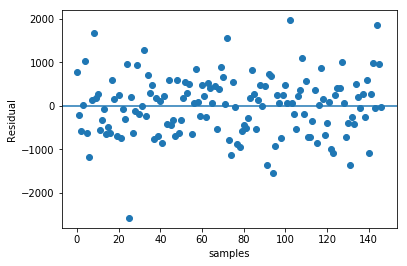

In [15]:
# 残差で確認
residual = test_y - pred_y
axis_x = np.arange(len(residual))
plt.xlabel('samples')
plt.ylabel('Residual')
plt.scatter(axis_x, residual)
plt.axhline(0)
